In [1]:
!pip install logging
!pip install farm-haystack
!pip install sentence-transformers
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 1.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.4/764.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.INFO)

from haystack.nodes import DensePassageRetriever
from haystack.document_stores import InMemoryDocumentStore

INFO:haystack.telemetry:Haystack sends anonymous usage data to understand the actual usage and steer dev efforts towards features that are most meaningful to users. You can opt-out at anytime by manually setting the environment variable HAYSTACK_TELEMETRY_ENABLED as described for different operating systems in the [documentation page](https://docs.haystack.deepset.ai/docs/telemetry#how-can-i-opt-out). More information at [Telemetry](https://docs.haystack.deepset.ai/docs/telemetry).


In [4]:
# Here are the variables you might want to use instead of the set above
# in order to perform pretraining

doc_dir = "/content/drive/MyDrive/AIR Project"
train_filename_1 = "GermanQuAD_train_converted.json"
dev_filename_1 = "GermanQuAD_test_converted.json"

query_model = "facebook/dpr-question_encoder-single-nq-base"
passage_model = "facebook/dpr-ctx_encoder-single-nq-base"
train_empty = "GermanDPR_empty_train_test.json"
model_dir = "/content/drive/MyDrive/AIR Project/finetune_model_GermanQuAD"
train_filename_2 = "GermanDPR_train.json"
dev_filename_2 = "GermanDPR_test.json"
model_dir2 = "/content/drive/MyDrive/AIR Project/finetune_model_GermanDPR"
model_dir_empty = "/content/drive/MyDrive/AIR Project/empty"

In [ ]:
retriever_base_model = DensePassageRetriever(
    document_store=InMemoryDocumentStore(),
    query_embedding_model=query_model,
    passage_embedding_model=passage_model,
    max_seq_len_query=64,
    max_seq_len_passage=256,
)
retriever_base_model.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ 

In [ ]:
retriever_QuAD_fine = DensePassageRetriever(
    document_store=InMemoryDocumentStore(),
    query_embedding_model=query_model,
    passage_embedding_model=passage_model,
    max_seq_len_query=64,
    max_seq_len_passage=256,
)
retriever_QuAD_fine.train(
    data_dir=doc_dir,
    train_filename=train_filename_1,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ 

In [ ]:
# Load the fine-tuned model
retriever_DPR_fine = DensePassageRetriever(document_store=InMemoryDocumentStore())
retriever_DPR_fine.load(load_dir=model_dir, document_store=InMemoryDocumentStore())

retriever_DPR_fine.train(
    data_dir=doc_dir,
    train_filename=train_filename_2,
    dev_filename=dev_filename_2,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir2,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.nodes.retriever.den

In [ ]:
retriever_base_loaded = DensePassageRetriever(
    document_store=InMemoryDocumentStore(),
    query_embedding_model=query_model,
    passage_embedding_model=passage_model,
    max_seq_len_query=64,
    max_seq_len_passage=256,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english


In [ ]:

retriever_base_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_1,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 96.03 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanQuAD_test_converted.json
Preprocessing dataset: 100%|██████████| 5/5 [00:09<00:00,  1.89s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.mod

In [ ]:
retriever_base_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_2,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 112.11 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanDPR_test.json
Preprocessing dataset: 100%|██████████| 3/3 [00:04<00:00,  1.59s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data

In [ ]:
retriever_QuAD_fine_loaded = DensePassageRetriever.load(model_dir, document_store=None)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.nodes.retriever.dense:DPR model loaded from /content/drive/MyDrive/AIR Project/finetune_model_GermanQuAD


In [ ]:
retriever_QuAD_fine_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_1,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 147.65 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanQuAD_test_converted.json
Preprocessing dataset: 100%|██████████| 5/5 [00:06<00:00,  1.34s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.mo

In [ ]:
retriever_QuAD_fine_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_2,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 83.46 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanDPR_test.json
Preprocessing dataset: 100%|██████████| 3/3 [00:05<00:00,  1.67s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_

In [ ]:
retriever_PDR_fine_loaded = DensePassageRetriever.load(model_dir2, document_store=None)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.nodes.retriever.dense:DPR model loaded from /content/drive/MyDrive/AIR Project/finetune_model_GermanDPR


In [ ]:
retriever_PDR_fine_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_1,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 153.04 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanQuAD_test_converted.json
Preprocessing dataset: 100%|██████████| 5/5 [00:06<00:00,  1.29s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.mo

In [ ]:
retriever_PDR_fine_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_2,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 73.52 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanDPR_test.json
Preprocessing dataset: 100%|██████████| 3/3 [00:05<00:00,  1.88s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_

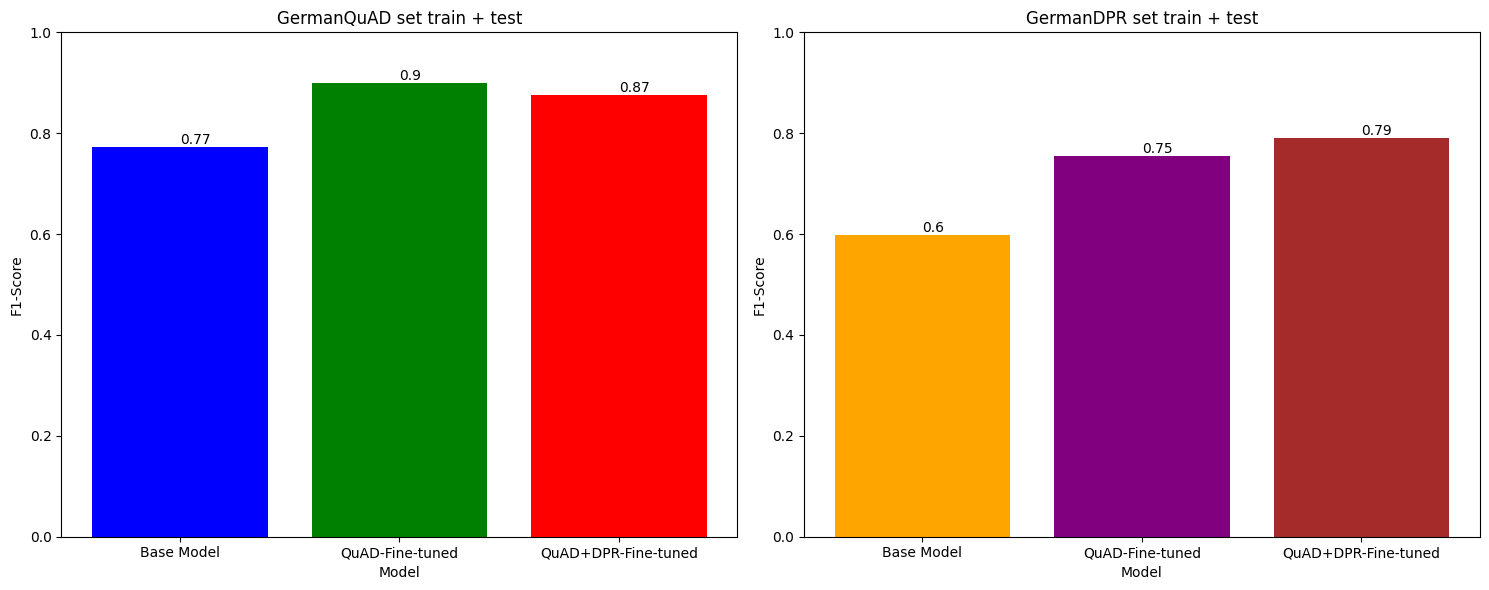

In [ ]:
import matplotlib.pyplot as plt

models = ['Base Model', 'QuAD-Fine-tuned', 'QuAD+DPR-Fine-tuned']
f1_scores_germaquad = [0.7731397459165156, 0.8992740471869328, 0.8747731397459164]
f1_scores_germandpr = [0.5980487804878049, 0.7541463414634146, 0.791219512195122]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# germaquad
bars1 = axes[0].bar(models, f1_scores_germaquad, color=['blue', 'green', 'red'])
axes[0].set_title('GermanQuAD set train + test')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('F1-Score')
axes[0].set_ylim(0, 1)
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

# germandpr
bars2 = axes[1].bar(models, f1_scores_germandpr, color=['orange', 'purple', 'brown'])
axes[1].set_title('GermanDPR set train + test')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim(0, 1)
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

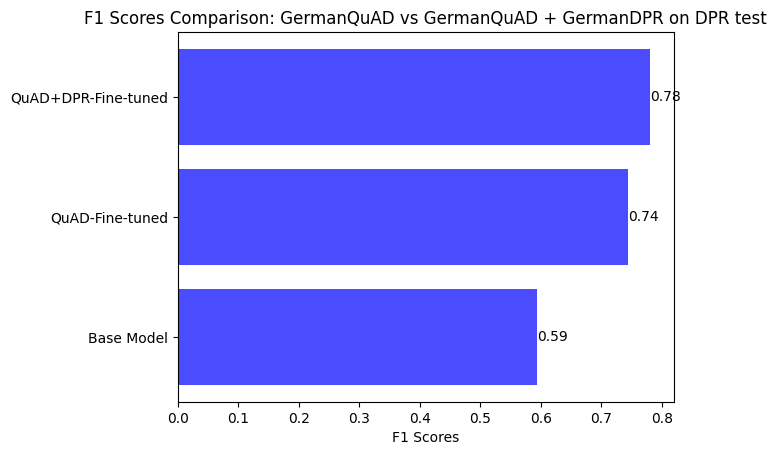

In [ ]:
f1_scores_germandpr_test = [0.5941463414634146, 0.744390243902439, 0.7804878048780488]
fig, ax = plt.subplots()
bars = ax.barh(models, f1_scores_germandpr_test, color='blue', alpha=0.7, label='GermaQuAD')

ax.set_xlabel('F1 Scores')
ax.set_title('F1 Scores Comparison: GermanQuAD vs GermanQuAD + GermanDPR on DPR test')

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',ha='left', va='center')

plt.show()

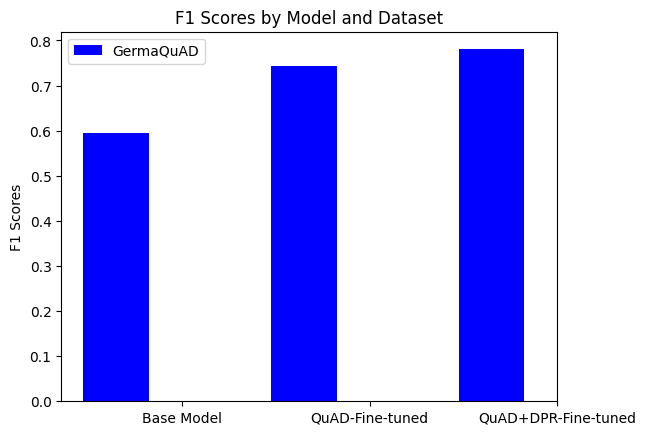

In [ ]:
import numpy as np

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, f1_scores_germandpr_test, width, label='GermaQuAD', color='blue')

ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [11]:
import json
from haystack.document_stores import InMemoryDocumentStore
from haystack.nodes import TfidfRetriever

def extract_queries_and_doc_ids(json_file):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
        return [(item['question'], ctx['passage_id']) for item in data for ctx in item['positive_ctxs']]

def load_documents_to_store(json_file, document_store):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
        documents = []
        for item in data:
            for ctx in item['positive_ctxs']:
                documents.append({
                    'content': ctx['text'],  # 'content' is the expected field for the document text
                    'meta': {'name': ctx['title'], 'passage_id': ctx['passage_id']}
                })
        document_store.write_documents(documents)


german_dpr_test_file = '/content/drive/MyDrive/AIR/project/GermanDPR_test_test_converted.json'
german_quad_test_file = '/content/drive/MyDrive/AIR/project/GermanQuAD_test_converted.json'

queries_and_doc_ids_dpr = extract_queries_and_doc_ids(german_dpr_test_file)
queries_and_doc_ids_quad = extract_queries_and_doc_ids(german_quad_test_file)

queries_and_doc_ids = queries_and_doc_ids_dpr + queries_and_doc_ids_quad

document_store = InMemoryDocumentStore()

load_documents_to_store(german_dpr_test_file, document_store)
load_documents_to_store(german_quad_test_file, document_store)

retriever = TfidfRetriever(document_store=document_store)

#retriever.fit()

for query, correct_doc_id in queries_and_doc_ids:
    retrieved_documents = retriever.retrieve(query)



In [12]:
# Evaluate the retriever
for query, correct_doc_id in queries_and_doc_ids:
    retrieved_documents = retriever.retrieve(query)

    # Check if the correct document is among the retrieved documents
    retrieved_doc_ids = [doc.meta['passage_id'] for doc in retrieved_documents]
    is_correct_doc_retrieved = correct_doc_id in retrieved_doc_ids

    print(f"Query: {query}, Correct Retrieved: {is_correct_doc_retrieved}")


Query: Welches ist die zweitgrößte Stadt in den Alpen?, Correct Retrieved: True
Query: Wie hoch ist die Staatsverschuldung von Thüringen?, Correct Retrieved: True
Query: Was beeinflusst das Abarbeiten von USB-Transaktionslisten?, Correct Retrieved: True
Query: Welche Zinkverbindung wird bei der Vulkanisation von Kautschuk eingesetzt?, Correct Retrieved: True
Query: welche Drittstaaten waren mit der Überwachung des Abkommens zwischen Nord- und Südkorea nach dem Koreakrieg betraut?, Correct Retrieved: True
Query: Zu welcher übergeordneten Klasse gehören Vögel?, Correct Retrieved: True
Query: Welche vereinheitlichen Gesetze gibt es in den USA für alle Bundesstaaten?, Correct Retrieved: True
Query: Wer stürzte 1968 Keita in Mali durch einen Putsch?, Correct Retrieved: True
Query: Mit wem setzte Kerry Assad gleich?, Correct Retrieved: True
Query: Welche Institution organisiert den öffentlichen Verkehr in London?, Correct Retrieved: True
Query: Auf die Siedlung welchen Stammes geht Paris zur

In [13]:
true_positive = 0
false_positive = 0
false_negative = 0

for query, correct_doc_id in queries_and_doc_ids:
    retrieved_documents = retriever.retrieve(query)
    retrieved_doc_ids = [doc.meta['passage_id'] for doc in retrieved_documents]
    is_correct_doc_retrieved = correct_doc_id in retrieved_doc_ids

    if is_correct_doc_retrieved:
        true_positive += 1
    else:
        false_negative += 1

    for doc_id in retrieved_doc_ids:
        if doc_id != correct_doc_id:
            false_positive += 1

precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.10559450078268563
Recall: 0.9609786311551564


In [14]:
from haystack.nodes import FARMReader

# Initialize the Reader
reader = FARMReader(model_name_or_path="deepset/roberta-base-squad2", top_k=5)

# Evaluate the Reader
for query, correct_doc_id in queries_and_doc_ids:
    retrieved_documents = retriever.retrieve(query)
    # Use the reader to answer the question based on retrieved documents
    predicted_answers = reader.predict(query, documents=retrieved_documents, top_k=1)

    # Extract the top predicted answer
    top_answer = predicted_answers['answers'][0].answer if predicted_answers['answers'] else ""

    # Compare with gold standard answer and evaluate (you might need to adjust this part based on your dataset)
    print(f"Query: {query}, Predicted Answer: {top_answer}")

# Add your logic here for calculating metrics like F1-score, exact match, etc.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Inferencing Samples: 100%|██████████| 2/2 [00:02<00:00,  1.17s/ Batches]


Query: Welches ist die zweitgrößte Stadt in den Alpen?, Predicted Answer: Wien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.94 Batches/s]


Query: Wie hoch ist die Staatsverschuldung von Thüringen?, Predicted Answer: im zweiten Fall


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: Was beeinflusst das Abarbeiten von USB-Transaktionslisten?, Predicted Answer: nicht mehr vorhanden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.78 Batches/s]


Query: Welche Zinkverbindung wird bei der Vulkanisation von Kautschuk eingesetzt?, Predicted Answer: Mittel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: welche Drittstaaten waren mit der Überwachung des Abkommens zwischen Nord- und Südkorea nach dem Koreakrieg betraut?, Predicted Answer: die Blütezeit des Rittertums, des Lehnswesens und des Minnesangs


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.17 Batches/s]


Query: Zu welcher übergeordneten Klasse gehören Vögel?, Predicted Answer: die Vertreter bestimmter Großgruppen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.59 Batches/s]


Query: Welche vereinheitlichen Gesetze gibt es in den USA für alle Bundesstaaten?, Predicted Answer: weitere Mittel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.31 Batches/s]


Query: Wer stürzte 1968 Keita in Mali durch einen Putsch?, Predicted Answer: Moussa Traoré


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.12 Batches/s]


Query: Mit wem setzte Kerry Assad gleich?, Predicted Answer: Adolf Hitler und Saddam Hussein


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.75 Batches/s]


Query: Welche Institution organisiert den öffentlichen Verkehr in London?, Predicted Answer: Transport for London


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.34 Batches/s]


Query: Auf die Siedlung welchen Stammes geht Paris zurück?, Predicted Answer: ''Rive Droite'', ''Rive Gauche'' und „Inseln


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.86 Batches/s]


Query: In welchen Fällen kann im orthodoxen Judentum ein Säugling zum Judentum kovnertiert werden?, Predicted Answer: bestimmten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.26 Batches/s]


Query: In welchem US-Bundesstaat liegt Detroit?, Predicted Answer: Detroit Techno


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: gegen wen gingen die Jayhawker in Kansas während des Amerikanischen Bürgerkrieges vor?, Predicted Answer: 31:20


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.91 Batches/s]


Query: Was ist der Gegenstand der Phytologie?, Predicted Answer: ein Gebiet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Was ist das malische Dloki-Ba?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: In welchem Film spricht Charles Elkins die deutsche Stimme von Arnold Schwarzenegger?, Predicted Answer: Mr. Universum


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.36 Batches/s]


Query: Für welches Verbrechen urteilte der Supreme Court die Todesstrafe in Louisiana nicht als verfassungskonform?, Predicted Answer: Kennedy v. Louisiana


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.74 Batches/s]


Query: Wann hatte das britische Reich seine größte Ausdehnung?, Predicted Answer: erreicht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Welche Datenübertragungsrate hatte der  kabellose Netzwerkadapter der XBox vor 2009?, Predicted Answer: SG:PART
                   'Liebst du mich?'


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.96 Batches/s]


Query: Was ist die Montgolfiere?, Predicted Answer: eine Sonntag-bis-Montag-Furore über die Royals. Sorgt euch nicht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Wie werden Wörter in phonetischer Schreibung in der chinesischen Schrift dargestellt?, Predicted Answer: Lautzeichen benutzt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.62 Batches/s]


Query: Wann erschien „Zaynab“ von Muhammed Husayn Haykal erstmals?, Predicted Answer: 1913


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Wie wird Uranmunition eingesetzt?, Predicted Answer: kaum


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.10 Batches/s]


Query: Durch was wird Nordirland im britischen Königswappen symbolisiert?, Predicted Answer: die britische Kultur geprägt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.11 Batches/s]


Query: In welchem Jahr erhielt Mali die Berechtigung zur Teilnahme an den Olympischen Spielen?, Predicted Answer: 2008


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Wann wurde die Bezeichnung Kubismus das erste mal geschrieben verwendet?, Predicted Answer: ebenfalls nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.95 Batches/s]


Query: wie viele Juden leben in Tadschikistan?, Predicted Answer: deutschstämmige Menschen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.54 Batches/s]


Query: In welchem Bereich des Physik arbeitete Feynmann hauptsächlich?, Predicted Answer: Mechanik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Wie sieht die Handelsbilanz von Guinea-Bissau aus?, Predicted Answer: ein sehr hohes Außenhandelsdefizit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Bei wem suchte sich der osmanische Sultan Hilfe während des griechischen Unabhängigkeitskrieges?, Predicted Answer: Muhammad Ali


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.61 Batches/s]


Query: Was ist der tiefste Punkt der Antarktis?, Predicted Answer: 2496 m unter dem Meeresspiegel liegende Bentley-Subglazialgraben in Westantarktika


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Aus welchen Ländern stammen die meisten der in der Schweiz lebenden Ausländer?, Predicted Answer: 167


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Was war das Ziel hinter der geplanten Eroberung von Prag durch Friedrich II.?, Predicted Answer: gebildet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.60 Batches/s]


Query: Für welche Musikrichtung war Detroit in der ersten Hälfte des 20. Jhd. bekannt?, Predicted Answer: Olympischen Sommerspiele


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.85 Batches/s]


Query: Wer ist Mary Youngblood?, Predicted Answer: Flötistin


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.14 Batches/s]


Query: Wo befinden sich beim Hund die Geschmacksknospen?, Predicted Answer: Rezeptoren


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Der wie vielte Bundesstaat der USA wäre Puerto Rico nach offiziellem Beitritt in die USA?, Predicted Answer: Puerto Ricos


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.78 Batches/s]


Query: Welche Art der Politik betrieb Keita in Mali?, Predicted Answer: sozialistisch orientierte Politik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: In welcher erdgeschichtlichen Epoche sind die Dinosaurier ausgestorben?, Predicted Answer: Oligozän und Miozän


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.78 Batches/s]


Query: Welche Behörden des Bundes sind in Hannover angesiedelt?, Predicted Answer: zwei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: In welchem Zustand ist der Energiebedarf von  Aufzüge höher?, Predicted Answer: leeren Raums


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: Wie lange hatten die Republikaner während Eisenhowers Präsidentschaft die Mehrheit im Parlament?, Predicted Answer: unumgänglich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Welche Partei erhielt bei den Wahlen in Galizien 2005 die meisten Stimmen?, Predicted Answer: Partido Popular


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: In welchem Jahr befürwortete die Mehrheit im Referendum in Puerto Rico die Aufnahme in die USA?, Predicted Answer: 2012


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.11 Batches/s]


Query: Was veranstaltete die US-Army, um eine Hymne zu finden?, Predicted Answer: Wettbewerb


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was ist neben Hinayana die andere Hauptströmung des Buddhismus?, Predicted Answer: Mahayana


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.29 Batches/s]


Query: Wozu wird ein Daysimeter benutzt?, Predicted Answer: zirkadianes Messgerät


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wann wurden Hinrichtungen in Iowa nach der ersten Abschaffung wieder etabliert?, Predicted Answer: 46


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: Wie hoch ist BIP in North Carolina?, Predicted Answer: traditionell


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Welche Partei kam nach dem Militärputsch 1968 an die Macht?, Predicted Answer: Moussa Traoré


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  2.13 Batches/s]


Query: Durch was unterscheidet sich die Historiographie des 19. Jahrhunderts von der vorhergehenden?, Predicted Answer: Franco


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.52 Batches/s]


Query: Welche Menschenrechtsverletzungen erreigneten sich in Mali infolge des Putsches 2012?, Predicted Answer: 35


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.64 Batches/s]


Query: wer wurde zu Beginn des amerikanischen Unabhängigkeitskrieges zum obersten Kommandanten bestimmt?, Predicted Answer: Beyoncé


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.92 Batches/s]


Query: Wie hoch ist das Pro-Kopf-BIP von Portugal?, Predicted Answer: sehr unterschiedlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wie groß ist das Intervall der Planck-Zeit?, Predicted Answer: eine halbe Stunde


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Ab wann wurde Glasproduktion im Römischen Reich in größerem Umfang möglich?, Predicted Answer: erschwinglich wurde. Eine umfangreiche Produktion von Trinkgefäßen, Krügen, Schalen und Tellern setzte ein, anfangs meist manuell geformt oder abgesenkt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.15 Batches/s]


Query: Seit wann ist Paris eigenständiges Departement?, Predicted Answer: 1968


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Welche Art von Mosaiken wurden im Römischen Reich im ersten Jahrhundert nach Christus verwendet?, Predicted Answer: Viele Fußböden und seltener auch die Wände in Wohnbauten der gehobenen sozialen Schichten wurden mit Mosaiken dekoriert. Im ersten nachchristlichen Jahrhundert bevorzugte man vor allem schwarz-weiße Mosaiken


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: Wie ist die estnische Arbeitslosenquote im Vergleich mit anderen EU-Ländern?, Predicted Answer: nötig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.12 Batches/s]


Query: Wann verbreitete sich das Christentum im Elsass aus?, Predicted Answer: Die Mehrheit der Gesamtbevölkerung der Republik Kongo gehört


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.62 Batches/s]


Query: Wo kann man nachschauen, welche alten Spiele auf den neuen XBox-Modelle spielbar sind?, Predicted Answer: ''Xbox Live


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.06 Batches/s]


Query: In welchem Krieg lieferte Israel Waffen an den Iran?, Predicted Answer: Golfkrieg


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Welcher Zeit entspricht die westeuropäische Normalzeit?, Predicted Answer: null Stunden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.72 Batches/s]


Query: Welches Sexualhormon spielt bei der Entwicklung der sexuellen Orientierung eine besondere Rolle?, Predicted Answer: Pelikan


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.96 Batches/s]


Query: Was gilt seit der Revolution im Iran als Basis für Gesetze?, Predicted Answer: Voraussetzungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Seit wann gibt es in Iowa keine Todesstrafe mehr?, Predicted Answer: 1872


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.12 Batches/s]


Query: Was wurde unter Eisenhower als Dynamic Conservatism bezeichnet?, Predicted Answer: Am 2. April wurde Eisenhower in Abilene (Kansas) beigesetzt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.11 Batches/s]


Query: Wann war die Entdeckung von Lutetium?, Predicted Answer: 1905


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: Wie viele Reisende fliegen jährlich von den Airports um New York?, Predicted Answer: Queens


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.86 Batches/s]


Query: Welche Länder wären durch einen Anstieg des Meeresspiegels besonders betroffen?, Predicted Answer: Gliedstaaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Welche Gliedmaße sind bei Insekten am Thorax verankert?, Predicted Answer: Flügelpaare


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.69 Batches/s]


Query: Welches Transportmittel wurde im Sezessionskrieg erstmals im großen Stil eingesetzt?, Predicted Answer: Software


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wie wurde das Dionysos-Mosaik in Köln wieder entdeckt?, Predicted Answer: 1941


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Welcher Anteil der Arbeitnehmer in estland ist weiblich?, Predicted Answer: der Tourismus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Welche Schlacht entschied den Feldzug von Johann Ohneland nach Frankreich?, Predicted Answer: Barone


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: Wann wurde Seoul nach der nordkoreanischen Offensive wieder zurückerobert?, Predicted Answer: geräumt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Wie lange dauerte der Bau der Bahnverbindung zwischen LA und Santa Monica?, Predicted Answer: 27 Kilometer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Hat Mose wirklich gelebt?, Predicted Answer: unklar


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: welche Bedeutung hat Kanye West als Musiker?, Predicted Answer: Vielzahl


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Bei welchem Verein spielte Seydou Keita?, Predicted Answer: AS Rom


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Welcher Einfluss zeigt sich bei den christlichen Mosaiken in Ravenna?, Predicted Answer: Beispiel Blauwal


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.69 Batches/s]


Query: Wer regiert in Eritrea?, Predicted Answer: Parlaments


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Welchen Status erhielt Richmond 1861?, Predicted Answer: Hauptstadt der Konföderation


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.76 Batches/s]


Query: Wann gelten Vögel als Zugvögel?, Predicted Answer: „einen Vogel zeigen“


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: Was bezeichnet der Begriff "Avifauna"?, Predicted Answer: Vogelwelt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Zu welcher Künstlervereinigung gehörte Albert Bloch?, Predicted Answer: bekanntesten deutschstämmigen Professoren an KU war der Maler Albert Bloch, seit einem langjährigen Deutschlandaufenthalt (1908–1921) Mitglied der deutschen Malergruppe Blauer Reiter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.63 Batches/s]


Query: Welchen Rang im Index von Reporter ohne Grenzen belegt Nigeria?, Predicted Answer: Platz 122


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Was forderte Kerry als Konsequenz für den russischen Einsatz auf der Krim?, Predicted Answer: Bei einem Besuch in Israel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Wie heißt das Buch, das die Weltreise von Erika und Klaus Mann erzählt?, Predicted Answer: University of Kansas


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.64 Batches/s]


Query: Welche Aufgabe wurde dem NNSC durch das Abkommen zwischen Nord- und Südkorea nach dem Koreakrieg zugeteilt?, Predicted Answer: schwer lösbare


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: Wie heißt das Hauptgebäude von Comcast Corporation?, Predicted Answer: Kabelnetzbetreiber


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Mittels was werden Urankerne gespalten?, Predicted Answer: Der Penis der Männchen ist ausschließlich samenführend und an der Spitze


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Welche Ordnungszahl hat Uran?, Predicted Answer: 92


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.23 Batches/s]


Query: In welcher Zeit sollen Abraham und seine Nachkommen gelebt haben?, Predicted Answer: einiger


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.53 Batches/s]


Query: Wie heißen die drei Teile des Insektenthorax?, Predicted Answer: Débo, Fati, Teli, Korientze, Tanda, Do, Garou und Aougoundou


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wie wird die diplomatische Vertretung des Vatikans bezeichnet?, Predicted Answer: ausgewogene diplomatische Beziehungen zu haben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Welche lokalen Volksgruppen lebten in der deutschen Kolonie Südwest-Afrika?, Predicted Answer: Wahlrecht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Auf was hofften die römischen Legionäre nach dem Ende ihrer Dienstzeit?, Predicted Answer: besondere Privilegien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.10 Batches/s]


Query: Welche Informationen wird in den Properties der Unicode-Zeichen festgehalten?, Predicted Answer: Sortierreihenfolge, Leserichtung und Regeln


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Was waren die Räumlichkeiten der Galleria d’Arte Moderna in Palermo früher?, Predicted Answer: unabsehbar


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.80 Batches/s]


Query: Wie starb Tiberius Gracchus?, Predicted Answer: weiterreichende Ziele


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Welche Materialien sind in der DIN 6730 festgelegt?, Predicted Answer: Papier und Pappe


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Für welche Geräte  konnte USB 1.0 auch als Stromzufuhr eingesetzt werden?, Predicted Answer: USB-Kabelverbindungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: In Abgrenzung zu was entstand der Neoklassizismus in Deutschland hautpsächlich?, Predicted Answer: nach außen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: Als was zählt das Research Triangle in North Carolina?, Predicted Answer: Raleigh


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.63 Batches/s]


Query: Welche Städte verbindet die Sunset Limited-Zuglinie?, Predicted Answer: Houston


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Welche Gebiete erhielt Großbritannien durch den Vertrag von Versailles?, Predicted Answer: Diese Ereignisse


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: Unter welchem Namen war eine frühere Version der US-Army-Hymne bekannt?, Predicted Answer: Praxis


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.08 Batches/s]


Query: Von welchen Flüssen wird der Caprivizipfel in Namibia eingeschlossen?, Predicted Answer: Grenzflüssen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Was ist die Hauptaussage der Powell-Doktrin?, Predicted Answer: entwickelt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Was lösen transplantierte Organe im Körper des Empfängers aus?, Predicted Answer: erkannt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.65 Batches/s]


Query: Seit wann hat Hage Geingob das Präsidentenamt in Namibia inne?, Predicted Answer: drei Amtsperioden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.81 Batches/s]


Query: Wer entwickelte Platons Metaphysik weiter?, Predicted Answer: Attac


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Welchen Beruf hatte Edgar Allan Poes Mutter?, Predicted Answer: Maria


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Welcher deutsche Synchronsprecher synchronisiert die aktuellen Filme von Arnold Schwarzenegger?, Predicted Answer: Ralph Schicha


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.72 Batches/s]


Query: Wie viele Menschen arbeiten bei den drei größten Biotechnologie-Unternehmen in North Carolina?, Predicted Answer: Inner Banks


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: In welchem Verhältnis stand  Gaius Sempronius Gracchus zu Tiberius Gracchus?, Predicted Answer: Verfassungsumsturz


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: wo wird der Mensch in der Zoologie eingeordnet?, Predicted Answer: 0,04 Gramm Kupfer zu sich nehmen, ohne Schaden an seiner Gesundheit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.24 Batches/s]


Query: Was bezeichnet man als genetische Variabilität?, Predicted Answer: Sinn bezeichnet man als Haushund die Hunde


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Wie viel liegt der Bentley-Subglazialgraben unter dem Meer?, Predicted Answer: daran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Wieso schrumpfte die Wirtschaft der Republik Kongo im Jahr 2017?, Predicted Answer: 4,6 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wohin flüchteten die Juden während und nach der Shoa?, Predicted Answer: zahlreiche Menschen starben und viele Familien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.69 Batches/s]


Query: Welche Personen sitzen im akademischen Senat?, Predicted Answer: Studenten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Wieso wurde der Text von Gruber Caission Song für die Übernahme als Army-Hymne geändert?, Predicted Answer: Kanye West erneut mit einer Vielzahl anderer Musiker zusammen, darunter Daft Punk, Frank Ocean, Arca und Rick Rubin. Letzterer wurde erst kurz vor der Deadline in die Produktion miteinbezogen, um den Minimalismus in Wests Stücken noch konsequenter zu gestalten. Ein Video für den Song ''New Slaves


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.05 Batches/s]


Query: Wie groß war Warren Buffets Vermögen, bevor er Geld an Stiftungen spendete?, Predicted Answer: 45 Mrd. US-Dollar


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.82 Batches/s]


Query: Welche Aufgabe hat die biologische Anthropologie?, Predicted Answer: Ursachenanalyse und evolutionsbiologische Interpretation der Verschiedenheit biologischer Merkmale der Hominiden (Familie der Primaten, die fossile und rezente Menschen einschließt). Ihre Methoden sind sowohl beschreibend als auch analytisch.
Institutionen im deutschsprachigen Raum gibt es an Universitäten und an Museen in Tübingen, Kiel, Hamburg, Berlin, Göttingen, Jena, Gießen, Mainz, Ulm, Freiburg im Breisgau, München, Zürich und Wien. Meist ist dort die Bezeichnung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: In der Regierungszeit welches Königs hatte das Königreich Urartu die maximale Ausdehnung?, Predicted Answer: Unter Sarduri II


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: wie viele Kinder werden pro Frau in Tadschikistan geboren?, Predicted Answer: 2,7


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: In welcher Stadt ist die Zentrale der Comcast Corporation?, Predicted Answer: 39 Bundesstaaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Welche Materialeigenschaft eines Kondensators beeinflusst die maximale Ladungsmenge?, Predicted Answer: temperaturabhängig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Was stellte Remafedi 1991 bezüglich der sexuellen Orientierung und Selbstmord unter Jugendlichen fest?, Predicted Answer: Studie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.36 Batches/s]


Query: Teil welches Departements war Paris im 18. Jhd.?, Predicted Answer: sechs regionale Departements


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Auf welchen Platz kam die malische U20-Mannschaft bei der WM 2015?, Predicted Answer: 3. Platz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.97 Batches/s]


Query: Welche Temperatur wird für den Urknall angenommen?, Predicted Answer: 15 °


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.68 Batches/s]


Query: Welche Flüsse bilden die Grenze zwischen Namibia und Südafrika?, Predicted Answer: zahlreiche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Wo errichteten die Römer in Paris ihre Stadt?, Predicted Answer: geografischen Gliederung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Welche Übertragungsgeschwindigkeit hat der neuere WLAN-Adapter N der XBox?, Predicted Answer: 54 Mbit/s


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: was prangerte August von Platen in den Polenliedern an?, Predicted Answer: Der Ausdruck ''Völkermord'' taucht zum ersten Mal bei dem deutschen Lyriker August Graf


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Aus welchem Jahrhundert stammt das erste Zeichenlexikon der chinesischen Schriftzeichen?, Predicted Answer: Shuowen Jiezi


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.60 Batches/s]


Query: Zu welcher Industrieregion in den USA gehört Detroit?, Predicted Answer: Detroit Techno


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Wegen welchen Verbrechens wurden in Iowa die meisten Menschen hingerichtet?, Predicted Answer: 43 wegen Mord und drei wegen Vergewaltigung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Welchen Umfang hat das BIP der Republik Kongo?, Predicted Answer: fast zehnmal höher


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Wie sind katholische Religionslehrer von dem Scheidungsverbot betroffen?, Predicted Answer: Pauls VI


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.05 Batches/s]


Query: Welche Menschenrechtsverletzungen wird den staatlichen Organen und Vertretern in Mali vorgeworfen?, Predicted Answer: grobe


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.75 Batches/s]


Query: Auf wie viele Kilometer wurde das von Militär befreite Gebiet im Waffenstillstand 1953 zwischen Nord- und Südkorea festgelegt? , Predicted Answer: Breitengrad


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.77 Batches/s]


Query: Woher stammt der Name Uran?, Predicted Answer: früher


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.19 Batches/s]


Query: Welchen Jahresumsatz hatte Comcast Corporation 2015?, Predicted Answer: 51,8 Mrd. US-Dollar Platz 1


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.24 Batches/s]


Query: Durch welche Struktur ist die Gesellschaft in Liberia gekennzeichnet?, Predicted Answer: große Gegensätze


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Was sind Allele?, Predicted Answer: genetischen Varianten (Allele, Gene oder Genotypen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Welcher deutsche Synchrosprecher synchronisierte die meisten von Schwarzeneggers Filmen?, Predicted Answer: Ernst II.


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Wie viele Menschen in den USA sind jüdischen Glaubens?, Predicted Answer: sehr viele gut ausgebildete junge Menschen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  2.02 Batches/s]


Query: Wie hieß die deutsche Ausgabe der Dernieres Nouvelle d'Alsace?, Predicted Answer: „Jedes im Ausland geborene Kind eines Franzosen ist Franzose


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  2.05 Batches/s]


Query: Um wie viel ist die Anzahl der Beschäftigen in der Textilindustrie in North Carolina seit 1990 gefallen?, Predicted Answer: traditionell


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Welcher Service wird in Fachgeschäften bereitgestellt?, Predicted Answer: Entwicklungshilfe


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.79 Batches/s]


Query: Welche Möglichkeit bietet der Ersatzausweis für Nichtbürger in Estland?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Welche Stadt war vor Richmond Hauptstadt der Südstaaten?, Predicted Answer: Lutetia


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Seit wann hat Portugal den Euro als Währung?, Predicted Answer: unterschiedlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Durch welche Gebiete wurde Eritrea als italienische Kolonie erweitert?, Predicted Answer: Parlaments


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Wie viele Jahre mussten die Chicago Cubs nach ihrem Meisterschaftssieg von 1908 auf einen weiteren Titel warten?, Predicted Answer: 80


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Was war das Hauptmerkmal der Heeresreform von Gaius Marius im Römischen Reich?, Predicted Answer: Feldherr


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.63 Batches/s]


Query: Was war der Grund für den Absturz der Boeing 747-300 über Guam 1997?, Predicted Answer: Korean-Air-Flug 801 von Seoul nach Agana (Guam) bei heftigem Regen gegen einen Hügel 5 km vor dem Flughafen Hagåtña geflogen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Was nimmt die Kosmologie als Ursprung der Entstehung von Materie an?, Predicted Answer: Raum einnimmt ''und'' eine Masse besitzt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Was wurde 1888 in Richmond eingeführt?, Predicted Answer: Einrichtung der ersten elektrischen Straßenbahn


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.13 Batches/s]


Query: Wann galt die doppelte Sommerzeit?, Predicted Answer: genannt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.95 Batches/s]


Query: Welches politische System gab es in Mali nach der Unabhängigkeit?, Predicted Answer: ein Einparteienstaat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: was ist einer der Hauptfaktoren, die Kinderarbeit begünstigen?, Predicted Answer: Architektur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Wie heißt die Hauptstadt von Eritrea?, Predicted Answer: Eritrea
Eritrea (; , ) ist ein Staat im nordöstlichen Afrika


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Zwischen welchen Werten liegt die  untere Grenze für das Flächengewicht für Pappe?, Predicted Answer: Nord- und Südkorea


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Welcher Teil von Zypern ist als Staat anerkannt?, Predicted Answer: Staatspräsident


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: Durch welche Maßnahmen begründete Esra das Brauchtum des Judentum?, Predicted Answer: eigentlicher


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.55 Batches/s]


Query: Welcher Fluss bildet in der Gegend von Detroit die Grenze zu Kanada?, Predicted Answer: Detroit Techno


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.68 Batches/s]


Query: Wie lange ist die Amtszeit des liberianischen Präsidenten?, Predicted Answer: reibungslos und friedlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.73 Batches/s]


Query: Wie unterscheidet sich das Intervall zwischen zwei Spielzügen beim Canadian Football vom American Football?, Predicted Answer: Arsenal Holdings plc“ als Limited company, wobei sich die Eigentumsverhältnisse enorm von denen anderer Fußballvereine


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Welche Folgen hatte die japanische Eroberung von Lasio für die allierten Mächte?, Predicted Answer: noch zwei Nachschubwege


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Die Hauptstadt welchen Landes ist Vaduz?, Predicted Answer: Liechtensteins


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Was ist ein Jayhawk?, Predicted Answer: Maskottchen der Universität ist der Jayhawk, ein nicht real existierender Vogel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Welche Airports gibt es in New York City?, Predicted Answer: Newark Liberty International Airport


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wann sind die Dinosaurier ausgestorben?, Predicted Answer: Beim Massenaussterben vor 65,5 Millionen Jahren (Kreide-Tertiär-Grenze) starben die Nicht-Vogel-Dinosaurier aus


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was ist die durchschnittliche Höhe über dem Meeresspiegel der Marshallinseln?, Predicted Answer: High Rock Mountain


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Welche Auswirkung für die Gesellschaft hatte die Etablierung eines einheitlichen Schriftsystems in China 200 v. Chr?, Predicted Answer: Fundorte:'' Mureybet I B, II, III, Tell es-Sultan (Jericho), Göbekli Tepe III
* 8200 bis 6800/6500 v.


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wann wurde das Ende der Kämpfe zwischen Vereinten Nationen und Norkorea im Koreakrieg beschlossen?, Predicted Answer: Die meisten Kämpfe zwischen den Streitkräften beider Nationen fanden an der Grenze zwischen den Vereinigten Staaten und dem heutigen Kanada sowie in der Gegend der Chesapeake Bay statt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.88 Batches/s]


Query: Wie viele täglich erscheinende, landesweite Zeitungen gibt es in Nigeria?, Predicted Answer: Yoruba, Hausa und Igbo


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Wie sieht die Oberfläche des Sixaxis-Controllers aus?, Predicted Answer: Deutlich besser


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.12 Batches/s]


Query: Wie viele Menschen waren 1990 in der Textilindustrie in North Carolina beschäftigt?, Predicted Answer: 60 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Welcher Gruppe gehören die meisten US-amerikanischen Juden an?, Predicted Answer: Bevölkerungsgruppe


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.97 Batches/s]


Query: Welches Gebiet von Paris war als erstes besiedelt?, Predicted Answer: Nationalgarde


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  2.06 Batches/s]


Query: wer führte die englischen Truppen in der Schlacht bei Damme 1213?, Predicted Answer: Johanns Halbbruder William Longespée


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.19 Batches/s]


Query: Wie viele verschiedene Arten von Vögeln gibt es ?, Predicted Answer: 158


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wie viel Prozent der Menschen in Puerto Rico stimmten im Referendum 2012 für einen eigenständigen Staat?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Was wird durch den Hamiltonoperator festgelegt?, Predicted Answer: eine Unterbrechung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.52 Batches/s]


Query: Wann trat Portugal der EU bei?, Predicted Answer: Durchschnitt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Wie groß ist die Fläche der Belle Isle in Detroit?, Predicted Answer: km lange und 3,9 km2


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.91 Batches/s]


Query: was war die Todesursache von Papst Paul VI.?, Predicted Answer: In dieser Form eine Neuheit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Welche militärischen Konflikte waren Anlass für eine Heeresreform im Römischen Reich um 100 v. Chr.?, Predicted Answer: Früheste Kupferverarbeitung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.98 Batches/s]


Query: Was beeinträchtigt das Spielen alter XBox-Spiele per Emulator?, Predicted Answer: Einige dieser älteren Spiele werden im Rahmen der Emulation in einer Grafik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Welche französischen Gebiete gab es nach dem Krieg Mitte des 18. Jhd. mit Großbritannien noch in Indien?, Predicted Answer: Straßburg im neu gegründeten Deutschen Reich Hauptstadt des Reichslandes Elsaß-Lothringen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.16 Batches/s]


Query: An welcher Flussmündung liegt Valencia?, Predicted Answer: Turia ins Mittelmeer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Welcher Unterschied ergibt sich durch die Quantisierung von Schwingungsenergie in Bezug auf die Wärmeenergie von festen Körpern?, Predicted Answer: Albert Einstein


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Welches Ereignis im Syrien-Krieg führte zu Kerrys Forderung nach einem militärischen Einsatz?, Predicted Answer: Der wachsende wirtschaftliche und politische Einfluss europäischer Staaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Wer veranlasste den Bau einer Zugstrecke zwischen LA und Santa Monica?, Predicted Answer: Robert Baker


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.76 Batches/s]


Query: Was war die höchste Platzierung, die Mali in der Afrikameisterschaft erreichte?, Predicted Answer: der dritte Platz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Für was steht die Bezeichnung UTC?, Predicted Answer: ein deutsches Wesen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Was war der Grund, dass im Sezessionskrieg vergleichsweise mehr Menschen starben als bei früheren Kriegen?, Predicted Answer: Die Schlacht von Shiloh


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wie wird der Chef oder die Chefin einer Universität genannt?, Predicted Answer: Rektor oder Präsidenten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.52 Batches/s]


Query: Wie viele Einwohner:innen hat Iran im Vergleich mit der BRD?, Predicted Answer: Anlagen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Bis wann wurde der Sixaxis-Controller produziert?, Predicted Answer: zu sieben solcher Controller können für eine Konsole


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Durch welches Phänomen konnte Einstein den Wärmeverlust von Körpern bei tiefen Temperaturen erklären?, Predicted Answer: Abnahme


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Aus wie vielen Teilen besteht der Thorax von Insekten?, Predicted Answer: drei Segmenten


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.81 Batches/s]


Query: wann wurde in Frankreich der Laizismus eingeführt?, Predicted Answer: schleppender verlief


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: welches neue Verständnis von Poesie etablierte sich Mitte des 18. Jahrhudnerts?, Predicted Answer: Drama


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Welcher Anteil aller Menschen hat sich mit Tuberkulose angesteckt?, Predicted Answer: Armen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Wie wird die Hymne des US-Army im umgangssprachlich meist genannt?, Predicted Answer: Army Song


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Welche Auswirkung hatte die Teilnahme an der Schlacht von Gallipoli auf die britischen Dominions Australien und Neuseeland?, Predicted Answer: tiefgreifende


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: In Zusammenhang mit welchem Reformpaket wurde in den USA das Sozialstaatskonzept umgesetzt?, Predicted Answer: wom


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.73 Batches/s]


Query: Wann endete der Kampf um die Unabhängigkeit Eritreas von Äthiopien?, Predicted Answer: 1991


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Welcher Papst versuchte die Entführung von Aldo Moro zu beenden?, Predicted Answer: Paul VI.


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Unter welchem Namen wurde die Stadt Van gegründet?, Predicted Answer: Sarduri I.


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Durch was unterscheidet sich ein Warenhaus von einen Kaufhaus?, Predicted Answer: ungeachtet seines Namens ein Vollsortiment mit großer Lebensmittelabteilung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.99 Batches/s]


Query: Wie viele Juden lebten vor dem Fall Der Sowjetunion in Tadschikistan?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Welche Durchschnittshöhe hat das Hochland von Namibia?, Predicted Answer: 1700 Meter hohe


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Wie haben sich die Bedienelemente des Sixaxis-Controllers im Vergleich zum DualShock verändert?, Predicted Answer: PS3


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Wie groß ist das gebiet, in dem die Inseln der Marshallinseln verteilt sind?, Predicted Answer: Besonders groß ist diese in den Monaten April bis Juni


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Wer führte die Truppen der Konföderation im Sezessionskrieg?, Predicted Answer: weniger genau Buch über ihre Verluste


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Welcher römische Feldherr reformierte um 100 v. Chr. das Herr des römischen Reiches?, Predicted Answer: Gaius Marius


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.59 Batches/s]


Query: Als was entstand die Stadt Kolmannskuppe in Namibia?, Predicted Answer: Staatspräsident


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Zu welcher Gruppe von Ballsportarten gehört Canadian Football?, Predicted Answer: Gridiron Football bezeichneten Spielen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Wer wurde 2009 galizischer Regierungschef?, Predicted Answer: Mussawi und Karrubi


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Auf was haben Pheromone beim Menschen Einfluss?, Predicted Answer: keine Reaktion


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wieso gibt es unterschiedliche Werte für die Grenze zwischen Pappe und Papier?, Predicted Answer: Flugdrachen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.16 Batches/s]


Query: Was findet in der Cobo Hall in Detroit vor allem statt?, Predicted Answer: Detroit International Jazz Festival


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Wie wird die Zeit nach dem internationalen Einheitensystem angegeben?, Predicted Answer: nicht einheitlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Wie hoch ist das BIP pro Kopf in Myanmar?, Predicted Answer: äußerst ungleichmäßig verteilt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.98 Batches/s]


Query: Welcher Tag ist besonders wichtig für die anti-israelische Propaganda im Iran?, Predicted Answer: al-Quds-Tag


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.89 Batches/s]


Query: Durch was werden Vögel biologisch gekennzeichnet?, Predicted Answer: einen massiven Ölboom


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.61 Batches/s]


Query: Wann startete die Aktion "Call  to Action" des Polizeichefs von Philadelphia?, Predicted Answer: 10,000 Men, It’s a New Day


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.31 Batches/s]


Query: welche negativen witschaftlichen Folgen entstehen durch Kinderarbeit?, Predicted Answer: Ursachen und Folgen der Kinderarbeit ==
Die wichtigste Ursache


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Was ist das Shoiwen Jiezi?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Was wird durch die genetische Variabilität einer Population beeinflusst?, Predicted Answer: wesentlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Wo liegen die Marshallinseln?, Predicted Answer: China


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Welche Institution veranlasste die Gründung des Nationalarchivs?, Predicted Answer: Nanchang


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.95 Batches/s]


Query: Bei welchen Xbox-Modellen ist der WLAN-Empfänger bereits fest verbaut?, Predicted Answer: Xbox 360 S und E


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.22 Batches/s]


Query: Bei welchen Nintendo-Spielen wurde der R.O.B. eingebunden?, Predicted Answer: Retro-Spielern


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Von wem wurde Arnold Schwarzenegger bei seiner Kandidatur in Kalifornien als Mogelkandidat bezeichnet?, Predicted Answer: Wahlkampfes wurde Schwarzenegger von einigen seiner republikanischen Parteifreunde


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Wo in Neu-Delhi liegt das Observatorium Jantar Mantar?, Predicted Answer: Jai Singh II.


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Welche Auswirkungen hatte die Niederlage von Kolin für das preußische Heer?, Predicted Answer: tiefgreifende


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Was wurde neben religiösen Fächern an den Nizamiya-Madrasas unterrichtet?, Predicted Answer: Naturwissenschaften sowie Logik und Mathematik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wer war designierter Vize-Präsident Im Wahlkampf von John Kerry?, Predicted Answer: John Edwards


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Wie viele Menschen leben in Israel pro Quadratkilometer?, Predicted Answer: 3000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Welche Bereiche der Physik soll die Quantengravitation theoretische zusammenführen?, Predicted Answer: Zeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Welche Bedeutung hat die Schlacht von Plassey für die Ostindien-Kompanie?, Predicted Answer: entscheidender Sieg durch Sir Robert Clive, 1. Baron Clive in der Schlacht bei Plassey 1757 ließ die Britische Ostindien-Kompanie auch zu einem militärischen Machtfaktor


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.90 Batches/s]


Query: Zu welcher Klasse von Metallen gehört Zink?, Predicted Answer: Übergangsmetallen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Was wird am ANZAC Day gedacht?, Predicted Answer: Beide Länder


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Wer war König von Frankreich während Johann Ohnelands Feldzug nach Frankreich?, Predicted Answer: Barone


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.60 Batches/s]


Query: Für was kandidierte Arnold Schwarzenegger 2003?, Predicted Answer: das Amt des Gouverneurs von Kalifornien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Was wird in der Transaktionsliste eines USB-Anschlusses verwaltet?, Predicted Answer: Symbolrate von 5 Gbit/s


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Was war das Ziel von Sylvester Johnsons Aktion " Call to Action" in Philadelphia?, Predicted Answer: 10,000 Men, It’s a New Day


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.96 Batches/s]


Query: Wieso verweigerten einige englische Fürsten Johann Ohneland die Gefolgschaft, als er gegen Frankreich ziehen wollte?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: Welche Anforderung stellt die Powell-Doktrin an das Ende eines militärischen Konflikts?, Predicted Answer: Mens


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Wer führte den Putsch gegen Traore in Mali an?, Predicted Answer: Frankreich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.93 Batches/s]


Query: Welches Amt bekleidete der Feldherr Gaius Marius in Rom?, Predicted Answer: ein Amt, das er bis zu seinem Tod


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.31 Batches/s]


Query: In welchem Jahr annektierte Haile Selassie Eritrea?, Predicted Answer: 1961


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.60 Batches/s]


Query: Welche der nigerianischen Tageszeitungen werden auf Englisch publiziert?, Predicted Answer: Die meisten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.09 Batches/s]


Query: Welche Beleuchtung zählt als Außenbeleuchtung?, Predicted Answer: Begriff


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Wo wurde der Waffenstillstand für den Koreakrieg beschlossen?, Predicted Answer: 1784


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.95 Batches/s]


Query: welches Phänomen tritt bei elektromagnetischer Strahlungsenergie auf?, Predicted Answer: Die Quantelung der Energie


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.52 Batches/s]


Query: Welche Funktionen sind mit dem Hypothalamus verknüpft?, Predicted Answer: Instinktverhalten und Sexualfunktionen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Wieso ist Thüringen auch in Zukunft auf Finanzhilfen vom Bund  oder EU angewiesen?, Predicted Answer: 19. März 2013


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.76 Batches/s]


Query: Was wurde durch das Abkommen zur Beendigung des Koreakrieges als Grenzlinie zwischen den beiden Teilen Koreas festgelegt?, Predicted Answer: Weiterhin


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Welche Funktion fällt bei dem SIXAXIS-Controller im Vergleich mit dem Vorgängermodell weg?, Predicted Answer: Rüttel“-Funktion


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: Wie entsteht außer durch Mutation noch Genvariationen und Allele?, Predicted Answer: Gene


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.94 Batches/s]


Query: Wie ist Paris verwaltungstechnisch gegliedert?, Predicted Answer: Commune de Paris


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie viel Prozent erhielt Schwarzenegger bei der Wahl zum Gouverneur 2003?, Predicted Answer: ''Laureus World Sports Award


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Welchen Anteil hat die Ölförderung am Staatshaushalt von Alaska?, Predicted Answer: Alaska Permanent Fund


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: Welche von Schwarzeneggers Büchern waren Bestseller?, Predicted Answer: ''The Encyclopedia of Modern Bodybuilding'', ''Arnold: The Education of a Bodybuilder'' und ''Arnold’s Bodybuilding for Men


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.55 Batches/s]


Query: Nach welcher Einteilung sind Zink und Quecksilber in Gruppe 12?, Predicted Answer: IUPAC-Nomenklatur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Was ist die größte Stadt in der Umgebung der Alpen?, Predicted Answer: Wien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Unter welchem chinesischen Kaiser wurde das Schriftsystem vereinheitlicht?, Predicted Answer: Minamoto no Yoritomo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.12 Batches/s]


Query: Wie hieß Paris vor der römischen Eroberung?, Predicted Answer: spiralförmig von innen nach außen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Welches Organ ist meist von Tuberkulose betroffen?, Predicted Answer: Schulwesen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: Welche an Land lebenden Säugetiere werden nach dem Menschen am ältesten?, Predicted Answer: Oberschicht


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Was ist der größte Internet- und Telefonanbieter in den USA?, Predicted Answer: AT&T


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Wann spalteten sich die Südstaaten vom Rest der USA ab?, Predicted Answer: wieder deutlich erhöht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Welche Partei bestimmt die politische Landschaft in Eritrea?, Predicted Answer: Kaiser Haile Selassie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wie viele Geschmacksknospen haben Menschen?, Predicted Answer: 9000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Für welche Art von Nahrung ist der flüssigere Speichel bei Hunden gedacht?, Predicted Answer: Gemüsenahrung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.66 Batches/s]


Query: Welche Position übernahm Schwarzenegger im März 2013?, Predicted Answer: Group Executive Editor


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Woran liegt es, dass viele Redereien ihre Schiffe in Liberia anmelden?, Predicted Answer: Verschwiegenheit der Behörden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Welche Tiere sind mit dem Gott Wotan unterwegs?, Predicted Answer: die anderen Götter


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wie wird der R.O.B. von Nintendo in Spiele eingebunden?, Predicted Answer: siehe unten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Was ist der Selbstwert einer Sache?, Predicted Answer: Die Regelung aller anderen Feiertage ist allein Sache der Kantone


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.54 Batches/s]


Query: Wann ist John Kerrys älteste Schwester geboren?, Predicted Answer: Italienisch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.69 Batches/s]


Query: Welcher Wert eines Kondensators wird durch die Temperatur beeinflusst?, Predicted Answer: typische


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: In welchem Alter sind Kinder im Judentum religionsmündig?, Predicted Answer: Ritualmord


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Vertreter welcher iranischen MInderheit ist Ciamak Moresadegh?, Predicted Answer: Abgeordneter der jüdischen Minderheit im iranischen Parlament


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.12 Batches/s]


Query: Welche Position hatte Chalkali im iranischen Staat nach der Revolution?, Predicted Answer: Tätigkeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: In welche Zeitspanne fällt für Volker Reinhardt der Humanismus?, Predicted Answer: Die Ansicht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.13 Batches/s]


Query: wie viele Menschen lebte um 1850 in Richmond, Virginia?, Predicted Answer: ganz Virginia Jahrzehnte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wie viele Spieler hat ein Team beim American Football?, Predicted Answer: vier


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Wie würden die Küsten von Westantarktika sich verändern, wenn die Eisdecke verschwindet?, Predicted Answer: völlig anders aussehen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Ab wann war Kerry offiziell Kandidat für die Präsidentenwahl 2004?, Predicted Answer: gemäßigter Kandidat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.62 Batches/s]


Query: Welche Bevölkerungsgruppe macht den größten Teil der Bevölkerung in Tadschikistan aus?, Predicted Answer: wom


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Zu welcher Literaturgattung wurde der Roman ab der Mitte des 18. Jhd gezählt?, Predicted Answer: War der Roman bis dahin eher Teil der dubiosen Historien


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.89 Batches/s]


Query: Was ist die außenpolitische Maxime von Hage Geingob?, Predicted Answer: Staatspräsident


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Welche farbe haben die Bruchkanten von Zink?, Predicted Answer: nicht jedoch die Türken


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Welchen Auszeichnung erhielt Ellen Johnson-Sirleaf 2018?, Predicted Answer: Anerkennung ihrer erfolgreichen Regierungsführung und ihrer Verdienste um die Demokratisierung Liberias wurde Ellen Johnson-Sirleaf 2018 mit dem Mo-Ibrahim-Preis


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wo wird der Begriff "Völkermord" das erste Mal schriftlich verwendet?, Predicted Answer: Synonyme


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Welches ist die bevölkerungsreichste Stadt in den Alpen?, Predicted Answer: Davos


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wie heißt das Zentrum der neuronalen Zellen bei Ringelwürmern? , Predicted Answer: gegenwärtigen Palastes


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.46 Batches/s]


Query: Wie entstehen Elemente höher als Eisen?, Predicted Answer: an der Sohle


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.91 Batches/s]


Query: Wie viele Opfer verursachte der Krieg in der deutschen Kolonie Südwest-Afrika unter der lokalen Bevölkerung?, Predicted Answer: wom


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.59 Batches/s]


Query: Welcher controller ist Standard für die Playstation?, Predicted Answer: DualShock 3


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Welcher Wirkstoff wurde bei Hinrichtungen in Ohio bis 2011 benutzt?, Predicted Answer: Thiopental


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Welche Aufgabe hat die Hochschulrektorenkonferenz?, Predicted Answer: Petrus Stuyvesant übernehmen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Ab wann war Eritrea italienisches Territorium?, Predicted Answer: politisch umstritten und gefährlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.81 Batches/s]


Query: Wieso haben Säugetiere einen höheren Energiebedarf als andere Arten?, Predicted Answer: Generell leben kleinere Arten weniger lang als größere Arten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Zu welcher Region in Frankreich gehört Paris?, Predicted Answer: Île-de-France


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Mit welcher Maßnahme könnten Urheberrechtsverstöße auf Servern aus dem Ausland in Deutschland verhindert werden?, Predicted Answer: technische Kopierschutzmaßnahmen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: Als was gilt Ellen Johnson-Sirleaf in Afrika?, Predicted Answer: Siegerin


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: In welchem Bereich sind die Kru in Liberia vor allem tätig?, Predicted Answer: Bürgerkrieges die deutlichste Verbesserung im sogenannten ''Index gescheiterter Staaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Mit wem erhielt Richard Feynmann den Nobelpreis?, Predicted Answer: Shin’ichirō Tomonaga und Julian Schwinger


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.40 Batches/s]


Query: Welche Gruppe will die WWE in letzter Zeit als Wrestling-Fans gewinnen?, Predicted Answer: Über die letzten Jahre schaffte die NWE den Sprung an die italienische Spitze


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: Welchen Spitznamen hat Arnold Schwarzenegger in den USA?, Predicted Answer: geboren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Welches Isotop von Uran wird bei der Kernspaltung verwendet?, Predicted Answer: Plutonium-Isotop 239Pu


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wieso ist die Entstehung des Universums nicht unmittelbar mit dem Urknall beschreibbar?, Predicted Answer: zwingend ist diese Verbindung philosophischer Positionen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Durch welche Prüfschritte wird ein Elektromotor abschließend geprüft?, Predicted Answer: Banknote


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Wie versuchte Papst Paul VI. die Entführung von Also Moro zu beenden?, Predicted Answer: Benjamín Mendoza y Amor Flores


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.44 Batches/s]


Query: Wie werden Vögel bezeichnet, die keine Zugvögel sind?, Predicted Answer: intelligenter


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Wer strebte 1211 nach der schottischen Königswürde?, Predicted Answer: Guthred Macwilliam


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Welche Last konnten die Ballonbomben aus Papier, die Japan im 2. Weltkrieg einsetzte, tragen?, Predicted Answer: nicht einnehmen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.91 Batches/s]


Query: Wie unterschied sich der Hawaii-Dollar von den regulären Dollar-Scheinen?, Predicted Answer: == Hawaii-Dollar ==
Um zu verhindern, dass bei einer möglichen Eroberung von Hawaii größere Dollar-Bestände in feindliche Hände fallen, wurden ab Juni 1942 eigene Banknoten auf Hawaii ausgegeben. Diese waren motivgleich zu den normalen Dollarnoten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.96 Batches/s]


Query: welche ist die größte indigene Gruppe in LIberia?, Predicted Answer: Pfingstkirche Assemblies of God


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Welche Auswirkung auf die Umfragen hatte die Fernsehdebatte zwischen Bush und Kerry im Wahlkampf?, Predicted Answer: geringe


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Welche öffentlichen Nahverkehrsmittel gibt es in Raleigh, North Carolina?, Predicted Answer: Amerikaner schottisch-irischer und englischer Abstammung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: Wann eroberten die Alliierten Eritrea von Italien?, Predicted Answer: 1961


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Welche Staaten herrschten im 19. Jahrhundert jeweils über Teile des heutigen Polen?, Predicted Answer: die vollständige politische Kontrolle über alle indischen Territorien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Wie viele aschkenasische Juden gibt es weltweit?, Predicted Answer: 500.000


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.92 Batches/s]


Query: Wie unterscheidet sich die Innenausstattung von Pubs von anderen Schankwirtschaften?, Predicted Answer: in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.82 Batches/s]


Query: In welchem Zeitraum war Namibia deutsche Kolonie?, Predicted Answer: Republik Mali


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: welche Auflagen gelten für Sharehoster in Bezug auf das Verhalten der User:innen?, Predicted Answer: Sichtbezüge, Raumabfolgen und Wegeführungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: In welcher Stadt ist die elsässische Handelskammer angesiedelt?, Predicted Answer: North Carolina


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Wann wurde der malische Präsident Traoré abgesetzt?, Predicted Answer: durch einen Staatsstreich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Wie viele Menschen lebten vor 1945 im Britischen Empire?, Predicted Answer: 1965


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Welche Titel wurden früher für die Amtsträger an Universitäten verwendet?, Predicted Answer: Schrift


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Wie ist laut Einstein Wärmeenergie in Festkörpern gespeichert?, Predicted Answer: Abnahme


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Was gilt als Ursprung des Neoklassizmus in den USA?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.72 Batches/s]


Query: Welche besonderen Vögel gibt es in Mythen weltweit?, Predicted Answer: intelligenter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Was ist die Grenze zwischen Pappe und Papier in der DI-Norm?, Predicted Answer: Die Masse


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Wie viele Downs gibt es beim Canadian Football in einem Angriff?, Predicted Answer: drei Versuche


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: Welche Rezeptoren befinden sich im Kopfbereich von Ringelwürmern?, Predicted Answer: ebenfalls


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Was war die Ursache für das Hinrichtungsmoratorium in Ohio 2014?, Predicted Answer: „Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Was ist das Ziel von am Selbstwert der Biodiversität orientierten Einstellungen?, Predicted Answer: Unterstützung der allgemeinen Wirtschaftspolitik der EU


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.80 Batches/s]


Query: welche Städte sind an das Netz der Triangle Transit Authority in North Carolina angeschlossen?, Predicted Answer: Chapel Hill


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Was ist das Zentrum der britischen Infrastruktur?, Predicted Answer: aufgeklärten Denkens


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Wann fängt die Sommerzeit an?, Predicted Answer: gleich der Zonenzeit der östlich benachbarten Zeitzone


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.10 Batches/s]


Query: Welcher Fluss bildet die Grenze zwischen Namibia und Südafrika?, Predicted Answer: wichtigen Wirtschaftszweig


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Was setzen die Copyright-Inhaber zur Vermeidung von illegalen Kopien ein?, Predicted Answer: im großen Stil


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: wie wird die doppelte Stunde am Ende der Sommerzeit unterschieden?, Predicted Answer: Bei beruflichen Tätigkeiten, die draußen stattfinden, ist es zudem morgens z. B. an heißen Sommertagen noch eine Stunde länger kühl


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wie ist das Einkommen in Palermo im Vergleich mit ganz Italien?, Predicted Answer: Italian Championship Wrestling


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Wie wurde die UTC früher bezeichnet?, Predicted Answer: UTC+1


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.52 Batches/s]


Query: Welches Amt hatte Hifikepunye Pohamba inne, bevor er namibischer Präsident wurde?, Predicted Answer: Windhoek


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Was kann man an der Kopfbedeckung einer Frau in Mali erkennen?, Predicted Answer: verheiratet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: Für was wird das Musepack-Audiformat vor allem eingesetzt?, Predicted Answer: praktisch nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.11 Batches/s]


Query: Welches Bakterium löst Tuberkulose aus?, Predicted Answer: Liechtenstein


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.41 Batches/s]


Query: Wieso steht es um die Wirtschaft in Guinea-Bissau trotz Investitionen nach der Unabhängigkeit schlecht?, Predicted Answer: Rolle


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Welcher Bereich der Alpen wird nach der in Italien und Frankreich verwendeten Gliederung als Zentralalpen bezeichnet?, Predicted Answer: die Blütezeit des Rittertums, des Lehnswesens und des Minnesangs


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Welcher Konfession gehören die meisten Menschen im Elsass an?, Predicted Answer: christlichen Konfessionen im Elsass haben sich bis heute ihre historisch bedingte Bindung an den Staat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Wieso war Schwarzenegger als Gouverneur zur Zusammenarbeit mit den Demokraten gezwungen?, Predicted Answer: „


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.54 Batches/s]


Query: Welches sind die renomiertesten Universitäten in Detroit?, Predicted Answer: University of Detroit Mercy


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: Für welche Regionen ist die in Hannover ansässige Bundesbank zuständig?, Predicted Answer: Genf und Basel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.63 Batches/s]


Query: Wie ging die Schlacht bei Roche-aux-Moines aus?, Predicted Answer: Johann


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Welches Fach wurde am 1890 an  der University of Kansas gelehrt?, Predicted Answer: Fachrichtung Soziologie


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Was geschah mit den russischen Zeugen Jehovas in der Operation Nord?, Predicted Answer: lose


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.94 Batches/s]


Query: Wann entstand der Lykurgosbecher?, Predicted Answer: im Besitz des Britischen Museums


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Was war die Essenz von Abd al-Wahhabs Lehren?, Predicted Answer: „Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wer war der Pflegevater von Edgar Allan Poe?, Predicted Answer: John Allan


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.23 Batches/s]


Query: Wer folgte auf Johnson-Sirleaf als Präsident von Liberia?, Predicted Answer: George Weah


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.50 Batches/s]


Query: Was wird als Karton bezeichnet?, Predicted Answer: Papier


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Was wird bei der Endmontage eines Elektromotors nach dem Fertigstellen des Stators eingebaut?, Predicted Answer: der Antrieb


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: Was bedeutet der Eigenwert der Biodiversität?, Predicted Answer: dass die Biodiversität wegen des ihr von Menschen beigemessenen Wertes an sich geschätzt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Als was wird Zinkchlorid beim Aufbereiten von Wasser eingesetzt?, Predicted Answer: Exergieverlust


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: Was sind die meisten chinesischen Schriftzeichen?, Predicted Answer: noch zwei Nachschubwege


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.78 Batches/s]


Query: Was ersetzt das Restatements of the Law in den USA?, Predicted Answer: Intelligence Reform and Terrorism Prevention Act


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.29 Batches/s]


Query: Welche Summe gab der FC Arsenal 2012 für die Gehälter von Spielern und Angestellten aus?, Predicted Answer: 62.217 Aktienanteile


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Woher stammte John Kerrys Großvater väterlicherseits?, Predicted Answer: Aufgrund des Berufes seines Vaters verbrachte John Kerry einen Großteil seiner Jugend in Europa


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Welche Tiere halten den Schild im Wappen der englischen Krone?, Predicted Answer: Afrikanische Völker


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: An welchen Krankheiten sterben auf dem afrikanischen Kontinent die meisten Menschen?, Predicted Answer: entzündlich-rheumatischen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.11 Batches/s]


Query: Seit wann hat der Iran keine Beziehungen zu Israel mehr?, Predicted Answer: 1979


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Welche Summe erhielten die Einwohner:innen Alaskas pro Kopf aus dem Öl-Fond 2011?, Predicted Answer: zusätzliche Einkünfte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Welche Wüste liegt im östlichen Namibia?, Predicted Answer: Hage Geingob


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Ab wann verstärkte Mali die Beziehungen zu den westlichen Ländern?, Predicted Answer: Mitte der 1970er Jahre


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Wann nach Chr. wurden im Römischen Reich zunehmend bildliche Darstellungen in Mosaiken verwendet? , Predicted Answer: wobei christliche Kirchen zerstört wurden


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wann drohte Großbritannien in der Nachkriegszeit bankrott zu gehen?, Predicted Answer: das Konfliktpotenzial zwischen den Großmächten zu beseitigen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Wer ist nominal für die Ordnung des Verkehrs in London zuständig?, Predicted Answer: TfL


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Unter welcher Bedingung ist  nach der Powell-Doktrin im Verteidigungsfall der Streitkräfteeinsatz legitim?, Predicted Answer: die nach Powell und Weinberger benannte Weinberger-Powell-Doktrin oder Powell-Doktrin entwickelt


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.88 Batches/s]


Query: Wie lange dauerte der Krieg zwischem dem Osmanischen Reich und den Anhängern al-Wahhabs?, Predicted Answer: Muhammad Ali


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Wo befindet sich das Internat, das John Kerry in Europa besuchte?, Predicted Answer: Israel


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: In welchem Jahr wurde erstmals eine Kernspaltung durchgeführt?, Predicted Answer: 1897


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.55 Batches/s]


Query: Was galt als Ideal in der Literatur für die Anhänger Gottscheds?, Predicted Answer: Ziel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: welchen Status hat Armenisch auf Zypern?, Predicted Answer: Westarmenisch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.61 Batches/s]


Query: Wie heißt das traditionelle Kleidungsstück für Frauen in Mali?, Predicted Answer: Frankreich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wieso ist der Verdauungstrakt bei Karnivoren vergleichsweise kurz?, Predicted Answer: R.O.B.


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Anführer welcher politischen Gruppe in der Römischen Republik war Gaius Marius?, Predicted Answer: Popularen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Wie groß ist die Landmasse der Marshallinseln?, Predicted Answer: Besonders groß ist diese in den Monaten April bis Juni


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wann wurde das Dionysos-Mosaik in Köln wieder entdeckt?, Predicted Answer: im Jahr 1941


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Welcher Vogel ist Symbol der University of Kansas?, Predicted Answer: Jayhawk


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wie kann eine katholisch geschlossene Ehe annulliert werden?, Predicted Answer: Recht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.33 Batches/s]


Query: Was steht beim Hinayana-Buddhismus im Zentrum des Strebens nach Erwachen?, Predicted Answer: ein Mensch


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wie viele Stunden weicht die Westeuropäische Normalzeit von der Koordinierten Weltzeit ab?, Predicted Answer: UTC±0


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Welche These wird in der Sprachphilosophie in Bezug auf Übersetzung vertreten?, Predicted Answer: Hören


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Welche Schweizer Städte gehören zur Alpenregion?, Predicted Answer: traditionelle Schweizer Volksmusik


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.89 Batches/s]


Query: Wer gründete nach der Zerstörung der Dynastie von Ur durch die Elamer ein Reich auf dem Gebiet von Sumer?, Predicted Answer: Wilhelm I.)


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Welche Gemeinden in Thüringen leiden besonders an Schulden?, Predicted Answer: Viele Kommunen in Thüringen sind überschuldet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Wofür wird bei Modellflugzeugen Papier als Material eingesetzt?, Predicted Answer: Masse


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.92 Batches/s]


Query: An welchem Meer liegt Eritrea?, Predicted Answer: Rote Meer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.25 Batches/s]


Query: Wo leben urtümliche Hunde?, Predicted Answer: wild


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Wo bekommt man die Emulator-Software für alte XBox-Spiele?, Predicted Answer: Grafik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.10 Batches/s]


Query: Was bedeutet Energiequantelung bei elektromagnetischen Wellen?, Predicted Answer: entscheidender Bedeutung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welches Museum in Palermo beherbergt eine Ausstellung über die historische Entwicklung der Stadt?, Predicted Answer: Museo Frida Kahlo


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Wie hat sich die Funktionalität der Schultertasten beim Sixaxis-Contoller im Vergleich mit dem Vorgänger verändert?, Predicted Answer: Die Gehirne von Männern und Frauen unterscheiden sich in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.06 Batches/s]


Query: Welches Bauteil wird bei der endgültigen Montage von Elektromotoren als erstes verbaut?, Predicted Answer: Antrieb


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.33 Batches/s]


Query: Wo befindet sich die diplomatische Vertretung des Vatikans in Guinea-Bissau?, Predicted Answer: Folgende Staaten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Was erklärte Einstein 1907 durch die Quantelung von  Schwingungsenergie?, Predicted Answer: der Schlüssel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Seit wann gibt es das für Unicode verantwortliche Konsortium?, Predicted Answer: 1991


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.76 Batches/s]


Query: Was versuchte das Absinken des Meeresniveaus während der Eiszeiten?, Predicted Answer: die Initiative


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.26 Batches/s]


Query: Was war die Grundform des ursprünglichen Santa Monica?, Predicted Answer: Santa Monica Pier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wie viele Personen spielen beim Canadian Football für ein Team?, Predicted Answer: weniger Verzögerungen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.90 Batches/s]


Query: Wie ordnet Forbes den Marktwert des FC Arsenal ein?, Predicted Answer: taxierte den Mannschaftswert des FC Arsenal im April 2013


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Wie werden Tuberkuloseinfektionen oder Verdachtsfälle darauf behandelt?, Predicted Answer: Antibiotika


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Wieso wird Botanik heute eher als Pflanzenwissenschaft bezeichnet?, Predicted Answer: einen Teil der Natur


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Auf wen geht die Philosophie der Metaphysik zurück?, Predicted Answer: im Kern


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: Welche vogelartigen Kreaturen gibt es in der griechischen Mythologie?, Predicted Answer: eine Rolle


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Von wem wurde Aldo Moro als Geisel genommen?, Predicted Answer: Roten Brigaden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Welche Elemente entstanden nach dem Urknall als erstes?, Predicted Answer: 35 v. Chr


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Welcher Konfliktpartei im amerikanischen Bürgerkrieg wird Ohio zugeordnet?, Predicted Answer: Eriesee


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Welche Epoche umfassen die Ausstellungstücke des archäologischen Museums in Palermo?, Predicted Answer: Niedergangs


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wann wird einer Infektion mit Tuberkuloseerregern als latent bezeichnet?, Predicted Answer: 30 Prozent


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Für welche Eismasse sagen Forscher:innen ein durch den Klimawandel bedingtes Abschmelzen voraus?, Predicted Answer: Gletschers


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wer verbündete sich mit Johann Ohneland in Flandern?, Predicted Answer: William Longespée


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: welche Whiskey-Marken werden in Tennessee produziert?, Predicted Answer: Jack Daniel’s und George Dickel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Wann ging des langjährige Synchronsprecher von Arnold Schwarzenegger in Ruhestand?, Predicted Answer: wiederum gewann


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: Welche Funktionen im Staat erfüllt der Präsident in Liberia?, Predicted Answer: Index gescheiterter Staaten'' vollbracht; dieser bewertet die politische, soziale und wirtschaftliche Lage des jeweiligen Staates.
Präsidentin Johnson-Sirleaf hat erste Schritte zur Bekämpfung der Korruption, Anreize für private Investitionen und eine Werbeinitiative zur Unterstützung von internationalen Gebern unternommen. Die Inflationsrate stieg weiter an und lag 2008 bei 11,2 Prozent.
Im Global Competitiveness Index


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.78 Batches/s]


Query: Was war die Ursache für den Brand, durch den Richmond im Bürgerkrieg zerstört wurde?, Predicted Answer: vollständig


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Auf welcher Messe hat Nintendo den R.O.B. erstmals präsentiert?, Predicted Answer: Summer Consumer Electronics Show


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Wie wurden die Gebiete des heutigen Namibia unter deutscher Herrschaft genannt?, Predicted Answer: ''Orange River


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.76 Batches/s]


Query: In welchem County liegt Detroit?, Predicted Answer: Wayne


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Wann wurde in Louisiana die Hinrichtung als Strafe nach Aussetzung in den 1970 wieder eingeführt?, Predicted Answer: Vergewaltigung von Kindern mit dem Tode bedroht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Nach welchen Kriterien sind die chinesischen Schriftzeichen im Shuowen Jiezi geordnet?, Predicted Answer: sechs Kategorien


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Was kann eine Begleiterscheinung von Implantaten sein?, Predicted Answer: acht Polizisten und neun Angreifer ums Leben gekommen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Was waren die landwirtschaftlichen Haupterzeugnisse von North Carolina vor dem Sezessionskrieg?, Predicted Answer: die Küstenebene am Atlantik, das Piedmont-Plateau im Hinterland und die Bergregion der Appalachen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Welche Rolle hat der Hohepriester Esra für die jüdische Religionsgemeinschaft?, Predicted Answer: wichtige


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Wann wird ein Fahrstuhl als indirekt hydraulisch bezeichnet?, Predicted Answer: angeordnet werden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Wo befindet sich das Nervensystem bei Ringelwürmern?, Predicted Answer: Am westlichen Seeufer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Welche Stadt eroberten die Japaner Ende April 1942 im Pazifikkrieg?, Predicted Answer: Burma konnten die Japaner am 30. April die Stadt Lasio


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.85 Batches/s]


Query: Welches war der erste Kinofilm, in dem Schwarzenegger mitmachte?, Predicted Answer: Idol Reg Park


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Welcher bedeutende Reformator stammt aus dem Elsass?, Predicted Answer: Martin Bucer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Was ist ein Schleimhautödem?, Predicted Answer: „ein gängiges Thema der üblichen Oberlehrerpädagogik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Was ist die These von der Unbestimmtheit von Übersetzung?, Predicted Answer: besagt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Wer gilt als die Urahnen des jüdischen Volkes?, Predicted Answer: Jude


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: Wohin führte die Emigration der aschkenasischen Juden aus Europa um 1900?, Predicted Answer: Allgemeine Handbuch der Freimaurerei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Welche Branche ist innerhalb des Dienstleistungssektors in Palermo besonders wichtig?, Predicted Answer: Vitamin-B12-Resorption


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: In welchem Film wurde eine Meisterschaftssieg der Chicago Cubs für 2015 vorausgesagt?, Predicted Answer: ''Zurück in die Zukunft II


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: zu welcher Art von Geschossen gehört Uranmunition?, Predicted Answer: Übergruppe der Wuchtgeschosse


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Welchen Problemen musste die malische Regierung unter Keita begegnen?, Predicted Answer: Mali in der Folge als gelungenes Beispiel für die Demokratisierung in Afrika


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Wie viele Menschen stecken sich jährlich mit Tuberkulose an?, Predicted Answer: freien Luft


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Welche grundlegende Neuerung wurde bei den Contollern ab Sixaxis eingeführt?, Predicted Answer: 1878


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Durch wen wurde der Abriss des Dorfes el Cabanyal bei valencia 2010 vorübergehend gestoppt?, Predicted Answer: Polizeikräfte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.03 Batches/s]


Query: Wie viele Hochseehäfen gibt es in Liberia?, Predicted Answer: fünf


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Welche Funktionen erfüllen Säugetiere heute für den Menschen?, Predicted Answer: Höhere Säugetiere haben eine weltweite Verbreitung, waren aber bis zur Ankunft des Menschen in Australien nur durch relativ wenige Arten vertreten, namentlich Fledertiere und Echte Mäuse


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Wann wurde Keita in Mali abgesetzt?, Predicted Answer: aufgrund schlechter wirtschaftlicher Lage und wachsender Unzufriedenheit der Bevölkerung immer repressiver


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wie wird der WLAN-Adapter an die XBox 360 angeschlossen?, Predicted Answer: nicht mehr zwingend erforderlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Welcher Bereich der Hundezunge nimmt süße Stoffe war?, Predicted Answer: Flotte Liberias


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wodurch werden Warenhäuser und Kaufhäuser unterschieden?, Predicted Answer: In der Handelsbetriebslehre


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Wie viele Soldaten hatten die Nordstaaten im Amerikanischen Bürgerkrieg?, Predicted Answer: 4.000.000


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.73 Batches/s]


Query: Was für ein politisches System entwickelte sich nach Ende der Dekolonialisierung in Tansania?, Predicted Answer: Patronage-System


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: In welchem Zeitraum war Albert Bloch Department Chair an der University of Kansas?, Predicted Answer: Dekan


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: Wie viele Zeugen jehovas leben in Russland?, Predicted Answer: 40.000


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Welche Staaten galten nach dem zweiten Weltkrieg als Weltmacht?, Predicted Answer: Frankreich oder Portugal


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.09 Batches/s]


Query: Welche Einrichtungen des Technischen Hilfswerks sind in Hannover angesiedelt?, Predicted Answer: Öffentliche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Seit wann veröffentlichte Kanye West eigene Musik als rapper?, Predicted Answer: 2003


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Für welche Bereiche werden Hydraulikaufzüge eingesetzt?, Predicted Answer: verschiedene Insekten


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.58 Batches/s]


Query: Wie wirkte sich die Gletscherbildung während der Kaltzeiten auf die Nordseeregion aus?, Predicted Answer: unterscheiden sich in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Wer kann die liberische Staatsbürgerschaft erhalten?, Predicted Answer: Personen afrikanischer Abstammung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Was sind frühere Vorläufer von Non-Profit-Organisationen?, Predicted Answer: verlorene Vorlagen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.46 Batches/s]


Query: Welches ist der zweitgrößte Telefonanbieter in den USA?, Predicted Answer: AutoZone


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Welchen Urbanisierungsgrad hatte Israel bei Staatsgründung?, Predicted Answer: Mit der Reise


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: In welchem Wirtschaftsbereich sind in Palermo die meisten Menschen beschäftigt?, Predicted Answer: Zweiten Weltkriegs


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.45 Batches/s]


Query: Welches sind die am dichtesten besiedelten Gebiete im Iran?, Predicted Answer: Islam, Antiimperialismus und Führerschaft


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.06 Batches/s]


Query: In welchem Jahr besuchte Helmut Kohl Namibia?, Predicted Answer: 1995


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Was ist das besondere am Lykurgosbecher?, Predicted Answer: befindliche ''Lykurgosbecher''


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Durch was die Transaktionsliste bei einer USB-Schnittstelle verwaltet?, Predicted Answer: angegeben


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Wessen Häuser waren in der römischen Gesellschaft meist mit Mosaiken verziert?, Predicted Answer: betroffen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Von wo nach wo wandern Zugvögel?, Predicted Answer: Pennsylvania


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Welche Auswirkungen hatte die Steuerforderungen der Ostindien-Kompanie in Bengalen im 18. Jhd.?, Predicted Answer: tiefgreifende


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Wie können Hunde Geschmacksstoffe nur wahrnehmen?, Predicted Answer: Geschmack


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Welcher Vertrag wurde zum Ende des Ersten Weltkriegs geschlossen?, Predicted Answer: Fürst Menschikow


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wieso werden Priester im Elsass teilweise vom Staat bezahlt?, Predicted Answer: über 200 Millionen Euro


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Wie kann der R.O.B. von Nintendo informationen aus der Umwelt wahrnehmen?, Predicted Answer: siehe unten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Welchen Status hat Moses im jüdischen Glauben?, Predicted Answer: höchste Prophet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.05 Batches/s]


Query: Wann wurden Teile des heutigen Namibia zur Deutschen Kolonie?, Predicted Answer: die Rechte an Suriname zugesichert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.03 Batches/s]


Query: Wie hoch ist das BIP pro Kopf in Guinea-Bissau?, Predicted Answer: 12.000 Euro


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.99 Batches/s]


Query: Wozu dient der Alaska Permanent Fund?, Predicted Answer: Einmalig in den USA


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: In welcher Stadt ist Kanye West geboren?, Predicted Answer: USA


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.45 Batches/s]


Query: Warum wird moderne Popularmusik manchmal als klassisch benannt?, Predicted Answer: modern


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Durch welche Städte verläuft der 15. östliche Längengrad?, Predicted Answer: mittleren Sonnenzeit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Bei welchen Parameter von Beleuchtungsmitteln wird eine Optimierung angestrebt?, Predicted Answer: Energieverbrauch, Wirkungsgrad und Lebensdauer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Welche Firma steht hinter der Entwicklung von WMA?, Predicted Answer: Michigan Wolverines


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.67 Batches/s]


Query: Truppen aus welchen britischen Überseegebieten nahmen an der Schlacht von Gallipoli teil?, Predicted Answer: Dominions


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie wirkt sich eine Temperaturänderung bei Keramikkondensatoren aus?, Predicted Answer: ferroelektrischer Keramik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Seit wann unterstützt der WLAN-Adapter der XBox auch WPA2-Verschlüsselung?, Predicted Answer: Mit der Dashboard-Aktualisierung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.42 Batches/s]


Query: Wie wird die Westeuropäische Sommerzeit international bezeichnet?, Predicted Answer: ''Western European Summer Time''


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wann versuchten die Alliierten im Krimkrieg erstmals Petropawlowsk einzunehmen?, Predicted Answer: konnten die Stadt aber nicht einnehmen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Was sind Teilzieher bei den Zugvögeln?, Predicted Answer: Vogelarten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Welche Minderheiten gibt es in Tadschikistan?, Predicted Answer: eine kleine Minderheit von Deutschstämmigen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Wie wurde John Kerry im Vergleich  mit den anderen Kandidat:innen in den Vorwahlen 2004 wahrgenommen?, Predicted Answer: Howard Dean


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: Mit vielen Schiffen griffen die Alliierten im Krimkrieg Petropawlowsk an ?, Predicted Answer: konkrete Opferzahlen anzugeben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Wieso wanderten um 1900 viele aschkenasische Juden aus Russland aus?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: In welcher Branche sind die meisten Menschen in Myanmar beschäftigt?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.57 Batches/s]


Query: Wie hieß die Armee der amerikanischen Kolonien im Unabhängigkeitskrieg?, Predicted Answer: Napoleon


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Welches Gebiet wollte die Ostindien-Kompanie 1620 einnehmen?, Predicted Answer: die Gegend um den Tafelberg


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.01 Batches/s]


Query: Wie lange muss man nach einer Organtransplantation Immunsuppressiva nehmen?, Predicted Answer: Wege in Kauf


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Welches Gremium hat in Nigeria die Aufsicht über den Rundfunk?, Predicted Answer: Zahl privater Bildungseinrichtungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Wo in Nigeria ist die Situation für freie Medien besonders schwierig?, Predicted Answer: Ilorin


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Welches Arrondissment bildet das Zentrum der Stadtgliederung von Paris?, Predicted Answer: Stadtbezirke


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Welcher Tag ist eritreischer Nationalfeiertag?, Predicted Answer: 9. September (Tag der Unabhängigkeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: nach welchen Kriterien wurde die Zucht von Hunden betrieben?, Predicted Answer: Verhalten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.39 Batches/s]


Query: Was wird bei einem Kondensator durch die Zeitkonstante der Selbstentladung beschrieben?, Predicted Answer: Frequenz


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Seit wann sind Todeszahlen und Neuinfektionen für Tuberkulosepatienten weltweit rückläufig?, Predicted Answer: 1990 stetig


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.51 Batches/s]


Query: Wie viele Legislaturperioden kann der Präsident in Namibia maximal regieren?, Predicted Answer: drei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.69 Batches/s]


Query: Welcher Anteil stimmte 2017 im Referendum in Puerto Rico für die Aufnahme in die USA?, Predicted Answer: 97,2 % der Teilnehmer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Um was geht es in dem Buch, das John Kerrys Vater geschrieben hat?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wodurch entsteht genetische Variabilität in einer Population?, Predicted Answer: eine konstante Lichtqualität


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Welche Juden wanderten in der zweiten Hälfte des 20. Jhd. in das Elsass ein?, Predicted Answer: heutige Juden viele Gene von einer ursprünglichen jüdischen Bevölkerungsgruppe


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Wie sieht Zink aus?, Predicted Answer: leicht flüchtiges Element


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Aus wie vielen Inseln bestehen die Marshallinseln?, Predicted Answer: zwei fast parallel verlaufenden Insel- und Atollketten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Welche Gruppen in Mali stehen unter dem Vorwurf, Kindersoldaten eingesetzt zu haben?, Predicted Answer: Die Rebellen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Wieso wurde John Kerry in den 1970ern durch das FBI überwacht?, Predicted Answer: 1943


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Wann wurde Eritrea Teil der italienischen Kolonie in Ostafrika?, Predicted Answer: 1890


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: welcher Anteil der israelischen Bevölkerung lebt in der Stadt?, Predicted Answer: größte Teil


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wie lange hatten die Chicago White Sox bis 2015 keinen Titel geholt?, Predicted Answer: 1908


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Wer schrieb die Musik für die Hymne der US-Army?, Predicted Answer: einen Wettbewerb


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Welche Unterbereiche gibt es in der biologischen Anthropologie?, Predicted Answer: Zusätze wie „biologisch“ wurden in jüngerer Zeit notwendig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Wie lange verbleiben Tuberkuloseerreger nach einer akuten Infektion im Körper?, Predicted Answer: nicht zur Erkrankung führenden Erstinfektion


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Woher stammt die Musikerin Jewel?, Predicted Answer: der größte Teil aus Bamako


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Was wird bei Frauen durch männliche Pheromone angeregt?, Predicted Answer: Reaktion


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Die Sommerzeit welcher Zeitzone ist der UTC um eine Stunde voraus?, Predicted Answer: UTC+2


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie viele Einwohner:innen hat die Metropolregion von Valencia?, Predicted Answer: Vögeln und Insekten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: wie viele amerikanische Soldaten kamen im Unabhängigkeitskrieg ums Leben?, Predicted Answer: 50


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Wen bestimmte Johann Ohneland als Nachfolger von Wilhelm I.?, Predicted Answer: Im November 1200


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: In welchem Wirtschaftssektor arbeiten ca. ein Fünftel der Arbeitnehmner:innen in Estland?, Predicted Answer: wom


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Wo auf den Marshallinseln leben die meisten Menschen?, Predicted Answer: Stadt Nezahualcóyotl


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Welche Auflage haben die überregionalen Tageszeitungen in Nigeria zusammen?, Predicted Answer: 1,7 Millionen Stück


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Welche Dimensionen umfasst der Eigenwert von Biodiversität?, Predicted Answer: Menschen beigemessenen Wertes


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.02 Batches/s]


Query: Was ist der höchste Berg von Namibia?, Predicted Answer: Südafrika


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wie unterscheidet sich Canadian Football von American Football inbezug auf die Taktik des Spiels?, Predicted Answer: Canadian Football, der unter anderem in der Canadian Football League (CFL) professionell gespielt wird, unterscheidet sich von seinem US-Gegenpart


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.24 Batches/s]


Query: Als was kommt Uran bei Panzern verwendet?, Predicted Answer: Panzerung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Was erließ der Mogulkaiser der Ostindien-Kompanie 1718?, Predicted Answer: ein kaiserliches Dekret


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: Von welchen Frauen wird in Mali westliche Kleidung getragen?, Predicted Answer: Mitgliedern der gebildeten, städtischen Elite


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wie viele Schriftzeichen der chinesischen Schrift gab es vermutlich 1400 v. Chr?, Predicted Answer: 8200 bis 6800/6500


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wie heißt das Bussystem, das zwischen Raleigh und Cary verkehrt?, Predicted Answer: Research Triangle


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.52 Batches/s]


Query: Wie wollte der schottische König Wilhelm I. ein Bündnis mit Frankreich schließen?, Predicted Answer: Krieg


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: In welchem Jahr entstand die Melodie der Hymne der US-Army?, Predicted Answer: 1775


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.82 Batches/s]


Query: Welches international renomierte Musik-Label stammt aus Detroit?, Predicted Answer: Detroit Techno


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Wie groß ist die Fläche des Iran verglichen mit Deutschland?, Predicted Answer: weitgehend isoliert


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Wie sind die Postleitzahlen der Arrondissments von Paris angeordnet?, Predicted Answer: Wappen und Wahlspruch sind an vielen Bauwerken


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: In welcher Branche ist die Comcast Corporation führend?, Predicted Answer: Kabelnetzbetreiber


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wieso wurde MacArthur als Befehlshaber im Koreakrieg abgezogen?, Predicted Answer: rationale


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Welchen Rang belegt die Schweiz 2019 auf dem Demokratieindex?, Predicted Answer: The Economist


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.42 Batches/s]


Query: Welche Elemente können in normalen Sternen entstehen?, Predicted Answer: nicht voneinander zu trennen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Welcher Unternehmer besitzt den Großteil der Aktien des FC Arsenal?, Predicted Answer: Stan Kroenke


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.60 Batches/s]


Query: Wie hieß die erste elektrische Straßenbahn in Richmond im volksmund?, Predicted Answer: 1888


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wo kam es erneut zu Kampfhandlungen zwischen Österreich un Preußen nach der Schlacht von Prag?, Predicted Answer: Krieg gegen Friedrich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Wann entwickelte sich Canadian Football?, Predicted Answer: unterscheidet sich von seinem US-Gegenpart


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: An welcher islamischen Schule orientierte sich  Abd al-Wahhab?, Predicted Answer: Hedschas


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Wer war der ursprüngliche deutsche Synchronsprecher von Schwarzenegger in seinem ersten Film?, Predicted Answer: Reg Park


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wie viele Menschen lebten zu Beginn des 20. Jhd. in Santa Monica?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: In welchem Land lebt die größte Gruppe von Esten im Ausland?, Predicted Answer: Deutschland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.08 Batches/s]


Query: Von welcher Art von Waren wird der Transport per Flugzeug organisiert?, Predicted Answer: Pazifik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Welches Amt hatte Tiberius Sempronius Gracchus in Rom?, Predicted Answer: weiterreichende Ziele


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wie viel Prozent der Möbelindustrie von North Carolina  ist im Piedmont Triad angesiedelt?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.45 Batches/s]


Query: Welches Modell lässt Volkswagen im seinem Standort in Tennessee fertigen?, Predicted Answer: VW Passat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wieso ist das KaDeWe ein Warenhaus?, Predicted Answer: nach der wirtschaftswissenschaftlichen Definition


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Wo war die Sammlung der Galleria d’Arte Moderna in Palermo vor 2006 untergebracht?, Predicted Answer: Die Galerie für moderne Kunst (Galleria d’Arte Moderna) wurde im Dezember 2006 wiedereröffnet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Welche Rolle hat der Kanzler einer Universität?, Predicted Answer: zentrale


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Was hatte Warren Buffett im Interview mit Fortune in Bezug auf sein Vermögen angekündigt?, Predicted Answer: In einem Interview mit dem US-Business-Magazin Fortune hatte der zeitweise reichste Mann der Welt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.98 Batches/s]


Query: Wann erlangte Eritrea seine Unabhängigkeit?, Predicted Answer: Die EPRDF


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.25 Batches/s]


Query: Welches Hindernis gibt es für die russischsprachige Minderheit in Estland bei der Einbürgerung?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wie wird der R.O.B. von Nintendo betrieben?, Predicted Answer: siehe unten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Was gilt als Vorgänger von Kaufhäusern?, Predicted Answer: Alejandro Encinas


Inferencing Samples: 100%|██████████| 3/3 [00:02<00:00,  1.31 Batches/s]


Query: Wie verhielten sich die Elementarteilchen mit der Abkühlung nach dem Urknall?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wann formten sich viele neue Vogelarten und -gruppen?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.11 Batches/s]


Query: Zu welcher Nebengruppe gehört Zink?, Predicted Answer: Übergangsmetallen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Wie viele alliierte Soldaten gerieten im Pazifikkrieg in Corregidor in japanische Gefangenschaft?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Welchen Rang erreicht die Comcast Corporation nach dem Forbes-Global-Index?, Predicted Answer: 2000


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Unter was leiden die großen Städte im ehemaligen Manufacturing Belt in den USA?, Predicted Answer: Boston CMSA


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: wie wurde Myanmar zu seiner wirtschaftlichen Blütezeit in der Vergangenheit bezeichnet?, Predicted Answer: gehört Myanmar zu den ärmeren Ländern der Welt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welche Musiksparten hat Motown geprägt?, Predicted Answer: Soulmusik und auch Popmusik maßgeblich beeinflusst hat. Dies geschah durch den Produzenten Berry Gordy und die Motowneigene Studio-Band The Funk Brothers


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wie viele Soldaten hatten die Südstaaten im Amerikanischen Bürgerkrieg?, Predicted Answer: 27.000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.64 Batches/s]


Query: In welchem Land werden Madrasa-Absolventen als Mullah bezeichnet?, Predicted Answer: Iran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wo liegt der höchste Berg von Namibia?, Predicted Answer: Hage Geingob


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.67 Batches/s]


Query: Welches Prinzip dominierte die Außenpolitk der USA in der Nachkriegszeit?, Predicted Answer: FC Everton


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wer war der Nachfolger von MacArthur als Kommandant im Koreakrieg?, Predicted Answer: Truman


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: In welchem Jahr wurde eine elektrische betriebene Straßenbahn in Richmond in Betrieb genommen?, Predicted Answer: 1888


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Auf was konzentrierte sich die Historiographie im 17. Jahrhundert?, Predicted Answer: Fragmente


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: welcher Anteil der Bevölkerung der Republik Zypern spricht Türkisch als Muttersprache?, Predicted Answer: Bücher 1502


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Durch welche Sportarten ist Canadian Football beeinflusst?, Predicted Answer: Ballsportart


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: in welchem militärischen Konflikten der jüngsten Vergangenheit wurde Uranmunition verwendet?, Predicted Answer: Irak


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Auf was bezieht sich das Prinzip der grundsätzlichen Übersetzbarkeit?, Predicted Answer: eine Person


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Wann migrierten die Vorfahren väterlicherseits von John Kerry nach Amerika?, Predicted Answer: Europa


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.03 Batches/s]


Query: Seit wann gibt es das studentische Radio an der Univeristy of Kansas?, Predicted Answer: 1952


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Über wie viele Geschütze verfügte die Stadt Petropawlowsk im Krimkrieg?, Predicted Answer: ===


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.31 Batches/s]


Query: wie lautet der Fachbegriff für das Kopfsegment von Ringelwürmern?, Predicted Answer: ''Bundespolizei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Welche Dokumente im US-Naitonalarchiv unterliegen nicht dem Urheberrecht?, Predicted Answer: Werke der Bundesregierung und damit vom Urheberrecht befreit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Was ist der Text im britischen Königswappen?, Predicted Answer: stark durch die britische Kultur geprägt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Was ist eine Graft- versus-Host-Reaktion?, Predicted Answer: Entzündungsreaktion


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.52 Batches/s]


Query: Wo liegt Valenica in Relation zu Madrid?, Predicted Answer: Barça


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.93 Batches/s]


Query: Wodurch können Flughäfen regional als wirtschaftlicher Motor wirken?, Predicted Answer: modern und klassisch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Welcher Bereich der Zunge beim Hund spricht auf die Geschmacksrichtung bitter an?, Predicted Answer: Vokalmusik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Durch was wurde die britische Ostindien-Kompanie 1718 von Zollzahlungen befreit?, Predicted Answer: ein kaiserliches Dekret vom Mogulkaiser in Indien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Als was verstand sich der osmanische Herrscher in bezug auf die islamische Pilgerfahrt?, Predicted Answer: Instrument seiner Klientel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Wann wurden die Zeugen Jehovas in Russland offiziell akzeptiert?, Predicted Answer: Die Rheinbundstaaten wurden verpflichtet, ihre Kontingente zu erhöhen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wie viel des weltweiten Frachtaufkommens werden durch Flugzeuge transportiert? , Predicted Answer: Konvoi


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: In welchem Jahr fand die islamische Revolution in Iran statt?, Predicted Answer: 1935


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Welchem Staat wurde Eritrea nach dem Zweiten Weltkrieg zugeordnet?, Predicted Answer: Israel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Welche Bedeutung hat die Tora für die jüdische Religion?, Predicted Answer: großer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Wo kann man Aktien von FC Arsenal kaufen?, Predicted Answer: 62.217 Aktienanteile ausgegeben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Wie wurde Paris unter den Römern genannt?, Predicted Answer: Stadtbezirke (''Arrondissements'', abgekürzt Arrdt.) und Viertel (''Quartiers'') unterteilt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Wie verändert sich Zeit für Intervalle der Planck-Zeit?, Predicted Answer: Musik


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.59 Batches/s]


Query: Von wann bis wann lebte Albert Bloch in Deutschland?, Predicted Answer: 1923 bis 1947


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Welche Klasse der römischen Gesellschaft diente als Pool für die römische Berufsarmee?, Predicted Answer: koptische Kirche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Welches quelloffene, patentfreie mp3-ähnliche Audioformat gibt es?, Predicted Answer: Vorbis


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Wann wurde die Erweiterung der Avenida de Blasco Ibanez in Valencia endgültig gestoppt?, Predicted Answer: bis zum Meer weiter zu bauen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Welche Funktion hat Zink für den Körper?, Predicted Answer: empfohlene Tagesmenge


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Was sind Immunsuppressiva?, Predicted Answer: so genannten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.09 Batches/s]


Query: Welchen Rang hat Guniea-Bissau auf dem Korruptionsindex?, Predicted Answer: vierten Rang der weltweit lukrativsten Fußballvereine


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wo erstrecken sich die Ostalpen nach der in Italien üblichen Einteilung?, Predicted Answer: byzantinische Gelehrte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wann wurde Richmond Hauptstadt der Südstaaten?, Predicted Answer: wichtig und wohlhabend


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wie kann der Gouverneur von Louisiana auf Todesurteile einwirken?, Predicted Answer: nur mit einer positiven Empfehlung des Gnadenausschusses umwandeln


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: welches sind die größten Pub-Ketten in Großbritannien?, Predicted Answer: demographische und wohl auch kulturelle Katastrophe in der Geschichte der Menschheit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: wie kann man die alten XBox-Spiele auf der neuen Konsole spielen?, Predicted Answer: Überblick


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Was strebte Großbritannien an in anbetracht der antikolonialen Bewegungen?, Predicted Answer: Bedeutung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Was war Eritrea bevor es von den Italiener eingenommen wurde?, Predicted Answer: 1936 in das neu gegründete Italienisch-Ostafrika eingegliedert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: In welcher Stadt in North Carolina hat die Daimler-Tochter Setra ihren Sitz?, Predicted Answer: Greensboro


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Wieso strebt man laut dem Hinayana-Buddhismus nach Erwachen?, Predicted Answer: Hinayana strebt ein Mensch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: Welche Summe geht durch den Länderfinanzausgleich pro Jahr an Thüringen?, Predicted Answer: Nehmerland


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Wie bezeichnete eine Rezension in The Craftsman Picasso nach einer Ausstellung 1911 in New York?, Predicted Answer: Kanye West


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.50 Batches/s]


Query: durch was entsteht das große Handelsdefizit von Guinea-Bissau?, Predicted Answer: Erkenntnissen des Büros der Vereinten Nationen für Drogen- und Verbrechensbekämpfung waren Guinea-Bissau und die Republik Guinea in den Jahren 2004 bis 2007 ein wichtiges Drehkreuz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Welcher Herrscher befreite die Juden aus der Gefangenschaft in Babylon?, Predicted Answer: jeweilige


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Welche Herangehensweise an sexuelle Orientierung wollte Sell 1996 durch eine neue Messkala ersetzen?, Predicted Answer: 1996 eingeführt. Wichtige Beiträge leistete das Entwicklungsteam um Ajay Bhatt bei Intel. USB ersetzt viele bisherige PC-Schnittstellen und vereinheitlichte den Anschluss für Tastaturen und Peripheriegeräte wie Drucker, Scanner und externe Massenspeicher.
Als einer der ersten Chipsätze unterstützte 1996 der für den Pentium Pro entwickelte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wann hat die Bevölkerung von Detroit stark abgenommen?, Predicted Answer: Detroit Techno


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Unter welchem Namen sollte der R.O.B. von nintendo  eigentlich auf den Markt kommen?, Predicted Answer: Retro-Spielern


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.28 Batches/s]


Query: Welcher Anführer versuchte mit der deutschen Kolonialmacht unter Theodor Leutwein zu verhandeln?, Predicted Answer: Grab


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Welche Auswirkung hat das Theorem der Planck-Zeit für die Physik?, Predicted Answer: ''Energie mal Zeit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: In welchem Museum wird der Lykurgosbecher ausgestellt?, Predicted Answer: Britischen Museums


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Wie heißt der Teil des Thorax bei Insekten, an dem die Flügel sitzen?, Predicted Answer: Epidermis


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Gegen wen suchte König Arama Hilfe beim Staat Bit Agusi?, Predicted Answer: 850


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Für wie lange schloss Johann Ohneland mit dem französischen König Frieden?, Predicted Answer: Brabanzonen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Wann fand in Louisiana die letzte Exekution statt?, Predicted Answer: Vergewaltigung von Kindern mit dem Tode bedroht


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.31 Batches/s]


Query: welche Bedingungen musste Wilhelm I. im Vertrag von Norham erfüllen?, Predicted Answer: erfahrbare


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.93 Batches/s]


Query: Zu was rief Polizeichef Johnson die Menschen bei "Call to Action" auf?, Predicted Answer: den unproportional hohen Anteil schwarzer Mordopfer zu verringern


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Welche Art der Savanne macht den größten Teil der Fläche der Zentralafrikanischen Republik aus?, Predicted Answer: imperative


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Um wie viele Stunden ist die MESZ von der UTC verschoben?, Predicted Answer: UTC+1


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Welcher Zusammenhang besteht zwischen der Größe und der Lebenserwartung von Säugetieren?, Predicted Answer: Begriffs ''Deutschtümelei'' hängt zusammen mit einer rein abgrenzenden Haltung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.23 Batches/s]


Query: Bei welchen internationalen Organisationen ist Guinea-Bissau Mitglied?, Predicted Answer: Vereinten Nationen sowie bei der UNESCO


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Welches Land war am Bau des Hafen in Monrovia beteiligt?, Predicted Answer: Houston


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Wer eroberte Anfang des 19. Jhds Medina und Mekka?, Predicted Answer: Georg Ludwig Friedrich Laves


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Bei welchen Kondensatoren tritt Selbstentladung auf?, Predicted Answer: 37 % des Anfangswertes


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wer war während der Präsidentschaft Eisenhowers Speaker of the House?, Predicted Answer: Albert Venn Dicey


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Welches ist die zweitgrößte Stadt in Spanien?, Predicted Answer: Nezahualcóyotl


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Welche biologische Wirkung zeigt künstliche Beleuchtung bei Menschen?, Predicted Answer: Rhythmus


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Welche Art von Reisen werden über den Teterboro Airport vorwiegend abgewickelt?, Predicted Answer: Pelztiere


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Welche Positionierung nahm Eisenhower innerhalb der republikanischen Partei ein?, Predicted Answer: moderaten Flügel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Mit welcher Partei trat Ellen Johnson-Sirleaf 2005 zur Wahl an?, Predicted Answer: Unity Party


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.39 Batches/s]


Query: Welches sind die am wenigsten eng besiedelten Gebiete im Iran?, Predicted Answer: Islam, Antiimperialismus und Führerschaft der Dritten Welt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Welches sind die größten Städte in Israel?, Predicted Answer: Wohnraum


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.01 Batches/s]


Query: Mit welchem Land hat Namibia den meisten Warenaustausch?, Predicted Answer: deutlicher Mehrheit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Wie heißt die Mutter von John Kerry?, Predicted Answer: „Ostküsten-Adel“ der Stadt Boston


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: zu was gehörte Eritrea in den 1950ern?, Predicted Answer: ein großer Kahlschlag


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Welcher Staat ist das Hauptziel des iranischen Raketenprogramms?, Predicted Answer: Iran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.20 Batches/s]


Query: Wie hoch ist die Arbeitslosenquote unter Jugendlichen in Estland?, Predicted Answer: vergleichsweise


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Von was wird Musik durch die Bezeichnung "klassisch" unterschieden?, Predicted Answer: beeinflusst


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Aus welcher Zeit stammen die ersten Schriften zu einer wissenschaftlichen Untersuchung von Pflanzen?, Predicted Answer: jener Zeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.28 Batches/s]


Query: Nach welchem Krieg wurde die Powell-Doktrin zur Maxime in der US-Politik?, Predicted Answer: Wappinger


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.91 Batches/s]


Query: Wer war der Widersacher von Tiberus Gracchus?, Predicted Answer: noch weiterreichende Ziele


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Unter welchen Umständen ist nach der Weinberger-Powell-Doktrin der Einsatz von Soldaten ein legitimes Mittel?, Predicted Answer: gewissen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.75 Batches/s]


Query: Auf was geht der Name Eritrea zurück?, Predicted Answer: Bezeichnung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: wie lange wurden mit dem Moratorium von 2014 keine Hinrichtungen in Ohio durchgeführt?, Predicted Answer: Gesetz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Welcher deutsche Politiker nahm für Deutschland am Unabhängigkeitsjubiläum 2015 in Namibia teil?, Predicted Answer: Bundespräsident a. D. Köhler


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Wie verhält sich die Bevölkerungsdichte in Israel zu der der anderen Länder der Region?, Predicted Answer: ungleich verteilt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: In welchem Museum ist Antonello da Messinas Annunziata ausgestellt?, Predicted Answer: Museo Frida Kahlo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Welches Schutzgebiet liegt in den Tropenregionen der Zentralafrikanischen Republik?, Predicted Answer: Dzanga-Sangha


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.33 Batches/s]


Query: Als was gilt Zaynab von Muhammed Haykal?, Predicted Answer: 1913 veröffentlicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.69 Batches/s]


Query: Wann starb die Mutter von Edgar Allan Poe?, Predicted Answer: Elizabeth Poe


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Wieso folgte Susan Rice nicht als Außenministerin nach Hillary Clinton?, Predicted Answer: Druck


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.78 Batches/s]


Query: Wie viel Prozent stimmten bei der Stichwahl 2011 in Liberia für Johnson-Sirleaf?, Predicted Answer: 43,9


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Welcher Teil eines Zahnstangenaufzuges ist Träger des Antriebmotors?, Predicted Answer: großer Teil des Rechts Israels


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Bei welcher Variante des Nintendo Entertainment System ist der R.O.B. enthalten?, Predicted Answer: NES Deluxe Set


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.25 Batches/s]


Query: Wie viele Frauen wurden in Iowa hingerichtet?, Predicted Answer: Männer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Was war normalerweise der Träger einer islamischen Madrasa?, Predicted Answer: üblicherweise durch eine fromme Stiftung finanziert


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Welches Ereignis führte vor ca 2000 Jahren zur Vereinheitlichung der chinesischen Schrift?, Predicted Answer: re


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Welche Städte in North Carolina setzen in den letzten Jahren auf den Ausbau des öffentlichen Nahverkehrs?, Predicted Answer: Die größeren


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wem wird der Kauf von Gebieten im heutigen Namibia von der lokalen Bevölkerung Ende des 19. Jahrhunderts zugeschrieben?, Predicted Answer: wom


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.40 Batches/s]


Query: welches Flugzeug stürzte im Februar 2008 über Guam ab?, Predicted Answer: B-52H


Inferencing Samples: 100%|██████████| 3/3 [00:02<00:00,  1.43 Batches/s]


Query: Um wie viel war das Meeresniveau tiefer während der Eiszeiten?, Predicted Answer: immer wieder zu Übertretungen der Grenzen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Welcher ägyptische Autor erhielt als erster den Literaturnobelpreis?, Predicted Answer: Nagib Mahfuz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.79 Batches/s]


Query: Wie lange regierte Sam Nujoma in Namibia?, Predicted Answer: Nach der Unabhängigkeit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Welche Selbstentladungszeitkonstante haben Kunststoff-Folien-Kondensatoren?, Predicted Answer: 2000 bis 4000


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Was kennzeichnet den jüdischen Friedhof in Hamburg?, Predicted Answer: einzigartig


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: An was erinnert der Name Jayhawk?, Predicted Answer: Anmarsch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.42 Batches/s]


Query: Welchen international bekannten Literaturpreis erhielt Nagib Mahfuz?, Predicted Answer: Newark Liberty International Airport


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Durch was kann die dauerhafte Beleuchtung eines unbenutzten Aufzugs verhindert werden?, Predicted Answer: den Kühlwasser


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Wie starb König Rusa I. von Urartu?, Predicted Answer: Johann Wilhelms zwölfjährigen Sohn Alexander


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Scheine in welchem Wert wurden als Hawaii-Dollar gedruckt?, Predicted Answer: Siegel des Schatzamtes


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was ist eine Lungenobstruktion?, Predicted Answer: eine Länge von 27 Kilometern


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Unter welchen Umständen kann eine katholisch geschlossene Ehe annulliert werden?, Predicted Answer: bestimmten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.57 Batches/s]


Query: Was sind die Paranota bei Insekten?, Predicted Answer: bezeichnet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Wieso bildete sich der 38. Breitengrad als Front im Koreakrieg?, Predicted Answer: Ü


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.19 Batches/s]


Query: Zu welchem Konzern gehörte Eastman Chemical früher?, Predicted Answer: Versicherungskonzern Unum


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.45 Batches/s]


Query: In welche Gruppen werden Säugetiere bezüglich ihrer Ernährung eingeteilt?, Predicted Answer: Tiergruppe


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.59 Batches/s]


Query: In welchem Museum in Palermo werden die Sizilianischen Zwergelefanten ausgestellt?, Predicted Answer: Museo Frida Kahlo


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: In welchem Zeitraum führte die deutsche Kolonialmacht in Namibia Krieg gegen die einheimische Bevölkerung?, Predicted Answer: Das Kurfürstentum brauchte man jedoch als Faustpfand in einem Krieg gegen Großbritannien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: welche Möglichkeiten zum unerkannten Surfen im Internet gibt es?, Predicted Answer: eklatante Mängel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Was ist das älteste Gebäude in der Second Street in Santa Monica?, Predicted Answer: der Rapp Saloon


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Wovon wird klassische Musik im Bezug auf die verwendeten Instrumente abgegerenzt?, Predicted Answer: Schweizer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Was war der Inhalt der von Gracchus angestrebten Landreform 133.v.Chr.?, Predicted Answer: schlug


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Welcher Vogel hat eine  symbolische Bedeutung im Christentum?, Predicted Answer: größere


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: In welcher Stadt hat die Regal Entertainment Group ihren Sitz?, Predicted Answer: Knoxville


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Mit was steht die öffentliche Förderung der Bildung in den USA in Zusammenhang?, Predicted Answer: Louisiana Purchase


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Wie viele Menschen leben in Windsor, Ontario?, Predicted Answer: vor allem


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Wann wurde das aktuelle britische Thronwappen festgelegt?, Predicted Answer: Weiterhin


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Wozu sollte das Dorf El Cabanyal bei Valencia abgerissen werden?, Predicted Answer: Gaddafi


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Wieso ließ König Menua einen Kanal nach Tuspa bauen?, Predicted Answer: Houston Ship Channel, einen seeschifftauglichen Kanal, mit der Golfküste verbunden und besitzt mit dem Hafen von Houston


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: In welchem Stadtbezirk liegen die beiden Airport von New York?, Predicted Answer: Queens


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Was sind die Ursachen für den Anstieg der Tuberkulosezahlen in osteuropäischen Ländern?, Predicted Answer: die Armut der Eltern


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Wieso ist der Grad des Wohlstandes in der Republik Kongo trotz hohem BIP nicht sehr hoch?, Predicted Answer: ungleichmäßig verteilt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Welches Elternteil ist laut dem orthodoxen Judentum relevant für die Bestimmung eines Kindes als jüdisch?, Predicted Answer: „ein Flickenteppich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Wie heißt die Insel in Detroit im gleichnamigen Fluss?, Predicted Answer: Detroit Red Wings


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: welches Amt hatte Susan Rice unter Obama?, Predicted Answer: geltende


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wieso ist in manchen Pubs das Tragen von Fußball-Fanartikeln verboten?, Predicted Answer: Fußballspiele der englischen Premier League


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wieso kann man bei Ringelwürmern nicht das übliche Strickleiternervensystem erkennen?, Predicted Answer: Der Empfänger


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Welches Flugzeug stürzte im August 1997 über Guam ab?, Predicted Answer: Global Hawk


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Für welche Bitraten ist Vorbis besser als mp3?, Predicted Answer: niedrigen und mittleren Bitratenbereichen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Wie hoch ist die Arbeitslosigkeit in Estland?, Predicted Answer: 1,6 %


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Welche Gruppen werden vom Iran in der militärischen Auseinandersetzung mit Israel unterstützt?, Predicted Answer: Hamas und Hisbollah


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.20 Batches/s]


Query: Wer war der erste Präsident im unabhängigen Mali?, Predicted Answer: Keïta


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wie koopertiert der Honiganzeiger mit Menschen?, Predicted Answer: afrikanische Honiganzeiger beispielsweise führt Menschen zu den Nestern von Wildbienen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Wer versuchte Anfang der 1990er die Todesstrafe in Iowa wieder einzuführen?, Predicted Answer: 1878


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Was sind Antituberkulotika?, Predicted Answer: Antibiotika


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Was ist die höchste Leistung, die ein USB-Anschluss haben kann?, Predicted Answer: Das stellt höhere Anforderungen an die Kabel


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: Welche Art von Geschichtswissenschaft wurde gegen Ende des 17. Jahrhunderts gefordert?, Predicted Answer: Konflikten politischer, religiöser und sozialer Art


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie unterscheidet sie das Feld beim Canadian Football vom American Football?, Predicted Answer: US-Gegenpart


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Welcher König ist der Gründer der Vorläuferstadt von Van?, Predicted Answer: Wilhelm von Oranien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Was sind die Hauptverwendungsbereiche von Zink?, Predicted Answer: viele verschiedene Funktionen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wieso dient Empirie laut der frühgriechischen Philosophen nicht zur Bildung allgemeiner Theorien?, Predicted Answer: Kant


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Welche Arten von Sensorik gibt es bei Elektromotoren?, Predicted Answer: kleinere Arten weniger lang als größere Arten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Welcher zweisprachige Fernsehsender ist in Straßburg angesiedelt?, Predicted Answer: proteins


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.86 Batches/s]


Query: Wann wurde die deutsche Ausgabe der Dernieres Nouvelle d'Alsace eingestellt?, Predicted Answer: separat abonniert


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.33 Batches/s]


Query: Seit wann steigt der Anteil der ländlichen Bevölkerung in Israel wieder?, Predicted Answer: ungleich verteilt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Wieso bezeichneten einige Republikaner Schwarzenegger als Mogelkandidat?, Predicted Answer: Wahlkampfes


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Bei welchen Säugetieren gilt die sonst übliche Tendenz zwischen Größe und Lebenserwartung nicht?, Predicted Answer: Bahndrehimpuls


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Welcher Text ist auf der schottischen variante des britischen Königswappen abgebildet?, Predicted Answer: Wappenschild der Löwe anstatt der Leoparden doppelt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Wie alt sind die meisten Wrestlingfans?, Predicted Answer: 15 Jahre


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.07 Batches/s]


Query: Wer war der erste demokratisch gewählte Präsident von Mali?, Predicted Answer: Jean Tigana


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Welche der großen Buddhismushauptströmungen reicht zeitlich weiter zurück?, Predicted Answer: Bevölkerungszahl


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Was sind die beiden Hauptindustriebranchen in North Carolina?, Predicted Answer: die Küstenebene am Atlantik, das Piedmont-Plateau im Hinterland und die Bergregion der Appalachen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.24 Batches/s]


Query: Wie ist der Wohlstand in Guinea-Bissau verteilt?, Predicted Answer: äußerst ungleichmäßig


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: In welche Gruppe wird die Schweiz nach dem Demokratieindex eingeordnet?, Predicted Answer: Democrats Abroad


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.72 Batches/s]


Query: Wie bezeichnet man Zugvögel, die in Gebiete ziehen, die in den selben Breitengraden liegen?, Predicted Answer: Als Vogelzug


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: Wer veranlasste die Einrichtung der United States Military Academy?, Predicted Answer: Thomas Jefferson


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wo sind die meisten Firmen, die VPN oder Proxy anbieten, ansässig?, Predicted Answer: rund 1895 Deutsche


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wo hatte die East India Company ihre Zentrale?, Predicted Answer: lose


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie viel Geld hat Kanye West laut Forbes?, Predicted Answer: ''The Life of Pablo


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.95 Batches/s]


Query: In welchem Zeitraum gehörte Santa Monica zu Mexiko?, Predicted Answer: Los Angeles


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: welche Währung war vor dem Euro in Portugal gültig?, Predicted Answer: 57,6 %


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wann gewannen die Chicago Cubs nach über hundert Jahren erstmals wieder eine Meisterschaft?, Predicted Answer: nicht mehr erreicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.92 Batches/s]


Query: Welche Metalle werden in Alaska geschürft?, Predicted Answer: Tundra


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Wie viele Abgeordnete im Repräsentantenhaus der USA würde Puerto Rico als Bundesstaat bekommen?, Predicted Answer: Wenn Puerto Rico ein Bundesstaat wäre, hätte es fünf Sitze


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.73 Batches/s]


Query: In welchen Landessprachen neben Englisch erscheinen Zeitungen in Nigeria?, Predicted Answer: Thisday, The Guardian oder Vanguard


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Welche Volksgruppe auf Zypern spricht Arabisch?, Predicted Answer: 1,2 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: Welche kanadische Stadt liegt Detroit am Detroit River gegenüber?, Predicted Answer: Detroit Techno


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: wer war vor John Kerry US-Außenministerin?, Predicted Answer: Bush


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Wer wurde nach der Unabhängigkeit namibischer Präsident?, Predicted Answer: Sam Nujoma


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wann wurden die Zeugen Jehovas in Russland als extremistisch verurteilt?, Predicted Answer: übertrieben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.23 Batches/s]


Query: Wo hat FedEx seine Zentrale?, Predicted Answer: AutoZone


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.80 Batches/s]


Query: Durch was unterscheidet sich Zink von den anderen Übergangsmetallen?, Predicted Answer: leicht


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Woher stammten die Elamer?, Predicted Answer: noch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Was ist das Pipau aus Mali?, Predicted Answer: Hauptstadt der Kolonie


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Welcher Begriff etabliert sich heutzutage für Phytologie?, Predicted Answer: Botanik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Bei welchem Propheten liegt der Ursprung des Judentums?, Predicted Answer: höchste Prophet aller Zeiten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Was sind urtümliche Hunde?, Predicted Answer: Hunde


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: In was für einen wirtschaftlichen System enstehen Non-Profit-Organisationen?, Predicted Answer: Voraussetzungen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: Was ist Uranmunition?, Predicted Answer: panzerbrechende Munition


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wie wird der Isolationswiderstand bei Kondensatoren mit Elektrolyt bestimmt?, Predicted Answer: über den Reststrom des Kondensators definiert


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.75 Batches/s]


Query: Welchen Einfluss hat der Mensch auf die Verbreitungsgebiete von Säugetieren?, Predicted Answer: 9000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Unter welchem Präsidenten wurde der New Deal umgesetzt?, Predicted Answer: Franklin D. Roosevelt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Wen sah Truman als eigentlichen Feind im Koreakrieg?, Predicted Answer: Sowjetunion


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Welche ISO Norm entspricht dem unicode ?, Predicted Answer: ISO 10646


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Wer förderte die Gates Foundation 2006 mit Aktien im Wert von mehreren Milliarden Dolalr?, Predicted Answer: Berkshire Hathaway


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Der Sonnenzeit welches Längengrades entspricht die europäische Sommerzeit?, Predicted Answer: 0°, 15°, 30°


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Was sind die Nuchalorgane bei Ringelwürmern?, Predicted Answer: eine Ansammlung von Nervenfasern


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.07 Batches/s]


Query: Welche Vorteile bietet künstliche Beleuchtung?, Predicted Answer: Der Begriff


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: An was orientiert sich die in Frankreich übliche Dreiteilung der Alpen?, Predicted Answer: fast allen Messstationen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.07 Batches/s]


Query: Welcher Hafen in Liberia hat das größte Handelsvolumen?, Predicted Answer: Freeport Monrovia


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Wie viele Sternwarten hat der Jaipur-Fürst Jai Singh II. erbauen lassen?, Predicted Answer: erste von fünf


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.01 Batches/s]


Query: Was versteht man unter Modern Republicanism?, Predicted Answer: unproblematisch


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.81 Batches/s]


Query: in welchem Jahr entstand der Neoklassizismus in den USA?, Predicted Answer: 1928


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: wie kann man die Sixaxis-Controller laden?, Predicted Answer: Der Empfänger kann erkennen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.45 Batches/s]


Query: Wo grenzt namibia an Botswana?, Predicted Answer: Kalahari


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: In welchem Teil der Zentralafrikanischen Republik gibt es Regenwald?, Predicted Answer: größte Teil des Landes besteht aber aus Baumsavanne (Feuchtsavanne) und lichtem Wald


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Wo liegt der Ursprung des Techno in Detroit?, Predicted Answer: Wirtschaftsgeographisch gesehen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Wer wurde 2005 zur Präsidentin von Liberia gewählt?, Predicted Answer: Emilio Pérez Touriño


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Wofür werden Ausländer:innen in Mali gekidnappt?, Predicted Answer: 35 Sprachen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Welche Probleme der britischen Armee trugen zu deren Niederlage im amerikanischen Unabhängigkeitskrieg bei?, Predicted Answer: United States Army


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: In welcher Branche ist Eastman Chemical tätig?, Predicted Answer: Kingsport


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Welche Art der Savanne ist im Norden der Zentralafrikanischen Republik zu finden?, Predicted Answer: 180


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.28 Batches/s]


Query: Kontingente von was für Truppen kämpften im Unabhängigkeitskrieg für  die britische Armee?, Predicted Answer: Napoleon


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.90 Batches/s]


Query: Wie verhalten sich die Werte der Selbstentladung eines Kondensator mit der Temperatur?, Predicted Answer: Zeit von selbst


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.07 Batches/s]


Query: Welche Wüste liegt im Westen von Namibia?, Predicted Answer: Wüstenstadt Jaisalmer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Seit wann wird die aktuelle Bezeichnung für Paris verwendet?, Predicted Answer: 1968


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Welche Atomnummer hat Zink?, Predicted Answer: ein bläulich weißes, unedles Metall


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: In welcher Zeitschrift wurde die Bezeichnung als erstes verwendet?, Predicted Answer: Verwaltung oder literarische Zwecke


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Was gilt als Anfänge der Botanik?, Predicted Answer: einen Teil der Natur, die Pflanzen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Welche Menschenrechtsverletzungen werden den Rebellen- und Islamistenmilizen in Mali vorgeworfen?, Predicted Answer: immer wieder verletzt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Welcher Wirtschaftsbereich beschäftigt in Estland die meisten Arbeitnehmer:innen?, Predicted Answer: Einwohner


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Welche anderen Größen werden wie die Zeit über Messverfahren definiert?, Predicted Answer: die Zonenzeit der Zeitzone


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Was versteht man unter grundsätzlicher Übersetzbarkeit?, Predicted Answer: Unter Materie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.91 Batches/s]


Query: Für welche Schiffe kommen Uran-getriebenene Treibwerke zum Einsatz?, Predicted Answer: Sandwichpanzerung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Welche Schreibrichtung hat Avesta?, Predicted Answer: eigener Schrift geschrieben, der Avestaschrift


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Von wem stammen die "Polenlieder"?, Predicted Answer: wom


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: welche Art von Unternehmen will North Carolina in den letzten jahren verstärkt in den Staat locken?, Predicted Answer: High-Tech-Unternehmen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: In die Tradition welches Künstlers stellt Michael Puy den Kubismus?, Predicted Answer: die Kulmination der Vereinfachung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Wie viele Legislaturperioden regierte Konare in Mali?, Predicted Answer: zwei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Welcher Anteil der in der Schweiz lebenden Menschen hat nicht die schweizer Staatsangehörigkeit?, Predicted Answer: „andere Deutsche


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Wie lange existiert die chinesische Schrift schon?, Predicted Answer: vorwiegend aus Logogrammen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.06 Batches/s]


Query: Wie viele Arrondissements gibt es in Paris?, Predicted Answer: Stadtbezirke


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Wann war die Regeleinführung, die American Football und Canadian Football deutlich voneinander trennte?, Predicted Answer: internationale Spiele und Kontakte den Anstoß gaben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Durch was unterscheidet sich Pappe von Papier?, Predicted Answer: DIN 6730


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.25 Batches/s]


Query: Welches Amt hatte Albert Bloch an der University of Kansas?, Predicted Answer: Deutschlandaufenthalt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Was hat Mose nach orthodoxen Glauben geschrieben?, Predicted Answer: nicht


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Welches Sprache wird auf Zypern neben den Amtssprachen auch häufig verwendet?, Predicted Answer: Bücher 1502


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: welches Gebiet wollte Wilhelm I. von Johann Ohneland zurückbekommen?, Predicted Answer: französisch-schottischen Bündnis


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Wann war die Amtseinführung von Schwarzenegger als Gouverneur von Kalifornien?, Predicted Answer: bekannt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.98 Batches/s]


Query: Mit welcher Methode werden Hinrichtungen in Louisiana durchgeführt?, Predicted Answer: Tode


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: welche Gesetzesvorhaben wollte Gaius Sempronius Gracchus als Volkstribun durchsetzen?, Predicted Answer: weiterreichende Ziele


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wer unterlag in der Schlacht von Kolin?, Predicted Answer: Friedrich II.


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: In welchem Gebiet in North Carlolina ist die Möbelindustrie vor allem angsiedelt?, Predicted Answer: Piedmont Triad


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.22 Batches/s]


Query: Bis wann war die Todesstrafe in den USA-weit ausgesetzt?, Predicted Answer: 1999


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Was umfasst der Unicode, was in der ISO-Norm nicht enthalten ist?, Predicted Answer: Regelwerk


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Welche Tageszeitung in Straßburg hat die höchste Auflage?, Predicted Answer: „Land un Sproch“


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wie viele Überlebende gab es bei dem Flugzeugabsturz auf Guam im August 1997?, Predicted Answer: eine Boeing 747-300 der Korean Airlines auf dem Korean-Air-Flug 801 von Seoul nach Agana (Guam) bei heftigem Regen gegen einen Hügel 5 km vor dem Flughafen Hagåtña geflogen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Wie lange dauerte der Unabhängigkeitskampf in Eritrea?, Predicted Answer: Gaddafi


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Zu welchem Wissenschaftszweig gehört die biologische Anthropologie?, Predicted Answer: Rhythmus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Auf welchem US-Luftwaffenstützpunkt stürzte 2016 auf Guam ein Flugzeug ab?, Predicted Answer: Andersen Air Force Base


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.86 Batches/s]


Query: Der Sonnenzeit welches Längengrades entspricht die Standardzeit in Mitteleuropa?, Predicted Answer: 0°, 15°, 30°


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.62 Batches/s]


Query: Was ist die Ausdehnung der Westalpen nach der in Frankreich üblichen Einteilung?, Predicted Answer: am Mittelmeer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie viele Zugvögel gibt es auf der Welt?, Predicted Answer: unendlich viele bewohnte Welten geben müsse: Die Welt, auf der wir leben, sei offenkundig nicht vollkommen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Welche Veränderung erlebte North Carolina nach dem Sezessionskrieg?, Predicted Answer: West


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.79 Batches/s]


Query: Um wie viel würde das Meeresniveau durch Abschmelzen der Polarkappen und Gletscher ansteigen?, Predicted Answer: weitere Umweltschäden zu vermeiden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Was sind die wichtigsten Bestandteile des nationalen Selbstverständnis der Schweiz?, Predicted Answer: Neujahr, Auffahrt und der erste Weihnachtsfeiertag


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.60 Batches/s]


Query: Welches Uran-Isotop kommt in der Natur am häufigsten vor?, Predicted Answer: am Prostomium


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: welche Parteien waren an der Koalition nach der Wahl 2005 in Galizien beteiligt?, Predicted Answer: beiden großen Parteien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Welcher Anteil der russischen Minderheit in Estland sind keine Bürger:innen von Estland?, Predicted Answer: Abwanderung junger und qualifizierter Einwohner


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wieso ist Tuberkulose bei vorhandener HIV-Infektion schwieriger festzustellen?, Predicted Answer: AIDS


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Wann verzeichnete Portugal nach der Weltwirtschaftskrise 2008 wieder ein Wirtschaftswachstum?, Predicted Answer: nicht mehr lebensfähig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Wann wurde Griechenland vom Osmanischen Reich unabhängig?, Predicted Answer: persifliert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: zu was entwickelten sich die USA und die Sowjetunion nach dem 2. Weltkrieg?, Predicted Answer: enorm ausdehnen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Von welchen Staaten wurde das griechische Streben nach Unabhängigkeit vom Osmanischen Reich gefördert?, Predicted Answer: Frankreich, Großbritannien und Russland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Welches Land hatte Kolonien in Guinea-Bissau?, Predicted Answer: Portugal


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Wie alt werden Elefanten?, Predicted Answer: 15 Jahre


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Wer wurde nach der Wahl 2005 Regierungschef in Galizien?, Predicted Answer: Partido Popular


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Mit was verdiente Arnold Schwarzenegger in den 1960ern viel Geld?, Predicted Answer: Fitnessartikeln und -nahrung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Was sind die Folgen einer fehlenden Immunsuppression bei Organtransplantation?, Predicted Answer: Tibet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.94 Batches/s]


Query: Welche Länder sind neben Namibia in der Southern African Customs Union?, Predicted Answer: Gliedstaaten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: In welchem US-Bundesstaat liegt der Newark Liberty Airport?, Predicted Answer: Manhattan


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Welcher Vogel wurde oft in Wappen verwendet?, Predicted Answer: Schrift


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Welche Industriezweige sind in North Carolina seit der Jahrtausendwende stark gewachsen?, Predicted Answer: Möbel- und Textilproduktion


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: Wo wurden im Osmanischen Reich besonders Griechen als Übersetzer eingesetzt?, Predicted Answer: ''„Kranker Mann am Bosporus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Als was galt das Arcadia Hotel in Santa Monica nach seiner Eröffnung?, Predicted Answer: 1887


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.25 Batches/s]


Query: Wann trat Mali der FIFA bei?, Predicted Answer: Premier League auf Ablehnung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: wer gewann die Schlacht von Prag Mitte des 18. Jahrhunderts?, Predicted Answer: schwer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Was ist ein Feynmann-Diagramm?, Predicted Answer: Thema der üblichen Oberlehrerpädagogik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Welche Auswirkungen hatte die deutsche Besiedelung von Namibia auf die wirtschaftliche Situation der einheimischen Herero?, Predicted Answer: tiefgreifende


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Wie viel Geld soll Kroenke für die Aktien des FC Arsenal aus Katar geboten worden sein?, Predicted Answer: anonymes Angebot


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Was sind die Aufgabenbereiche der Tfl in London?, Predicted Answer: betrieblichen Belange


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Welchen Anteil des BIP in Portugal macht der Dienstleistungssektor aus?, Predicted Answer: 76,8 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Ab wann war ISO 10646 quasi mit Unicode austauschbar?, Predicted Answer: Codeumfang


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.93 Batches/s]


Query: Mit welchem Instrumentarium lässt sich die von Sell 1996 vorgeschlagene  Skala zur Erfassung der sexuellen Orientierung koordinieren?, Predicted Answer: Kinsey-Skala


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: zu welcher Gruppe im Periodensystem gehört Uran?, Predicted Answer: Actinoide


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: Wie war John Kerrys Haltung zum Putsch 2013 in Ägypten?, Predicted Answer: „Wiederherstellung der Demokratie


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: Bei welchen Probandengruppen wurde in Studien eine verstärkte Hypothalamus-Aktivität durch Gabe von männlichen Pheromonen beobachtet?, Predicted Answer: Entwicklung der sexuellen Orientierung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wer konstruierte im 18. Jhd. die Montgolfiere?, Predicted Answer: Daniel Bernoulli


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wann regierte Menua in Urartu?, Predicted Answer: Bis 609 v. Chr. existierte Urartu weiter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.81 Batches/s]


Query: Welche Fischarten werden in Alaska hauptsächlich gefangen?, Predicted Answer: Kremasta-Stausee


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: welche Hunde entsprechen der ersten Stufe der Domestikation?, Predicted Answer: Das Verhalten solcher Hunde


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Welche Flagge stellte vermutlich die Inspiration für die US-Flagge dar?, Predicted Answer: liberianischer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Was sind Ganglien bei Würmern?, Predicted Answer: sogenannte Ganglien, paarig in den einzelnen Segmenten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Welcher assyrische König führte ca. 850 v.Chr. Krieg gegen Arzaskun?, Predicted Answer: Arama


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Welchen Titel erhalten Personen in Südasien, die eine islamische Madrasa absolvieren?, Predicted Answer: Ausbildung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.15 Batches/s]


Query: In welchem Temperaturbereich ist zink leicht formbar?, Predicted Answer: gesamten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Welchen Anteil an der Bevölkerung Liberias machen Menschen mit Vorfahren aus Amerika aus?, Predicted Answer: 2–5 Prozent


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wo in Israel konzentriert sich der Hauptteil der Bevölkerung?, Predicted Answer: Die USA


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Von was hängen die Körpermaße eines Bodybuilders ab?, Predicted Answer: unterschiedlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.02 Batches/s]


Query: Welcher Industriezweig ist nach der Ölindustrie in Alaska besonders wichtig?, Predicted Answer: für die Vitamin-B12-Resorption


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Wie hoch war die Wahlbeteiligung bei der Stichwahl 2011 in Liberia?, Predicted Answer: gering


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Welcher Producer ist für den Erfolg von Motown mit verantwortlich?, Predicted Answer: Berry Gordy


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.56 Batches/s]


Query: Wer befehligte die österreichischen Truppen, die nach der Schlacht von Prag gegen Preußen kämpften?, Predicted Answer: Napoleon


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Welche Aufgabe hat die Federation Cynologique Internationale?, Predicted Answer: unterschiedliche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.80 Batches/s]


Query: in welche drei Regionen werden die Alpen in Italien üblicherweise gegliedert?, Predicted Answer: West-, Zentral-'' und ''Ostalpen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Welche Spielgeräte werden in Pubs bereitgestellt?, Predicted Answer: Fußballspiele der englischen Premier League


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Gegen wen kämpfte England bei der Schlacht von Gallipoli?, Predicted Answer: 1919


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: In welcher Sprache werden viele Zeitungen in Nigeria geschrieben?, Predicted Answer: Yoruba, Hausa und Igbo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Welche Städte in North Carolina sind Teil des Research Triangles?, Predicted Answer: drei wesentliche Teile gliedern: die Küstenebene am Atlantik, das Piedmont-Plateau im Hinterland und die Bergregion der Appalachen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Wieso war die Wahlbeteiligung bei der Stichwahl 2011 in Liberia eher gering?, Predicted Answer: Beyoncé


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Wann wurde der Handelshafen in Monrovia gebaut?, Predicted Answer: im Zweiten Weltkrieg mit amerikanischer Unterstützung errichtet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Wo wird Uran als Energiequelle eingesetzt?, Predicted Answer: Munition


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Ab wann etablierten sich in Prosa verfasste Bühnenstücke?, Predicted Answer: 1968


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.72 Batches/s]


Query: Wer folgte auf Sam Nujoma als Präsident von Namibia?, Predicted Answer: SWAPO


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Aus wie vielen Teilen besteht die Ratak-Kette der Marshallinseln?, Predicted Answer: zwei fast parallel verlaufenden Insel- und Atollketten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: Seit wann ist das Nationalarchiv in den USA eine eigenständige Einrichtung?, Predicted Answer: Vollendung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: mit welchem Land hatte Mali unter Traore kriegerische Auseinandersetzungen?, Predicted Answer: Burkina Faso


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.46 Batches/s]


Query: Wer ist Präsident der University of Kansas?, Predicted Answer: Albert Bloch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Wie viele Menschen leben im Durchschnitt auf einem Quadratkilometer im Iran?, Predicted Answer: 1,1 Millionen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Wieso können sich bei einem Befall mit Tuberkuloseerregern leicht Resistenzen bilden?, Predicted Answer: Thorakalbeine


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Was wurde im Amerikanischen Bürgerkrieg eingeführt, um große Armeen aufstellen zu können?, Predicted Answer: Ein vorbildliches Reglement


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Was bezeichnete Feynmann als Cargo Cult Science?, Predicted Answer: Cargo-Kult-Wissenschaft


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.70 Batches/s]


Query: Wie groß ist Namibia?, Predicted Answer: Nachbar Südafrika


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.52 Batches/s]


Query: Wann wurde Namibia unabhängig?, Predicted Answer: vom sozialen Status


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: In welchem Jahr war die Gründung der  University of Kansas?, Predicted Answer: 1865


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Welche Zinkverbindung wird bei der Herstellung von Porzellan und Keramik eingesetzt?, Predicted Answer: Design


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.93 Batches/s]


Query: Was war John Kerrys Vater von Beruf?, Predicted Answer: John Edwards


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.91 Batches/s]


Query: Anlässlich welches Jubiläums stürzte im Juli 2008 auf Guam ein Flugzeug ab?, Predicted Answer: US-Luftwaffe


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.45 Batches/s]


Query: Was wird als Hominiden bezeichnet?, Predicted Answer: analytisch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.05 Batches/s]


Query: An welche Währung ist der Wert des namibischen Dollar gebunden?, Predicted Answer: 100


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Welchen Anteil hat landwirtschaftliche Produktion  am Bruttoinlandsprodukt von Myanmar?, Predicted Answer: 40 %


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Welche Geschmacksrichtungen nehmen die seitlichen Bereiche der Zunge beim Hund wahr?, Predicted Answer: 0,04 Gramm Kupfer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wie versuchten die Kelten Lutetia gegen die Römer zu verteidigen?, Predicted Answer: womöglich versucht, doch waren die Risiken unabsehbar


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Welche Veränderung prägte Kanye West in der Hip-Hop-Musik mit?, Predicted Answer: Vielzahl


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Wie wurde die Koordinierte Weltzeit früher genannt?, Predicted Answer: Greenwich Mean Time, GMT / Universal Time, UT


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Wann wurde die Nord-Süd-Verbindung des innerstädtischen Zugverkehrs in Houston eröffnet?, Predicted Answer: 2004 eine von Nord nach Süd verlaufende Stadtbahn


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Was beeinflusste den traditionellen Kleidungsstil in Mali in den letzten Jahrhunderten?, Predicted Answer: Ergebnis von tiefgreifenden Veränderungen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.22 Batches/s]


Query: Von was wird eine Atemwegsobstruktion ausgelöst?, Predicted Answer: via Tastendruck


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Was wurde an einer klassischen islamischen Madrass unterrichtet?, Predicted Answer: Empirismus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Welches Gesetz wurde Ende 2014 in Ohio im Zusammenhang mit der Todesstrafe beschlossen?, Predicted Answer: ein Gesetz


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Mit welcher anderen physikalischen Größe hängt die Zeit eng zusammen?, Predicted Answer: Faserverläufen und den Blutwerten von Geschlechtshormonen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.71 Batches/s]


Query: An was orientierte sich der amerikanische Neoklassizismus?, Predicted Answer: US-Präsident Clinton


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Welche Funktion hat der akademische Senat an einer Uni?, Predicted Answer: Entscheidungsgremium


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Was ist das südliche Nachbarland von Eritrea?, Predicted Answer: Nationalfeiertag Eritreas


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Wann wurde die Sternwarte Jantar Mantar in Neu-Delhi errichtet?, Predicted Answer: 1725


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Durch was ging die 3. Dynastie von Ur unter?, Predicted Answer: „Trail of Tears


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Welcher Teil der Bibel entspricht der Tora?, Predicted Answer: eher Teil der dubiosen Historien als Poesie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: In welcher Beziehung stehen The Funk Brothers zu Motown?, Predicted Answer: Labels


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.42 Batches/s]


Query: WElcher Behörde unterstand das US-Nationalarchiv bis in die 1980er?, Predicted Answer: 1985


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Welche Rassen gehören zu den urtümlichen Hunden?, Predicted Answer: Paria- bzw. Schensihunde


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Was ist Ornithologie?, Predicted Answer: Vogelkunde


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: Wo soll Abraham gelebt haben?, Predicted Answer: armenische Staatsbürgerschaft


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.03 Batches/s]


Query: Wieso verfügen Hunde über zwei verschiedene Arten von Speichel?, Predicted Answer: weshalb Hunde über vier Paar Speicheldrüsen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.41 Batches/s]


Query: Wer ist der Nachfolger von Pohamba als Präsident von Namibia?, Predicted Answer: Sam Nujoma


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Welchen Auftrag gab die Ostindien-Kompanie William Kidd?, Predicted Answer: die Piraterie vorzugehen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.13 Batches/s]


Query: Für wen war Kanye West zu Beginn seiner Karriere als Produzent tätig?, Predicted Answer: kontroversen Aussagen und Auftritte


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Was gilt für Objekte, auf die ein physikalisches Gesetz im Bereich der Planck-Zeit wirkt?, Predicted Answer: Zusätzlich gilt die Bedingung


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.90 Batches/s]


Query: Wann entstand der Neoklassizismus in Deutschland?, Predicted Answer: 1908


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Welches war die Hauptstadt des Medri Bahri- Königreichs?, Predicted Answer: Debarwa


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Was ist die frühste Funktion von Säugetieren für den Menschen?, Predicted Answer: Wasser zu stauen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.59 Batches/s]


Query: Wie viele Soldaten der Unionstruppen starben im Sezessionskrieg?, Predicted Answer: 360.000


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welche Nachricht aus der Kolonie Südwest-Afrika verursachte im deutschen Kaiserreich einen Goldrausch?, Predicted Answer: Die Nachricht von sagenhaften Diamantenfunden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Was ist Primärtuberkulose?, Predicted Answer: Krankheitszeichen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Durch was wird Tubrekulose ausgelöst?, Predicted Answer: die Vielzahl geltender Urheberrechtsgesetze Urheberrechtsverletzungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.76 Batches/s]


Query: in welchen europäischen Ländern ist Guinea-Bissau diplomatisch mit einem Botschafter vertreten?, Predicted Answer: Myanmar


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.28 Batches/s]


Query: Was war der Zweck der Einrichtung eines Nationalarchives in den USA?, Predicted Answer: eingeteilt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Wer verwendete die Bezeichnung Kubismus als erster?, Predicted Answer: Herr Braque


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Welches sind die offiziellen Sprachen auf Zypern?, Predicted Answer: Songhai (1,5 Millionen Sprecher), Fulfulde (auch 1,5 Millionen) und Maninka


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Was ist die Hauptstadt der MArshallinseln?, Predicted Answer: die Gemeinde ''(Local Government Council,'' früher ''municipality)'' Majuro


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Als was werden Aufzüge mit eigenem Antrieb an der Kabine eingesetzt?, Predicted Answer: Gruppensammelsteuerungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Was war der Grund für den Absturz des B2-Tarnkappenbombers über Guam 2008?, Predicted Answer: Denkmal


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Wie wurden die griechischstämmigen Bewohner:innen Istanbuls im Osmanischen Reich genannt?, Predicted Answer: Einwohner Istanbuls, die Phanarioten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Der wie vielte Gouverneur war Schwarzenegger in Kalifornien?, Predicted Answer: Stallone


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Welche Funktion hatte Baron Robert Clive in den britischen Gebieten in Indien?, Predicted Answer: Revolution


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Für was stehen die drei Raubkatzen im britischen Königswappen?, Predicted Answer: unvorstellbar


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Was sind die Gründe dafür, dass in der Schweiz viele Menschen ohne Schweizer Bürgerrecht leben?, Predicted Answer: 2'126'400 Einwohner


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Was sind die häufigsten Verfahren, die vor Kirchlichen Gerichten verhandelt werden?, Predicted Answer: Hierfür bedarf


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Welche Selbstentladungszeitkonstante ist für Kondensatoren in Klasse 2 aus Keramik vorgeschrieben?, Predicted Answer: eine Selbstentladezeitkonstante von mindestens 100


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: An welchen Thoraxsegmenten befinden sich die Flügel bei Insekten?, Predicted Answer: Duplikaturen der Epidermis


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welche Stoffe haben während der Embryonalentwicklung Einfluss auf die sexuelle Orientierung eines Menschen?, Predicted Answer: Die Gehirne von Männern und Frauen unterscheiden sich in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Welches Gebiet Namibias wurde 1884 zur deutschen Kolonie ausgerufen?, Predicted Answer: Schutzgebiet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wie lang sind die Endzonen beim American Football?, Predicted Answer: 20 statt 10 Yards


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: An welchem Teil von Ringelwürmern befindet sich die Mundöffnung?, Predicted Answer: Prostomium


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Mit welchem Land hat Eritrea im Norden eine gemeinsame Grenze?, Predicted Answer: Sudan


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Wie viele Inseln gehören zur Ralik-Kette der Marshallinseln?, Predicted Answer: 2878


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: In welchen Städten in der Schweiz ist der Anteil an Ausländer:innen höher als der landesweite Durchschnitt?, Predicted Answer: europäischen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Wieso unterschied sich die Kriegsführung im Amerikanischen Bürgerkrieg von früheren Kriegen?, Predicted Answer: Nordatlantikvertrages


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Was ist der Hauptbereich der Wirtschaft in North Carolina?, Predicted Answer: ein stark landwirtschaftlich geprägter Staat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Welche bedrohten Tierarten sind in den Tropengebieten der Zentralafrikanischen Republik zu finden?, Predicted Answer: Zyperntürken, nicht jedoch die Türken


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Welcher Schauspieler wurde ebenfalls von Schwarzeneggers deutschem Synchronsprecher synchronisiert?, Predicted Answer: Schwarzenegger


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Durch welche Technik wird der Stator eines Elektromotors im Gehäuse verbaut?, Predicted Answer: geographischen Elemente


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.80 Batches/s]


Query: Welche Größe brauchen die aktuellen Theorien in der Kosmologie?, Predicted Answer: Zeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: In welchem Bereich in aac besser als mp3?, Predicted Answer: kommerziellen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wann brach Johann Ohneland mit seinem Heer nach Schottland auf?, Predicted Answer: Newcastle


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: In welchem Jahr brachte Nintendo den R.O.B. auf den Markt?, Predicted Answer: 1990er Jahren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Warum wird Zeit über Messverfahren definiert?, Predicted Answer: unterschiedlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.75 Batches/s]


Query: Von welchen landwirtschaftlichen Erzeugnissen lebt die Landwirtschaft in Palermo hauptsächlich?, Predicted Answer: Nahrungsmittelerzeugung, dem Tabakanbau und der Getreidewirtschaft


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.78 Batches/s]


Query: Wann entstand Paris?, Predicted Answer: durchziehen Paris spiralförmig von innen nach außen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Welches Gebiet in Israel hat die geringste Bevölkerungsdichte?, Predicted Answer: Lebensfeindliche Gebiete wie die Negev-Wüste


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welche Werke von Picasso wurden 1911 in der Ausstellung in der Galerie 291 in New York ausgestellt?, Predicted Answer: 83 Zeichnungen und Aquarellen Picassos


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Wie viel Aktienanteile am FC Arsenal besitzt Kroenke?, Predicted Answer: 62.217 Aktien befindet sich per März 2013


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.09 Batches/s]


Query: Wieso wurde ab 1942 der Hawaii-Dollar eingeführt?, Predicted Answer: eigene Banknoten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: In welchem Jahr besuchte Klaus Mann die University of Kansas?, Predicted Answer: 1927


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wer war der Vorgänger von Schwarzenegger als Gouverneur?, Predicted Answer: Davis


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Wie viele Subunternehmen vereint die Arsenal Holdings plc?, Predicted Answer: elf


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Welche Insel kontrollierte die britische Ostindien-Kompanie zeitweise?, Predicted Answer: kleinerer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Auf welche Art von Flügen konzentriert sich der LaGuardia-Flughafen in New York?, Predicted Answer: überwiegend für Inlandsflüge


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: In welchem Jahr wurde das Nationalarchiv gegründet?, Predicted Answer: 1934


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: An welchem Teil der Körpers befinden sich die Augen von Ringelwürmern?, Predicted Answer: Aufklärungsdiskurs


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Was ist der aktuelle Status von Puerto Rico?, Predicted Answer: ein Bundesstaat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.31 Batches/s]


Query: Wie wird der Sixaxis-Conroller an die Playstation angeschlossen?, Predicted Answer: ''SIXAXIS''-Controller der PlayStation 3 entspricht optisch zwar weitgehend dem DualShock-Controller der PlayStation 2


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wer besetzte am 16. Oktober 1757 Berlin?, Predicted Answer: SG:PART
                   'Liebst du mich?'                                                                          (Erelt, 2009, p. 16)
           (23) Ta       lä-k-s                       ära   või?
                   3SG    gehen-PAST-3SG weg oder
                   'Sie/Er ist weggegangen, oder?'


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.42 Batches/s]


Query: Welches Uranisotop wird für Atomwaffen verwendet?, Predicted Answer: Schrift


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.65 Batches/s]


Query: Wie wird in der Loop-Quantengravitationstheorie die Raumzeit repräsentiert?, Predicted Answer: die Zeit im Bereich der Planck-Zeit möglicherweise quantisiert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.98 Batches/s]


Query: Was sind die Haupteinflüsse der Musik in Alaska?, Predicted Answer: Bekannte Musiker aus Alaska sind beispielsweise die Sängerin Jewel und die aleutische Flötistin Mary Youngblood


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Was forderte MacArthur als Reaktion auf die chinesische und nordkoreanische Offensive im Januar 1951? , Predicted Answer: MacArthur verlangte nun den Abwurf von 34 Atombomben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Welchem Bereich widmet sich das Museo Etnografico in Palermo?, Predicted Answer: Mineralogie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Wann wird die Zeit in Europa auf Winterzeit zurückgestellt?, Predicted Answer: gesetzliche Zeit dienende Zonenzeit Normalzeit oder Standardzeit genannt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Wie viele Menschen starben bei der Verteidigung von Petropawlowsk im Krimkrieg?, Predicted Answer: Einige dieser Gruppen starben wieder aus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Wie hoch ist das BIP von Portugal?, Predicted Answer: sehr unterschiedlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Wieso sind haben Namibia und Deutschland ein besonderes bilaterales Verhältnis?, Predicted Answer: Verantwortung Deutschlands


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: Mit welchem Antrieb werden Zahnstangenaufzüge betrieben?, Predicted Answer: eigenen Antrieb


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was kann den Verschleiß des seillosen Aufzuges minimieren?, Predicted Answer: um den Verschleiß der seillosen Aufzugsanlage bei hohem Fahrkomfort


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: In welcher deutschen Stadt wird der seillose Aufzug getestet?, Predicted Answer: RWTH Aachen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: Wo wurde ein seilloser Aufzug entwickelt?, Predicted Answer: Microsoft


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Wie funktioniert ein seilloser Aufzug?, Predicted Answer: An der RWTH Aachen im Institut für Elektrische Maschinen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Wann muss man die Zieletage in seillosen Aufzügen auswählen? , Predicted Answer: Weltweit wird an verschiedenen Forschungseinrichtungen an seillosen Antriebslösungen für Aufzüge gearbeitet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.71 Batches/s]


Query: Was wird in Sichuan angebaut?, Predicted Answer: Getreide, Gemüse und Futterpflanzen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.97 Batches/s]


Query: Welches für den Export bestimmte Produkt wird in Sichuan produziert?, Predicted Answer: VW Passat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.11 Batches/s]


Query: Was wird in den Gebirgen von Sichuan gezüchtet?, Predicted Answer: Jiulong-Yak


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: Welche tierische Produkte werden in Sichuan produziert?, Predicted Answer: Schweinefleisch und Seidenkokons


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Was passiert, wenn die Polarisation einer Empfangs- und Sendeantenne nicht übereinstimmen?, Predicted Answer: Sorgt euch nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Was wird von Antennen abgestrahlt?, Predicted Answer: Musik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Wie bewegt sich der elektrische Feldvektor einer Antenne?, Predicted Answer: Neben einer Übertragungsrate von bis zu 300 Mbit/s


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Was ist eine Wendelantenne?, Predicted Answer: Eine verbreitete Antenne


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Was ist das Hauptziel von Softwaretest?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Wozu tragen die Ergebnisse von Softwaretests bei?, Predicted Answer: 143 Millionen Pfund


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Warum konnte man die Tuberkulose bis zum 19. Jahrhundert von anderen ähnlichen Krankheiten nicht unterscheiden?, Predicted Answer: abgegrenzt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Wer hat erfahren, dass die Tuberkulose nicht nur Lungen beschädigen kann, sondern auch andere Organe?, Predicted Answer: Koch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie war die Tuberkulose im 19. Jahrhundert behandelt?, Predicted Answer: die


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Wann wurde das erste Tuberkulose- Sanatorium gegründet?, Predicted Answer: 1880


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wie hat man am Ende des 19. Jahrhundert in Großbritannien versucht, die Tuberkulose zu bekämpfen?, Predicted Answer: Liechtensteiner Gemeinde Triesen verzeichneten Todesfällen der Jahre 1831 bis 1930 gingen 15 % auf das Konto der Tuberkulose.
Das erste Tuberkulose-Sanatorium in Görbersdorf
Im 19. Jahrhundert entwickelte sich die Luftkur


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Was bedeutet die Pneumothorax-Technik bzw. Pneumolyse?, Predicted Answer: verbreitete Anwendung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: Wer hat zuerst die Resektion der Lungenabschnitte bei Tuberkulose ausgeführt?, Predicted Answer: wird außerdem die ''Lungentuberkulose'' von der ''Organtuberkulose'' unterschieden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wer hat das Bakterium, das die Tuberkulose auslöst, zuerst beschrieben?, Predicted Answer: Robert Koch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Welchen Preis gewann Robert Koch für die Entdeckung des Erregers von Tuberkulose?, Predicted Answer: Nobelpreis für Physiologie oder Medizin''.


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Was führte zur Entwicklung des ersten Tuberkulose-Testes?, Predicted Answer: Die Beobachtung lokaler Hautreaktionen bei der Anwendung von Tuberkulin führte aber später


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Welche Diät kann bei der Behandlung der Hauttuberkulose helfen?, Predicted Answer: kochsalzfreie Diät zeigte offenbar (angeblich in 448 von 450 Fällen) Erfolge


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wo spielte der FC Barcelona bei dessen Gründung?, Predicted Answer: Barça-Fans


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Was war das erste Stadion des FC Barcelona?, Predicted Answer: Velòdrom de la Bonanova


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wo fand das erste Spiel des FC Barcelona statt?, Predicted Answer: 1899


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Was war die erste Spielstätte des FC Barcelona?, Predicted Answer: Velòdrom de la Bonanova


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wie viele Fans passten in das erste Stadion des FC Bareclona?, Predicted Answer: Die meisten zahlenden Fans fallen in diese Altersklasse


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Wie lange dauerte der Bau des Camp de Les Corts, Predicted Answer: 1978


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: In welchem weiteren Museums Haus hat Frida Kahlo abgesehen Vom Museo Frida Kahlo gewohnt?, Predicted Answer: San Angel


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Wo in Mexiko-Stadt ist das Museo Frida Kahlo?, Predicted Answer: Coyoacán


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Welche Farbe hat das Museo Frida Kahlo?, Predicted Answer: weiter


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: In welchem Stil ist das Museo Frida Kahlo gebaut?, Predicted Answer: kolonialen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Mit wem war Frida Kahlo verheiratet?, Predicted Answer: Museo Frida Kahlo


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Was waren die Hauptprobleme der Aggregat-4 Rakete?, Predicted Answer: eingeschleppte Krankheiten, Strafexpeditionen, Umsiedlungen und Zwangsarbeit dezimierten die Bevölkerung in einem kaum quantifizierbaren Ausmaß


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Was waren die Hauptmotive für den Wettlauf ins All?, Predicted Answer: eine bisher ungekannte Technikschlacht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wer ist der größte Rosinen Exporteur der Welt?, Predicted Answer: der Iran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Welches Land ist der größte Safran Exporteur?, Predicted Answer: Iran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Wie viel Prozent des Irans werden für die Landwirtschaft benutzt?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Was tauschen Bakterien mit Sexpili untereinander aus?, Predicted Answer: können Bakterien mit Hilfe sogenannter Sexpili (Proteinröhren) DNA untereinander austauschen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Wie können Bakterien auch ohne Sexpili DNA untereinander austauschen?, Predicted Answer: Bei einer Konjugation


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Wie viele schwarze Menschen leben in Frankreich?, Predicted Answer: 2,5 bis 5 Millionen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.13 Batches/s]


Query: Woher kommen die meisten Schwarzen Frankreichs?, Predicted Answer: Einwanderer oder deren Nachkommen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Warum gab es in der französischen Regierung oft schwarze Minister?, Predicted Answer: In der Zwischenkriegszeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Wo leben die meisten schwarzen in Frankreich?, Predicted Answer: Einwanderer oder deren Nachkommen aus den afrikanischen und karibischen Kolonien Frankreichs


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Warum sind Schwarze aus Überseegebieten in Frankreich tendenziell besser integriert als Schwarze aus Schwarzafrika?, Predicted Answer: Einwanderer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.28 Batches/s]


Query: Wie viele Schwarze waren in der Fußballnationalmannschaft Frankreichs bei der WM 2006?, Predicted Answer: drei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Wer wurde 2005 als schwarze Frau Ministerin in Frankreich?, Predicted Answer: Rebekah Wade


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Was ist die beste Schweizer Fußball Liga?, Predicted Answer: Angriff


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Was ist der größte Leichtathletik Verein der Schweiz?, Predicted Answer: Der STBern


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: In welcher Eritreischen Stadt Produziert Tesinma Busse?, Predicted Answer: Dekemhare


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Welche Voraussetzung muss der Staatspräsident von Zypern erfüllen?, Predicted Answer: Zeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Wer ist das Staatsoberhaupt von Zypern?, Predicted Answer: Staatspräsident


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wie lange ist die Amtsperiode des zypriotischen Staatspräsidenten?, Predicted Answer: Der Élysée-Palast


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Seit wann die ist das Amt des stellvertretenden Staatspräsidenten unbesetzt?, Predicted Answer: ebenfalls nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Als was bezeichnete der Demokratieindex Zypern 2019?, Predicted Answer: eine „unvollständige Demokratie


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Wie heißt die große kommunistische Partei in Zypern?, Predicted Answer: Detroit Red Wings


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Wie viele Sitze gibt es im Parlament von zypern?, Predicted Answer: 56 Mandate auf Zyperngriechen und 24 auf Zyperntürken


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: In welchen Ländern gibt es die Sommerzeit?, Predicted Answer: europäischen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.06 Batches/s]


Query: In welcher Jahreszeit wird auf die Sommerzeit umgestellt?, Predicted Answer: 2011


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.18 Batches/s]


Query: Wann beginnt die Sommerzeit?, Predicted Answer: doppelte Sommerzeit genannt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Woher kommt der Begriff Pestizid?, Predicted Answer: gehemm


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Von welchem Land ist die Kultur der Tristan da Cunha Inseln stark beeinflusst?, Predicted Answer: Südkaliforniens


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Wie viel Alkohol trinken die Bewohner der Inseln Tristan da Cunhas?, Predicted Answer: sehr hoch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Wie viele polnische Spielfilme über Chopin gibt es?, Predicted Answer: 50


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was sind die wichtigsten Abschnitt Maßeinheits Größen des Korans?, Predicted Answer: der 30. Teil des Korans, Dschuzʾ genannt (, Plural ), und der 60. Teil des Korans, Hizb genannt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wofür ist die Einteilung des Korans in den Dschuz besonders praktisch?, Predicted Answer: Ramadan-Monat


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.69 Batches/s]


Query: Wofür wird die Einteilung des Korans in 30 Teile beim Ramadan benutzt?, Predicted Answer: wichtig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: An was erkennt man die einzelnen Unterteilungen des Korans?, Predicted Answer: den Text in gleich lange Abschnitte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Was wird für die MP3 Kompression benutzt?, Predicted Answer: 85 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.74 Batches/s]


Query: Welches Verfahren zur Daten Kompression von Musik an Computern wird am häufigsten benutzt?, Predicted Answer: MP3


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Wo wurde das MP3 Verfahren entwickelt?, Predicted Answer: unter der Leitung von Karlheinz Brandenburg und Hans-Georg Musmann im Wesentlichen in Deutschland


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Wann liefen die letzten Patente für das MP3 Format aus?, Predicted Answer: ausgelaufen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Welches Land hatte die größte freiwillige Armee im zweiten Weltkrieg?, Predicted Answer: Liberia


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wo wurde die indische Armee am Anfang des zweiten Weltkriegs eingesetzt?, Predicted Answer: Napoleon


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Wer gründete die Indische Legion in Europa?, Predicted Answer: Subhash Chandra Bose


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Wo hat Subhash Chandra Bose die Indische Nationale Armee gegründet?, Predicted Answer: Japan


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wie viele Soldaten in Indien wurden während des Zweiten Weltkriegs getötet?, Predicted Answer: 24.338


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Warum wollte Indien in den zweiten Weltkrieg eintreten?, Predicted Answer: nur


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.86 Batches/s]


Query: Wie viel Mann hatte die indische Armee zu Beginn des zweiten Weltkrieges?, Predicted Answer: 200.000


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Was kann die Lebensdauer einer Glühbirne verlängern?, Predicted Answer: Möglichkeit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Welche Lampen sind schwierig zu wechseln?, Predicted Answer: Signallampen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Wie kann die USA einen neuen Bundesstaat aufnehmen? , Predicted Answer: Puerto Rico


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Warum ist öffentliche Verkehrsmittel so beliebt in New York?, Predicted Answer: unamerikanische Stadt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: In welche Teile ist das Straßennetz in Manhattan unterteilt?, Predicted Answer: Ost und West


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Welches Transportmittel benutzen die meisten Einwohner in New York?, Predicted Answer: öffentliche Verkehrsmittel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Welches Transportmittel ist typisch für New York?, Predicted Answer: eine erhöhte Alarmbereitschaft


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wie viele Menschen leben im südlichen Teil von Zypern?, Predicted Answer: 1,1 Millionen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wie hoch ist der Migrantenanteil in Zypern?, Predicted Answer: im Winter


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wie viele Deutschen wohnen in Südzypern?, Predicted Answer: drei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: Aus welchen Ländern kommen die meisten Migranten in Zypern?, Predicted Answer: 167


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie hängen Frequenz und Kapazität bei Kondensatoren zusammen?, Predicted Answer: höher


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wo wird ein Kondensator vorwiegend induktiv wirksam?, Predicted Answer: solcher


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Als was wirkt der Kondensator bei höheren Frequenzen?, Predicted Answer: verwendbar


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Welche Kondensatoren werden für Frequenzen um 100 MHz eingesetzt?, Predicted Answer: Keramik- und Folienkondensatoren


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Für welchen Frequenzbereich sind Aluminium-Elektrolytkondensatoren wirksam?, Predicted Answer: Gewachsene Traditionen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wieso werden verschiedene Arten von Kondensatoren kombiniert?, Predicted Answer: weniger lang


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Was ist der Fachbegriff für die Gleichgewichtslinie beim Gletscher?, Predicted Answer: der Massenverlust


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.10 Batches/s]


Query: Was wird als Gleichgewichtslinie eines Gletschers bezeichnet?, Predicted Answer: Equilibrium Line Altitude''


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Wie ist das Zehrgebiet des Gletschers definiert?, Predicted Answer: Fernfeld


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie heißt der Bereich oberhalb der Gleichgewichtslinie des Gletschers?, Predicted Answer: der Massenverlust durch Ablation größer als der Zuwachs an Gletschereis


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Wie heißt der Bereich unterhalb der Gleichgewichtslinie des Gletschers?, Predicted Answer: der Massenverlust durch Ablation größer als der Zuwachs an Gletschereis


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wie ist das Akkumulationsgebiet des Gletschers definiert?, Predicted Answer: Fernfeld


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.92 Batches/s]


Query: In welchem Edikt wurde im osmanischen Reich die Gleichheit aller Bürger formal festgeschrieben?, Predicted Answer: Hatt-ı Hümâyû


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Wann wurde das Edikt von Gülhane erlassen?, Predicted Answer: Ebenfalls wurde eine Gedenkstätte errichtet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wann wurde der Hatt-i Hümayun erlassen?, Predicted Answer: abgegrenzt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Wann wurde die griechische Bevölkerung aus dem Osmanischen Reich vertrieben?, Predicted Answer: Bezogen auf die Zeit des Osmanischen Reichs wird diese Idee mit dem Begriff des Osmanismus beschrieben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Welches Gesetz war Grundlage für den Genozid an den Armeniern im Osmanischen Reich?, Predicted Answer: Umsiedlungskampagne


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Welche Volksgruppe wurde 1915 im Osmanischen Reich Opfer eines Völkermordes?, Predicted Answer: Umsiedlungskampagne


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Welche Gruppe mit nationalistischen Ideen erlangte in der Endphase des Osmanischen Reichs die Macht?, Predicted Answer: Moussa Traoré


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.81 Batches/s]


Query: Wie viele Kasus gibt es im Tschechischen?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.64 Batches/s]


Query: Wie viele grammatische Geschlechter gibt es im Tschechischen?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Welche Genera gibt es im Tschechischen?, Predicted Answer: drei Genera, nämlich männlich, weiblich und sächlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Zwischen was wird im Tschechischen beim männlichen Genus unterschieden?, Predicted Answer: n- und p-FETs


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Welche Artikel gibt es im Tschechischen?, Predicted Answer: eklatante Mängel


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Wozu dient die Kurzform von Adjektiven im Tschechischen?, Predicted Answer: schwefelfreien und damit umweltfreundlicheren Zellstoffproduktion


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.44 Batches/s]


Query: Wann wurde ASCII eingeführt?, Predicted Answer: Unterart des Wolfes


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.25 Batches/s]


Query: Wie viele Zeichen umfasst ASCII?, Predicted Answer: 95


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.52 Batches/s]


Query: Welche Buchstaben umfasst ASCII?, Predicted Answer: Zeichen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Wie viele Steuerzeichen gibt es im ASCII-Code?, Predicted Answer: 128


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.30 Batches/s]


Query: Für wie viel Geld wurde Neymar zu Paris Saint Germain transferiert?, Predicted Answer: 222 Millionen Euro


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: In welcher Mannschaft spielte Ousman Dembélé, bevor er zu FC Barcelona gekommen ist?, Predicted Answer: Borussia Dortmund


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Welche Art von Kondensatoren wurden mit "cm" gemessen?, Predicted Answer: Mica-Kondensatoren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: In welchem Jahr wurde die US-Army aufgestellt?, Predicted Answer: 1775


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.05 Batches/s]


Query: Was sind die Aufgaben der US-Army?, Predicted Answer: Rangers und Delta Force


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Welche Armeen der Welt haben mehr Mann als die US-Army?, Predicted Answer: Rangers und Delta Force


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: In welchem Teil von China liegt Zhejiang?, Predicted Answer: Jangtsekiang-Deltas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Woran grenzt Zhejiang im Norden?, Predicted Answer: an Jiangsu und Shanghai


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Woran grenzt Zhejiang im Osten?, Predicted Answer: Ostchinesische Meer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.80 Batches/s]


Query: Was liegt südlich von Zhejiang?, Predicted Answer: Jangtsekiang-Deltas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: In welche Zonen wird Zhejiang gegliedert?, Predicted Answer: sechs


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.10 Batches/s]


Query: Wie viel Prozent der Fläche von Zhejiang bilden Gebirge?, Predicted Answer: 74,6 %


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Wie viele Bergketen hat Zhejiang?, Predicted Answer: Drei


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Wie hoch ist der höchste Punkt in Zhejiang?, Predicted Answer: 1929 Metern


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Was ist der höchste Punkt in Zhejiang?, Predicted Answer: Huangmaojian


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Welche Flüsse verlaufen in Zhejiang?, Predicted Answer: Grundstück


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Welche natürliche Seen gibt es in Zhejiang?, Predicted Answer: vier größten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wie viele Inseln gibt es in Zhejiang?, Predicted Answer: 2878


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Wie sieht die molekulare Struktur von Eis aus?, Predicted Answer: übereinanderliegenden Molekülschichten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: In welchem Fall bewegt sich die obere Gletscherschicht schneller als die darunterliegende?, Predicted Answer: zweiten Fall


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Warum ist die Fließgeschwindigkeit verschiedener Teile eines Gletschers nicht gleichmäßig?, Predicted Answer: höher als an der Sohle und an den Seiten niedriger als in der Mitte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: In welchem Bundesstaat liegt Houston?, Predicted Answer: Texas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wo liegt Houston?, Predicted Answer: an der Südküste der Vereinigten Staaten und im Osten des Bundesstaates Texas


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wie viel der Fläche von Houston besteht aus Wasser?, Predicted Answer: 58 km2 Wasserfläche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: In welchem County liegt Houston?, Predicted Answer: Downtown


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wie heißt der Schifffahrtskanal in Houston?, Predicted Answer: Houston Ship Channel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.38 Batches/s]


Query: Wie heißt der Fluss, der durch Houston fließt?, Predicted Answer: Amtrak


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wo mündet der Buffalo Bayou?, Predicted Answer: im Golf


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.33 Batches/s]


Query: Wie heißt die Methode des Regenwassersammelns in Rajasthan?, Predicted Answer: weitergegeben werden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Was versteht man unter dem "Johad"?, Predicted Answer: Dieser kleine See entsteht durch Anhäufen von Erdwällen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Welches Ergebnis hat der Bau von Johads in Rajasthan?, Predicted Answer: ein vollkommen überfordertes Metronetz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Was versuchen die Umweltorganisationen wie CSE in Indien zu verbessern?, Predicted Answer: begonnen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Seit wann gibt es eine quelloffene Variante von Poseidon für AROS?, Predicted Answer: August 2009


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Ist USB mit Atari MINT benutzbar?, Predicted Answer: unterstützt standardmäßig kein USB, es sind jedoch für MiNT verschiedene Treiber


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Welche USB-Versionen unterstützt Windows 10?, Predicted Answer: 1.0, 1.1, 2.0, 3.0, 3.1


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Kann man USB-Anschlüsse mit DOS benutzen?, Predicted Answer: unterstützen USB standardmäßig nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wann fand die Premier League erstmals statt?, Predicted Answer: „Premier Division“ hieß


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wie viele Vereine spielten beim ersten Turnier der Premier League teil?, Predicted Answer: zwei


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Welcher Verein erzielte das erste Tor in der Premier League?, Predicted Answer: Brian Deane


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Seit wann spielten in der Premier League nur noch 20 Vereine?, Predicted Answer: wenige Sekunden


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Was forderte die FIFA in Bezug auf die Anzahl der Vereine in der Premier League?, Predicted Answer: eine weitere Verkleinerung auf 18 Klubs


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Welcher war der erste nicht-englische Verein in der Premier League?, Predicted Answer: Gary Lineker


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wie hieß die Premier League vor 2007 offiziell?, Predicted Answer: auf Ablehnung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.61 Batches/s]


Query: Welches Audioformat wird beim HDTV hauptsächlich verwendet?, Predicted Answer: MPEG-2


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Welche Filme verfügen bei HDTV nicht über Mehrkanalton?, Predicted Answer: Stereo oder gar Mono


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie schwer ist ein Schlachtreifer Strauß?, Predicted Answer: ein flugunfähiger Laufvogel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: Welchem anderen Fleisch ist das Straußenfleisch ähnlich?, Predicted Answer: sehr fettarm


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wer benutzt den deutschen Fußballjargon hauptsächlich?, Predicted Answer: Armee


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Welche Art von Sprache ist der Fußballjargon?, Predicted Answer: Umgangssprache eine Sondersprache


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Was ist das "Sommermärchen", Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Welche Länder nutzen den Begriff Soccer?, Predicted Answer: Gliedstaaten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Wie viele Touristen schlafen jährlich in Bern?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Wie viele Touristen in Bern kommen aus dem Ausland?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.09 Batches/s]


Query: Woher kommen die meisten ausländischen Touristen Berns?, Predicted Answer: Säugetiere


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Wann kommen die meisten Touristen nach Bern?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Wer bewertete die Leistung von England im ersten Weltkrieg?, Predicted Answer: Politiker und Mitarbeiter des öffentlichen Dienstes die Leistung des britischen Staates


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Wer war 1921 britischer Premierminister?, Predicted Answer: Isayas Afewerki


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Seit wann hat England einen Generalstab?, Predicted Answer: 1923


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Warum hat Lord Chatfield als "Minister for Coordination of Defence" keinen Erfolg?, Predicted Answer: Diesen nahm Lord Chatfield bis zum Ende der Regierung Chamberlain ein


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.28 Batches/s]


Query: Wer führte in England das Amt des Verteidigungsministers ein?, Predicted Answer: Winston Churchill


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Welche britischen Ministerien wurden zum heutigen Verteidigungsministerium zusammengefasst?, Predicted Answer: 1964


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: In welcher Klimazone liegt Oklahoma City?, Predicted Answer: Tornado Alley


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wann war der heißeste Tag in Oklahoma City?, Predicted Answer: einzigartig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: In welchem Monat regnet es in Oklahoma City im Schnitt am meisten?, Predicted Answer: März bis Juni


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Was war die kälteste gemessene Temperatur in Oklahoma City?, Predicted Answer: −27 °


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Wie oft treten in Oklahoma City Tornados auf?, Predicted Answer: Gefahr


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Seit wann ist Zypern EU-Mitglied?, Predicted Answer: 2004


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Welches Land erkennt Zypern nicht offiziell an?, Predicted Answer: Englisch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Seit wann gibt es den Euro in Zypern?, Predicted Answer: eingeführt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Welche Maßnahmen unternimmt die Türkei gegen Zypern?, Predicted Answer: nicht jedoch die Türken


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann war Zypern kurz vor dem Staatsbankrott?, Predicted Answer: Zuvor war ein Versuch der Vereinigung der Insel bei einer Volksabstimmung am 24. April 2004 an der Ablehnung im griechischen Teil gescheitert


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wie viel Geld bekam Zypern von der EU um ein Staatsbankrott zu verhindern?, Predicted Answer: Zahlungsunfähigkeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wie wurde der Zusammenschluss mehrerer Sippen bei den Slawen genannt?, Predicted Answer: ''bog


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.57 Batches/s]


Query: Wie war das Zusammenleben in der lokalen Gemeinschaft bei den Slawen organisiert?, Predicted Answer: öffentlich-rechtlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Welchen Stellenwert hatte die Ehe bei den Slawen?, Predicted Answer: heilig gehalten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Wo würde das frühere Baktrien heutzutage liegen?, Predicted Answer: Federal Reserve Notes


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Wo herrschten die Shunga um 100 v. Chr.?, Predicted Answer: Alexanderzüge entstand im nordwestlichen Grenzgebiet von Baktrien und Gandhara (heute: Afghanistan und Pakistan) das hellenistische Gräko-baktrische Reich. Man verzeichnete eine Entfaltung der buddhistischen Kunst und Kultur. Das Reich zerfiel mit dem Eindringen der aus Zentralasien stammenden Skythen, die von den Indern ''Shakas'' genannt werden.
In Nordindien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Welche Religion favorisierten die Shunga um 100  v. Chr.?, Predicted Answer: In Nordindien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Wer darf wie viele Vertreter in den Inselrat von St. Helena schicken?, Predicted Answer: Peter Behrens und Joseph Maria Olbrich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wie viele Menschen leben in Eritrea?, Predicted Answer: sehr viele gut ausgebildete junge Menschen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Warum ist in Eritrea ein starkes Bevölkerungswachstum zu beobachten?, Predicted Answer: Nebel


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Wie soll nach Einschätzungen die Bevölkerung in Eritrea bis 2050 anwachsen?, Predicted Answer: im Jahr 2050


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wie viele Tonnen Bomben wurden von den USA während des Koreakrieges abgeworfen?, Predicted Answer: 450.000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Seit wann hat in Griechenland das Fernsehen nicht mehr die meisten Werbeeinnahmen? , Predicted Answer: 1972


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wie ist die Pressefreiheit in Griechenland im Vergleich zu anderen Ländern?, Predicted Answer: Platz 88


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was ist ein Güteraufzug?, Predicted Answer: eine Aufzugsanlage


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Warum dürfen die Güteraufzüge nur von außen bedient werden?, Predicted Answer: Aus diesem Grund


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Was ist eine Sonderform von Güteraufzügen?, Predicted Answer: Oklahoma


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.26 Batches/s]


Query: Wozu werden Kleinlastenaufzüge genutzt?, Predicted Answer: 2012


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.19 Batches/s]


Query: Wofür werden Möbellifte benutzt?, Predicted Answer: im Niederländischen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Wie heißen die vier Konservatorien in London?, Predicted Answer: das Royal College of Music, die Royal Academy of Music, das Trinity College of Music und die Guildhall School of Music and Drama


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Wann starb der Mann von Queen Victoria?, Predicted Answer: Prinz Albert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie viele Kinder hatte Queen Victoria?, Predicted Answer: 78


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Welche Krankheit wurde vor seinem Tod bei Queen Victorias Ehemann festgestellt?, Predicted Answer: warmes Wasser


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.81 Batches/s]


Query: Welche Krankheiten werden heutzutage als Ursache für den Tod von Queen Victorias Mann vermutet?, Predicted Answer: übertrieben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann starb die Mutter von Queen Victoria?, Predicted Answer: Prinz Albert


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.79 Batches/s]


Query: Was war die schwierigste Krise in Queen Victorias Privatleben?, Predicted Answer: Dornenkrone


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Mit wem hatte der älteste Sohn von Queen Victoria eine Affäre in der Zeit, als sein Vater starb?, Predicted Answer: Albert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Wieso reiste Queen Victorias Mann kurz vor seinem Tod nach Cambridge?, Predicted Answer: Prinz Albert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.53 Batches/s]


Query: Welche Kleidung pflegte Queen Victoria nach dem Tod ihres Mannes zu tragen?, Predicted Answer: 385


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Wo wurde Queen Victorias Mann beerdigt?, Predicted Answer: Louise Lehzen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Als was bezeichnete Queen Victoria die Krone in ihrer Witwenzeit?, Predicted Answer: Frau


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Wieso nahm Queen Victorias Beliebtheit unter der Bevölkerung ab?, Predicted Answer: Noch am gleichen Vormittag empfing Victoria Premierminister Lord Melbourne und nahm an ihrer ersten Kronratssitzung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Was ist das Besondere an niederländischen Schimpfwörtern?, Predicted Answer: die häufige Verwendung von Krankheiten als Beschimpfung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Mit welcher Erweiterung werden auf Krankheiten basierende Schimpfwörter im Niederländischen häufig verwendet?, Predicted Answer: Wortschatz


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Welche Themenfelder werden im Niederländischen vor allem für Schimpfwörter benutzt?, Predicted Answer: transitive Verben


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Durch was wird das Hochskalieren bei neueren HDTV-Auflösungen begünstigt?, Predicted Answer: landwirtschaftliche Fortschritte und die mittelalterliche Warmzeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Wo wurde der Prototyp von HDTV mit vierfacher Pixelzahl präsentiert?, Predicted Answer: CeBIT 2006


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wo soll HDTV mit vierfacher Pixelzahl eingesetzt werden?, Predicted Answer: Displays


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Welche Auswirkungen kann USB 3.0 auf Bluetooth haben?, Predicted Answer: 2,4-GHz-Bereich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Welche Linux-Versionen erlauben USB 3.0?, Predicted Answer: Kernel-Version 2.6.31


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Sind USB 3.0.Stecker mit älteren Typen kompatibel?, Predicted Answer: Host


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wann wurde USB 3.0 präsentiert?, Predicted Answer: überträgt mit der Symbolrate 5 GBd


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Welche großen Firmen gehören zum USB Implementers Forum?, Predicted Answer: HP, Microsoft und Intel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Was ist die Übertragungsrate von USB 3.0?, Predicted Answer: 2400 Mbit/s


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Welcher USB-Typ hat blaue Stecker?, Predicted Answer: USB 3.0


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wann wurde in England erstmals eine Sperrstunde eingeführt?, Predicted Answer: das 1066 von den Normannen erobert


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Wieso wurde 1915 in Großbritannien eine Sperrstunde eingeführt?, Predicted Answer: Pubs


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Ab wann war in englischen Pubs nach 1915 Sperrstunde?, Predicted Answer: gesetzlich eingeführt


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.68 Batches/s]


Query: wie wird die Forderung nach der Wiedereinführung der Sperrstunde in ENgland begründet?, Predicted Answer: Begründet wurde diese Entscheidung durch den Umstand


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Mit was wird in englischen Pubs zur letzten Runde aufgerufen?, Predicted Answer: Wirt Gehör


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Wer war zur Zeit von Queen Victorias diamantenem Thronjubiläum Premierminister?, Predicted Answer: Lord Melbourne


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Welche Position hatte Joseph Chamberlain unter Queen Victoria 1897?, Predicted Answer: Victoria in ihrer Kutsche sitzend teilnehmen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.57 Batches/s]


Query: Als was sollte das 60. Thronjubiläum von Queen Victoria gefeiert nach Vorschlag von Lord Salisbury werden ?, Predicted Answer: ''Festival of the British Empire''


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Wie alt war Queen Victoria an ihrem 60. Thronjubiläum?, Predicted Answer: 2012


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: An welcher Krankheit litt Queen Victoria zur Zeit ihres 60. Regierunsjubiläums?, Predicted Answer: 385


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: An welchem Tag wurden die Feierlichkeiten anlässlich von Queen Victorias 60. Thronjubiläum in London durchgeführt?, Predicted Answer: 1897


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Wann war der Burenkrieg in Südafrika?, Predicted Answer: jüdischer „Bruderkrieg“ bezeichnet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Wie wurde Queen Victorias ältester Sohn genannt?, Predicted Answer: verantwortlich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Wann hatte Queen Victoria ihr 60. Thronjubiläum?, Predicted Answer: 2012


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Was ist der "Trail of Tears"?, Predicted Answer: Umsiedlung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Was verbot die Regierung 1880 in Oklahoma zum Schutz der indianischen Bevölkerung?, Predicted Answer: untersagte, kam es seitens der Bevölkerung immer wieder zu Übertretungen der Grenzen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Wovon profitierte die Wirtschaft in Oklahoma Anfang des 20. Jhd?, Predicted Answer: 1940


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Wer wird als "Vater der Route 66" bezeichnet?, Predicted Answer: Bob Ewell


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Wann trat Oklahoma offiziell den Vereinigten Staaten bei?, Predicted Answer: Am 16. November 1907


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Als was wurde Oklahoma Ende des 19. Jahrhunderts  bezeichnet?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie heißt die große Besiedlungswelle in Oklahoma Ende des 19. Jahrhunderts?, Predicted Answer: Tornados


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Welches Gebäude in Oklahoma wurde 1995 durch einen Bombenanschlag zerstört?, Predicted Answer: lasts


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Welches Verbot galt in Oklahoma bis 1967?, Predicted Answer: 1967


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Was strebte die indianische Bevölkerung in Oklahoma Anfang des 20. Jhd. an?, Predicted Answer: Übertretungen der Grenzen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Was brachte Oklahoma den Namen "Dust Bowl" ein?, Predicted Answer: Sooner State


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wer repräsentiert die Großregion Melbourne?, Predicted Answer: Lord Mayor der City of Melbourne


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Liegt Bildung im Aufgabenbereich der Verwaltungsbezirke von Melbourne oder beim Bundesstaat?, Predicted Answer: bei der Regierung des Bundesstaates Victoria


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: In welchem Bundesstaat liegt Melbourne?, Predicted Answer: Victoria


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Für welche Regionen ist dsa deutsche Generalkonsulat in Melbourne zuständig?, Predicted Answer: Victoria, South Australia, Tasmania und Western Australia


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: In was ist die Metropolregion im Melbourne gegliedert?, Predicted Answer: keine zentrale Verwaltung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Wann war der Terroranschlag, der das World Trade Center zerstörte?, Predicted Answer: nie dagewesenen Ausmaßes


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.63 Batches/s]


Query: Wann wurde der Bombenanschlag in der Tiefgarage des WTC verübt?, Predicted Answer: erschüttert


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Wie viele Menschen starben bei dem Anschlag 1993 auf das World Trade Center?, Predicted Answer: 360.000


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Was ist der Ground Zero?, Predicted Answer: One World Trade Center


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.55 Batches/s]


Query: Was ist das höchste Gebäude in den USA?, Predicted Answer: One World Trade Center


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Wann wurde das One World Trade Center fertiggestellt?, Predicted Answer: 2014


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Wo fand der Parteitag der Repubilkaner 2004 statt?, Predicted Answer: Madison Square Garden


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.87 Batches/s]


Query: Wer entwarf die Gedenkstätte für die Opfer des 11. September?, Predicted Answer: Director of National Intelligence


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Wie ist das Memorial am Ground Zero gestaltet?, Predicted Answer: 2004 fiel auch die Entscheidung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wann traf Hurrikan Sandy New York?, Predicted Answer: Der Hudson River


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Wann war die Börse in New York vor 2012 das letzte Mal wegen Unwetter geschlossen worden?, Predicted Answer: Die New York Stock Exchange


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Weswegen war die New York Stock Exchange 1888 geschlossen?, Predicted Answer: eines Unwetters


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: Zu welcher Literauturströmung gehört Novalis?, Predicted Answer: einen gewissen Wohlstand


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Wann fand der Wiener Kongress statt?, Predicted Answer: dann auf dem Wiener Kongress 1815 dem dort gerade zu einem Grossherzogtum erhobenen wettinischen  Sachsen-Weimar-Eisenach zugeschlagen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Wo wurde die Sozialdemokratische Arbeiterpartei gegründet?, Predicted Answer: 1869


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.68 Batches/s]


Query: Was war ein Spitzname für Herzog Ernst II. von Sachsen-Coburg?, Predicted Answer: ein Kritiker preußischer Hegemonialpolitik


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.86 Batches/s]


Query: Wie hieß der Vorgänger von Hertie?, Predicted Answer: Kaufhaus des Landes


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Aus welchen Gruppierungen entstand die SPD?, Predicted Answer: Stimmen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Welches politische Konzept wurde um 1850 in den deutschen Fürstentümern diskutiert?, Predicted Answer: Einberufung des Erfurter Unionsparlaments


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.83 Batches/s]


Query: Wer verhinderte, dass Sachsen-Meiningen nach dem Krieg von 1866 von Preußen annektiert wurde?, Predicted Answer: Napoleon


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.89 Batches/s]


Query: Wieso forderte Bismarck die Annexion von Sachsen-Meiningen und Reuß nach dem Krieg von 1866?, Predicted Answer: Gaddafi


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.13 Batches/s]


Query: Wer lud zum sogenannten Wartburgfest ein?, Predicted Answer: SG:PART
                   'Liebst du mich?'                                                                          (Erelt, 2009, p. 16)
           (23) Ta       lä-k-s                       ära   või?
                   3SG    gehen-PAST-3SG weg oder
                   'Sie/Er ist weggegangen, oder?'


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wer prägte die Weimarer Klassik?, Predicted Answer: Einfluss


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Ab wann gab es die erste Zugstrecke in Thüringen?, Predicted Answer: kaum Bestrebungen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Für welchen Industriezweig ist Jena bekannt?, Predicted Answer: Rundgängen und Exkursionen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Wer gründete den ersten Kindergarten in Deutschland?, Predicted Answer: Ernst-Wilhelm Arnoldi


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Als was wird das Wiederaufleben des kulturellen Lebens in Weimar im 19. Jhd bezeichnet?, Predicted Answer: Ländlermusik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Wen schlug Napoleon 1806 auf dem Gebiet des heutigen Thüringen?, Predicted Answer: Zur Napoleonischen Zeit bahnte sich 1806 die entscheidende Schlacht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Welches Nachschlagewerk gibt das Bibliographische Institut heraus?, Predicted Answer: den Herausgeber von Meyers Konversations-Lexikon


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: In welchen Disziplinen spielt der Begriff Emotion eine Rolle?, Predicted Answer: vielen Kulturkreisen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Wie ist der zeitliche Verlauf von Emotionen verglichen mit Stimmungen?, Predicted Answer: relativ kurz und intensiv


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Sind Emotionen oder Stimmungen eher durch einen bestimmten Reiz ausgelöst?, Predicted Answer: Gleichermaßen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Was unterscheidet Emotionen von Gefühlen?, Predicted Answer: die Regierung 1880 offiziell eine Besiedelung des Landes durch die Weißen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Mit was beschäftigt sich die Neurowissenschaft in Bezug auf Emotionen?, Predicted Answer: efferenten somatischen und vegetativen Reaktionen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.07 Batches/s]


Query: Zu welcher Art von Metall gehört Kupfer?, Predicted Answer: vielen anderen Schwermetallen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.00 Batches/s]


Query: Ist Kupfer gesundheitsschädlich?, Predicted Answer: 0,04 Gramm Kupfer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wie wird die antibakterielle Wirkung von Kupfer bezeichnet?, Predicted Answer: In freier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Wann wirkt Kupfer antibakteriell?, Predicted Answer: In freier, nicht an Proteine gebundener Form


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Gilt Leinenpflicht für Hunde deutschlandweit, Predicted Answer: Hans-Reinhart-Ring


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.73 Batches/s]


Query: Müssen Hunde gegen Tollwut geimpft werden?, Predicted Answer: Abfallfresser


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Wo kann man Rettungshundeprüfungen machen?, Predicted Answer: nur in einer zugelassenen Rettungshundestaffel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.35 Batches/s]


Query: Wo muss man Hundehaufen entfernen?, Predicted Answer: ein passiver Nurlese-RFID-Chip


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.62 Batches/s]


Query: Welche öffentlichen Radiosender gibt es in der Schweiz auf deutsch?, Predicted Answer: Bundesebene


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Wie wird das staatliche Radio in der Schweiz finanziert?, Predicted Answer: Rundfunkgebühren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Seit wann gibt es in der Schweiz private Radiostationen?, Predicted Answer: 1983


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Was ist die UNIKOM in der Schweiz?, Predicted Answer: Willensnation'' geprägt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Auf welcher Frequenz senden die Radiosender in der Schweiz?, Predicted Answer: 50 Hertz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Was ist Preisniveaustabilität?, Predicted Answer: vorgegebene Ziel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Welche Inflationsrate will die EZB erreichen?, Predicted Answer: unter 2 % zu halten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Für welchen Anschlag beschuldigte Reagan Gaddafi?, Predicted Answer: Bombenanschlag


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wie viele Personen starben beim Lockerbie-Anschlag?, Predicted Answer: 270 Toten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Wie viel Entschädigung wurde von Libyen für den Lockerbie-Anschlag gezahlt?, Predicted Answer: 2,46 Milliarden US-Dollar Entschädigung an die Hinterbliebenen der Opfer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Wie unterstütze Gaddafi die IRA?, Predicted Answer: phasenweise die IRA mit Waffenlieferungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Warum unterstütze al-Gaddafi die IRA?, Predicted Answer: phasenweise die IRA mit Waffenlieferungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Welches Land soll am La Belle-Anschlag auch beteiligt gewesen sein?, Predicted Answer: Deutschland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Wieso soll Libyen anstelle von Iran und Syrien für den Lockerbie-Anschlag verantwortlich gemacht worden sein?, Predicted Answer: Gaddafi


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Von wo hatte die Abu Nidal-Gruppe hauptsächlich operiert?, Predicted Answer: Ronald Reagan Gaddafi


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.63 Batches/s]


Query: Was sind Verbrechen gegen die Menschlichkeit?, Predicted Answer: breit angelegte oder systematische Übergriffe auf die Zivilbevölkerung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Was sind Kriegsverbrechen?, Predicted Answer: kriminelle Handlungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Wie heißt der Völkermord an den Juden durch die Nationalsozialisten?, Predicted Answer: Holocaust


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: In welchem Abkommen werden Regeln zu Verbrechen während eines Krieges oder Konflikts festgelegt?, Predicted Answer: Verfassung des Gesamtstaates


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Was ist emotionale Intelligenz?, Predicted Answer: beschreibt die Fähigkeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Welche Theorie liegt der emotionale Intelligenz zugrunde?, Predicted Answer: nicht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Wer hat die Theorie der mutliplen Intelligenzen aufgestellt?, Predicted Answer: Howard Gardner


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Welche Komponenten haben Emotionen?, Predicted Answer: sensorische, kognitive, physiologische, motivationale und expressive


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.33 Batches/s]


Query: Wo hatten die meisten Stücke von Max Frisch ihre Uraufführung?, Predicted Answer: Zahlreiche Stücke von Bertolt Brecht erlebten hier ihre Uraufführung. Auch die meisten Stücke von Max Frisch und Friedrich Dürrenmatt wurden hier uraufgeführt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Welche Auszeichnung erhielt das Schauspielhaus Zürich 2002 und 2003?, Predicted Answer: Theater des Jahres


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Wann wurde das Schauspielhaus Zürich von "Theater heute" zum Theater des Jahres gewählt?, Predicted Answer: 2002 und 2003


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Wann wurde das Opernhaus in Zürich eröffnet?, Predicted Answer: 1891


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Welche Art von Stücken wird im Opernhaus Zürich gespielt?, Predicted Answer: Tanzgelegenheit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: In welcher Kultureinrichtung in der Schweiz ist der Dadaismus entstanden?, Predicted Answer: – die nationale Identität basiert nicht auf einer gemeinsamen Sprache und Kultur, sondern unter anderem auf der gemeinsamen Geschichte, gemeinsamen Mythen, der freiheitlichen, basisdemokratischen und föderalistischen Tradition sowie zum Teil aus dem Gefühl, als neutraler und mehrsprachiger, auf sich selbst gestellter «Kleinstaat» in Europa einen «Sonderfall» zu bilden. Es liegt ein Direktorialsystem vor.
Diese Voraussetzungen haben sich in einem in seiner Gesamtheit einzigartigen politischen System


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Was ist der Hans-Reinhart-Ring?, Predicted Answer: die höchste Auszeichnung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Welches Tier ist im Wappen von Bern zu sehen?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Wie weit zurück reichen Belege für einen Bär im Wappen von Bern?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Wie sah das erste Wappen von Bern aus?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Welche Stadt trägt das gleiche Wappen wie Bern in der Schweiz?, Predicted Answer: Nezahualcóyotl


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wie unterscheiden sich die Wappen von Bern und New Bern?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Was ist die Stadtmarke von Bern?, Predicted Answer: Deutsch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Wann wurden Bern und der umliegende Kanton getrennt?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wer benutzte den Begriff Energie zuerst in seiner naturwissenschaftlichen Bedeutung?, Predicted Answer: Julius Robert Mayer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Seit wann wird Energie als Begriff in der Physik benutzt?, Predicted Answer: 1807


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Bei welchen Körpern zeigen sich unterschiedliche WIrkungen bei gleichem Impuls?, Predicted Answer: unelastisc


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Welche physikalische Größe wurde durch die Energie ergänzt?, Predicted Answer: Zeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Wie bezeichnete Leibniz die Größe Energie?, Predicted Answer: 1686


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.84 Batches/s]


Query: Zu welchem Phänomen in der Mechanik forschte Leonhard Euler?, Predicted Answer: bei anderen analytischen Mechanikern des 18. Jahrhunderts wie Leonhard Euler (z. B. Behandlung der elastischen Deformation


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Welche physikalische Definition von Arbeit wurde 1829 vorgeschlagen?, Predicted Answer: „Kraft mal Weg“, bzw. ) wurde auch 1829 gleichzeitig von Coriolis und Poncelet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Wer führte den Begriff kinetische Energie ein?, Predicted Answer: Daniel Bernoulli


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Was behandelt eine bekannte Veröffentlichung von Carnot von 1824?, Predicted Answer: Diese Erkenntnisse


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Wer formalisierte Carnots Ergebnisse zur Dampfmaschine?, Predicted Answer: Émile Clapeyron


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Welche Eigenschaft von Energie beschrieb Julius Robert Mayer 1841?, Predicted Answer: Die Wärmemenge


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Welcher Hauptsatz der Thermodynamik beschreibt das Prinzip der Energieerhaltung?, Predicted Answer: Erster


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: In wiefern erweiterte Rudolf Clausius das Verständnis von Energie und Wärme?, Predicted Answer: ein Teil der Wärmeenergie in mechanische Arbeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Was beschreibt der Zweite Hauptsatz der Thermodynamik?, Predicted Answer: widersprechen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Welchen physikalischen Begriff prägte Clausius?, Predicted Answer: ein Teil der Wärmeenergie


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.33 Batches/s]


Query: Wer verfasste den zweiten Hauptsatz der Thermodynamik?, Predicted Answer: Clausius


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.50 Batches/s]


Query: Wer schrieb 1847, dass es nicht möglich sei, ein Perpetuum Mobile zu konstruieren?, Predicted Answer: Hermann von Helmholtz


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Wieso trafen Helmholtz und Mayer unter etablierten Physikern in Deutschland auf Ablehnung?, Predicted Answer: ein noch weitergehender Nutzungsverzicht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Wo hat der Trans Canada Highway seinen Anfangspunkt?, Predicted Answer: Mile One Centre


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Welches Gebäude steht für den Anfang des Trans Canada Highway?, Predicted Answer: Mile One Centre


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.33 Batches/s]


Query: Welche Straße ist die drittlängste der Welt?, Predicted Answer: Trans Canada Highway


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Welchen Rang nimmt der Trans Canada Highway unter den längsten Straßen der Welt ein?, Predicted Answer: Flotte Liberias


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.13 Batches/s]


Query: In welcher Stadt startet der Trans Canada Highway?, Predicted Answer: 50 New Gower Street


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.66 Batches/s]


Query: Aus welchen Quellen ist das heutige Recht in Israel beeinflusst?, Predicted Answer: osmanischer Zeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wann wurde Israel gegründet?, Predicted Answer: aschkenasischen Juden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: in welchem Rechtsbereich ist in Israel die englische Rechtstradition noch deutlich zu sehen?, Predicted Answer: Das osmanische Recht ist nur noch in wenigen Bereichen relevant


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Seit wann ist englische Rechtssprechung in Israel nicht mehr gültig?, Predicted Answer: 1972


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann lebte Willliam Apes?, Predicted Answer: ''The Experience of William Apes, a Native of the Forest


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Zu welchem Stamm gehörte William Apes?, Predicted Answer: den frühen Beispielen amerikanischer Literatur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Welche Einschränkungen gibt es bei der Weitergabe von manchen Geschichten der indianischen mündlichen Tradition?, Predicted Answer: erhebliche Energie-Einsparungspotenziale


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wer übersetzte das Markus-Evangelium ins Mohawk?, Predicted Answer: Thayendanegea


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.41 Batches/s]


Query: Wie war der bürgerliche Name von Thayendanegea?, Predicted Answer: Brant


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.53 Batches/s]


Query: Welcher Amerikaner indianischer Abstammung erhielt 1969 den Pulitzer-Preis?, Predicted Answer: Der Kiowa N. Scott Momaday


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Wer schrieb "The rebirth of Canada's Indians"?, Predicted Answer: Harold Cardinal


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: In welcher Klimazone liegt Mexiko-Stadt?, Predicted Answer: Stadt Naucalpán


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.62 Batches/s]


Query: Wann ist in Mexiko City Regenzeit?, Predicted Answer: sehr schwül


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Welche Niedeschlagsphase ist in Mexiko-Stadt im Winter und Frühjahr?, Predicted Answer: trocken und kalt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Was ist die Durchschnittstemperatur in Mexiko-Stadt?, Predicted Answer: regional jedoch sehr unterschiedlich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: In welchem Monat gibt es in Mexico City durchschnittlich die höchsten Temperaturen?, Predicted Answer: Frühjahrsmonaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: in welchem Monat regnet es in Mexico-Stadt am meisten?, Predicted Answer: 400


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.60 Batches/s]


Query: Welche Gruppe verlor im Zuge der Teilungen Polens ihre Adelstitel?, Predicted Answer: Friedrich der Große


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Was ist das deutsche Äquivalent der polnischen Endungen -ski, -cki und -icz?, Predicted Answer: „von“


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wer regierte Preußen zur Zeit der ersten Teilung Polens 1772?, Predicted Answer: Friedrich der Große


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.88 Batches/s]


Query: In welchem Jahr war der Novemberaufstand gegen die russische Herrschaft in Polen?, Predicted Answer: 1830


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Welcher Auftstand fand 1863 in Polen statt?, Predicted Answer: Juden


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Wohin floh die Fürstin Isabella Czartoryska im Zuge der gescheiterten polnischen Aufstände im 19. Jhd?, Predicted Answer: Bekannt wurde die Flucht der Fürstin Isabella Czartoryska ins österreichisch regierte Galizien


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.61 Batches/s]


Query: Seit wann dürfen Menschen in Nordirland der Labour Party beitreten?, Predicted Answer: 2003


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.60 Batches/s]


Query: In welchem Zeitraum ist der Roman "Wer die Nachtigall stört" verordnet?, Predicted Answer: Die Kinder des Kapitän Grant'' aus Jules Vernes Romantrilogie der Südhalbkugel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Wo spielt "Wer die Nachtigall stört"?, Predicted Answer: Boo


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.32 Batches/s]


Query: Wer ist die Erzählerin von "Wer die Nachtigall stört"?, Predicted Answer: Boo


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Wie heißt Scouts Vater in Wer die Nachtigall stört?, Predicted Answer: Beyoncé


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Welchen Beruf hat Scouts Vater in Wer die Nachtigall stört?, Predicted Answer: Beyoncé


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.78 Batches/s]


Query: Wie heißt der Nachbar von Scout in Wer die Nachtigall stört?, Predicted Answer: weitergegeben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Was wird Tom Robinson in Wer die Nachtigall stört vorgeworfen?, Predicted Answer: Der Armee und anderen staatlichen Sicherheitsorganen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.59 Batches/s]


Query: Welche Idee folgt die Jury in Wer die Nachtigall stört bei der Verurteilung von Robinson?, Predicted Answer: dem ungeschriebenen Gesetz


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Was geschieht am Ende des Romans Wer die Nachtigall stört mit Robinson?, Predicted Answer: Atticus Finch


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Wer greift Scout und ihren Bruder am Ende des Romans Wer die Nachtigall stört an?, Predicted Answer: Gott Apophis


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Wer rettet Scout und ihren Bruder vor Ewells Angriff in Wer die Nachtigall stört?, Predicted Answer: Am Ende des Romans begleitet Scout ihren Nachbarn Boo wieder zurück in sein Haus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Welche Staats- und Regierungsform befürwortete Locke?, Predicted Answer: Second Treatise on Government entworfenen Staatstheorie


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.61 Batches/s]


Query: Wann hat Montesquieu die Persischen Briefe veröffentlicht?, Predicted Answer: 1721


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Mit welcher Aufgabe war Montesquieu am Gericht von Bordeaux betraut?, Predicted Answer: Studien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Worin besteht für Montesquieu politische Freiheit?, Predicted Answer: Hayek


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Wie heißt das Buch von Montesquieu zur Staatstheorie?, Predicted Answer: Locke


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.77 Batches/s]


Query: Welche Airlines fliegen von dem St. John’s International Airport aus? , Predicted Answer: Air Canada, Air Canada Jazz, Air Saint-Pierre, Air Transat, CanJet, Continental Airlines, Porter Airlines, Provincial Airlines, Sunwing Airlines und Westjet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.21 Batches/s]


Query: Welche Städte innerhalb Kanada kann man von dem St. John's International Airport erreichen?, Predicted Answer: Weitere planmäßige Flugverbindungen zu Zielen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.77 Batches/s]


Query: Welche Städte außerhalb Kanada sind von dem St. John's International Airport erreichbar?, Predicted Answer: Weitere planmäßige Flugverbindungen zu Zielen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Was bedeutet Luxuspapiere?, Predicted Answer: Sich zu verständigen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Welche Methoden wurden zur Veredelung der Luxuspapiere eingesetzt?, Predicted Answer: Bearbeitungsverfahren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: In welchen Ländern wird das Papier in Innenräumen als Einrichtung verwendet?, Predicted Answer: Japan und China


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wie viel Prozent der Stimmen hat Miguel Angel Mancera bei den Wahlen bekommen?, Predicted Answer: 46,37


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Wie viel Prozent der Stimmen hat der Vorgänger von Miguel Angel Mancera bei den Wahlen bekommen?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Wer war der Vorgänger von Marcelo Ebrard?, Predicted Answer: Alejandro Encinas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Seit wann gibt es einen Regierungschef in Mexiko-Stadt?, Predicted Answer: 1. Januar 1929


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Wer hat die Mexiko-Stadt vorher regiert, bevor es einen Stadtoberhaupt gab? , Predicted Answer: Miguel Ángel Mancera


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wie viele Bezirken gibt es heutzutage im Bundesbezirk neben Mexiko-Stadt?, Predicted Answer: 16


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Wer regiert in den einzelnen Bezirken in Mexiko-Stadt?, Predicted Answer: Titos Regime


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Was war das Ziel der Verwaltungsreform 1982 in Mexiko-Stadt?, Predicted Answer: durch Dezentralisierung eine effizientere Verwaltung zu erreichen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: Wer war der erste frei gewählte Regierungschef der Mexiko-Stadt?, Predicted Answer: Cuauhtémoc Cárdenas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wer war der Vorgänger des ersten frei gewählten Regierungschefs von Mexiko-Stadt?, Predicted Answer: Cuauhtémoc Cárdenas


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Was ist die regierende Partei von Mexiko-Stadt?, Predicted Answer: Stadt Naucalpán


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Wann hat Andrés Manuel López Obrador in den Präsidentschaftswahlen teilgenommen?, Predicted Answer: nur sehr knapp


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Welche Outdoorsportarten sind populär in North Carolina?, Predicted Answer: Great Smoky Mountains


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Wie wird der Breitensport in North Carolina gefördert?, Predicted Answer: überwiegend durch den gemeinnützigen Verband der North Carolina Amateur Sports (NCAS)


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: Welche Sportveranstaltungen finden in North Carolina jährlich statt?, Predicted Answer: Wettbewerbe


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Wofür stellt der North Carolina Amateur Sports Mittel zur Verfügung?, Predicted Answer: einen Fonds auch Mittel für den Betrieb öffentlich zugängliche Sportstätten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Warum hat der Fürst Menschikow den Militär nach Konstantinopel entsandt? , Predicted Answer: Auftreten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Was forderte Fürst Menschikow vom Sultan des Osmanischen Reiches 1853?, Predicted Answer: Auftreten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wann reiste Menschikow aus dem Osmanischen Reich ab, nachdem seine Mission gescheitert ist?, Predicted Answer: Russland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wer hat versucht russische Häfen 1854 in der Ostsee zu blockieren?, Predicted Answer: Charles John Napier


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Wer war der wichtigste militärische Berater vom Fürst Menschikow?, Predicted Answer: Iwan Fjodorowitsch Paskewitsch


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.87 Batches/s]


Query: Warum war die Raumfahrt in den 60ern so populär?
, Predicted Answer: Jupiter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.74 Batches/s]


Query: Welches Recht befasst sich mit der Jagd?, Predicted Answer: Rechtsnormen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Auf was basiert das objektive Jagdrecht meistens?, Predicted Answer: weitergehende Regelungen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.63 Batches/s]


Query: Was kommt meistens zum Fundament des objektiven Jagdrechts hinzu?, Predicted Answer: existieren oft weitergehende Regelungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Seit wann nimmt Guam an allen Olympischen Sommerspielen teil?, Predicted Answer: 1988


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: In welchen Vereinen ist die Guams Fußballnationalmannschaft ein Mitglied?, Predicted Answer: FIFA- und AFC


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.64 Batches/s]


Query: Wann hat Guam zum ersten Mal versucht in der Fußballweltmeisterschaft teilzunehmen?, Predicted Answer: 2002


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Wann hat Guam in einem Spiel gegen Turkmenistan gewonnen?, Predicted Answer: 1:0


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Was ist der Föderalismus im engeren Sinne?, Predicted Answer: erweiterte politische Volksrechte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Was bedeutet "nachhaltiger Föderalismus"?, Predicted Answer: ine freiheitliche (libertäre) Auffassung auf (Föderalismus von unten), auch als „nachhaltiger Föderalismus“ bezeichnet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wie unterscheiden sich Gehirne von Männern und Frauen?, Predicted Answer: in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Wie viel wiegt das Gehirn eines Mannes durchschnittlich?, Predicted Answer: vergleichsweise gut entwickelt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Wie groß ist der Unterschied zwischen dem Gewicht des Gehirnes eines Mannes und einer Frau?, Predicted Answer: Das absolute Hirngewicht hat keine große Bedeutung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wie schwer ist das Gehirn eines Blauwalles?, Predicted Answer: vergleichsweise gut entwickelt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Welchem Tier ähnelt sich der Hippocampus?, Predicted Answer: Seepferdchen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Wofür ist der Hippocampus zuständig?, Predicted Answer: für das Lernen und die Erinnerungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Was ist der Unterschied zwischen dem Hippocampus eines Mannes und einer Frau?, Predicted Answer: größer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Wofür ist die Amygdala zuständig?, Predicted Answer: Ministerium (beziehungsweise – in Stadtstaaten – der Senator) für Wissenschaft


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Was ist der Unterschied zwischen einer Amygdala eines Mannes und einer Frau?, Predicted Answer: Eisenhower


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.91 Batches/s]


Query: Wie unterscheiden sich die beiden Hirnhemisphären im Bezug auf Sprache und Raumvorstellung bei Männern und Frauen?, Predicted Answer: in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Wie kann man den Unterschied in den beiden Hirnhemisphären von Männern und Frauen erklären?, Predicted Answer: Die Gehirne von Männern und Frauen unterscheiden sich in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Wie können die Geschlechtschromosomen die Entwicklung beeinflussen?, Predicted Answer: auf zwei Arten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Wer ließ 1702 San Agustin zerstören?, Predicted Answer: Colonel James Moore


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wann nahmen Franzosen die spanische Siedlung in Pensacola im Westen Floridas ein?, Predicted Answer: 1719


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.62 Batches/s]


Query: Wann wurde San Agustin angegriffen und ausgeräubert?, Predicted Answer: 1586


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.62 Batches/s]


Query: Wo liegt Guinea-Bissau?, Predicted Answer: Botschaften und Generalkonsulate


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.24 Batches/s]


Query: Welches Land grenzt an Guinea-Bissau im Norden?, Predicted Answer: Senegal


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.76 Batches/s]


Query: Welches Land grenzt an Guinea-Bissau im Osten?, Predicted Answer: Guinea


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.32 Batches/s]


Query: Wie groß ist Guinea-Bissau?, Predicted Answer: 13° und 17°


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.41 Batches/s]


Query: Was ist die Hauptstadt von Guinea- Bissau?, Predicted Answer: Koordinaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Wie wird die Northwestern University auch gennant?, Predicted Answer: Kellogg School of Management (kurz: Kellogg) berühmt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.40 Batches/s]


Query: In welchem Bundesstaat ist die Northwestern University angesiedelt?, Predicted Answer: Illinois


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.67 Batches/s]


Query: In welcher Stadt ist die Northwestern University?, Predicted Answer: Illinois


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie heißt das U-Bahnsystem in Chicago?, Predicted Answer: Chicago El


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.42 Batches/s]


Query: An welchem See liegt die Northwestern University?, Predicted Answer: 15.000 Studenten eingeschrieben und sie beschäftigt fast 7.100 Angestellte


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: In welcher Stadt ist der zentrale Campus der Northwestern University?, Predicted Answer: Nezahualcóyotl


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.18 Batches/s]


Query: Wie groß ist der Hauptcampus der Northwestern University?, Predicted Answer: einfach Northwestern) ist eine Privatuniversität im Staat Illinois in den USA mit einem Doppelcampus in Evanston und Chicago. Der Hauptcampus in Evanston misst 970.000 m²


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Seit wann gibt es die Kellogg School of Management an der NU?, Predicted Answer: 1908


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.92 Batches/s]


Query: Wie viele Studierende gibt es an der Northwestern University?, Predicted Answer: 15.000 Studenten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Ist die Northwestern eine private oder staatliche Universität?, Predicted Answer: Private Hochschule


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.11 Batches/s]


Query: Wie heißt die studentische Zeitung an der Northwestern University?, Predicted Answer: ''The Daily Northwestern


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: Wann wurde die Association of American Universities gegründet?, Predicted Answer: Gründungsmitglied


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: In welchem Land gab es die meisten Toten im Pazifikkrieg?, Predicted Answer: China


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Wie viele Soldaten in China starben im Pazifikkrieg?, Predicted Answer: 4.000.000


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Wie viele japanische Soldaten fielen im Pazifikkrieg?, Predicted Answer: 20.000


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Was versteht man unter der Lesbarkeit in der Architektur?, Predicted Answer: Entwurf eines Bauwerks


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Welche Themen sind seit den zunehmenden Debatten um die globale Erwarmung in der Architektur wichtig geworden?, Predicted Answer: gieverbrauchs von Gebäuden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Was versteht man unter dem Begriff "Solararchitektur"?, Predicted Answer: Konzepte zusammengefasst


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.89 Batches/s]


Query: Was macht der Rettungsdienst als erstes, wenn ein Patient den Herzinfarkt hat?, Predicted Answer: nicht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.68 Batches/s]


Query: Wozu dient eine medikamentöse Therapie beim Herzinfarkt in der Akutphase?, Predicted Answer: Eisenhower


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Welche Medikamente werden beim Herzinfarkt eingesetzt?, Predicted Answer: Gruppensammelsteuerungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Warum wird die Therapie mit Sauerstoff beim Herzinfarkt nicht mehr durchgeführt?, Predicted Answer: hochentzündlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.82 Batches/s]


Query: Welche Medikamente können beim Herzinfarkt manchmal erforderlich sein?, Predicted Answer: keine Form von Wissen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie wurde Gaddafi getötet?, Predicted Answer: nachgesagt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.62 Batches/s]


Query: Welche Organisation hat geholfen Gaddafi 2011 zu finden, als er geflohen ist?, Predicted Answer: NATO


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wo wurde die Leihe von Gaddafi bestattet?, Predicted Answer: Abdel-Nasser-Moschee


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Wann ist die Literatur in Tibet sehr religiös geprägt geworden?, Predicted Answer: zutiefst religiös geprägte Literatur


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wie hat sich die Literatur in Tibet mit der Annexion des Landes durch China verändert? , Predicted Answer: Erst mit der Annexion Tibets durch die Volksrepublik China wurde die seit über 800 Jahren statisch festgeschriebene Tradition aufgebrochen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Was wird unter der tibetischen Literatur verstanden?, Predicted Answer: Stichwort „tibetische Literatur“ meist der große Schatz religiöser Texte


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Wer hat das Famicon entworfen?, Predicted Answer: Gaddafi


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: In welchem Land hat man das Famicon verkauft?, Predicted Answer: Japan


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Wie hieß die erste Nintendo-Konsole?, Predicted Answer: R.O.B. beispielsweise Klötzchen hoch und öffnet damit im Spiel gleichzeitig eine versperrte Tür. Er wurde auf der Summer Consumer Electronics Show 1985 in Chicago vorgestellt und ließ die Verkaufszahlen des NES in den USA in die Höhe steigen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Welches Zubehör hatte die erste Nintendo?, Predicted Answer: Nintendo Advanced Video System


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: In welchen Paketen konnte man das Nintendo Entertainment System 1985 kaufen?, Predicted Answer: zwei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Wann reagiert das Immunsystem übermäßig auf bestimmte körperfremde Strukturen?, Predicted Answer: Jeder erneute Kontakt mit dem Allergen kann dann zu einer übermäßig starken Reaktion des Immunsystems führen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Was ist der Grund von Autoimmunerkrankungen?, Predicted Answer: Zöliakie


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Was sind die Beispiele für Autoimmunerkrankungen?, Predicted Answer: die Zöliakie


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Was ist ein Erfordernis für die Entstehung einer Allergie?, Predicted Answer: ein harmlos verlaufender Erstkontakt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Welche Allergien treten am häufigsten auf?, Predicted Answer: Prostomium


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.55 Batches/s]


Query: Bei welchen Softwaretests wird die Automatisierung empfohlen?, Predicted Answer: eingeschleppte Krankheiten, Strafexpeditionen, Umsiedlungen und Zwangsarbeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Wozu dienen Regressionstests beim Testen von Software?, Predicted Answer: November 2007


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Welcher Wert ist extrem wichtig bei der Papierherstellung?, Predicted Answer: Zugfestigkeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.96 Batches/s]


Query: Wovon hängt die Zugfestigkeit von Papier ab?, Predicted Answer: vorwiegend von der flächenbezogenen Masse


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: Wie wird die Zugfestigkeit von Papier gemessen?, Predicted Answer: In Japan und China


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Was bestimmt der spezifische Weiterreißwiderstand von Papier?, Predicted Answer: eine Zerreißprobe gemacht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.98 Batches/s]


Query: Wie wird der spezifische Weiterreißwiderstand von Papier gemessen?, Predicted Answer: In Japan und China


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Was macht der Berstwiderstand beim Papier?, Predicted Answer: den benötigten Druck


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.98 Batches/s]


Query: Wie wird der Berstwiderstand beim Papier gemessen?, Predicted Answer: Der Druck


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Was ist unter dem Spaltwiderstand beim Papier gemeint?, Predicted Answer: die Masse von 500 Bogen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.66 Batches/s]


Query: Wie werden intensive Grüntöne bezeichnet?, Predicted Answer: Giftgrün


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wie viel Prozent der Bevölkerung sprechen Deutsch als Muttersprache?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Was ist die gesprochene Umgangssprache in Bern?, Predicted Answer: Berndeutsch


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Was ist eine der Besonderheiten des Berndeutsches?, Predicted Answer: die Übernahme einiger Wörter


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Wodurch zeichnen sich Chloroplasten und Mitochondrien aus?, Predicted Answer: eine Doppelmembran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.82 Batches/s]


Query: Wo liegt San Diego?, Predicted Answer: an einem künstlichen Hafenbecken an der Südspitze Kaliforniens


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Was grenzt an Westen von San Diego?, Predicted Answer: die Stadt vom Pazifischen Ozean begrenzt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Was grenzt an Osten von San Diego?, Predicted Answer: bilden Berge sowie der Anza-Borrego-Wüstenpark eine natürliche Grenze


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: In wie viele Teile wird San Diego geteilt?, Predicted Answer: zwei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Was ist der höchste Punkt San Diegos?, Predicted Answer: Cowles Mountain


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.92 Batches/s]


Query: Welchen Fluss gibt es in San Diego?, Predicted Answer: an einem künstlichen Hafenbecken


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Was ist das Hauptwerk von Charles Darwin?, Predicted Answer: ''Kritik der reinen Vernunft


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Wann wurde "Über die Entstehung der Arten" veröffentlicht?, Predicted Answer: am 24. November 1859


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Was hat Charles Darwin in seinem Hauptwerk bewiesen?, Predicted Answer: zahlreiche Belege


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.60 Batches/s]


Query: Wo hat Charles Darwin Belege für seine Theorie gesammelt?, Predicted Answer: zahlreiche


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Was war die ursprüngliche Religion der Slawen?, Predicted Answer: derjenigen anderer früher indogermanischer Völker ähnlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.61 Batches/s]


Query: Mit welchem Namen haben die Slawen den Gott genannt?, Predicted Answer: gemeinsamen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: Welche mythische Wesen wurden von den Slawen verehrt?, Predicted Answer: niederen Grades


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Was brachten die Slawen den Göttern zum Opfer?, Predicted Answer: Gebet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Was passiert mit der Seele nach dem Tod laut Slawen?, Predicted Answer: das Leben nicht auf


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.11 Batches/s]


Query: Wer hat Tristan da Cunha in seinem Roman im Jahr 1838 ausführlich beschrieben?, Predicted Answer: Schwarzenegger


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Wer hat einen Roman über Tristan da Cunha geschrieben, der denselben Namen wie diese Inselgruppe trägt?, Predicted Answer: Primo Levi


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.95 Batches/s]


Query: In welchem Werk hat Jule Verne Tristan da Cunha dargestellt?, Predicted Answer: „Reflections on the Revolution in France“


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann hat der Österreichische Erbfolgekrieg stattgefunden?, Predicted Answer: Frieden von Aachen den Österreichischen Erbfolgekrieg (1740–1748) beendet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.93 Batches/s]


Query: Was beendete den Österreichischen Erbfolgekrieg?, Predicted Answer: der Frieden von Aachen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Was hat Österreich versucht, um Schlesien zurückzugewinnen?, Predicted Answer: einen entscheidenden Schlag


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.88 Batches/s]


Query: In welchem Jahr verschlechterte sich der britisch- französische Konflikt in Nordamerika?, Predicted Answer: 1754


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.69 Batches/s]


Query: Wer wollte das Bündnis von Frankreich und Preußen  Mitte des 18.Jahrhundert vermeiden? , Predicted Answer: Krieg


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Worum ging es im Vertrag von Sankt Petersburg zwischen Großbritannien und Russland?, Predicted Answer: Napoleon


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Wann hat Großbritannien die Westminister-Konvention mit Preußen geschlossen?, Predicted Answer: die gesamte deutsche Heereskraft vertragsgemäß unter der Führung des Königs von Preußen zusammengefasst


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Was hat die Westminister-Konvention von 1756 garantiert?, Predicted Answer: geschlossenen sogenannten Westminister-Konvention vereinbarten beide Mächte


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: An welchem Tag hat Großbritannien Frankreich 1756 den Krieg erklärt?, Predicted Answer: 17. Mai


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Warum glühen erhitzte Körper zunächst rot?, Predicted Answer: ein Körper beim Erhitzen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: Welche Sinneszellen im menschlichen Auge sind für das Rotsehen verantwortlich?, Predicted Answer: L-Zapfen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Mit welcher Geschwindigkeit kann man Daten mithilfe eines USB-Sticks übertragen?, Predicted Answer: jeweiligen USB-Geschwindigkeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Welcher im 14.Jahrhundert angelegte künstliche See in Jaisalmer wurde von der Bevölkerung gepflegt? , Predicted Answer: Namen Gadisar


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Was war die Quelle des Trinkwassers in Jaisalmer?, Predicted Answer: eine blühende Handelsstadt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: Wie nennt man religiöse Stiftungen in Iran?, Predicted Answer: isoliert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.45 Batches/s]


Query: Warum werden religiöse Stiftungen in Iran kritisiert?, Predicted Answer: wechselvollen Geschichte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: In welchen Bereichen der Wirtschaft haben religiöse Stiftungen in Iran herrschende Stellung?, Predicted Answer: Islam, Antiimperialismus und Führerschaft der Dritten Welt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Was sind die zwei größten religiösen Stiftungen in Iran?, Predicted Answer: Bonyāds


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Wie ist der Achtfache Pfad im Buddhismus geteilt?, Predicted Answer: dreigeteilt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Was ist das Kern der Lehre des Buddha?, Predicted Answer: Vier Edlen Wahrheiten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Welche Wirkung können manche für die Munitionsproduktion eingesetzte Metalle haben?, Predicted Answer: ökotoxische


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Wie kann das Geschossmaterial der Natur schaden? , Predicted Answer: die K-Schale nur 2 Elektronen aufnehmen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Warum wird die Verwendung von Blei in der Munition kritisiert?, Predicted Answer: aus Gründen des Umweltschutzes (siehe Bleibelastung der Umwelt) und gesundheitlichen Gründen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.98 Batches/s]


Query: Wo finden Vakuumkondensatoren ihre Anwendung?, Predicted Answer: Die Verringerung von Wärmeströmung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wann werden Vakuumkondensatoren eingesetzt?, Predicted Answer: vorzugsweise bei Sendern hoher Leistung eingesetzt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.60 Batches/s]


Query: Warum werden Glimmerkondensatoren für hohe Anforderungen eingesetzt?, Predicted Answer: Zum Schutz von Personen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Warum werden Schutzringkondensatoren gebaut?, Predicted Answer: 1927


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.95 Batches/s]


Query: Wie viele Schichten haben mehrlagige Leiterplatten?, Predicted Answer: 48


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Was ist ein Kurzschluss?, Predicted Answer: eine Verbindung zwischen zwei Punkten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wie entsteht ein Kurzschluss?, Predicted Answer: Weidekonkurrenz und Überweidung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.52 Batches/s]


Query: Wie funktionieren Kurzschlusstests?, Predicted Answer: Das gute Funktionieren eines Gebäudes


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: Als was bezeichnen die Demokraten bei Wahlen die im Ausland lebenden Wähler?, Predicted Answer: deutschstämmig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Wie viele US-Amerikaner leben im Ausland?, Predicted Answer: wenige Migranten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Was war das Grundprinzip von Alfred North Whiteheads Schaffen?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wie heißt das erste Werk von Whitehead im Bereich Naturphilosophie?, Predicted Answer: Principia Mathematica


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Wo ist die Yale University?, Predicted Answer: New Haven


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Welche ist die drittälteste Uni der USA?, Predicted Answer: Ivy League


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.94 Batches/s]


Query: Wessen Namen trägt die Yale University?, Predicted Answer: Bibliothekssystem


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.44 Batches/s]


Query: Welche Universität verfügt weltweit über das meiste Kapital?, Predicted Answer: Valencia


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Was ist die Ivy League?, Predicted Answer: Mitglied


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.37 Batches/s]


Query: Seit wann gibt es die Association of American Universities?, Predicted Answer: 1900


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Welches sind die drei wichtigsten Universitäten der USA?, Predicted Answer: Ivy-League


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Wie viele bücher hab es 2009 in den Bibliotheken von Yale?, Predicted Answer: 12,5 Millionen Bücher


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.80 Batches/s]


Query: Wie viele US-Präsidenten haben in Yale studiert?, Predicted Answer: fünf


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Was ist armenische Kunst?, Predicted Answer: bildende


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.97 Batches/s]


Query: Wie sind Daten auf Laserdiscs gespeichert?, Predicted Answer: Interviews, Audiokommentare, entfallene Szenen und oft auch kleine Zeitschriften oder andere Gimmicks


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Kann man eine Laserdisc als CD benutzen?, Predicted Answer: High-End-Usern


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: Was bedeutet CAV bei Laserdiscs?, Predicted Answer: Constant Angular Velocity


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Welche Form der Erkenntnis steht dem Empirismus gegenüber?, Predicted Answer: Common-Sense-Philosophie


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Wieso lehnt Leibniz empirisches WIssen ab?, Predicted Answer: Daniel Bernoulli


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wie wird nach Descartes Erkenntnis generiert?, Predicted Answer: Intuition und Deduktion


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Wie ist das VErhältnis von Zonenzeit und Sonnenzeit?, Predicted Answer: Ronald Reagan


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Was ist die MEZ?, Predicted Answer: normalen gesetzlichen Zeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Was ist die Sommerzeit?, Predicted Answer: gleich der Zonenzeit der östlich benachbarten Zeitzone


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.94 Batches/s]


Query: Was waren die Gründe für die Einführung der Sommerzeit?, Predicted Answer: etwa der Erste und der Zweite Weltkrieg sowie die Ölpreiskrise in den 1970er Jahren


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wieso galt in der Tschechoslowakei 1946 eine Winterzeit?, Predicted Answer: In analoger Weise


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Was ist die Standardzeit?, Predicted Answer: stark durch die britische Kultur geprägt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Was ist die Sonnenzeit?, Predicted Answer: mittleren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wann wurden die globalen Zeitzonen festgelegt?, Predicted Answer: Weiterhin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Wo wurde ein weltweites Zeitsystem festgelegt?, Predicted Answer: EZB-Rat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Was ist die Zonenzeit?, Predicted Answer: einheitlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wie groß ist der Zeitunterschied zwischen den Zonenzeiten?, Predicted Answer: insgesamt gering


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Was war die erste Funktion von Hunden für den Menschen?, Predicted Answer: Domestikation


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.21 Batches/s]


Query: von wem stammen Hunde ab?, Predicted Answer: Abfallfresser


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Welche Eigenschaft benötigen Hunde für die Treibjagd?, Predicted Answer: beispielsweise


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Wozu wurden Dackel gezüchtet?, Predicted Answer: vorwiegend Pelztiere


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.63 Batches/s]


Query: Was trug bei der Kolonialisierung Amerikas durch die Europäer neben Krieg auch zur Ausschlöschung der indigenen Bevölkerung bei?, Predicted Answer: Die Gehirne von Männern und Frauen unterscheiden sich in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wie groß schätze Alfred Kroeber die Bevölkerung  in Mittelamerika im Jahr 1492?, Predicted Answer: 1940


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Was wird heute in Bezug auf die Kolonisierung Amerikas als Mythos bezeichnet?, Predicted Answer: offen angezeigt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Auf wie viele Einwohner wird Mittelamerika zur Zeit der Kolonisierung durch die Europäer geschätzt?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Wer vernichtete die Azteken?, Predicted Answer: Hernán Cortés


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wie viele Soldaten hatte Hernan Cortes?, Predicted Answer: 500


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Welche Hochkultur in Amerika hat Pizarro vernichtet?, Predicted Answer: Inkas


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Was ist der Vertrag von Tordesillas?, Predicted Answer: Aufteilung der Welt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.39 Batches/s]


Query: Wie wurden die Kinder indianischer Frauen mit europäsichen Kolonisatoren bezeichnet?, Predicted Answer: Paris und Berlin


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Welche Krankheiten grassierten in Nordamerika nach der Ankunft der Europäer?, Predicted Answer: Pocken, Masern und Grippe katastrophale Schäden


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Wie viele Menschen sind in Amerika in der Kolonialzeit Schätzungen zufolgen an den Pocken gestorben?, Predicted Answer: zahlreiche


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wieso waren die Krankheiten der Europäer für die indigene Bevölkerung in Amerika besonders schwerwiegend?, Predicted Answer: unabsehbar


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Wie sollen die Europäer absichtlich Pocken unter der indigenen Bevölkerung Amerikas verbreitet haben?, Predicted Answer: Opfer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Wann war die Schlacht von Mauvilla?, Predicted Answer: 1540


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Wie viele Seminolenkriege gab es?, Predicted Answer: drei Seminolenkriege (1817–1818, 1835–1842 und 1855–1858


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Wann waren die Biberkriege?, Predicted Answer: noch rar


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.85 Batches/s]


Query: Wer führte die Apachen bis 1886 bei den Aufständen gegen die europäischen Siedler an?, Predicted Answer: Geronimo


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wann war der Aufstand der Sioux?, Predicted Answer: 1862


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Welches Massaker gegen die indianische Bevölkerung wurde 1890 begangen?, Predicted Answer: Wounded Knee


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Was ist das Zinkfingerprotein?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Wie tritt Zink im Blutkreislauf auf?, Predicted Answer: überwiegend an Albumin gebunden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.80 Batches/s]


Query: Welche Enzyme benötigen Zink?, Predicted Answer: wichtiger


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Wofür benötigt der Körper Zink?, Predicted Answer: Wärme


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: In welcher Stadt steht das Alley Theatre, Predicted Answer: Downtown Houston


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Was heißt Sowjet?, Predicted Answer: Rat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Welche Verwaltungsebenen gab es in der Russischen Sowjetrepublik?, Predicted Answer: die göttliche Erleuchtung des Menschen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Welche Institution sollte das Parlament in der Russischen Sowjetrepublik ersetzten?, Predicted Answer: FC Barcelona


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Wer durfte laut der Räteordnung der Russischen Sozialistischen Föderativen Sowjetrepulik wählen?, Predicted Answer: Alaska


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Welches Prinzip führte Montesquieu in "Vom Geist der Gesetze" ein?, Predicted Answer: Standardwerk


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Was ist die empfohlene Tagesdosis für Zink?, Predicted Answer: lag 1996 laut Weltgesundheitsorganisation für erwachsene Männer bei 15 mg


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Was sind die Folgen von zu viel Zink?, Predicted Answer: Zinkfingerproteinen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.34 Batches/s]


Query: Ab wie viel Gramm ist Zink giftig?, Predicted Answer: 25 mg Zink pro Tag


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Was ist Zinkfieber?, Predicted Answer: sogenannte „Zinkfieber“


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.38 Batches/s]


Query: Kann Zink Durchfall auslösen?, Predicted Answer: vermutet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Was ist die Epiglottis?, Predicted Answer: Ein Kehldeckel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wozu dient der Kehldeckel?, Predicted Answer: verschließt beim Schlucken den Kehlkopf


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.47 Batches/s]


Query: Was unterscheidet Säugetiere von andern TIeren?, Predicted Answer: unterschiedlich die Gestalt und Lebensweise


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.76 Batches/s]


Query: Was ist die Henle'sche Schleife?, Predicted Answer: 100 g schwerer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Welche Steuerungsmechanismen gibt es bei Aufzügen?, Predicted Answer: eklatante Mängel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Welche Bedienmöglichkeiten gibt es bei Aufzügen?, Predicted Answer: eklatante Mängel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Wo werden Gruppensammelsteuerungen von Aufzügen benutzt?, Predicted Answer: eingesetzt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Wer verwaltet die Unis in Deutschland?, Predicted Answer: äsident a. D. Köhler


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Wer ist Träger der Eidgenössischen Technischen Hochschule Zürich?, Predicted Answer: Kantone


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Wem unterstehen die Universitäten in der Schweiz?, Predicted Answer: Kantone Träger


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Wie heißen die Lehrer an der Uni?, Predicted Answer: energiereichen Beginn der Raumzeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Was kann man laut Alexander Pashos aus Funden der Kleiderlaus schließen?, Predicted Answer: schätzen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Welcher Zeitpunkt wurden anhand von Genanalysen für das Auftreten von Kleidung festgestellt?, Predicted Answer: geschichtliche Zeitpunkt, seit dem Menschen regelmäßig Kleidung trugen, aus dem Auftreten der Kleiderlaus


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Was ist die Fundstelle Neumark-Nord?, Predicted Answer: ca. 200.000 Jahre alten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Was ist das Besondere an der Fundstelle Neumark-Nord?, Predicted Answer: Mittelpaläolithikum


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.26 Batches/s]


Query: Welche Eigenschaft des Menschen wurde durch den Übergang von Fell zu Haut begünstigt?, Predicted Answer: eine Eigenwelt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.75 Batches/s]


Query: Welches Material wurde zuerst für Kleidung benutzt?, Predicted Answer: Nachteil


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Welche Bedeutung hat die Entwicklung von Nähkunst in Bezug auf Kleidung?, Predicted Answer: groß


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wann wurden erstmals Schafe als Haustiere gehalten?, Predicted Answer: heilig gehalten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Welche Arten von frühen Verschlussmechanismen für Kleidung gab es?, Predicted Answer: weniger lang als größere Arten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Vor wie vielen Jahren wurden erstmals Pflanzen zur Herstellung von Kleidung benutzt?, Predicted Answer: 75.000 Jahren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wer prägte den Begriff Wirkungsquantum?, Predicted Answer: Benjamin Franklin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Was wird in der Physik als Wirkung bezeichnet?, Predicted Answer: überwiegend ohne eine genauere Definition einfach vorausgesetzt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: In welchem Jahr präsentierte Niels Bohr sein Atommodell erstmals?, Predicted Answer: 1913


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Wer gilt als Begründer de Quantenmechanik?, Predicted Answer: Hamiltonoperator


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Zu welchem Modell wurde Bohrs Atommodell 1917 erweitert?, Predicted Answer: nachdem es 1917 zum Bohr-Sommerfeldschen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Was ist Spin von teilchen?, Predicted Answer: Energie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie heißt Straßburg im lokalen Dialekt?, Predicted Answer: ''Schdroosburi''


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: Wo liegt Straßburg?, Predicted Answer: Aufgrund dessen versteht sich Straßburg als ''Hauptstadt Europas''.


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.38 Batches/s]


Query: Wo hat der Europäische Gerichtshof für Menschenrechte seinen SItz?, Predicted Answer: New York


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.64 Batches/s]


Query: Welches europäische Gericht hat seinen Sitz in Straßburg?, Predicted Answer: UNO-Sitz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Welhce Teile von Straßburg sind UNESCO-Weltkulturerbe?, Predicted Answer: Innenstadt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wann wurde die Utrechter Union geschlossen?, Predicted Answer: 1579


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Welche Provinzen gehörten zur Republik der Vereinigten Niederlanden?, Predicted Answer: Holland, Zeeland und Utrecht


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: In welchen Bereichen wurde in der Republik der Vereinigten Niederlande auf Bundesebene entschieden?, Predicted Answer: Landesverteidigung oder die Außenpolitik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: War die Republik der Vereinigten Niederlande ein Zentralstaat?, Predicted Answer: Die Republik war kein Zentralstaat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Wieso nahm Holland in den Vereinigten Provinzen eine Vormachtsstellung ein?, Predicted Answer: imperative


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Welche Provinz der Republik Vereinigten Niederlanden hatte den meisten Einfluss?, Predicted Answer: Qiantang-Fluss


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Aus welcher Adelsfamilie stammte der Statthalter der Republik der Vereinigten Provinzen?, Predicted Answer: Haus Oranien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Welcher Konflikt im Inland prägte die Republik der Vereinigten Provinzen?, Predicted Answer: Zypernkonflikts


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Ab wann war das Amt des Statthalters der Republik der Vereinigten Provinzen erblich?, Predicted Answer: offiziell


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wo wurde Chopin geboren?, Predicted Answer: Żelazowa Wola


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wann wurde Chopin getauft?, Predicted Answer: vermeiden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Was ist Chopins Taufname?, Predicted Answer: grau-blaue Augen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Wann wurde Chopin geboren?, Predicted Answer: in Żelazowa Wola


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Was gilt als Grund dafür, dass für Chopin zwei unterschiedliche Geburtstage bekannt sind?, Predicted Answer: Die Bronx


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Wann war Kanye West Yeezus-Tour?, Predicted Answer: 2013


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.13 Batches/s]


Query: Mit wem hat Kanye West für sein Album Yeezus kooperiert?, Predicted Answer: Handschellen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Für welches Lied ließ Kanye West öffentlich Videos an Wände projizieren?, Predicted Answer: New Slaves


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Was heißt Yeezus?, Predicted Answer: Kanye West


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Welche Platzierung nahm West Album Yeezus auf den Billboard 200 ein?, Predicted Answer: ''4


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wie heißt Kanye West 7. Album?, Predicted Answer: ''The Life of Pablo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wann erschien "The Life of Pablo"?, Predicted Answer: am 14. Februar 2016


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Mit was stellte The Life of Pablo einen Rekord auf?, Predicted Answer: 500.000 illegalen Downloads


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Wodurch fand Kanye West Song Famous in den Medien große Beachtung?, Predicted Answer: Musikvideo für Aufsehen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Mit welcher Tour war Kanye West Ende 2016 unterwegs?, Predicted Answer: Saint Pablo Tour


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Wieso kam Kanye West nach dem Tourabbruch 2016 ins Krankenhaus? , Predicted Answer: gebracht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Was hat Kanye West Psychose ausgelöst?, Predicted Answer: Promotionsphase


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Wo liegt Palermo?, Predicted Answer: im Schatten Neapels


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Wie hoch ist der Monte Pellegrino?, Predicted Answer: 600 Meter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Was heißt Conca d'Oro?, Predicted Answer: Palermo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wieso wird die Gegend um Palermo Goldenes Becken genannt?, Predicted Answer: d’Oro


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wie viele Menschen leben in der Metropolregion Palermo?, Predicted Answer: zahlreiche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.01 Batches/s]


Query: wie viele Bezirke gibt es in Palermo?, Predicted Answer: acht Stadtbezirke (''circoscrizioni'') eingeteilt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Wie heißt die Sammlung von Hirtengedichten von Vergil?, Predicted Answer: weitergegeben werden


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wie werden die Eklogen von Vergil auch genannt?, Predicted Answer: ''Stärke''


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.34 Batches/s]


Query: Wann hat Vergil die Eklogen geschrieben?, Predicted Answer: kein Ideologe gewesen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Welches politische Ereignis wird in der ersten Ekloge von Vergil aufgegriffen?, Predicted Answer: historischer Hintergrund


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wieso ist die Deutsche Bahn von der EEG-Umlage ausgenommen?, Predicted Answer: überwiegend befreit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Wie groß ist die EEG-Umlage, die die Deutsche Bahn bezahlt?, Predicted Answer: überwiegend befreit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wozu werden in Datenbanken auch die Zugriffe der Benutzer gespeichert?, Predicted Answer: Franzosen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Durch was werden die Bestandsdaten in Datenbanken gesichert?, Predicted Answer: UN-Friedenstruppen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wieso schränkt ein Backup die Arbeit mit einer Datenbank ein?, Predicted Answer: Eran Elhaik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Welche Informationen werden in Datenbanken neben den eigentlichen Einträgen auch gespeichert?, Predicted Answer: ebenfalls Informationen über die Datenschemata und Zugriffsrechte von Benutzern


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Wo lag das Königreich Vijayanagar?, Predicted Answer: hinduistische


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Was heißt Vijayanagar?, Predicted Answer: eine beachtliche Machtstellung in Südindien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Bis wann bestand das Königreich Vijayanagar in Indien?, Predicted Answer: 1565


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Nach wem war das Königreich Vijayanagar benannt?, Predicted Answer: einer gleichnamigen Stadt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Wer war für den Untergang von Vijayanagar verantwortlich?, Predicted Answer: hinduistische Indien


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Wer gründete das Vijayanagar-Königreich?, Predicted Answer: Der Süden Indiens


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Wann wurde der ägyptische König Faruk abgesetzt?, Predicted Answer: noch stärker von Johann


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wann ist der nationalfeiertag in Ägypten?, Predicted Answer: 23. Juli 1952


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Wer setzte den ägyptischen König 1952 ab?, Predicted Answer: die Bewegung der „Freien Offiziere


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wer prägte die Republik Ägypten in ihrer Entstehungszeit?, Predicted Answer: General Muhammad Nagib


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wer führte die Revolution in Ägypten an?, Predicted Answer: Muhammad Ali


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Was ist die Sueskrise?, Predicted Answer: durch Intervention der UN beigelegt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Seit wann dürfen Frauen in Ägypten wählen?, Predicted Answer: unterhaltenen Salons


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Welcher Unterschied im Wahlrecht bestand in Ägypten zwischen Männern und Frauen bis 1979?, Predicted Answer: Männer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Welcher Vereinigung, die bis 1961 bestand, gehörte Ägypten an?, Predicted Answer: Vereinigten Arabischen Republik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.63 Batches/s]


Query: Wann war der Sechstagekrieg?, Predicted Answer: 1967


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: An welchem Krieg war Ägypten 1973 beteiligt?, Predicted Answer: Jom-Kippur-Krieg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.94 Batches/s]


Query: Wann schlossen Ägypten und Israel einen Friedensvertrag?, Predicted Answer: 1979


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Was kennzeichnet die boreale Zone in den USA?, Predicted Answer: Deutschland


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Was bildet sich auf sandigen Böden in Fichtenwäldern?, Predicted Answer: Podsole


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Aus welchen Böden entsteht Braunerde?, Predicted Answer: silikatreichem und kalkarmen Substraten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: Auf welchem Boden bildet sich Parabraunerde?, Predicted Answer: Aufzugsschachts


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Bei welchen pH-Werten findet Lessivierung statt?, Predicted Answer: 5–


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Welche Bodentypen sind in den USA in subtropischen Wäldern zu finden?, Predicted Answer: Podsole und Braunpodsole


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Welcher Bodentyp ist in Florida verbreitet?, Predicted Answer: Juan Ponce de León


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Welcher Bodentyp ist im Mississippi-Delta zu finden?, Predicted Answer: proteins


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Welcher Religion gehören in der Republik Kongo die meisten Menschen an?, Predicted Answer: Christentum


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Wie viele Menschen in der Republik Kongo sind katholisch?, Predicted Answer: 70 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Wie viel Prozent der Menschen in der Republik Kongo gehören keiner Religion an?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Welche Religion ist in der Republik Kongo mit einem Anteil von unter 2 Prozent vertreten?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: An welchen Gott erinnerte Diokletian mit seinem selbstgewählten Namen?, Predicted Answer: höchsten Gott, den Urheber des Himmels und der Erde, des Lichts und des Gewitters


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.25 Batches/s]


Query: Wie lautete der Name, den Diokletian für sich selbst wählte?, Predicted Answer: Iovius


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Welche religiösen Traditionen wurden unter Diokletian gefördert?, Predicted Answer: noch einmal stark


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.29 Batches/s]


Query: Wieso waren die frühen Christen im Römischen Reich Verfolgung ausgesetzt?, Predicted Answer: Gaius Marius


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Welcher römische Kaiser erließ das Toleranzedikt?, Predicted Answer: Sesshō


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.41 Batches/s]


Query: Welcher Vorteil bot sich durch die Annahme des Christentums für die römischen Kaiser?, Predicted Answer: Papst Leo der Große


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.63 Batches/s]


Query: Ab wann war im Römischen Reich die freie Ausübung aller Religionen erlaubt?, Predicted Answer: kaum Bestrebungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wann wurde die christliche Religion zur Staatsreligion im Römischen Reich?, Predicted Answer: zerstört


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Welche Zeit gilt als Hochzeit der Auseinandersetzungen zwischen Christentum und traditionellen Götterkulten im Römischen Reich?, Predicted Answer: Der Hellenismus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Um den Altar welcher Göttin kam es im 4. Jhd im römischen Senat zum Streit?, Predicted Answer: Victoria-Altar


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Welcher Papst ließ um 600 n.Chr. Sardinien missionieren?, Predicted Answer: Kaiser Justinian


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.55 Batches/s]


Query: Welcher römische Kaiser befahl, dass alle Kinder getauft werden sollen?, Predicted Answer: Kaiser Justinian


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Welcher Wissenschaftler wird in Hannover im Georgengarten mit einem  Denkmal geehrt?, Predicted Answer: Gottfried Wilhelm Leibniz


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: Was ist das Besondere an dem Leibniz-Denkmal in Hannover?, Predicted Answer: verbreitet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Wann wurde die Waterloosäule in Hannover erbaut?, Predicted Answer: Sie wurde in den Jahren 1825 bis 1832


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Zu welcher Stilrichtung gehört der Reese-Brunnen in Hannover?, Predicted Answer: Kubismus


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Wo in Hannover stehen die Skulpturen von Niki de Saint Phalle?, Predicted Answer: Leibnizufer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Welche Haltestelle in Hannover wurde von Frank Gehry entworfen?, Predicted Answer: Bus- und Stadtbahnhaltestellen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: An was erinnern die Göttinger Sieben in Hannover?, Predicted Answer: Protest


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Mit welcher japanischen Stadt hat Hannover eine Städtepartnerschaft?, Predicted Answer: Jianye () verlegte, eine Stadt am Fuße von Jinling Yi


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Wo leben die Lugbara?, Predicted Answer: US-Bürgern


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.75 Batches/s]


Query: Was bedeutet transzendent bei Göttern?, Predicted Answer: Gott


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: Was schrieb Ramanuja über das Verhältnis der Menschen zu Gott?, Predicted Answer: einerseits


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wo lebt die immanente Gottheit der Lugbara auf der Erde?, Predicted Answer: Jesus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Wieso lehnt Leibniz empirische Erkenntnisse ab?, Predicted Answer: Daniel Bernoulli


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Was ist für Leibniz Grundlage allgemeiner Erkenntnisse, die über den Einzelfall hinausgehen?, Predicted Answer: Begriffsverhältnissen Notwendigkeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Welche philosophische Richtung stellt alle allgemein gültigen Aussagen infrage?, Predicted Answer: lose


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Was ist das Induktionsproblem in der Philosophie?, Predicted Answer: problematisiert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Welcher philosophischer Richtung ist Ernst Mach zuzuordnen?, Predicted Answer: nicht


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Was besagt der Radikale Konstruktivismus?, Predicted Answer: Theorieansatz


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Was ist ein Induktionsschluss?, Predicted Answer: maßgeblichen Einfluss


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.31 Batches/s]


Query: Was war nach sowjetischer Geschichtsschreibung das Ziel der Außenpolitik der Sowjetunion vor dem 2. Weltkrieg?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Mit wem strebte Stalin laut Gerhard Weinberg vor dem 2. Weltkrieg ein Bündnis an?, Predicted Answer: Hitler


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Was war laut Hermann Graml Stalins Ziel während eines Krieges zwischen Deutschland und den Westmächten?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.84 Batches/s]


Query: Welches Prinzip vertrat die Sowjetunion vor dem 2. Weltkrieg in der Außenpolitik?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Als was wollte Stalin laut Sergej Slutsch die Verhandlungen mit den Westmächten nutzen?, Predicted Answer: Krieg


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.63 Batches/s]


Query: Wie wird die These bezeichnet, Stalin habe absichtlich einen Krieg zwischen Deutschland und den Westmächten provozieren wollen?, Predicted Answer: Möglichkeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wieso wollte Stalin laut Tucker und Raack, dass es zum Krieg kam?, Predicted Answer: Hitler


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.88 Batches/s]


Query: Wann wurde der Nichtangriffspakt zwischen Deutschland und Polen geschlossen?, Predicted Answer: Stalin habe gehofft, einen Krieg


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Als was beschreibt Pietrow-Ennker Stalins außenpolitisches Handeln vor dem 2. Weltkrieg?, Predicted Answer: erster grundlegend


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Durch was sah Stalin laut Historikern die Sowjetunion vor dem 2. Weltkrieg  umgeben?, Predicted Answer: geteilter Meinung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Welchen außenpolitischen Leitsatz folgte Stalin, den er 1925 formuliert hatte?, Predicted Answer: Maxime


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Was war laut Teddy Uldricks Stalins außenpolitisches Ziel vor dem 2. WK?, Predicted Answer: rational und zweckorientiert


Inferencing Samples: 100%|██████████| 3/3 [00:02<00:00,  1.41 Batches/s]


Query: Was war laut MIcheal Carley der ideologische Antrieb der Politik von England und Frankreich vor dem 2. Weltkrieg?, Predicted Answer: eine scharfe Kritik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.74 Batches/s]


Query: Durch was kann Zeit in der Musik erfahrbar gemacht werden?, Predicted Answer: Volksmusik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.78 Batches/s]


Query: In welcher Beziehung steht Zeit zur Musik?, Predicted Answer: Beispiel Tempus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.38 Batches/s]


Query: Als was wird Musik in Hinblick auf ihr Fortbestehen oft bezeichnet?, Predicted Answer: klassisch


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann entstand der A-cappella-Stil?, Predicted Answer: Zunächst verstand man darunter mehrstimmige Vokalmusik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Was ist die ursprüngliche Bedeutung von „a cappella“ ?, Predicted Answer: die Weltchronik des Eusebius


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wie hieß das Gebäude, das vor dem Buckingham Palace an dessen Standort stand?, Predicted Answer: Goring House


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wann wurde das Goring House gebaut?, Predicted Answer: 1927


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Wer ließ das Goring House erbauen?, Predicted Answer: John Sheffield


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Wann wurde das erste Gebäude des Buckingham Palace errichtet?, Predicted Answer: 1633


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Wer entwarf das erste Gebäude des Buckingham Palace?, Predicted Answer: Victoria


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Welcher Herrscher veranlasste den Neubau am Standort des Goring House?, Predicted Answer: Jai Singh II


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Welche Form hatte das ursprüngliche Buckingham House?, Predicted Answer: Wissen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Welcher König erwarb den Buckingham Palace 1761?, Predicted Answer: Georg III.


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.12 Batches/s]


Query: Wann kaufte König Georg III. die Residenz von Buckingham?, Predicted Answer: wirklich nicht ausdrücken


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.64 Batches/s]


Query: Was war das BIP von Montana 2016?, Predicted Answer: USD 44.118


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.44 Batches/s]


Query: Welche Bodenschätze gibt es in Montana?, Predicted Answer: reich an Bodenschätzen und anderen natürlichen Ressourcen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Wann wurde die Kupferproduktion in Anaconda geschlossen?, Predicted Answer: 1983


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Wo in Montana wird vor allem Viehwirtschaft betrieben?, Predicted Answer: Baseball


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.06 Batches/s]


Query: Wie viel Prozent der Einwohner von Liberia waren 2017 nicht in dem Land geboren?, Predicted Answer: Ellen Johnson-Sirleaf nicht mehr


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.08 Batches/s]


Query: Welches Land grenzt im Norden an Liberia?, Predicted Answer: Freeport Monrovia


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wo in Liberia lebt die Landbevölkerung vor allem?, Predicted Answer: Guinea


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Welcher Epoche ist das Konzept Adoleszenz zuzuordnen?, Predicted Answer: Niedergangs


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Nach was benannte Spielberg seine Produktionsfirma Anfang der 1980er?, Predicted Answer: Powell und Weinberger


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Mit wem gründete Spielberg Dreamworks?, Predicted Answer: Niederlage


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wann wurde DreamWorks verkauft?, Predicted Answer: 2005


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.99 Batches/s]


Query: Wieso verkaufte Spielberg DreamWorks?, Predicted Answer: 2005


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.37 Batches/s]


Query: Welches Studio kaufte DreamWorks?, Predicted Answer: 2005 wegen finanzieller Probleme an Paramount Pictures


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.76 Batches/s]


Query: Wie heißt Spielbergs eigene Produktionsstudio?, Predicted Answer: weitergegeben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Wann wurde Amblin Partners gegründet?, Predicted Answer: Am 16. Dezember 2015


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Zu welcher Firma gehörte Jeff Skoll, als er mit Spielberg Amblin Partners gründete?, Predicted Answer: Participant Media


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wer hat das Logo von Windows 8 entworfen?, Predicted Answer: geometrische Form


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: In welcher Schriftart ist das Windows 8-Logo gestaltet?, Predicted Answer: Bedienoberfläche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.38 Batches/s]


Query: Seit wann ist in Illinois die Todesstrafe ausgesetzt?, Predicted Answer: Wiedereinführung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Die Todesstrafen von wie vielen Menschen wurden von Gouverneur George Ryan 2003 zu lebenslanger Haft umgewandelt?, Predicted Answer: 167 Todeskandidaten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welche Strafe erhielten 167 Menschen in Illinois 2003 anstatt der Todesstrafe?, Predicted Answer: wandelte daraufhin im Jahre 2003 die Strafe aller 167 Todeskandidaten in Illinois in lebenslange Haft


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Welche Zeitung schrieb im Vorfeld des Moratoriums der Todesstrafe in Illinois über Probleme in der Justiz?, Predicted Answer: Wiedereinführung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.95 Batches/s]


Query: Welche Probleme des Justizsystems in Illinois wurde in einem Artikel des Chicago Tribune vor dem Todesstrafenmoratorium bemängelt?, Predicted Answer: 8. Juni 1977


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Welcher Verurteilte wurde nach Recherchen von Studierenden in Illinois 1999 aus dem Todestrakt entlassen?, Predicted Answer: Anthony Porter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: Wann wurde die Todesstrafe in Illinois offiziell abgeschafft?, Predicted Answer: ein Gesetz zur endgültigen Abschaffung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Wie viele Bundesstaaten der USA hatten 2011 mit Illinois die Todesstrafe abgeschafft?, Predicted Answer: 2011 schaffte Illinois als 16. Staat die Todesstrafe ab. Anfang des Jahres 2011 verabschiedeten Repräsentantenhaus und Senat des Bundesstaates ein Gesetz


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wann begann die Heian-Epoche?, Predicted Answer: 794–1185


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Wo war der Sitz des japanischen Kaisers in der Heian-Zeit?, Predicted Answer: Antoku


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Durch welches Ereignis wird der Beginn der Heian-Zeit markiert?, Predicted Answer: den Energieinhalt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welche Bedeutung hat die Heian-Zeit für die japanische Kultur?, Predicted Answer: Am Hof von Heian


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Was sind berühmte Werke der japanischen Hofdamenliteratur aus der Heian-Zeit?, Predicted Answer: gepflegt wurde


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Welche japanische Schrift hat ihren Ursprung in der Heian-Zeit?, Predicted Answer: Aramäische


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wieso schufen Frauen in der Heian-Zeit eine neue Schrift?, Predicted Answer: Avestaschrift


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Welche Familie erlangte in der Heian-Zeit in Japan große Macht?, Predicted Answer: Minamoto


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Wodurch konnte die Familie Fujiwara in Japan in der Heian-Zeit besonders ihre Macht vergrößern?, Predicted Answer: anknüpfen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Was ist ein Sessho im japanischen Kaiserreich?, Predicted Answer: Kaiser


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Welches Amt wurde in Japan 1086 für ehemalige Monarchen eingeführt?, Predicted Answer: Amt des Exkaisers


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Was wurde in Japan in der Heian-Zeit als Zahlungsmittel verwendet?, Predicted Answer: Reis


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.60 Batches/s]


Query: Welche Klans kämpften in Gempei-Krieg?, Predicted Answer: Machthunger und Expansionsgelüsten


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.89 Batches/s]


Query: Welcher Klan verlor den Gempei-Krieg?, Predicted Answer: Fürst Menschikow


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.34 Batches/s]


Query: Welches Gebiet wollte Österreich an Frankreich übergeben für die Unterstützung im Siebenjährigen Krieg?, Predicted Answer: Frankreich würde nun Preußen in einem Krieg gegen Österreich nicht mehr beistehen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welches war das umkämpfte Gebiet zwischen Preußen und Österreich im Siebenjährigen Krieg?, Predicted Answer: Friedrich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Welche strategische Bedeutung hatte die Okkupation  Sachsens für Preußen?, Predicted Answer: Schlüsselrolle


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Als was wurde ein Single im Canadian Football früher bezeichnet?, Predicted Answer: Gridiron Football


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Was ist ein Single im Canadian Football?, Predicted Answer: Ballsportart


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Was ist im Football ein Touchdown?, Predicted Answer: PAT), gibt es einen Punkt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie viele Punkte gibt ein Touchdown im Football?, Predicted Answer: drei Versuche (''Downs'') pro Angriffsspielzug statt vier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Wie viele Punkte zählte ein Touchdown im Canadian Football vor 1904?, Predicted Answer: vier


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Wie heißt der Wurf, den ein Team beim Canadian Football nach erfolgreichem Touchdown erhält?, Predicted Answer: 1905


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Von wo wird bei erfolgreichem Touchdown beim Canadian football geworfen?, Predicted Answer: der Ball über die gegnerische Goalline getragen oder dahinter gefangen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wie heißt der Punkt nach dem Touchdown beim Canadian Football?, Predicted Answer: weitergegeben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wann wurde im Canadian Football eine feste Punktezählung eingeführt?, Predicted Answer: 1878


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: In welcher Liga spielt Racing Straßburg?, Predicted Answer: Ligue 1


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wie heißt der Frauenfußballverein von Straßburg?, Predicted Answer: ASPTT Strasbourg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann hat der Basketballverein aus Straßburg die Meisterschaft gewonnen?, Predicted Answer: 2004/05


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Auf wann wurde die Ausgabe des neuen 100-Dollar-Scheins verschoben, der 2011 in Umlauf gebracht werden sollte?, Predicted Answer: Im Februar 2011 sollte eine mit zusätzlichen Sicherheitsmerkmalen ausgestattete Variante des 100-Dollar-Scheins in Umlauf gebracht werden, um der hohen Fälschungsrate entgegenzuwirken


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.37 Batches/s]


Query: Seit wann werden US-Dollarnoten mit Sicherheitsaufdrucken versehen?, Predicted Answer: eingeatmet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: In welchem Turnus werden US-Dollarnoten neu gestaltet, um die Fälschungssicherheit zu erhöhen?, Predicted Answer: Japan, Korea, Europa sowie auf Guam und Samoa


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Wieso ist der Sicherheitsfaden bei Banknoten fälschungssicher?, Predicted Answer: ein dünner Streifen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Welche US-Dollarscheine enthalten einen Sicherheitsfaden?, Predicted Answer: dünner Streifen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Was ist das Besondere an Mikroschriften bei Geldscheinen?, Predicted Answer: 100 g schwerer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.91 Batches/s]


Query: Wieso sind Mikroschriften ein wirksames Mittel gegen Geldfälschungen?, Predicted Answer: Kampfspiele


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wie werden Wasserzeichen erzeugt?, Predicted Answer: zusätzliches


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Mit welchen Sicherheitsmerkmalen sollte der 100-Dollarschein ausgestattet sein, der 2011 in Umlauf gebracht werden sollte?, Predicted Answer: zusätzlichen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Wieso wurde die Ausgabe der 100-Dollarnote von 2011 verschoben?, Predicted Answer: Muammar al-Gaddafi


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Welche Bedeutung hatte das Jagen ab etwa 6500 v.Chr.?, Predicted Answer: China


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wann war das Proto-Neolithikum?, Predicted Answer: noch nicht zur Jungsteinzeit gerechnet


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.69 Batches/s]


Query: Wie wurden die Werkzeuge aus Feuerstein in Proto-Neolithikum bearbeitet?, Predicted Answer: noch nicht geschliffen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Aus welcher Epoche stammt das erste nachgewiesene kultivierte Getreide?, Predicted Answer: Niedergangs


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Welche technische Neuerung ist für das Keramische Neolithikum prägend?, Predicted Answer: Werkzeugherstellung durch geschliffene Steinindustrie und erste ungebrannte Keramik ist bekannt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Welche Behausungen wurden im Präkeramischen Neolithikum A von sesshaften Menschen erbaut?, Predicted Answer: Die Grabungen in Jericho und Mureybet wurden von Jean Cauvin, Kathleen Kenyon und John Garstang durchgeführt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: Was stellen die Kunstgegenstände aus dem PPNA mehrheitlich dar?, Predicted Answer: einen Oberbegriff


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Was sind Idole aus der Jungsteinzeit?, Predicted Answer: Stein oder Ton


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Für welche Epoche ist erstmals Tierhaltung von Menschen nachgewiesen?, Predicted Answer: Niedergangs


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: An welchen Ausgrabungsorten forschten Cauvin, Kenyon und Garstang?, Predicted Answer: Jericho und Mureybet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Was bezeichnet in Mitteleuropa die Kupferzeit?, Predicted Answer: Früheste Kupferverarbeitung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Welche technische Errungenschaft wurde in der Kupfersteinzeit entwickelt?, Predicted Answer: ein seilloser Aufzug entwickelt und ein Prototyp aufgebaut


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wann entdeckte Planck das Wirkungsquantum?, Predicted Answer: 1899 und 1900


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Was ist das Plancksche Wirkungsquantum?, Predicted Answer: das Verhältnis von Energie () und Frequenz () eines Photons


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Welchen Zweig der Physik etablierte Planck mit der Entdeckung des Wirkungsquantums?, Predicted Answer: Quantenphysik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welches physikalische Prinzip begründet das Plancksche Wirkungsquantum?, Predicted Answer: Zeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wie nannte Planck selbst das Wirkungsquantum?, Predicted Answer: alleine


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wieso nannte Planck seine Entdeckung Wirkungsquantum?, Predicted Answer: 1899 und 1900 begründete die Quantenphysik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: In welchem Jahr fing erstmals eine Frau an bei IBM als Fachkraft zu arbeiten?, Predicted Answer: 1935


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: wer war 1935 Direktor von IBM?, Predicted Answer: Thomas J. Watson


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wie viele Personen hatten bis 2019 die Auszeichnung IBM Fellow erhalten?, Predicted Answer: 305 Mitarbeiter zum IBM Fellow ernannt, von denen heute noch 89


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Wer hat das die IBM Fellow-Auszeichnung initiiert?, Predicted Answer: IBM eine eigene höchste technische Karrierestufe und Auszeichnung. Seit T. J. Watson


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Welches Merkmal hat IBM 1984 in seine Leitlinien gegen Diskriminierung aufgenommen?, Predicted Answer: die sexuelle Orientierung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welchem Leitsatz folgt IBM seit 1953 bei der Auswahl von Mitarbeitern?, Predicted Answer: Formel  von Leibniz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Was erklärte IBM am 10. Oktober 2005?, Predicted Answer: als erster multinational operierender Konzern


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Zu welchem Reich gehörte Ägypten ab 525 v. Chr?, Predicted Answer: 1914
1801


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Zu dem Reich wessen Herrschers gehörte Ägypten ab 332 v. Chr?, Predicted Answer: 1914
1801


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Der Herrschers welches Reiches war Alexander der Große?, Predicted Answer: Kyros II


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wann starb Alexander der Große?, Predicted Answer: gegründete Alexandria zu ihrer Hauptstadt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Wer wurde nach Alexander dem Großen König von Ägypten?, Predicted Answer: Leo


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Wie lange herrschten die Nachkommen von Ptolemäus I. in Ägypten?, Predicted Answer: ein pseudodemokratisches System


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wann wurde Ägypten Teil des römischen Reiches?, Predicted Answer: schnell an Einfluss


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Wer war der letzte Nachfahre des ptolemäischen Herrscherfamilie, der in Ägypten regierte?, Predicted Answer: Husni Mubarak


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wann wurde das Römische Reich geteilt?, Predicted Answer: Die Stadt wurde im römischen Reich als ''Civitas Parisiorum'' oder ''Parisia'' bekannt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Was war die Hauptstadt der ägyptischen Provinz im Römischen Reich?, Predicted Answer: Duschanbe


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Nach welchem Konzil entstand die koptische Kirche?, Predicted Answer: Reichskirche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.25 Batches/s]


Query: Wer war zur Zeit des Konzil von Chalcedon Papst?, Predicted Answer: Leo der Große


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.53 Batches/s]


Query: Wie viele Migrationsströme gab es aus Griechenland?, Predicted Answer: 50


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.26 Batches/s]


Query: Was war das Hauptzielland der griechischen Auswanderer zwischen 1850 und 1940?, Predicted Answer: rund 511.000 Menschen aus Griechenland ausgewandert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wohin flohen Kaufleute und Gelehrte aus Griechenland unter osmanischer Herrschaft?, Predicted Answer: byzantinische


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Nach welchem Ereignis im 20. Jhd verstärkte sich die Migration aus Griechenland?, Predicted Answer: Weltkrieg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Was war in der zweiten Hälfte des 20. Jhd Ziel der griechischen Emigranten?, Predicted Answer: die Blütezeit des Rittertums, des Lehnswesens und des Minnesangs


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Als was verstehen sich viele griechisch-stämmigen Menschen im Ausland?, Predicted Answer: wiederhergestellte wahre Christenversammlung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.96 Batches/s]


Query: Wer war Anfang der 1980er Herausgeber von The Sun?, Predicted Answer: Kelvin MacKenzie


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Mit was wurde Thatcher durch die Queen geehrt?, Predicted Answer: Begeisterung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Wofür kritisierte die Queen Thatcher 1986 gerüchteweise?, Predicted Answer: The Smiths


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Welcher Premierminister schrieb Queen Elisabeth II. eine Rolle bei der Abschaffung des Apartheid-Regimes in Südafrika zu?, Predicted Answer: Brian Mulroney


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Wofür wurde Queen Elisabeth II. 1987 in Kanada kritisiert?, Predicted Answer: Meech Lake Accord


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Was ist der Meeck Lake Accord?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.39 Batches/s]


Query: In welchem Jahr kam es zu einem Putsch auf Fidschi?, Predicted Answer: selben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Welches Amt hatte Queen Elisabeth II vor dem Militärputsch von Fidschi 1987 dort?, Predicted Answer: Monarchin, die vor den Kongress der Vereinigten Staaten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Für welchen TV-Auftritt erfuhren die Queen und ihre Familie 1987 Häme?, Predicted Answer: viel Spott


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Wann hielt Queen Elisabeth die erste Rede vor dem amerikanischen Kongress?, Predicted Answer: trat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.60 Batches/s]


Query: Was ist der HLA-Komplex?, Predicted Answer: Human Leukocyte Antigen“-Komplex


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Was entdeckte Astrid Fagraeus 1948?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Wer entdeckte in den 1930ern H-2-Antigene?, Predicted Answer: Peter Alfred Gorer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: An welchen Tieren forschte Gorer in den 1930ern?, Predicted Answer: Studien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Was erforschte Gorer in den 1930ern?, Predicted Answer: entdeckte in den 1930er Jahren bei Studien


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Welche Theorie formulierte Frank Macfarlane Burnet 1957 als Beitrag zur Immunologie?, Predicted Answer: Klon-Selektionstheorie


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Was entdeckten Isaacs und Lindenmann 1957 bei Forschungen zu Virusinfektionen?, Predicted Answer: Der Brite Alick Isaacs und der Schweizer Jean Lindenmann


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Für was erhielt Stanley Cohen 1986 den Nobelpreis?, Predicted Answer: Entdeckung der Wachstumsfaktoren NGF und EGF


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Was wurde als Lymphokine bezeichnet?, Predicted Answer: Faktoren


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: Welcher Begriff ersetzte "Lymphokine"?, Predicted Answer: Dudley Dumonde


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Was gilt als Beginn der modernen Immunologie?, Predicted Answer: Die Zeit um 1960


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Wer entschlüsselte um 1960 den Aufbau von Antikörpern?, Predicted Answer: Rodney Porter


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.13 Batches/s]


Query: Welche Immunzellen klassifizierte Jacques Miller?, Predicted Answer: Einteilung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Zu welcher Unterteilung der Immunreaktion führten u.a. die Ergebnisse von Jacques Miller?, Predicted Answer: beans


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wann erhielten Köhler und Milstein den Nobelpreis für Medizin?, Predicted Answer: 1984


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Welchen Preis erhielten Köhler und Milstein 1984?, Predicted Answer: Nobelpreis für Physiologie oder Medizin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Wann wurde die European Autoimmunity Standardisation Initiative gegründet?, Predicted Answer: Seit 2002


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Wie kann Zink nachgewiesen werden?, Predicted Answer: nur 30 Prozent


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Was entsteht beim Zinknachweis mit Cobaltsalzlösung?, Predicted Answer: Ein einfacher Zinknachweis beruht auf dem Erhitzen einer Probe mit wenigen Tropfen einer verdünnten Lösung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.75 Batches/s]


Query: Für den Nachweis welcher Mengen von Zink wird die Graphitrohr-AAS benutzt?, Predicted Answer: Im Ultraspurenbereich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.78 Batches/s]


Query: Welche Methode benutzt man, um kleine Spuren von Zink nachzuweisen?, Predicted Answer: eine Sonderstellung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Welchen Kandidaten unterstütze Arnold Schwarzenegger bei den Präsidentschaftswahlen 2008?, Predicted Answer: John McCain


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Für welche Partei kandidierte John McCain 2008 als Präsident?, Predicted Answer: Schwarzenegger


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Wieso war es Arnold Schwarzenegger nicht möglich in den USA als Präsident zu kandidieren?, Predicted Answer: Einwanderer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wieso wollte Schwarzenegger 2016 nicht mehr die Republikaner wählen?, Predicted Answer: Voraussetzungen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Wieso wollte sich Robert de Niro vor der Wahl 2016 nicht mit Schwarzenegger fotografieren lassen?, Predicted Answer: weigerte De Niro sich, mit Schwarzenegger zusammen für ein Foto


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Welche Staffel von The Apprentice moderierte Schwarzenegger?, Predicted Answer: The New Celebrity Apprentice


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Welcher Sender produziert The Apprentice?, Predicted Answer: NBC


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Welche Fernseh-Show moderierte Schwarzenegger 2017?, Predicted Answer: The Apprentice


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie wird Zucker für die Bierproduktion gewonnen?, Predicted Answer: schwefelfreies Lignin und schwefelfreie Hemicellulose


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Wie viel Alkohol hat Bier?, Predicted Answer: 4,5 % und 6 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Wie wird alkoholfreies Bier hergestellt?, Predicted Answer: Getrunken wird traditionell Bier in den Variationen Lager, Ale und Bitter aus einer reichen Auswahl


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Welche Stoffe werden bei der Herstellung von Bier zugesetzt?, Predicted Answer: Hopfen oder andere Würzstoffe


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Was wird bei der Herstellung von Wein und Bier gegärt?, Predicted Answer: Getrunken wird traditionell Bier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Welcher Zucker wird bei der Weinproduktion vergoren?, Predicted Answer: Für Weine


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Wer war verunsichert wegen der Nachricht vom Abschluss des deutsch-sowjetischen Nichtangriffspaktes?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.80 Batches/s]


Query: Welche Folge hatte die Unterzeichnung des deutsch-sowjetischen Nichtangriffspaktes in Frankreich?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wann wurde der britisch-polnische Beistandspakt unterschrieben?, Predicted Answer: unterzeichnet


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.73 Batches/s]


Query: Wann haben Frankreich und England dem Deutschen Reich den Krieg erklärt?, Predicted Answer: Nach dem deutschen Überfall


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.63 Batches/s]


Query: Warum hat sich die Beziehung zwischen dem Deutschen Reich und der Sowjetunion 1940 verschlechtert?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Was hat die Errichtung einer zusätzlichen Energiequelle für Bahnstrom in Ostösterreich erforderlich gemacht? , Predicted Answer: Die Abdeckung des erhöhten Strombedarfs wegen weiterer Elektrifizierungen, Verdichtung des Nahverkehrs, Geschwindigkeitserhöhungen und Komfortverbesserungen durch den Einsatz von klimatisierten Reisezugwagen machte die Errichtung einer zusätzlichen Energiequelle für Bahnstrom in Ostösterreich erforderlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wo befindet sich das Umformerwerk Bergern?, Predicted Answer: Etwa sechs Kilometer westlich von Melk


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Wie wurde der Standort des Umformerwerkes Bergern ausgewählt?, Predicted Answer: Etwa sechs Kilometer westlich von Melk wurde in den Jahren 1979 bis 1983


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Welcher deutscher König war der Förderer verschiedener Kampfspiele und Turniere im Mittelalter?, Predicted Answer: Johann Wilhelms


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.71 Batches/s]


Query: Wie viel Prozent der liberianischen Bevölkerung lebt von der Landwirtschaft?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.23 Batches/s]


Query: Was ist die Hauptnahrungsmittel in Liberia?, Predicted Answer: Maniok, Reis, Mais und Süßkartoffeln


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.33 Batches/s]


Query: Was ist der Name für Maniok in Liberia?, Predicted Answer: Cassava


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.02 Batches/s]


Query: An welchen Orten in Liberia wird Maniok angebaut?, Predicted Answer: Bruttoregistertonnen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Welche in Liberia angebaute Produkte werden in die USA exportiert?, Predicted Answer: Zuckerrohr, Baumwolle, Kaffee, Kakao und Ölpalmprodukte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Wie heißen die zehn staatlichen Forstbezirken in Liberia?, Predicted Answer: stark zurückgegangen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Was ist eine symptomlose Infektion?, Predicted Answer: Stumme


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Was bedeutet stille Feiung bei Infektionen?, Predicted Answer: nur eine stille Feiung statt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Was ist die Zeitdimension von subklinischen Infektionen?, Predicted Answer: stark durch die britische Kultur geprägt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Wodurch kennzeichnen sich subklinische Infektionen?, Predicted Answer: Vorgänge


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wann brechen persistierende Infektionen wieder aus?, Predicted Answer: Einige dieser Gruppen starben


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wie lange überdauern Erreger bei persistierenden Infektionen im Körper?, Predicted Answer: Wärme


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Bei welcher Art von Infektion befinden sich Wirt und Erreger in einem Gleichgewicht?, Predicted Answer: eingeschleppte Krankheiten, Strafexpeditionen, Umsiedlungen und Zwangsarbeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wie lange besteht eine latente Infektion?, Predicted Answer: zeitlich unbegrenzt oder so lange


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Wie gelangen die Erreger tolerierter Infektionen häufig in den Körper?, Predicted Answer: nachweisbar


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: Was deutet auf maskierte Infektionen hin?, Predicted Answer: stärker


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Bei welcher Art von Infektion kann der Erreger nicht nachgewiesen werden?, Predicted Answer: Symptomen ungeklärter Ursache


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Welche Krankheitsanzeichen treten bei abortiven Infektionen auf?, Predicted Answer: keine


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.71 Batches/s]


Query: Wie werden manifeste Infektionen auch genannt?, Predicted Answer: Blades


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.95 Batches/s]


Query: Was kennzeichnet opportunistische Infektionen?, Predicted Answer: Umsturzversuch


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Warum hatten die Soldaten der US-Army keinen Erfolg in der Schlacht von Mogadischu?, Predicted Answer: eine schlecht ausgerüstete


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.08 Batches/s]


Query: Warum wurde die US-amerikanische Einsatzbereitschaft in Somalia endgültig abgebrochen?, Predicted Answer: Clinton


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wann wurde die CIA gegründet?, Predicted Answer: beschränkt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.53 Batches/s]


Query: Wer war der Vorgänger der CIA?, Predicted Answer: General David Petraeus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wie wurde die CIA gegründet?, Predicted Answer: 18. September 1947


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Wer war der erste CIA-Direktor?, Predicted Answer: George Tenet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wer hat die Stelle des CIA-Direktors am längsten besetzt?, Predicted Answer: Gina Haspel


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.11 Batches/s]


Query: Wofür war die CIA während des Koreakrieges zuständig?, Predicted Answer: für sämtliche nachrichtendien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wann begann die CIA mit Spionageflügen im Ausland?, Predicted Answer: Luftraum


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.30 Batches/s]


Query: Wo hat die CIA geheime Operationen während des Vietnamkrieges geführt?, Predicted Answer: Laos, Kambodscha und Nordvietnam


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wer wurde als erster ehemaliger CIA-Chef zum Präsidenten der USA gewählt?, Predicted Answer: George Bush


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Der Versuch eines Attentats 1995 im Hauptquartier der CIA hatte was als Folge? , Predicted Answer: Ziel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Warum ist das Attentat 1995 im Hauptquartier der CIA gescheitert?, Predicted Answer: das Ziel eines geplanten Attentats


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Warum trat der Direktor der CIA George Tenet zurück?, Predicted Answer: „persönlichen Gründen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.33 Batches/s]


Query: Seit wann führt die CIA Operationen mit Drohnen aus?, Predicted Answer: erfolgreich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Warum musste der CIA-Direktor Porter Goss sein Amt Bush abgeben?, Predicted Answer: auf Druck der Regierung Bush sein Amt zur Verfügung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Wer wurde 2009 als neuer CIA-Chef von Barack Obama nominiert?, Predicted Answer: Leon Panetta


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Warum ist David Petraeus 2012 von seinem Amt zurückgetreten? , Predicted Answer: ein Rücktrittsgesuch


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wer wurde 2018 zum neuen Außenminister der USA ernannt? , Predicted Answer: Mike Pompeo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wer ist derzeit der CIA-Chef?, Predicted Answer: Porter Goss


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann wurde über Sicherheitsrisiken von USB-Geräten berichtet?, Predicted Answer: gebootet werden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Welche Sicherheitsrisiken kann ein USB-Gerät haben?, Predicted Answer: benutzen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Warum sind von einem USB-Stick ausgelöste  Virusangriffe schwer zu beheben?, Predicted Answer: Derartige Angriffe sind bisher schwer abwehrbar


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.02 Batches/s]


Query: Wie wird macOS gegen Virusangriffe geschützt?, Predicted Answer: kurz zuvor geschlossene Atomabkommen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.53 Batches/s]


Query: Warum hilft die Neuinstallation des Betriebssystems bei der Beseitigung von Malware nicht?, Predicted Answer: Die Frage war nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Wer hat eine Lösung zur Schadensbehebung von Virusangriffen 2014 angekündigt?, Predicted Answer: Warren Buffett


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Wo haben sich Denker in der Zeit der Aufklärung getroffen?, Predicted Answer: viele Denker davon aus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.95 Batches/s]


Query: Warum wurden während der Aufklärung in Deutschland Lesezirkel gebildet?, Predicted Answer: Bücher und Zeitschriften


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Wie viele Lesegesellschaften gab es Ende des 18. Jahrhunderts in Deutschland?, Predicted Answer: 430


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welche literarische Formen zählten zu Hauptverbreitungsformen der Aufklärung?, Predicted Answer: Essay und Traktat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: In welchen Ländern bildete sich keine Salonkultur während der Aufklärung?, Predicted Answer: Westeuropa


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Welche Frauen waren aktiv während der Frühaufklärung in Deutschland?, Predicted Answer: Hervorragende Beispiele


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Wie unterscheiden sich Ursäuger von anderen Säugetieren?, Predicted Answer: darin


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welcher Körperteil ist typisch für Ursäuger?, Predicted Answer: Schnabeltier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: Wie sehen Eier von Ursäugern aus?, Predicted Answer: Eier legen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Wie sehen neugeschlüpfte Ursäuger aus?, Predicted Answer: nackt und klein


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: In welcher Region lebt das Schnabeltier?, Predicted Answer: Basel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.80 Batches/s]


Query: Welche Gruppe aus Italien ist bekannt in der Welt von Wrestling?, Predicted Answer: Italian Championship Wrestling


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Was ist die bekannteste italienische Wrestling-Liga?, Predicted Answer: Italian Championship Wrestling


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wo hat die WWE die Wrestling-Industrie expandiert?, Predicted Answer: europäischen Version ''Catchen'' auch in Deutschland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.99 Batches/s]


Query: Was wird im Nahbereich einer Antenne erzeugt?, Predicted Answer: frequenzselektiv sein


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Wann ist Wilhelm IV. gestorben?, Predicted Answer: in der Nacht verstorben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Welche Union endete mit der Thronübernahme durch Victoria?, Predicted Answer: Personalunion


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Wann hat Victoria den Thron übernommen?, Predicted Answer: verantwortlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wohin verlegte Victoria 1837 ihren Hofstaat?, Predicted Answer: Bereits im Juli 1837 verlegte Victoria ihren Hofstaat vom Kensington Palace in den umgebauten und erweiterten Buckingham Palace


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Wann ist die Krönung von Victoria stattgefunden?, Predicted Answer: schwer getroffen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.39 Batches/s]


Query: Wie fand die Bevölkerung die Prinzessin Victoria?, Predicted Answer: Premierminister Lord Melbourne


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: Welche Krone war speziell für Victoria angefertigt?, Predicted Answer: Dornenkrone


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Warum ist es schwierig eine Definition von Gott aufzustellen?, Predicted Answer: sehr schwierig und vielleicht unmöglich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Von welchen Wesen wird Gott in einigen Kulturen nicht unterschieden?, Predicted Answer: Lugbara


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Wie heißen politische Parteien, die die Arbeit freiwillig machen?, Predicted Answer: Nationale Einheitspartei (NUP), hervorgegangen aus der Burma Socialist Programme Party von General Ne Win, Union Solidarity and Development Association (USDA) (regierungsnah, jedoch offiziell ohne Parteienstatus) sowie die Nationale Liga für Demokratie (NLD) und weitere acht Minoritäten-Parteien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Was zeichnet eine Wählerpartei aus?, Predicted Answer: Inhaltsfragen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wie erfolgt die Finanzierung der Wählerparteien?, Predicted Answer: in großen Teilen aus externen Quellen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: Von wem wurden Wählerparteien gegründet?, Predicted Answer: Unter seiner Herrschaft


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.93 Batches/s]


Query: Anhänger welcher politischer Strömung waren die meisten Wählerparteien?, Predicted Answer: Erweckungskirchen/christlichen Wiedergeburt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wer hat die ersten Arbeiterparteien gegründet?, Predicted Answer: Nu-Wrestling Evolution


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Was zeichnet eine Mitgliederpartei aus?, Predicted Answer: Inhaltsfragen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Was sind Beispiele für Volksparteien in Deutschland?, Predicted Answer: Friederike Caroline Neuber


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Was sind Beispiele für Volksparteien in Österreich?, Predicted Answer: folgende Ziele


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Aus welcher Sprache kommt Katalanisch?, Predicted Answer: eigenen Sprache


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Wann und wo wurde die katalanische Sprache zum ersten Mal erwähnt?, Predicted Answer: so stark gefördert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.57 Batches/s]


Query: Aus welchem Jahrhundert stammen erste schriftliche Werke in der katalanischer Sprache?, Predicted Answer: 13. und 15


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Wer hat die katalanische Sprache berühmt gemacht?, Predicted Answer: Franco-Diktatur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Wann wurde die Sprachgrenze des Katalanischen festgelegt?, Predicted Answer: an Bedeutung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Warum ist die katalanische Sprache zwischen dem 13. und 15. Jahrhundert bedeutend geworden?, Predicted Answer: Raum


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Wann erschien das erste katalanische Wörterbuch?, Predicted Answer: sieben Wochen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Welche andere Sprache beinhaltete das erste zweisprachige katalanische Wörterbuch?, Predicted Answer: Bücher 1502


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Wo kann man das erste katalanische Wörterbuch im Original finden?, Predicted Answer: Biblioteca de Catalun


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wer hatte das erste katalanische Wörterbuch hergestellt?, Predicted Answer: Joan (Johann) Rosembach


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wodurch wurde die katalanische Sprache durch kastilische als Literatursprache verdrängt?, Predicted Answer: Dadurch


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wann hat der spanische Erbfolgekrieg stattgefunden?, Predicted Answer: beendet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann hat Katalonien seine politische Eigenständigkeit verloren?, Predicted Answer: stark an Boden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Wann ist die kastilische Sprache gesetzliche Unterrichtssprache geworden?, Predicted Answer: Mit der Ausdehnung des Herrschaftsbereichs des Grafen von Barcelona und des nachfolgenden katalanisch-aragonesischen Staatenbunds in den Mittelmeerraum gewann auch die katalanische Sprache zwischen dem 13. und 15. Jahrhundert an Bedeutung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.32 Batches/s]


Query: Wie nennt man den Tiefpunkt der katalanischen Sprachgeschichte?, Predicted Answer: erkenntnistheoretische Problem wird am Ende nicht gelöst


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.78 Batches/s]


Query: Wann gewann das Katalanische nach seinem Tiefpunkt wieder an Bedeutung?, Predicted Answer: Schwarzenegger


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wie nennt man die Wiedergeburt der katalanischer Sprache?, Predicted Answer: erlernen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.69 Batches/s]


Query: Wodurch wurde die Blüte des Katalanischen in den 1930er zerstört?, Predicted Answer: durch den Spanischen Bürgerkrieg und den Sieg der nationalistischen und zentralistischen Franco-Diktatur


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.65 Batches/s]


Query: Wie wurde die katalanische Sprache in den Anfangsjahren der Franco-Diktatur unterdrückt?, Predicted Answer: massiv


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Wann ist der Diktator Franco gestorben?, Predicted Answer: 1939


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Warum wird die katalanische Sprache seit den letzten 25 Jahren stark von der Regionalregierung gefördert?, Predicted Answer: Raum


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.29 Batches/s]


Query: Wie heißt der Prozess der Wiederherstellung der Bedeutung des Katalanischen?, Predicted Answer: noch immer im Gange


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Wie viel Prozent der in Katalonien lebenden Menschen können Spanisch schreiben?, Predicted Answer: 95 %


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wie viel Prozent der katalanischen Bevölkerung können Katalanisch schreiben?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.33 Batches/s]


Query: Was ist der Beweis dafür, dass das Katalanische sich in den meisten Bereichen der Gesellschaft  durchgesetzt hat?, Predicted Answer: normalització


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie haben die Medien das Osmanische Reich im letzten Drittel des 19. Jahrhundert bezeichnet?, Predicted Answer: ''„Kranker Mann am Bosporus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Welche historische Quellen von Hellenismus gibt es?, Predicted Answer: wichtige


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Warum sind fast keine schriftliche Werke aus der Zeit des Hellenismus erhalten?, Predicted Answer: historische oder philosophische Schriften


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Welche Autoren aus dem Hellenismus sind fragmentarisch erhalten?, Predicted Answer: Timaios von Tauromenion (345–250 v. Chr.), Duris von Samos (340–270 v. Chr.) und Hieronymos von Kardia (360–272 v. Chr.),


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Wann hat das Militär in Putschen die politische Macht übernommen?, Predicted Answer: vorübergehend


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Mit welchem Ereignis endete die Geschichte des Osmanischen Reiches?, Predicted Answer: Gründung der türkischen Republik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wann hat das Osmanische Reich ein Heer gebildet, um die französische Armee aus Ägypten zu drängen?, Predicted Answer: Ägypten unter der Muhammad-Ali-Dynastie von seiner Gründung bis 1914
1801 stellte das Reich eine Armee zusammen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Ab wann war es im Osmanischen Reich möglich, das Privateigentum zu besitzen?, Predicted Answer: 1842


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.89 Batches/s]


Query: Wann besiegte die ägyptische Armee die osmanische in der Schlacht von Nisibis?, Predicted Answer: Die ägyptischen Truppen besiegten aber die osmanische Armee unter Hafiz Pasha in der Schlacht von Nisibis am 24. Juni 1839


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann wurde das Sueskanal fertiggebaut?, Predicted Answer: schnell an Einfluss


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Was wurde in Ägypten im 19.Jahrhundert angebaut, das für Europa interessant war?, Predicted Answer: Baumwollanbau


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.30 Batches/s]


Query: Was führte zu Aufständen am Ende des 19.Jahrhundert in Ägypten?, Predicted Answer: Der wachsende wirtschaftliche und politische Einfluss europäischer Staaten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: In welchem Jahr ist Ägypten der britische Schutzstaat geworden?, Predicted Answer: 404


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Seit wann herrschte das Osmanische Reich über Ägypten?, Predicted Answer: 1517


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: In welche Teile wird North Carolina gegliedert?, Predicted Answer: drei wesentliche Teile gliedern: die Küstenebene am Atlantik, das Piedmont-Plateau im Hinterland und die Bergregion der Appalachen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Wie sehen die Böden der atlantischen Küstenebene von North Carolina?, Predicted Answer: traditionell in North Carolina angesiedelt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Wofür kann man die Böden der atlantischen Küstenebene von North Carolina verwenden?, Predicted Answer: Etwa zwei Drittel des Bundesstaates


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Was ist "Outer Banks" in North Carolina?, Predicted Answer: North Carolinas


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Welche Lagunen umgeben die "Outer Banks"?, Predicted Answer: zwei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Warum gibt es keinen bedeutenden Seehafen in North Carolina?, Predicted Answer: traditionell


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Wie heißt der einzige größere Hafen von North Carolina?, Predicted Answer: Wilmington


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Wie ist die geologische Struktur der atlantischen Küstenebene von North Carolina?, Predicted Answer: North Carolinas


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Was zeichnet die Piedmont-Region von North Carolina aus?, Predicted Answer: angesiedelt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.39 Batches/s]


Query: Wie sieht die Landschaft der Piedmont-Region von North Carolina aus?, Predicted Answer: hügelige


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: Was ist die geologische Struktur der Piedmont-Region von North Carolina?, Predicted Answer: North Carolinas


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.29 Batches/s]


Query: In welchem Teil von North Carolina werden heutzutage verschiedene Baumaterialen abgebaut?, Predicted Answer: drei wesentliche Teile gliedern: die Küstenebene am Atlantik, das Piedmont-Plateau im Hinterland und die Bergregion der Appalachen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wie sehen die Böden in der Piedmont-Region von North Carolina aus?, Predicted Answer: bekannt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Für welche Obstsorten ist die Piedmont-Region bekannt?, Predicted Answer: Pfirsiche und Melonen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Was bildet die Westgrenze von North Carolina?, Predicted Answer: Die Great Smoky Mountains


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wie viele Bergzüge bilden die Berge auf dem Gebiet von North Carolina?, Predicted Answer: vier


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Was ist der größte Gebirgszug in North Carolina?, Predicted Answer: Die Blue Ridge Mountains


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Wie werden die Great Smoky Mountains umgangssprachlich bezeichnet?, Predicted Answer: Smokies


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Was ist der zweithöchste Gebirgszug in North Carolina?, Predicted Answer: Die Great Smoky Mountains


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Was ist der geologische Bestand vom "Blue Ridge Belt"?, Predicted Answer: Gürtel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Was ist der älteste Gebirgszug North Carolinas?, Predicted Answer: Die Great Smoky Mountains


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Was ist der wichtigste Wirtschaftszweig der Bergregion von North Carolina?, Predicted Answer: geworden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Was sind Beispiele für Nutztiere?, Predicted Answer: gemeinsames Verrichten von Arbeit, die Organisation einer Veranstaltung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wie nennt man den Verzehr von Insekten?, Predicted Answer: eine Volumenänderung des Dampfs


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: In welchen Ländern werden Insekten verzehrt?, Predicted Answer: 180


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Welche Insekten können als Haustiere gehalten werden?, Predicted Answer: Einige


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Mit welchen Insekten sind Ameisen verwandt?, Predicted Answer: Kaukasiern und Aschkenasim


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Welche Insekten können als Haustiere gehalten werden?, Predicted Answer: Einige


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Welche Insekten werden in der Pharmazie benutzt?, Predicted Answer: 500 Arten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Welche Insekten werden als Versuchstiere eingesetzt?, Predicted Answer: verschiedene


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Welche Insekten spielen eine große Rolle in der Kriminalistik?, Predicted Answer: sehr viele


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: In welcher Produktion können Schildläuse eingesetzt werden?, Predicted Answer: pharmazeutischen Industrie


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.12 Batches/s]


Query: Welche Empfindlichkeit haben fotographische Aufnahmematerialen heutzutage? , Predicted Answer: Federal Reserve Notes


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Was ermöglicht ein empfindlicherer Film?, Predicted Answer: freihändiges Fotografieren


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: Was ist besser bei nierdigempfindlichen Filmen?, Predicted Answer: die Schärfe und die Auflösung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Welche Zeitung in Großbritannien ist ähnlich zu BILD in Deutschland?, Predicted Answer: nicht möglich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Welche Art von Zeitung ist "The Sun"?, Predicted Answer: das Tagblatt Dernières Nouvelles d’Alsace


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Was zeichnet eine Boulevardzeitung aus?, Predicted Answer: Inhaltsfragen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wer gibt die Zeitung "The Sun" heraus?, Predicted Answer: Kampagne


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Seit wann gibt es eine Sonntagsausgabe von der Zeitung "The Sun"?, Predicted Answer: 26. Februar 2012


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Als was arbeitete Edmund Burke von 1765 bis 1766?, Predicted Answer: Privatsekretär


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: In welcher Organisation war Burke ein Mitglied in London?, Predicted Answer: Bund der Freimaurer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Welche politische Werke stammen von Edmund Burke?, Predicted Answer: eine scharfe Kritik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Was ist das Hauptwerk von Edmund Burke?, Predicted Answer: „Reflexionen“ von 1790, formulierte Burke eine scharfe Kritik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Was beinhaltet das Hauptwerk von Edmund Burke?, Predicted Answer: eine scharfe Kritik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.15 Batches/s]


Query: Wovon ist die galicische Musik geprägt?, Predicted Answer: vom Einsatz von Dudelsack (galicisch ''Gaita''), Drehleier und Harfe


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.13 Batches/s]


Query: Welche international bekannte Musikgruppen spielen traditionelle galicische Musik?, Predicted Answer: Milladoiro oder Fuxan os Ventos


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Nach wem ist der Bezirk Bronx in New York benannt?, Predicted Answer: ab den 1960er Jahren


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: In welchem Jahr ist Bronx ein eigenständiger Stadtbezirk geworden?, Predicted Answer: 1874


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.96 Batches/s]


Query: Welche Straftaten gehörten ab den 1960er in Bronx zum Alltag?, Predicted Answer: Bandenkriminalität, Autodiebstahl, Drogen und Raubüberfälle


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wann hat überwiegend die Mittelschicht in Bronx gewohnt?, Predicted Answer: ein Wohnort


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Was ist das größte menschliche Gen?, Predicted Answer: Dystrophin-Gen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wie viele Aminosäure hat das größte menschliche Gen?, Predicted Answer: Liberia


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wodurch ist die Region der Mexiko-Stadt gefährdet?, Predicted Answer: Erdbeben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Wie viele Menschen wurden von einem Erdbeben  1985 in Mexiko-Stadt getötet?  , Predicted Answer: 25.000


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Wie viele Gebäude waren von dem Erdbeben 1985 in Mexiko-Stadt geschadet?, Predicted Answer: 2.800


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Warum kam es zu so vielen Toten nach dem Erdbeben 1985 in Mexiko-Stadt?, Predicted Answer: 2.800 Gebäuden zu Schäden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Wie sieht die Landschaft der Mexiko-Stadt aus?, Predicted Answer: Erdbeben gefährdeten Region


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Was wird in der Mexiko-Stadt angebaut?, Predicted Answer: Alltag


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Welche Metalle sind in der Region der Mexiko-Stadt zu finden?, Predicted Answer: Erdbeben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: Wann erschien der Soundtrack zum Film "James Bond 007: Spectre"?, Predicted Answer: Ende Oktober 2015


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wer singt im Soundtrack von "James Bond 007: Spectre"?, Predicted Answer: Sam Smith


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.34 Batches/s]


Query: Welchen Preis gewann Sam Smith für seinen Soundtrack bei der Oscarverleihung 2016?, Predicted Answer: Filmsong


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Wann wurde der Staat Rus am Dnepr gegründet?, Predicted Answer: Entstehung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Auf welchem Kontinent liegen die US-Bundesstaaten?, Predicted Answer: Nordamerikanischen Kontinent


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.23 Batches/s]


Query: Welche US-Bundesstaaten bilden das "Kernland" der USA?, Predicted Answer: 50


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.25 Batches/s]


Query: Wie sieht die Landschaft der USA aus?, Predicted Answer: North Carolina


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wie heißt der Vulkan auf Hawaii?, Predicted Answer: Mauna Loa


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Warum distanzierte sich die evangelische Kirche von der römisch-katholischen?, Predicted Answer: deshalb


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.86 Batches/s]


Query: Wie hat man die amerikanischen Anglikaner nach der Unabhängigkeitserklärung genannt?, Predicted Answer: ''Protestant Episcopal Church in the United States of America


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wann sind Waldenser entstanden?, Predicted Answer: bereits im 12. Jahrhundert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Welche Gruppen der evangelischen Konfessionsfamilie sind in der Reformationszeit in deutschsprachigen Ländern entstanden?, Predicted Answer: Mennoniten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Was sind die bekanntesten Reformatoren der Evangelisch-lutherischen Kirche?, Predicted Answer: Martin Luther und Philipp Melanchthon


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Was sind die bekanntesten Reformatoren der Reformierten Kirche?, Predicted Answer: Martin Luther und Philipp Melanchthon


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Was sind die bekanntesten Reformatoren der Anglikanischen Kirche?, Predicted Answer: Thomas Cranmer und Martin Bucer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wie waren die deutschen evangelischen Landeskirchen organisiert?, Predicted Answer: in der Evangelischen Kirche in Deutschland


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: In welchen Ländern wächst die Anzahl der evangelischen Kirchen besonders stark?, Predicted Answer: China und Lateinamerika


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: In welchen Ländern ist die Mehrheit der Bevölkerung evangelisch?, Predicted Answer: Skandinavien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Wer wird nach der Wiedervereinigung als "Deutschen" bezeichnet?, Predicted Answer: die Rede


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Warum kann es schwierig sein eine klare Definition von "Deutschen" zu geben?, Predicted Answer: religiöse Heimat


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.13 Batches/s]


Query: Was passiert während der Regenzeit in Liberia?, Predicted Answer: das Pro-Kopf-Einkommen auf unter 125 Euro


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.93 Batches/s]


Query: Was ist die Hauptstadt von Liberia?, Predicted Answer: Flotte Liberias


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Wie unterschiedet sich die Menge von Niederschlägen in verschiedenen Regionen von Liberia?, Predicted Answer: Liberias


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.41 Batches/s]


Query: In welchem Bereich von Liberia ist Trockenzeit zu beobachten?, Predicted Answer: Harmattan-Wind


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wann wurde der USB 1.0 eingeführt?, Predicted Answer: 1996


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Welche Unternehmen haben den USB 1.0 entwickelt?, Predicted Answer: Compaq, DEC, Intel, IBM, Microsoft, NEC und Nortel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Wer hat viel zur Entwicklung vom USB 1.0 beigetragen?, Predicted Answer: Ajay Bhatt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Welche Fortschritte wurden mit der Herstellung vom ersten USB gemacht?, Predicted Answer: die Schnittstelle eines Geräts mit „USB 2.0


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.92 Batches/s]


Query: Wie viele Sprachen spricht man in Mali?, Predicted Answer: 35


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Was ist die bedeutendste Sprache in Mali?, Predicted Answer: Bambara


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wie viele Menschen sprechen in Mali Bambara als Muttersprache? , Predicted Answer: die zypriotische Mundart und sehr vereinzelt Pontisch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Warum spricht man im Norden Malis kein Bambara?, Predicted Answer: Mittel der Machtentfaltung der subsaharischen Völker


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Was ist die Amtssprache Malis?, Predicted Answer: Verfassung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Welche Sprachen werden in Mali als nationale Sprachen anerkannt?, Predicted Answer: 13 Sprachen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Auf welcher Sprache studiert man in Mali?, Predicted Answer: eigenen Sprache


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.52 Batches/s]


Query: Warum bleibt Französisch eine bedeutende Sprache in Mali?, Predicted Answer: Bambara


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wann wurden Juden in Bern zum ersten Mal erwähnt?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.95 Batches/s]


Query: Was war die Folge des Ritualmordes an einem Kind in Bern 1294?, Predicted Answer: tot aufgefunden worden war


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.61 Batches/s]


Query: Seit wann gibt es in Bern wieder eine jüdische Gemeinde?, Predicted Answer: 1848


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Wann wurde die erste Synagoge in Bern gebaut?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wann ist das Fußballteam "Irish" aus der University of Notre Dame bekannt geworden?, Predicted Answer: Four Horsemen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Wann gewann das Fußballteam "Irish" die nationale Meisterschaft?, Predicted Answer: in der Saison 1924/1925


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Wie heißt der Film über das Fußballteam "Irish"?, Predicted Answer: Knute Rockne, All American


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Wie lang ist die Straßenbahnstrecke in Mexiko-Stadt heutzutage?, Predicted Answer: 18 Kilometer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Warum ist der Verkehr in der Mexiko-Stadt oft blockiert?, Predicted Answer: Hauptverkehrszeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Was wurde in Mexiko-Stadt unternommen, um den Straßenverkehr zu entlasten?, Predicted Answer: der erste Streckenabschnitt der U-Bahn in Betrieb


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Wie viele Linien hat die Metro in Mexiko-Stadt?, Predicted Answer: elf


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Warum ist die Metro in Mexiko-Stadt heutzutage völlig überfordert?, Predicted Answer: überfüllt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wann wurde die Eisenbahn in Mexiko privatisiert?, Predicted Answer: nicht realisiert


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Wann fuhr die erste Pferdestraßenbahn in Mexiko-Stadt?, Predicted Answer: 12. Dezember 1857


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: Wann fuhr die erste elektrische Straßenbahn in Mexiko-Stadt?, Predicted Answer: 15. Januar 1900


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Was ist der Unterschied zwischen den Deutschstämmigen und Volksdeutschen?, Predicted Answer: große


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Wie viele Deutschen leben in der ganzen Welt?, Predicted Answer: einzigen deutschen Großstadt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wie heißen die ins Ausland gezogene Menschen, die eine deutsche Staatsangehörigkeit besitzen?, Predicted Answer: Auslandsdeutsche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Mithilfe welches Verfahrens kann schwefelfreies Lignin und schwefelfreie Hemicellulose gewonnen werden? , Predicted Answer: Recyclingverfahren, welches parallel zur Zellstoffproduktion abläuft, zurückgewonnen. Es werden schwefelfreies Lignin und schwefelfreie Hemicellulose gewonnen, die von der chemischen Industrie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Was bedeutet Kriegsverbrechen der Kategorie A?, Predicted Answer: Musik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Wie heißen die beiden internationalen Flughäfen in Tennessee?, Predicted Answer: Nashville International Airport und der Memphis International Airport


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.09 Batches/s]


Query: Welche nationale Flughäfen gibt es in Tennessee?, Predicted Answer: bekannteren Unternehmen mit Sitz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Welche Sportveranstaltung findet häufig in Miami statt?, Predicted Answer: Super Bowl der National Football League


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wann existierte in Miami die Autorennstrecke Bayfront Park?, Predicted Answer: 2002 bis 2003


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Seit wann gibt es den Begriff des religiösen oder spirituellen Naturalismus?, Predicted Answer: 1940er Jahren


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Was ist unter dem religiösen oder spirituellen Naturalismus zu verstehen?, Predicted Answer: Musik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Was ist Gott im religiösen Naturalismus?, Predicted Answer: immateriell


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.09 Batches/s]


Query: Warum trat Vilanova 2013 zurück?, Predicted Answer: Angebot


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Wer gewann in der Champions League 2012/13?, Predicted Answer: Barcelona


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wie viele Punkte hat Barcelona in der Champions League 2012/13 gesammelt?, Predicted Answer: 100


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.71 Batches/s]


Query: Was ist der Unterschied zwischen dem traditionellen Wrestling und dem europäischen Catchen?, Predicted Answer: Zusammenarbeit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wann ist das amerikanische Wrestling in Deutschland populär geworden?, Predicted Answer: verhältnismäßig selten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Inwiefern unterscheidet sich das amerikanische und britische Wrestling?, Predicted Answer: Durchbruch des amerikanischen Wrestlings in Deutschland


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Warum war Wrestling 2000 nicht mehr so populär wie früher in Deutschland? , Predicted Answer: uninteressant


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Welche bekannten Wrestling-Ligen wurden in Deutschland gegründet?, Predicted Answer: eigenständige


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Welche deutsche Wrestling-Liga hat mit den amerikanischen Wrestling-Organisationen zusammengearbeitet?, Predicted Answer: Alex Wright


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: Welche Wrestling-Arten sind heutzutage populär in Deutschland?, Predicted Answer: Wrestling-Ligen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wonach ist Eisenhower 1961 umgezogen?, Predicted Answer: Ende seiner Präsidentschaft im Januar 1961 zog sich Eisenhower mit seiner Frau Mamie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: Wann ist Eisenhower in den Ruhestand gegangen?, Predicted Answer: umstritten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Wann ist Eisenhower gestorben?, Predicted Answer: umstritten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wo fand eine Trauerfeier von Eisenhower statt?, Predicted Answer: Washington National Cathedral


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Warum hat die Bevölkerung angefangen zu wachsen im Hochmittelalter?, Predicted Answer: begünstigt unter anderem durch landwirtschaftliche Fortschritte und die mittelalterliche Warmzeit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Welches Konflikt gab es im Hochmittelalter?, Predicted Answer: Die Rückeroberung der von den Mauren eroberten Gebiete auf der Iberischen Halbinsel durch die benachbarten christlichen Königreiche


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Welche Königreiche wurden im Zuge der Christianisierung gegründet?, Predicted Answer: neue Königreiche wie England


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Was ist das größte Blasmusikfestival der Welt?, Predicted Answer: Eidgenössische Musikfest


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.40 Batches/s]


Query: Wie wird die traditionelle Schweizer Volksmusik bezeichnet?, Predicted Answer: Ländlermusik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Was sind typische schweizerische Instrumente?, Predicted Answer: das Alphorn und das Schwyzerörgeli


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Welche Gruppen sind bekannt für ihre Schweizer Volksmusik?, Predicted Answer: einige


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Wann wurde der Eidgenössische Jodlerverband gegründet?, Predicted Answer: 1910


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Warum steht der Wasserstoff im Periodensystem in der ersten Hauptgruppe?, Predicted Answer: hochentzündlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Wie viele Valenzelektronen hat Wasserstoff?, Predicted Answer: 1 Valenzelektron besitzt. Ähnlich wie die ebenfalls dort stehenden Alkalimetalle hat er in vielen Verbindungen die Oxidationszahl +1


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Wie nennt man chemische Verbindungen mit der Oxidationszahl -1?, Predicted Answer: Ionenbindungen wie bei den Alkalimetallen, sondern kovalente Molekülbindungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Warum ist der Wasserstoff für die erste Hauptgruppe des Periodensystems nicht typisch?, Predicted Answer: hochentzündlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Was führte zum Aufstand der Pariser Kommune?, Predicted Answer: Dies führte zu einem Aufstand


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wann hat die Revolutionsregierung angefangen in Paris zu regieren?, Predicted Answer: übernahm in Paris eine Revolutionsregierung die Macht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.40 Batches/s]


Query: Wie viele Menschen wurden während der sogenannten "blutigen Woche" in Paris getötet?, Predicted Answer: 25.000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Bis wann war das Leben der Juden in Deutschland erschwert?, Predicted Answer: erheblich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Wer hat den klassischen Empirismus kritisiert?, Predicted Answer: Thesen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Welchen Einfluss hatte Hayek auf die Evolutionsökonomik?, Predicted Answer: wesentlich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Aus welchen drei Wurzeln stammen die Werte nach Hayek?, Predicted Answer: den biologischen „vererbten“


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wie viele Arten von Ordnungen unterscheidet Hayek?, Predicted Answer: weniger lang als größere Arten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.95 Batches/s]


Query: Welcher Papst hat als Erster eine Pilgerfahrt ins Heilige Land unternommen?, Predicted Answer: Kaiser


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Wohin führte die Pilgerfahrt von Paul_VI?, Predicted Answer: SG:PART
                   'Liebst du mich?'                                                                          (Erelt, 2009, p. 16)
           (23) Ta       lä-k-s                       ära   või?
                   3SG    gehen-PAST-3SG weg oder
                   'Sie/Er ist weggegangen, oder?'


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.12 Batches/s]


Query: Wen traf Paul_VI während seiner Pilgerfahrt in Jerusalem?, Predicted Answer: zusammen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Was ist mit Paul_VI während seiner letzten Auslandsreise in Manila passiert?, Predicted Answer: entging Paul VI. in der philippinischen Hauptstadt Manila


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Was ist die größte Sprache Indiens?, Predicted Answer: Hindi


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Was ist die Hauptsprache Himachal Pradeshs?, Predicted Answer: das Hindi


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wie viel Prozent der Bevölkerung in Himachal Pradeshs sprechen Hindi als Muttersprache?, Predicted Answer: 89


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Welche Sprache verwenden die meisten Menschen in Himachal Pradeshs im Alltag?, Predicted Answer: einen der Dialekte


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wie viel Prozent der Bevölkerung in Himachal Pradeshs sprechen Panjabi als Muttersprache?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Was ist die Hauptsprache des indischen Bundesstaates Punjab?, Predicted Answer: Muttersprache


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: In welchem Teil von Himachal Pradeshs beherrscht man tibetobirmanische Sprachen?, Predicted Answer: Hochgebirge


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Warum gibt es sehr wenig tibetobirmanische Sprecher in Himachal Pradeshs?, Predicted Answer: 0,3 Prozent entfallen auf die Sprecher des Tibetischen unter der exiltibetischen Gemeinde


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Wie wird Englisch in Indien verwendet?, Predicted Answer: Englisch – obwohl nicht offiziell – wird inzwischen von 4,1 % der Bevölkerung als Muttersprache gesprochen und ist als Zweitsprache verbreitet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Wie kann man Apps in Windows 8 herunterladen?, Predicted Answer: Side-Loading


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wer beendete die erste Republik in Nigeria?, Predicted Answer: Vereinigten Niederlande


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Wie sah die Wirtschaft in den 1970er Jahren in Nigeria aus?, Predicted Answer: Nigeria wurde der größte Erdölexporteur Afrikas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Wie wurde mit Juden während des Nationalsozialismus umgegangen?, Predicted Answer: Ehen von Juden mit heidnischen Frauen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Nach welchem Gesetz konnten Juden ihre deutsche Nationalität während des Nationalsozialismus verlieren?, Predicted Answer: Gesellschaft


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Was bedeutet ''Network Centric Warfare''?, Predicted Answer: An einem praktischen Beispiel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Wofür interessiert sich Elisabeth II in ihrer Freizeit?, Predicted Answer: Pferdesport


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.28 Batches/s]


Query: Mit welchen Päpsten hat sich Elisabeth II getroffen?, Predicted Answer: zahlreichen bekannten Künstlern


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Welche Hundrasse mag Elisabeth II am meisten?, Predicted Answer: 1944 erhielt Elisabeth ihr erstes Wappen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Warum produzierte die BBC den Film "Royal Family"?, Predicted Answer: Zu diesem Zweck


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Wie hieß der deutsche Schneider von Elisabeth II?, Predicted Answer: Karl-Ludwig Rehse


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: In welchem Jahr ist die Prinzessin Diana gestorben?, Predicted Answer: 1997


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Wie viele Staatsbürgerschaften besaß Chopin?, Predicted Answer: Emigrant wie viele seiner Freunde


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Wann hat Chopin seinen französischen Reisepass bekommen?, Predicted Answer: einen Anspruch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Warum konnte Chopin eine französische Staatsbürgerschaft bekommen?, Predicted Answer: Anspruch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Wann hat Chopin seinen ersten französischen Pass bekommen?, Predicted Answer: ausgestellt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Welche Opera und Orchestra befinden sich in Tucson?, Predicted Answer: Arizona Opera Company


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.28 Batches/s]


Query: Welche Theater gibt es in Tucson?, Predicted Answer: drei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.27 Batches/s]


Query: Welche Museen gibt es in Tucson?, Predicted Answer: drei Theater, die Arizona Theatre Company, das Invisible Theatre und das Gaslight Theatre


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Wie viele Bauwerke und Stätte in Tucson sind im National Register of Historic Places angegeben?, Predicted Answer: 179


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wie funktioniert Joint-Stereo?, Predicted Answer: Intensitäts- und Mid/Side-Stereo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wann ist Albanien aus dem Warschauer Pakt ausgetreten? , Predicted Answer: unter Bruch der Vertragsbestimmungen formell aus dem Bündnis aus


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Wann sind die Warschauer-Pakt-Staaten in die Tschechoslowakische Sozialistische Republik einmarschiert?, Predicted Answer: Einmarsch der Truppen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Wie hoch ist die tägliche Netzfrequenz des Bahnstromnetzes?, Predicted Answer: besonders


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Was bedeutet ein Umformer, der zum Leistungsausgleich eingesetzt wird?, Predicted Answer: Die Umformerwerke werden sukzessive durch Umrichterwerke


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.86 Batches/s]


Query: Wie hoch ist die Sollfrequenz der Bahnstromnetze in Deutschland?, Predicted Answer: 16,7 Hertz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Welche Arten von Sperrschicht-Feldeffekttransistoren gibt es?, Predicted Answer: n-Kanal und p-Kanal


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wo werden Sperrschicht-Feldeffekttransistoren angewandt?, Predicted Answer: kombiniert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Welche Beziehung hat Gott im naturwissenschaftlichen Deismus?, Predicted Answer: die Welt mit allen Naturgesetzen geschaffen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Was ist die Aufgabe von dem Director of the Central Intelligence Agency?, Predicted Answer: zuständig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Was sind Dialekte im Bezug zu Vögeln?, Predicted Answer: Phönix, Greif, Ziz (Jüdisch), Roch (Arabisch), Feng (Chinesisch) oder Garuda (Indonesisch).


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Was ist das Ziel der Kommunikation?, Predicted Answer: Verständigung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Was ist der Zweck der Kommunikation?, Predicted Answer: Verständigung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Was bedeutet Kommunikation  im handlungstheoretischen Kontext? , Predicted Answer: Ursprünglich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: In welchem Jahr wurde Straußburg die Hauptstadt von Elsaß-Lothringen?, Predicted Answer: 1871


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Was hat die Unzufriedenheit der elsässischen Bevölkerung nach der Annexion Elsass-Lothringens durch das Deutsche Reich gezeigt?, Predicted Answer: komplex


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Nach wem wurde die "Kaiser-Wilhelm- Universität" in Straußburg benannt?, Predicted Answer: Wilhelm I


Inferencing Samples: 100%|██████████| 3/3 [00:02<00:00,  1.41 Batches/s]


Query: Welche Architekten haben sich mit der Neugestaltung von Straußburg nach dem Deutsch-Französischen Krieg beschäftigt?, Predicted Answer: Bestimmte Themen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wie werden die NPOs finanziert?, Predicted Answer: über Mitgliederbeiträge, Spenden, Zuschüsse, Preise oder Gebühren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Wie groß ist der jährliche Umsatz von NPOs weltweit?, Predicted Answer: fast zwei Billionen US-Dollar


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Welche Dimensionen zählen für NPOs im Bereich der sozialen Arbeit?, Predicted Answer: Elefanten, Affen, Antilopen, Büffel, seltene Vögel sowie Warane und Flusspferde


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Wer war der neue Trainer von FC Arcenal 1986?, Predicted Answer: Arsenals Formkurve


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Was waren die ersten Schritte von Graham als Trainer von FC Arcenal?, Predicted Answer: Titelgewinn von George Graham sein


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Wie lange war George Graham der Trainer von FC Arcenal?, Predicted Answer: letzte Titelgewinn


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Warum wurde George Graham entlassen?, Predicted Answer: Arsenal


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Was versteht man unter Verifikationismus?, Predicted Answer: In der Forschung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wann ist ein Satz sinnvoll unter der Annahme von Verifikationismus?, Predicted Answer: wahr


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Wohin exportierte Tibet ein Großteil des Holzes in 50ern?, Predicted Answer: Ega


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Was sind die Folgen des hohen Kahlschlags der Tibeter Wälder?, Predicted Answer: in Tibet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wie hat sich die Bevölkerung Tibets entwickelt?, Predicted Answer: unterschiedlich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Warum gab es in Tibet eine Weidenkonkurrenz?, Predicted Answer: nicht weiter ausgedehnt werden. Es entsteht Weidekonkurrenz und Überweidung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Wie soll versucht werden die Steppen in Tibet zu entlasten?, Predicted Answer: nicht unterschätzt werden


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Was brauchte die Südbahn in den 50ern für die Strom Versorgung?, Predicted Answer: 1950er Jahren erforderlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Wo lag das Umformwerk Auhof?, Predicted Answer: 1956 den Betrieb mit zwei Umformersätzen auf


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.89 Batches/s]


Query: Wie viele Umformsätze hatte das Umformwerk Auhof bei der Gründung?, Predicted Answer: zwei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wann wurde das Umformwerk Auhof Generalerneuert?, Predicted Answer: verwechselt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Mit welcher Ländern schloss England vor den Weltkriegen eine Allianz?, Predicted Answer: europäische


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Welches Land schien 1902 am wahrscheinlichsten der nächste Krieg Gegner Englands zu sein?, Predicted Answer: Großbritannien schloss neue Allianzen: 1902 mit Japan


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.43 Batches/s]


Query: Wann wurde Germanium durch Silizium bei der Produktion von Transistoren ersetzt?, Predicted Answer: überwiegend der Halbleiter Silizium sowohl bei Feldeffekttransistoren als auch Bipolartransistoren verwendet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Woraus wurden bipolare Transistoren zunächst hergestellt?, Predicted Answer: Halbleiter Germanium


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Woraus bestehen Feldeffekttransistoren und bipolare Transistoren heutzutage?, Predicted Answer: Unterschieden wird bei Feldeffekttransistoren darüber hinaus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Wofür wird Siliziumgermanium bei Transistoren verwendet?, Predicted Answer: überwiegend


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wann kommt Siliziumcarbid bei der Produktion von Transistoren zum Einsatz?, Predicted Answer: Anwendung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wo können Transistoren aus Siliziumcarbid eingesetzt werden?, Predicted Answer: beispielsweise


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welche Arabischen Herrscher sahen den kurdischen Unabhängigkeitskrieg als etwas gutes?, Predicted Answer: Möglichkeit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wer war 1996 Premierministier der Türkei?, Predicted Answer: Erbakan


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wo schlief Gaddafi meistens bei Auslandsreisen?, Predicted Answer: Beyoncé


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Welche Gruppe schütze Gaddafi oft bei Auslandsreisen?, Predicted Answer: Einzelperson


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wie hieß das erste Libysche Auto?, Predicted Answer: Nagib Mahfuz


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Können sich Schalwellen im Vakuum ausbreiten?, Predicted Answer: keine Form von Wissen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Wer hat 2013 überprüft wie viele der beliebtesten YouTube-Videos in Deutschland verfügbar sind?, Predicted Answer: Opendatacity


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.81 Batches/s]


Query: Wie konnte man in Deutschland gesperrte Videos auf YouTube schauen?, Predicted Answer: 62 % davon in Deutschland nicht verfügbar


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Wann wurde die Sperre von manchen YouTube-Videos in Deutschland aufgehoben?, Predicted Answer: Im August 2008


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Welche Elemente nahmen die Stoiker für die Substanz Gottes an?, Predicted Answer: einige Politiker die Ausbreitung der tödlichen Epidemie oder nahmen sie in Kauf


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: Welcher christliche Autor hielt Gott für materiell?, Predicted Answer: Brian Leftow


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Was spricht laut der Philosophie in der Tradition von Platon und Aristoteles für die Immaterialität Gottes?, Predicted Answer: Aus der Sicht späterer Philosophen schuf er damit die Philosophie der Metaphysik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Wo fand die Operation TA der Japaner statt?, Predicted Answer: Operation Take-Ichi


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wie viele starben bei der Operation TA?, Predicted Answer: Einige dieser Gruppen starben wieder aus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Was war die Operation Desecrate One?, Predicted Answer: begonnen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Seit wann sind die Fürstenstaaten Indiens von dem britischen Protektorat unabhängig?, Predicted Answer: abgesetzt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: In wie viele Gruppen wurden die Staaten Indiens 1950 eingeteilt?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Wer herrschte über die B-Staaten ab 1950 in Indien?, Predicted Answer: Katharina II.,


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Seit wann sind alle indischen Staaten gleichgesetzt?, Predicted Answer: über 800 Jahren


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Was bekamen die 1956 abgesetzten Herrscher der indischen Staaten als Ausgleich?, Predicted Answer: Apanagen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.03 Batches/s]


Query: Wie viel elektrischen Strom erzeugt Armenien?, Predicted Answer: 6.951 Milliarden kWh


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Wo in Armenien wird der meiste Strom hergestellt?, Predicted Answer: Fußball


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Wie viel Erdgas verbraucht Armenien?, Predicted Answer: 2.35 Milliarden m³


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.75 Batches/s]


Query: Welche Ebenen von Softwaretests gibt es?, Predicted Answer: eklatante Mängel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.99 Batches/s]


Query: Durch was ist ein Regel-Abschluss bei Softwaretests definiert?, Predicted Answer: psychosozialen Veränderungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.96 Batches/s]


Query: Wo ist die Starcevo-Kultur angesiedelt?, Predicted Answer: Caesars


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Welche Kultur markiert die Jungsteinzeit in Griechenland?, Predicted Answer: Jordansmühler


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: In welchem Gebiet wird die Bükker-Kultur verortet?, Predicted Answer: Nordungarn und der Slowakei


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Welche Phase der Jungsteinzeit markiert die Theiß-Kultur?, Predicted Answer: eine Eigenwelt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Welche Kultur prägte die späte Jungsteinzeit in Serbien?, Predicted Answer: britische


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wie viele Wappen hat die Stadt Paris?, Predicted Answer: ein kleines


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: Was ist der offizielle Leitspruch von Paris?, Predicted Answer: Stadt und ''Département''.


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Welche Farbe hat die Flagge von Paris?, Predicted Answer: blau-rote


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Wofür stehen die Farben in der Pariser Flagge?, Predicted Answer: Paris und Berlin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: In welcher Sportart war Arnold Schwarzeneggers Vater erfolgreich?, Predicted Answer: Mr. Olympia


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Welche Sportarten betätigte Arnold Schwarzenegger im Alter von 10 Jahren?, Predicted Answer: Ralph Schicha


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Wann war Arnold Schwarzenegger das erste Mal in einem Gewichtheber Studio? , Predicted Answer: 1966


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Woher bekam Arnold Schwarzenegger Anfangs sein Wissen über das Bodybuilding?, Predicted Answer: Robert De Niro


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wer war am Anfang seiner Bodybuilding Karriere Arnold Schwarzeneggers Vorbild?, Predicted Answer: Schwarzenegger


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Was war Arnold Schwarzeneggers erster großer Bodybuilding Wettbewerbs Sieg?, Predicted Answer: Sprungbrett


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Mit wie vielen Jahren gewann Arnold Schwarzenegger den Titel Mister Universum zum ersten mal?, Predicted Answer: 14 Jahren betrat der junge Arnold zum ersten Mal in seinem Leben ein Gewichtheberstudio


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Wann wurde Arnold Schwarzenegger zum zweiten mal "Mister Universum"?, Predicted Answer: gekämpft


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Welcher Bodybuildingverband wurde populärer als NABBA?, Predicted Answer: Weltmeisterschaft


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: Welchen Platz belegte Arnold Schwarzenegger bei seinem ersten IFBB Meisterschaft?, Predicted Answer: zweiten Platz


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wann gewann Arnold Schwarzenegger zum ersten mal die IFBB Weltmeisterschaft?, Predicted Answer: wiederum


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.72 Batches/s]


Query: Was war der größte Bodybuilding Titel den man in den 60ern gewinnen konnte?, Predicted Answer: Mr. Universum


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Wen musste Arnold Schwarzenegger für seinen ersten Mr. Olympia Titel schlagen?, Predicted Answer: Sydney


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wie oft wurde Arnold Schwarzenegger Mr. Olympia?, Predicted Answer: wiederum


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Mit was fing Arnold Schwarzenegger ab 1975 an?, Predicted Answer: Jim Lorimer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Wann hörte Arnold Schwarzenegger mit dem BB komplett auf?, Predicted Answer: Bestsellerautor


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Welche Krankenhäuser zählen zu den Verbund Klinikum Region Hannover?, Predicted Answer: weitere Krankenhäuser in unterschiedlicher Trägerschaft. Zum Verbund Klinikum Region Hannover gehören das Klinikum Nordstadt, das Klinikum Oststadt-Heidehaus und das Klinikum Siloah


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wer versuchte Russlands Einfluss auf Tibet während des Great Games zu hindern?, Predicted Answer: einen starken diplomatischen Einfluss auf Tibet gewinnen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.12 Batches/s]


Query: Wer führte den britischen Tibetfeldzug an?, Predicted Answer: Francis Younghusband


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.49 Batches/s]


Query: Was war das Ziel des britischen Tibetfeldzugs?, Predicted Answer: den Osten Kanadas


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Was erreichten die Briten mit der Besetzung von der tibetischen Stadt Lhasa?, Predicted Answer: Einführung der tibetischen Schrift im 7. Jahrhundert eine zutiefst religiös geprägte Literatur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Wann einigten sich Russland und England über ihre Interessen in Zentralasien?, Predicted Answer: 1907


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.95 Batches/s]


Query: Warum haben die chinesischen Truppen 1911 Tibet verlassen?, Predicted Answer: vom Nachschub


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Was ist die Hauptreligion Liberias?, Predicted Answer: Staatsoberhaupt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Was ist Liberias zweit größte Religion?, Predicted Answer: Flotte der Welt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.50 Batches/s]


Query: Welche Bistümer gibt es in Liberia?, Predicted Answer: drei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Wer ist die höchste Person in der Pfingstkirche Asemblies of God, Predicted Answer: Jude


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.41 Batches/s]


Query:  Wie groß sind die Zeugen Jehovas in Liberia?, Predicted Answer: mehr als 6000 Gläubige


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.01 Batches/s]


Query: Wo spielen die Detroit Red Wings heutzutage?, Predicted Answer: Joe Louis Arena


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.59 Batches/s]


Query: Welche Mannschaft aus Detroit spielt in der MLB?, Predicted Answer: hochklassigen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wer gewann 2012 die MLB?, Predicted Answer: Detroit Tigers


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Wie heißt Detroits NBA Team?, Predicted Answer: Detroit Red Wings


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.78 Batches/s]


Query: Wie viele NBA-Championships konnten die Detroit Pistons gewinnen?, Predicted Answer: 2004


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.32 Batches/s]


Query: An welcher Stelle in der Thronfolge war Elisabeth II. bei ihrer Geburt?, Predicted Answer: dritter


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wan war Elisabeth II. das erste mal im "Time" Magazin auf der Titelseite?, Predicted Answer: Monarchin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Wer war nach George V. König Englands?, Predicted Answer: (Erelt, 2009, p. 16)
           (21) On             sul          täna  aega?
                   sein.3SG   2SG:AD heute Zeit.PART                                                    
                  'Hast du heute Zeit?'


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Warum dankte König Eduard VIII. ab?, Predicted Answer: Abgaben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wer brachte Elisabeth II. Verfassungsgeschichte bei?, Predicted Answer: ihrer Herrschaft fünf außerordentliche Fernsehansprachen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Warum war Elisabeth II. in Pfadfindergruppen? , Predicted Answer: Monarchin


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Wie viel verdient der Durchschnittliche Haushalt in Seattle?, Predicted Answer: 665'104


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Welcher Anteil der Bevölkerung Seattles ist weiß?, Predicted Answer: der Tourismus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.99 Batches/s]


Query: Was sind bekannte Weinbaugebiete um Paris?, Predicted Answer: Paris MOU


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.09 Batches/s]


Query: Welche Bakterien können nicht ohne Sauerstoff leben?, Predicted Answer: Die generelle Gabe von Sauerstoff wird wegen seiner möglicherweise schädlichen Auswirkungen allerdings nicht mehr empfohlen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.19 Batches/s]


Query: Welche Bakterien sterben von Sauerstoff?, Predicted Answer: aerobe Bakterien oder Aerobier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Was können Bakterien mit Dauerstadium?, Predicted Answer: Manche Bakterien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.24 Batches/s]


Query: Können Bakterien Photosynthese betreiben?, Predicted Answer: fähig


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Wie ging der Britisch-Amerikanische Krieg 1812 aus?, Predicted Answer: ===


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.08 Batches/s]


Query: Wer war 1812 Präsident der USA?, Predicted Answer: James Madison


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.34 Batches/s]


Query: Was wollte James Madison mit dem Krieg gegen die Briten erreichen?, Predicted Answer: hinausschieben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wo fanden die meisten Schlachten des Britisch-Amerikanischen Krieges von 1812 statt?, Predicted Answer: an der Grenze


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Was ist der elementare Teil beim Coverage im Canadian Football?, Predicted Answer: Ballsportart


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Welche beiden Deckungsarten gibt es beim Canadian Football?, Predicted Answer: weniger Verzögerungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wie wurde das Imperial College in London grgründet?, Predicted Answer: Eingangsportal des Imperial College, London
Die Gründung erfolgte 1907


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: Wie heißt der Haushund auf Latein?, Predicted Answer: weitergegeben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.39 Batches/s]


Query: Zu welcher Tierart gehört der Haushund?, Predicted Answer: 1700 solcher Geschmacksknospen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Was ist ein Haushund?, Predicted Answer: Der Dingo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Wo ist der Sitz des französischen Staatspräsidenten?, Predicted Answer: New York


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.81 Batches/s]


Query: Wer entwarf die Pläne für den Der Élysée-Palast?, Predicted Answer: Jeanne-Antoinette Poisson


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Wo liegt der Der Élysée-Palast?, Predicted Answer: nördlich der Seine


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wo sammelt sich die Französische Nationalversammlung?, Predicted Answer: Eisenhower


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Welcher Französische Herrscher lies die Bauten von Ange-Jacques Gabriel bauen?, Predicted Answer: Unter Ludwig XV.


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Was ist Frankreichs Ruhmeshalle?, Predicted Answer: erneut Ruhmeshalle Frankreichs


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wer ist im Panthéon in Paris bestattet?, Predicted Answer: Palais Bourbon


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Wann wurde die Stadt Changsha von den Japanern eingenommen?, Predicted Answer: nicht einnehmen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welcher Sieg öffnete den Japanern im Pazifikkrieg Zugang zu den Südostprovinzen Chinas?, Predicted Answer: Schwarzenegger


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Wann nahm Japan die Stadt Zaoyang ein?, Predicted Answer: konnten die Stadt aber nicht einnehmen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Wer war 1939 Außenminister der USA?, Predicted Answer: Cordell Hull


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Mit welchen Nationen wollte Japan 1939 ein Bündnis eingehen?, Predicted Answer: Deutschland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wo kamen Japans Rohstoffe 1939 hauptsächlich her?, Predicted Answer: die Kriegsanstrengungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: In welcher Schlacht nutzen die Japaner Giftgas 1939?, Predicted Answer: Nanchang


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wo ist Humphrey Gilbert zu Tode gekommen?, Predicted Answer: England


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Wer wurde 1603 Englischer König?, Predicted Answer: James VI


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: Wer umsegelte als zweiter die Welt?, Predicted Answer: Landwirtschaft


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Wer regierte 1578 über England?, Predicted Answer: Humphrey Gilbert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Was wollte Humphrey Gilbert in der Karibik erreichen?, Predicted Answer: segelte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wer war Halbbruder von Walter Raleigh?, Predicted Answer: William Longespée


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.74 Batches/s]


Query: Was unterscheidet die Waldländer im Westen und Osten der USA?, Predicted Answer: verlief die Entwicklung in den einzelnen Reichen recht unterschiedlich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Welche Käufer kauften die Laserdisc am Anfang?, Predicted Answer: heftigen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.57 Batches/s]


Query: Warum kauften User die Laserdisc?, Predicted Answer: Massenmedium war, gab es sie überwiegend nur in großen Metropolen in den Fachabteilungen der Elektromärkte


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Welche deutsche Firmen machten die Laserdisc in Deutschland groß?, Predicted Answer: Große Städte


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wo konnte man Laserdiscs in Deutschland kaufen?, Predicted Answer: Mr. Olympia


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.88 Batches/s]


Query: Was war der Gegensatz zwischen VHS Kassetten und Laserdiscs?, Predicted Answer: oft nicht zu erwerben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Von was wurde die Laserdisc ersetzt?, Predicted Answer: 1999


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Zu was berechtigt eine Urheberrechtsverletzung?, Predicted Answer: Verbraucher. Bei Artikeln setzen sich die Vergütungsregeln des Deutschen Journalisten-Verbands als marktübliche Lizenzen durch. Es bleibt allerdings zu beachten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Was ist die Basis für die Berechnung des Schadenerstsatzanspruches bei unrechtmäßig verwendeten Fotos?, Predicted Answer: dies ist in der Rechtsprechung umstritten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.08 Batches/s]


Query: An was soll Schadenersatz für verletzte Lizenzen gemessen werden?, Predicted Answer: einem physikalischen System


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.71 Batches/s]


Query: Seit wann darf Alaska bei den US-Präsidentschaftswahlen wählen?, Predicted Answer: erstmals


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Welche Partei führt meistens in Alaska bei den Präsidentschaftswahlen?, Predicted Answer: Alaska Permanent Fund


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Wer war der erfolgreichste Parteilose Kandidat für die US-Präsident Wahl in Alaska?, Predicted Answer: Ronald Reagan


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Welcher Tierklasse dachte man ist das Vogelgehirn ähnlich?, Predicted Answer: schwerer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.10 Batches/s]


Query: Welche Vögel zählen zu den schlausten?, Predicted Answer: flugunfähige


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.82 Batches/s]


Query: Wer befasste sich zuerst mit der Theorie der Rule of Law?, Predicted Answer: Albert Venn Dicey


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Was gibt es im Pub üblicherweise zu essen?, Predicted Answer: 0,63 m/s


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Was bekommt der Sieger ein Pub-Quiz-Abends?, Predicted Answer: manchmal aber bis in den Morgen hinein, zu heftigen Schauern


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Was ist der pub-crawl?, Predicted Answer: weit verbreitet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Ist in englischen Pubs das Rauchen erlaubt?, Predicted Answer: verpönt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Wie wird in einem Pub miteinander umgegangen? , Predicted Answer: viele Pubs an einem Abend hintereinander besucht


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie kriegt man in einem Pub Getränke?, Predicted Answer: Loop-Quantengravitation


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Was gibt es in Pubs zu trinken?, Predicted Answer: Bier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Von welchen Ländern ist Griechenlands Energieversorgung abhängig?, Predicted Answer: Wildarten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Wie viel der verbrauchten Energie stellte Griechenland 2010 im eigenen Land her?, Predicted Answer: Dublin-II-Verordnung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wie ist Griechenlands Energiehandelsbilanz?, Predicted Answer: negativ aus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wo ist Griechenlands größtes WasserkraftwerK?, Predicted Answer: am Kremasta-Stausee


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wie groß ist der Chapultepec-Park?, Predicted Answer: 400 Hektar


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: In welchem Abschnitt des Chapultepec-Park befindet sich der Zoo?, Predicted Answer: Am westlichen Seeufer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Was ist das Monumento a los Niños Héroes?, Predicted Answer: ein Ehrenmal für die Kadetten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Für wen wurde das Castillo im Chapultepec-Park gebaut?, Predicted Answer: 1785


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Was ist Mexiko-Stadts Haupt Zoo?, Predicted Answer: Zona Metropolitana de la Ciudad de México


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Wie heißt die Parkeisenbahn des Chapultepec-Park?, Predicted Answer: weitergegeben werden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Wo befindet sich das Grab von Diego Rivera?, Predicted Answer: Panteón Civil de Dolores


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Was verschlechtere 1810 die Beziehung zwischen Frankreich und Russland?, Predicted Answer: 22. Februar 1810


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Welches Land verbündete sich 1812 mit Russland?, Predicted Answer: Schweden


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.81 Batches/s]


Query: Was war Napoleons Plan für den russischen "Vaterlänidschen Krieg"?, Predicted Answer: Sein Plan für den Feldzug in Russland, dort als ''Vaterländischer Krieg'' bezeichnet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Wie viele Verletzte gab es bei der Schlacht von Borodino?, Predicted Answer: Napoleon


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Was zwang Napoleon aus Moskau abzuziehen?, Predicted Answer: weiteren Kampf Moskau einzunehmen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wie viele Soldaten Napoleons kamen bei seinem Russlandfeldzug zurück?, Predicted Answer: 50


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Wann wurde die wärmste Temperatur in der Schweiz gemessen?, Predicted Answer: niedriger


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Wie oft hagelt es in den Alpen?, Predicted Answer: Wien


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: Wie viele Nebeltage gibt es in Zürich heutzutage durchschnittlich?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Warum gibt es heutzutage um Zürich weniger Nebel als noch vor 50 Jahren?, Predicted Answer: ebenfalls Ort vieler Erst- und Uraufführungen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Wie hoch lieg der Ort Säntis?, Predicted Answer: −7,2 °


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wie ist der Durchschnitts Niederschlagwert in der trockensten Region der Schweiz?, Predicted Answer: im Winter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: In welcher Jahreszeit regnet es in der Schweiz am meisten?, Predicted Answer: 2010


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Wo schneit es in der Schweiz am wenigsten?, Predicted Answer: Vergleichsweise selten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Was sind die wärmsten Orte der Schweiz?, Predicted Answer: Locarno-Monti und Lugano


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Wo wurde die kälteste Temperatur der Schweiz gemessen?, Predicted Answer: −27 °


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Welche Stilrichtung kam nach dem Kubismus?, Predicted Answer: ''Après le cubisme


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Wer erfand den Begriff Purismus?, Predicted Answer: nicht nach Hause?'                                            (Erelt, 2009, p. 16)
           (21) On             sul          täna  aega?
                   sein.3SG   2SG:AD heute Zeit.PART                                                    
                  'Hast du heute Zeit?'


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wer herrschte 1956 über Ungarn?, Predicted Answer: Nagy


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.13 Batches/s]


Query: Wo wird Glas benutzt?
, Predicted Answer: Kernbereiche


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Welche Rolle hatte der FC Barcelona im Straßenbahnboykott von 1951?, Predicted Answer: Verteidiger von Demokratie und Freiheit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Wer wurde 1968 Präsident des FC Barcelona?, Predicted Answer: Narcís de Carreras


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Was gab der FC Barcelona der Bevölkerung Kataloniens zur Zeit Francos?, Predicted Answer: noch keine richtigen Fußballfelder


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wo kommt das Motto des FC Barcelona her?, Predicted Answer: Velòdrom de la Bonanova'', teilte sich der FC Barcelona mit dem ''FC Català


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Was stärkte die liebe zum FC Barcelona als gesellschaftliche Institution für Katalonien?, Predicted Answer: Sprache


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wer war Josip Broz Tito?, Predicted Answer: ein jugoslawischer kommunistischer Politiker


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Welches Amt hatte Josip Broz Tito bis er starb?, Predicted Answer: ein Amt, das er bis zu seinem Tod


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Wann trennte sich Josip Broz Tito von der Sowjetunion?, Predicted Answer: zeichnete sich durch einen starken Personenkult aus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Wo sind Perlhühner ursprünglich heimisch?, Predicted Answer: Wildgeflügel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wie schwer ist ein Auerhahn?, Predicted Answer: kleiner


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.34 Batches/s]


Query: Wie viele Jahre trainiert man im Sport ca. um die Höchstleistung abrufen zu können?, Predicted Answer: beans


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Was ist das Ziel der verlustfreien Datenkompression?, Predicted Answer: Unterstützung der allgemeinen Wirtschaftspolitik der EU


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Auf welcher Theorie beruht die verlustfreie Datenkompression?, Predicted Answer: historischer geografischer Übereinkunft


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wie lange ist die Schulpflicht Nigerias?, Predicted Answer: durchaus auch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wie viele der Kinder Nigerias im Schulalter gehen zur Schule?, Predicted Answer: 50 Prozent


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Welche Probleme haben die Schulen in Nigeria?, Predicted Answer: Bildungseinrichtungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Wo ist ein wichtiges islamisches Bildungszentrum in  Nigeria?, Predicted Answer: Ilorin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Wie wird die Urheberrechtsverletzung heutzutage verfoglt?, Predicted Answer: Verbraucher


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Wer wird für Urheberrechts Verletzungen hauptsächlich verfolgt?, Predicted Answer: Iran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Seit wann ist Iran die offizielle Bezeichnung für den Iran?, Predicted Answer: 1979


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.03 Batches/s]


Query: Seit wann hat Russland keine Sommerzeit mehr?, Predicted Answer: verwendet seit dem 26. Oktober 2014


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Wie groß ist die Zeit Verschiebung zwischen der Weltzeit und der Osteuropäischen Normalzeit?, Predicted Answer: nirgends wesentlich größer als eine halbe Stunde


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.44 Batches/s]


Query: Wovon hängt die Lage des Faschings ab?, Predicted Answer: abhängig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wer war im Jahr 600 Papst?, Predicted Answer: Portugal


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Wie lange geht die christliche Fastenzeit normalerweise?, Predicted Answer: nicht voneinander zu trennen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wann ist der Aschermittwoch?, Predicted Answer: Ende des Karnevals


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Was ist Humanismus?, Predicted Answer: Bildungsbewegung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Was ist der Renaissance Humanismus?, Predicted Answer: Untergang


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Welches Zeitalter war vor dem Humanismus?, Predicted Answer: Mittelalter


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.41 Batches/s]


Query: Wie wurde das Mittelalter in der Renaissance angesehen?, Predicted Answer: nicht mehr zeitgemäß


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Wodurch kamen die Schriften Griechenlands während des Humanismus in den Westen Europas?, Predicted Answer: dadurch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wen nahm der Humanismus als Vorbild?, Predicted Answer: Bastion des sunnitischen Islams


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wann nannten sich die ersten Menschen Humanisten?, Predicted Answer: angesprochen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Was bedeutete der Begriff "humanista" als er das erste mal aufkam?, Predicted Answer: Brief


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Welchen Bezug hatte Papst Pius II. zu den Humanisten?, Predicted Answer: einen bedeutenden Humanisten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Was war ein Grund für den Niedergang des Renaissance Humanismus?, Predicted Answer: fließender Übergang


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wo hat die US Army Rekrutierungsstellen?, Predicted Answer: vom Heer der Volksrepublik China, dem Indischen Heer sowie dem Heer Nordkoreas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.20 Batches/s]


Query: Was sind Voraussetzungen um dem dem US Army beizutreten?, Predicted Answer: juristischen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Wie wirbt die US-Army für neue Rekruten?, Predicted Answer: übertroffen wird die U.S. Army vom Heer der Volksrepublik China, dem Indischen Heer sowie dem Heer Nordkoreas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wen Rekrutiert die US-Army seit 2006 häufiger als früher?, Predicted Answer: erfolgreich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.17 Batches/s]


Query: Kann man der US-Army ohne High-School-Abschluss beitreten?, Predicted Answer: einen begrenzten Anteil


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Welche Naturkatastrophe gibt es in Oklahoma oft?, Predicted Answer: wiederholt von Dürreperioden und Sandstürmen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Was ist die kälteste gemessene Temperatur Oklahomas?, Predicted Answer: mit einer Durchschnittstemperatur von 4 °C der Januar


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wann wurde die wärmste Temperatur Oklahomas gemessen?, Predicted Answer: −27 °


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Welches große Gebirge liegt in Oklahoma?, Predicted Answer: Tornado Alley liegt, besteht zu bestimmten Jahreszeiten erhöhte Gefahr durch Tornados


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Wann regnet es in Oklahoma?, Predicted Answer: Oklahoma wird immer wieder von verschiedenen Naturkatastrophen heimgesucht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Was wird benutzt um einen Herzinfarkt Verdacht zu bestätigen?, Predicted Answer: Gamal Abdel Nasser


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: An was erkennt man ein Herzinfarkt Verdacht beim EKG?, Predicted Answer: Anschluss


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wie viele Amerikaner fühlen sich mehr als einer "Rasse" angehörig?, Predicted Answer: fast sieben Millionen US-Amerikaner zwei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Wann bekam ein Asteroid Feynmans Namen?, Predicted Answer: Cassava


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Wieso trat Feynman aus der National Academy of Sciences aus?, Predicted Answer: 1954


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Welche Auszeichnung bekam Richard Feynman 1954?, Predicted Answer: Albert Einstein Award


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Welche Auszeichnung wird sei 1993 im Andenken an Feynman vergeben?, Predicted Answer: proteins


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Was ist der Russische Begriff für Aufklärung?, Predicted Answer: eine neue Bedeutung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Wer herrschte 1763 über Russland?, Predicted Answer: Paris


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wer herrschte vor Katharina II. über Russland?, Predicted Answer: seit 1762


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Wann wurde die Moskauer Universität gegründet?, Predicted Answer: 1755


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.45 Batches/s]


Query: In welcher Stadt verbreitete Johann Cristoph Berens die Aufklärung?, Predicted Answer: Sankt Petersburg


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wer endete die Russische Aufklärung?, Predicted Answer: Endgültig und abrupt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wer hatte 1647 in der Siedlung Nieuw Amsterdam für Ordnung zu sorgen?, Predicted Answer: Niederländische Westindien-Kompanie


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Was gab der Wall Street ihren Namen?, Predicted Answer: eine breite Kontinuität


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wie hieß die Siedlung die später zu New York City wurde ursprünglich?, Predicted Answer: König


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wer nannte die Nieuw Amsterdam in New York um?, Predicted Answer: Befehlshaber James, Herzog von York, dem Bruder Charles’ II. von England, der später selbst König wurde. 1667 gaben die Niederländer alle Ansprüche auf die Kolonie im Frieden von Breda auf, in dem ihnen dafür die Rechte an Suriname zugesichert wurden. Im folgenden Dritten Englisch-Niederländischen Krieg nahmen die Niederländer 1673 durch Cornelis Evertsen die Kolonie kurzzeitig wieder ein


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.96 Batches/s]


Query: Wann gaben die Niederländer die Rechte an New York City auf?, Predicted Answer: Newark Liberty International Airport


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.33 Batches/s]


Query: Was handelten Niederländer Anfang des 17. Jhd. mit  Indianern auf dem heutigen Land New York Citys?, Predicted Answer: einen lukrativen Fellhandel


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: Wer erhielt Anfang des 1614 ein Monopol für den Handel in dem Land des heutigen New York Citys?, Predicted Answer: Compagnie van Nieuwnederlant'' (Neuniederland-Kompanie) von den Generalstaaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wer erhielt 1621 einen Freibrief für den Handel in Amerika?, Predicted Answer: die WIC


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.31 Batches/s]


Query: Wann wurde das Land des heutigen New York Citys kolonialisiert?, Predicted Answer: unamerikanische Stadt


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.85 Batches/s]


Query: Für wie viel kaufte ein Niederländer den Indianer das Land Manhattans der Legende nach ab?, Predicted Answer: 1610


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wann lebte Ulrich von Wilamowitz-Moellendorff?, Predicted Answer: Wer Lohnarbeiter beschäftigte oder von Renten und Wertpapieren lebte, war ausgeschlossen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Welche Einstellung hatte Hans Blüher gegenüber der humanistischen Bildung?, Predicted Answer: Erstarrung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Wer führte gleichzeitig wie Blüher Kritik an dem neuhumanistischen Schulsystem?, Predicted Answer: Egon Friedell


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Wer veröffentlichte "The Tyranny of Greece over Germany"?, Predicted Answer: 1934


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Welche Länder sind Teil der insulare Südostasiens?, Predicted Answer: Gliedstaaten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Welche Länder sind ein Teil von Südostasien?, Predicted Answer: Gliedstaaten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.42 Batches/s]


Query: Wer ist die zweite Mannschaft vom FC Everton?, Predicted Answer: Duncan Ferguson


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Wann waren die ersten Spiele der Zweitmannschaft vom FC Everton?, Predicted Answer: 1965, 1984 und 1998


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wer dominierte die Liga "The Combination" im Gründungsjahrzehnt?, Predicted Answer: 1890 gegründeten nationalen Liga „The Combination“ an und dominierte diese in der Folgezeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: In welcher Liga spielten die Everton Reserves in den 50ern? , Predicted Answer: englischen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Wie alt sind die Reserve Spieler des FC Everton heutzutage normalerweise?, Predicted Answer: Abstieg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Wer trainiert die FC Everton Reserve Mannschaft 2019?, Predicted Answer: Duncan Ferguson


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Welche bekannten Spieler waren in der Everton Academy ausgebildet worden?, Predicted Answer: Wayne Rooney, Richard Dunne, Michael Ball, Gavin McCann, Francis Jeffers und in jüngerer Vergangenheit Tony Hibbert, Leon Osman, James Vaughan und Victor Anichebe


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Von was sind private Universitäten abhängig?, Predicted Answer: vom Kalender


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Wer darf in den Deutschland den Titel Universität besitzen?, Predicted Answer: private Hochschulen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.03 Batches/s]


Query: Was unterscheidet Staatsphilosophie und politische Philosophie?, Predicted Answer: Dieser enge Bezug


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Mit welchen Bereichen beschäftigt sich die politische Philosophie?, Predicted Answer: Politik, Recht und Geschichte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Was muss der Mensch aus seinen natürlicher Umwelt herausziehen?, Predicted Answer: seine biologisch-physiologischen Bedürfnisse aus seiner natürlichen Umwelt heraus zu befriedigen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.30 Batches/s]


Query: Was zeigt das Kulturerzeugnisse nicht nur die Urbedürfnisse des Menschen stillen?, Predicted Answer: beispielsweise daran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: Wann wurde der KGB in Estland verboten?, Predicted Answer: Am 23. August 1991


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.74 Batches/s]


Query: Wann trat Estland der NATO bei?, Predicted Answer: Mitglied


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: Seit wann gibt es in Estland den Euro?, Predicted Answer: Existenz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.25 Batches/s]


Query: Was ist sowohl in der Bildenden Kunst als auch Comics wichtig?, Predicted Answer: einige Schnittmengen zwischen beiden Kunstformen. So ist in beiden die Wahl von Bildausschnitt, Perspektive und dargestelltem Moment bzw. Pose bedeutsam


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Wer hatte den größten Einfluss auf den Handel in feudalistischen Ständestaat Polen-Litauen?, Predicted Answer: Antike


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Wie schränkte Deutschland die aschkenasischen Juden im 18. Jhd. ein?, Predicted Answer: deutlich enger


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.78 Batches/s]


Query: Was für ein politisches System hat Tadschikistan laut Verfassung?, Predicted Answer: eine demokratische Präsidialrepublik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wann ist Tadschikistans Nationalfeiertag?, Predicted Answer: 9. September


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Zu welchem Land gehört die Provinz Berg-Badachschan?, Predicted Answer: den korruptesten der Welt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Wann wurde Emomalij Rahmon als Präsident Tadschikistans wiedergewählt?, Predicted Answer: 2013


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wann starb Gulmurod Chalimow?, Predicted Answer: Islamischen Staat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Auf was gab es in Tadschikistan am 4. Sept. 2015 einen bewaffneten überfall in Wachdat?, Predicted Answer: eine Kaserne bzw. ein Polizeirevier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wer war Anfang 2015 Vizeverteidigungsminister Tadschikistans?, Predicted Answer: John Kasich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Wo starb Abduchalim Nasarsoda?, Predicted Answer: Vizeverteidigungsminister


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Wer war 2016 Generalstaatsanwalt Tadschikistans?, Predicted Answer: Jussuf Rachmon


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Wer beschäftigt sich mit den Verschiedenen Emotions Arten?, Predicted Answer: Lehrenden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Was sind Paul Ekmans sieben Basisemotionen?, Predicted Answer: empirisch nachgewiesen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.43 Batches/s]


Query: Als was sehen sich die Zeugen Jehovas?, Predicted Answer: wiederhergestellte wahre Christenversammlung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Wer ist der treue und verständige Sklave der Zeugen Jehovas?, Predicted Answer: Gottes


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.60 Batches/s]


Query: Wer litt unter der "Krise des 17. Jhd."?, Predicted Answer: Europa und die Mittelmeerregion


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wer regierte ende des 16. Jhd. im Osmanischen Reich?, Predicted Answer: Heinrichs IV.


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.89 Batches/s]


Query: Was wollten die Engländer von dem Osmanischen Reich?, Predicted Answer: eine Armee zusammen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wie standen die Engländer zu islamischen Ländern im 17. Jhd.?, Predicted Answer: Myanmar


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Wer ist Oberbefehlshaber des Ägyptischen Militärs?, Predicted Answer: George Washington


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wer ernennt die Gouverneure in Ägypten?, Predicted Answer: Sultan Mustafa IV.


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wer war 2005 Präsident in Ägypten?, Predicted Answer: Hosni Mubarak


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wieso hat Mohammed Mursi das Amt als Präsident Ägyptens niedergelegt?, Predicted Answer: hester


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Wer ist Ägyptens Präsident?, Predicted Answer: Anwar as-Sadat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.26 Batches/s]


Query: Was für einen Glühfaden nutzen die ersten patentieren Glühlampen?, Predicted Answer: Platin


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Gibt es immer noch Kohlenfadenlampen?, Predicted Answer: erhältlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Welche Farbe hat das Licht von Kohlenfadenlampen?, Predicted Answer: rötliche


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Wie wurde aus Osmium ein Glühfaden hergestellt?, Predicted Answer: Ein wichtiger Zwischenschritt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Welche Glühfäden ersetzen die Kohleglühfäden?, Predicted Answer: noch empfindlicher


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Seit wann wird Florida von Menschen bewohnt?, Predicted Answer: mehreren tausend Jahren


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Welcher Europäer entdeckte Florida?, Predicted Answer: Juan Ponce de León


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.26 Batches/s]


Query: Wann wurde Florida entdeckt?, Predicted Answer: 1513


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Wer sollte die Kolonie "La Florida" gründen?, Predicted Answer: Spanien


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Weshalb musste Pánfilo de Narváez mit der Erkundung Floridas aufhören?, Predicted Answer: 1528


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: Bei was starb De Soto?, Predicted Answer: Narváez landete auch De Soto an der Westküste


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Wie weit entwickelt sind Platzhocker Vögel beim schlüpfen?, Predicted Answer: intelligenter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.26 Batches/s]


Query: Wo sind Platzhocker Vögel bis sie fliegen können?, Predicted Answer: intelligenter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.01 Batches/s]


Query: Wer füttert Nesthocker Vögel so lange sie sich nicht selbstständig ernähren können?, Predicted Answer: die Jungvögel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Wo ist der Genetiker Harry Ostrer angestellt?, Predicted Answer: DNA von 237 Menschen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.80 Batches/s]


Query: Welcher Gruppe ist die DNA von Juden ähnlich?, Predicted Answer: Bevölkerungsgruppe


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.81 Batches/s]


Query: Wie viel wollte die EZB monatlich ab März 2015 für den Ankauf von Wertpapieren ausgeben?, Predicted Answer: 60 Mrd. Euro


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.85 Batches/s]


Query: Wie viel wollte die EZB insgesamt für das EAPP ausgeben?, Predicted Answer: 60 Mrd. Euro


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.81 Batches/s]


Query: Wie wurden die Notwendigkeit der Ausgaben für die EAPP der EZB begründet?, Predicted Answer: diese Entscheidung durch den Umstand


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Was wollte die EZB mit dem EAPP erreichen?, Predicted Answer: ausgeben


Inferencing Samples: 100%|██████████| 3/3 [00:02<00:00,  1.27 Batches/s]


Query: Wie viel investierten die USA in das ähnliche Prinzip, dass die EAPP abschaute, zwischen 2009 und 2014?, Predicted Answer: wom


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Er war 2015 Italienischer Finanzminister?, Predicted Answer: John Kasich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: Welche Einstellung hatte der Bundesbank-Präsident gegenüber dem EAPP Programm?, Predicted Answer: Zu den Gegnern des EZB-Anleihenkauf-Programms gehörte auch Bundesbank-Präsident und damit Mitglied des EZB-Rats Jens Weidmann


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Was ist das BVerfG?, Predicted Answer: Bundesverfassungsgericht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.03 Batches/s]


Query: Wie heißen Valencias Universitäten?, Predicted Answer: Universität Valencia und Polytechnische Universität Valencia


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Wie viele Studenten hat Valencia?, Predicted Answer: 80.000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.75 Batches/s]


Query: Wie viel Geld musste Spanien aufgrund der Sparpolitik 2012 einsparen?, Predicted Answer: ca. 40 Milliarden Euro


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wo in Hannover findet man Bauten von Georg Ludwig Friedrich Laves?, Predicted Answer: das Gartenhaus der Kammerfrau von Beckedorf


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: In welchem Gebäude ist der Sitz des Niedersächsischen Landtages?, Predicted Answer: Hannover


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: Was wird für die Bestimmung des Osterdatums verwendet?, Predicted Answer: die Periode des Mondzirkels


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: Wie groß ist der Fehler bei der Bestimmung des Osterdatums?, Predicted Answer: bei Primaten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Auf was beruhen Browserdatenstatistiken?, Predicted Answer: Hochrechnungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: Was übermittelt ein Browser bei jeder Anfrage an den Server womit er sich identifizieren lässt?, Predicted Answer: User-Agent''-Headers


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.50 Batches/s]


Query: Was ist der meist benutzte Browser laut der Statistik von Netmarketshare von 2019?, Predicted Answer: abrufbar


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie wird das Gewicht von Papier meistens angegeben?, Predicted Answer: Die Masse


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Wie viel wiegt ein A4 Blatt?, Predicted Answer: 1000 Blatt A4-Papier wiegen 5 kg, 200.000 Blatt A4-Papier wiegen rund eine Tonne


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.64 Batches/s]


Query: Wie wird Papier von Pappe unterschieden?, Predicted Answer: flächenbezogenen Masse


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Was versteht man in den USA unter dem Basisgewicht von Papier?, Predicted Answer: In den USA und in Ländern, die Papiere in US-Formaten verwenden, versteht man dagegen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.41 Batches/s]


Query: Zu welchem Sprachtyp gehört Russisch?, Predicted Answer: serbisch-russisch-kirchenslawische Mischsprache


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Wie viele Zeit Typen hat die deutsche Sprache?, Predicted Answer: nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Wie viele Autos werden von Ford südlich von Valencia gebaut?, Predicted Answer: Horchata


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Wie viele Arbeitsplätze schafft das Ford Werk südlich von Valencia?, Predicted Answer: ˈlɛn(t)si̯a; spanisch ; valencianisch/katalanisch: València , deutsch veraltet: ''Valentz'') ist eine Großstadt im östlichen Teil Spaniens. Die Hauptstadt der autonomen Valencianischen Gemeinschaft und der Provinz Valencia liegt rund 320 km südöstlich der Landeshauptstadt Madrid an der Mündung des Turia ins Mittelmeer und ist mit  (Stand ) Einwohnern nach Madrid und Barcelona die drittgrößte Stadt des Landes. Im Großraum Valencia leben rund 2 Millionen Menschen.
Valencia ist Sitz des römisch-katholischen Erzbistums Valencia


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Welches Regierungssystem hatte Polen ende des 18. Jahrhunderts?, Predicted Answer: North Carolina ein


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Was war der Hauptgegner der polnischen Aufklärung?, Predicted Answer: Ignacy Krasicki


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Wie lange war Stanslaw August Poniatowskis König von Polen?, Predicted Answer: erste moderne polnische Historiker


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wer veröffentlichte die erste polnische Enzyklopädie?, Predicted Answer: Albert Einstein


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Was ist die Voraussetzung für die Weitergabe von gelernten Aktionen bei Säugetieren?, Predicted Answer: das Leben in Gruppen mit Sozialstrukturen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Seit wann gibt es die Option eine Ausbildung in Teilzeit zu machen?, Predicted Answer: 1997


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Was wird gebraucht im eine Ausbildung in Teilzeit zu machen?, Predicted Answer: betriebliche


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie viele Stunden wöchentlich muss man in der Ausbildung arbeiten um in der Regulären Zeit fertig werden zu dürfen?, Predicted Answer: beans


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Wie heißt der Entwicklungszeitraum des Menschen in dem er Geschlechtsreif wird?, Predicted Answer: weitergegeben


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Was ist das bekannteste Essen der valencianischen Küche?, Predicted Answer: das Reisgericht Paella


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Was ist eine "Paellera"?, Predicted Answer: Pfanne


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.03 Batches/s]


Query: Woher kommt der Reis Bomba?, Predicted Answer: Valencia


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Was für ein Gericht ist die Fideuà?, Predicted Answer: Reisgericht Paella


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Was ist ein typisch valencianisches Gericht aus Erdmandeln?, Predicted Answer: die Horchata


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Aus welchem Land kommt Tigran Petrosjan?, Predicted Answer: Armenien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Wie oft hat die Armenische Fußballmannschaft in der WM Endrunde mitgespielt?, Predicted Answer: 1992


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Was ist Khoren Gevor größter Titel?, Predicted Answer: Europameister


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.52 Batches/s]


Query: Welche Staatsbürgerschaft verlor Arthur Abraham?, Predicted Answer: armenische


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Was erschwerte die Entwicklung der Zentralafrikanischen Republik bis zur Unabhängigkeit hauptsächlich?, Predicted Answer: erschwerten die wirtschaftliche Entwicklung des Landes bereits während der Kolonialzeit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Welche großen Probleme entstanden in der Zentralafrikanischen Republik seit der Unabhängigkeit?, Predicted Answer: nachlassende Verankerung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wie viel der Einwohner der Zentralafrikanischen Republik leben auf dem Land?, Predicted Answer: wenige Migranten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.26 Batches/s]


Query: Was ist größte Wirtschaftszweig in der Zentralafrikanischen Republik?, Predicted Answer: Landwirtschaft


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Wie sieht die Handelsbilanz der Zentralafrikanischen Republik aus?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Wie viele Touristen gab es in der Zentralafrikanischen Republik 2005?, Predicted Answer: 12.000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.20 Batches/s]


Query: Zu wem gehört Uramin?, Predicted Answer: den korruptesten der Welt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Was brauch man seit 2004 beim EU-Grenzübertritt für seinen Hund?, Predicted Answer: ein EU-Heimtierausweis mit dem Nachweis einer gültigen Tollwutimpfung zur Identifikation mitgeführt werden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Seit wann wurde in Pennsylvania niemand mehr hingerichtet?, Predicted Answer: 1999


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wie viele Menschen sind in Pennsylvania in einer Todeszelle und warten auf die Hinrichtung?, Predicted Answer: sehr


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Wer war 2007 Gouverneur von Pennsylvania?, Predicted Answer: Tom Wolf


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Wer wurde nach Ed Rendell Gouverneur Pennsylvanias?, Predicted Answer: SG:PART
                   'Liebst du mich?'                                                                          (Erelt, 2009, p. 16)
           (23) Ta       lä-k-s                       ära   või?
                   3SG    gehen-PAST-3SG weg oder
                   'Sie/Er ist weggegangen, oder?'


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wer wurde nach Tom Corbett Gouverneur Pennsylvanias?, Predicted Answer: Mayella


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Welche Haltung zur Todesstrafe hatte Tom Corbett während seiner Amtszeit als Gouverneur?, Predicted Answer: Wiedereinführung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.40 Batches/s]


Query: Welcher US-Bundestaat hat im Verhältnis zu den Einwohner am wenigsten Hinrichtungen?, Predicted Answer: Ohio


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Welche Universität war maßgebend beteiligt bei der ersten Unabhängigkeit Estlands?, Predicted Answer: Valencia


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.25 Batches/s]


Query: Wann wurde Estland das erste mal Unabhängig?, Predicted Answer: 1918


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.48 Batches/s]


Query: Wann trat Estland dem Völkerbund bei?, Predicted Answer: jährlich mindestens 5 %


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Welche Kapazität hat eine Leidener Flasche, Predicted Answer: Kondensators


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: Aus was wird eine Leidener Flasche gebaut?, Predicted Answer: einem Glasgefäß


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Was ist der Isolator bei einer Leidener Flasche?, Predicted Answer: Das Glas


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Wie wurde das Prinzip der Leidener Flasche entdeckt?, Predicted Answer: 1745


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Was schaffte Benjamin Franklin mit der Leidener Flasche und einem Drachen?, Predicted Answer: verband


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.64 Batches/s]


Query: Wie viele Einwohner hat die Metropolregion Greater Boston?, Predicted Answer: 4,4 Millionen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.73 Batches/s]


Query: Zu welcher Metropolregion gehört Brookline?, Predicted Answer: Greater Boston


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wer ergänzte das Modell eines Kurzzeitgedächtnis?, Predicted Answer: Baddeley


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Haben Tiere im Vergleich zu Menschen oft einen Herzinfakt?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Welche Währungen sind Teil des Vergleich Korbes des USDX, Predicted Answer: Euro


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.46 Batches/s]


Query: Mit wie vielen Währungen wird der US-Dollar beim USDX verglichen?, Predicted Answer: Euro


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Wann war die Glorious Revolution in England?, Predicted Answer: bereitete


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wofür setzte sich John Milton während der Aufklärung ein?, Predicted Answer: Vertreter


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.28 Batches/s]


Query: War die Glorious Revolution gewaltsam?, Predicted Answer: deutsche Heereskraft vertragsgemäß unter der Führung des Königs von Preußen zusammengefasst


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Woher kam König Wilhelm III.?, Predicted Answer: niederländischen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wer wurde 1689 König Englands?, Predicted Answer: nicht nach Hause?'                                            (Erelt, 2009, p. 16)
           (21) On             sul          täna  aega?
                   sein.3SG   2SG:AD heute Zeit.PART                                                    
                  'Hast du heute Zeit?'


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wann war Howard Kendall Trainer vom FC Everton?, Predicted Answer: Duncan Ferguson


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: In welcher Position spielte Howard Kendall beim FC Everton?, Predicted Answer: Mittelfeld


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: In welcher Liga spielten die Blackburn Rovers als Howard Kendall Trainer wurde?, Predicted Answer: dritten Liga


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.41 Batches/s]


Query: Wie ging das Fünftrunden Pokalspiel Rückspiel gegen Oxford United aus?, Predicted Answer: die Wende


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.88 Batches/s]


Query: Wie lange war der FC Everton ungeschlagen nach dem Sieg gegen Oxford United im fünftrunden Pokalspiel?, Predicted Answer: nicht ungewöhnlich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.55 Batches/s]


Query: Wer gewann 1984 den FA Cup?, Predicted Answer: FC Everton


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wer schoss die Tore im FA Cup Pokalfinale 1984?, Predicted Answer: FC Everton


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Gegen wen spielte der FC Everton 1984 im FA Cup Pokalfinale?, Predicted Answer: FC Watford


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Wer wurde in der Saison 1984/85 von der PFA zu Englands Fußballer des Jahres gewählt?, Predicted Answer: Reid


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Wer war beim FC Everton Kapitän in der Saison 1984/85, Predicted Answer: Gary Lineker


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Von welchem Verein wechselte Pat Van Den Hauwe zum FC Everton, Predicted Answer: einem anderen Namen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wer gewann die englische Fußball Meisterschaft in der Saison 1984/85, Predicted Answer: 16


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Wer gewann 1985 den FA Cup?, Predicted Answer: FC Everton


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Zu welchem Verein wechselte Gary Lineker 1986?, Predicted Answer: FC Barcelona


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: zum wievielten mal hintereinander stand der FC Everton 1986 im FA Cup Finale?, Predicted Answer: an der Tabellenspitze


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.34 Batches/s]


Query: Für welche Positionen wurde 1986 beim FC Everton hauptsächlich Spieler verplfichtet?, Predicted Answer: Gary Lineker


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Die wievielte Meisterschaft gewann der FC Everton 1987, Predicted Answer: englische


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Welchen Verein trainierte Howard Kendall nach dem FC Everton?, Predicted Answer: vielmehr investierte Kendall in Defensiv- und Mittelfeldspieler


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.79 Batches/s]


Query: wann gab es in der Antarktis die ersten Eisflächen?, Predicted Answer: kaum Bestrebungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: welche Erdepoche war vor Miozän?, Predicted Answer: erdgeschichtlichen Epochen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Wann ging es zur Erdepoche Miozän über?, Predicted Answer: die Senatsmehrheit schließlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.22 Batches/s]


Query: Wann trennte sich die Antarktis von Südamerika?, Predicted Answer: die Drakestraße


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.36 Batches/s]


Query: Was war vor dem Eis in der Antarktis?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Weshalb gibt es kaum Pflanzen in der Antarktis?, Predicted Answer: quantifizierbaren Ausmaß


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.68 Batches/s]


Query: Was ist das Gegenteil von Glaziale?, Predicted Answer: Trail of Tears


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.89 Batches/s]


Query: Haben wir im Moment eine Warm- oder Kaltzeit?, Predicted Answer: Winter


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Wann wurde Fantastic Four #176 veröffentlicht?, Predicted Answer: 1976


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.53 Batches/s]


Query: Wo konnte man den Namen Marvel Comics in den Comics von Marvel Comics wieder finden?, Predicted Answer: Marvel-Superhelden


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.95 Batches/s]


Query: Wo steht der Schiedsrichter beim Canadian Football vor dem Snap?, Predicted Answer: Single''


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wer zählt mit dem Schiedsrichter vor dem Snap das Down beim Kanadischen Football?, Predicted Answer: Der Referee


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Wer überwacht vor dem Snap die Bewegungen der Offensive-Line-Spieler auf seiner Seite beim Kanadischen Football?, Predicted Answer: Der Referee


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Welcher Teil des Schiedsrichter Teams überwacht beim Kanadischen Football die Auswechslungen?, Predicted Answer: Fußballjargon


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.56 Batches/s]


Query: Wer ist beim Kanadischen Football für die Kontrolle der 20-Sekunden-Uhr zuständig?, Predicted Answer: verantwortlich


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Wo steht in dem Österreichischem Gesetz wie man Haushunde halten darf?, Predicted Answer: ''Polizei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  3.34 Batches/s]


Query: Wie oft muss ein Haushund in Österreich täglich mindestens ausgeführt werden?, Predicted Answer: mehrmals


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.34 Batches/s]


Query: Ab wann darf man in Österreich Welpen von der Mutter entfernen?, Predicted Answer: nach acht Wochen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Wie hoch ist die Strafe wenn man den Kot seines Hundes in Wien nicht entfernt?, Predicted Answer: nötig


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.75 Batches/s]


Query: Was machten die USA gegen die Piraten der  Barbareskenstaaten?, Predicted Answer: den Krieg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Warum brauchten die Amerikaner eine eigene See Armee?, Predicted Answer: Napoleon


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wer war 1785 der US-Botschafter in Frankreich?, Predicted Answer: Thomas Jefferson


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Auf welche Art wollten die Amerikaner die Piraterie der Barbareskenstaaten anfangs verhindern?, Predicted Answer: diese Anmerkungen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.85 Batches/s]


Query: Wie viel kosteten die Tribut- und Lösegeldzahlungen die USA 1800?, Predicted Answer: 20 %


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wer wurde 1801 Präsident der USA?, Predicted Answer: Jefferson


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Über welche Schiffe hatte Edward Prieble den Oberbefehl im ersten Barbareskenkrieg?, Predicted Answer: Tripolis


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wann war die Schlacht von Derna?, Predicted Answer: statt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wann endete der Amerikanisch-Tripolitanische-Krieg?, Predicted Answer: mit einer Niederlage der französischen Streitkräfte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Ab wann herrschte in Myanmar ein Militärdiktatur?, Predicted Answer: Monogamie


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.72 Batches/s]


Query: Wie nannte sich die Militärdiktatur in Myanmar?, Predicted Answer: Potential


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Aus wie vielen Ministern bestand das Kabinett während der Militärdiktatur in Myanmar?, Predicted Answer: 33


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Wie viele Provinzen hat Galicien?, Predicted Answer: vier


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.77 Batches/s]


Query: Wie viel Prozent der Fläche Spaniens hat Galicien?, Predicted Answer: 5,8 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.76 Batches/s]


Query: Wie viel Prozent der Ortschaften Spaniens liegen in Galicien?, Predicted Answer: 59


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.76 Batches/s]


Query: Wie viele Flugstunden überlebte die Hündin Laika in der Erdumlaufbahn?, Predicted Answer: ausweises


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Woran starb die Hündin Laika?, Predicted Answer: Eisenhower


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Was war das "Hilton Assignment"?, Predicted Answer: ein Plan zur Machtübernahme in Libyen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.01 Batches/s]


Query: Wann wurde das "Hilton Assignment" ausgeführt?, Predicted Answer: 1999


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wer opferte 1988 sein Leben um Gaddafi vor einem Anschlag zu retten?, Predicted Answer: Gaddafi


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Was hat Die Sowjetunion 1943 mit der Tschechoslowakei geschlossen?, Predicted Answer: abgeschlossen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.51 Batches/s]


Query: Wie lange waren das Abkommen der Sowjetunion und der DDR vom 12. März 1957 gültig?, Predicted Answer: Truppenstationierung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wer wollte 1963 dem Warschauer Pakt beitreten?, Predicted Answer: Mongolische Volksrepublik


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Warum wäre für den beitritt der Mongolischen Volksrepublik zum Warschauer Pakt ein Sonderprotokoll nötig gewesen?, Predicted Answer: Dazu hätte ein Sonderprotokoll gefasst werden müssen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Warum ist die Mongolische Volksrepublik nicht dem Warschauer Pakt beigetreten?, Predicted Answer: Die Frage war nicht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Was hat die Mongolische Volksrepublik anstatt eines Beitritts in den Warschauer Pakt bekommen?, Predicted Answer: beizutreten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wofür steht KSZE?, Predicted Answer: Sicherheit und Zusammenarbeit in Europa


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Womit kann man bei der "Xbox Live Arcade" spiele kaufen?, Predicted Answer: Arcade-Spiele für die Xbox 360 an. Über diesen Service können Benutzer mit einem Internetzugang gegen ein Entgelt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie lange kann ein aus dem "Xbox Live Arcade" gekauftes Spiel gespielt werden?, Predicted Answer: Arcade-Spiele für die Xbox 360 an. Über diesen Service können Benutzer mit einem Internetzugang gegen ein Entgelt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.99 Batches/s]


Query: Welches Spiel ist bei manchen Xbox Versionen bereits vorinstalliert?, Predicted Answer: Hexic HD


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Welches Spiel ist im "Xbox Live Arcade" bis jetzt Bestseller?, Predicted Answer: die Umsetzung des Kartenspiels Uno


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Welche Sportart wird in der Minor League gespielt?
, Predicted Answer: Teams


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.64 Batches/s]


Query: Wie viele Skigebiete hat Montana?, Predicted Answer: 16


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Warum tragen Menschen Kleidung?, Predicted Answer: heutigen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.57 Batches/s]


Query: Welches Kleidungsstück schütz bei der Handhabung einer Motorsäge?, Predicted Answer: Schnittschutzhose


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Was ist das Problem mit zu eng anliegender Kleidung?, Predicted Answer: Krankheiten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.46 Batches/s]


Query: Wer führte das Deutsche Militär während der Deutsch Französischen Kriege an?, Predicted Answer: 1933


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Wie viele der deutschen Pferde starben während des Deutsch Französischen Krieges?, Predicted Answer: 1871


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wie viele Truppen hatten die Deutschen insgesamt im Deutsch Französischen Krieg?, Predicted Answer: Viele bekannte und erfahrene Offiziere des Heeres wie Robert E. Lee und Ulysses Grant, die teilweise Jahrzehnte in Kameradschaft gedient hatten, traten gegeneinander an


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.56 Batches/s]


Query: Wer wollte seinen Patriotismus Deutschland gegenüber durch die Teilnahme am Deutsch-Französischen-Krieg zeigen?, Predicted Answer: Wer in der Gesellschaft aufsteigen


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.68 Batches/s]


Query: Wie viele jüdische Soldaten hatte Deutschland im Deutsch-Französischen-Krieg?, Predicted Answer: Stalin


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.75 Batches/s]


Query: Was war der eigentliche Plan der Franzosen im Deutsch-Französischen-Krieg?, Predicted Answer: ''Vaterländischer Krieg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.39 Batches/s]


Query: Ist Frankreich offensiv, oder defensiv an den Deutsch-Französischen-Krieg herangegangen?, Predicted Answer: Defensiv


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie viele Truppen hatten die Franzosen am Anfang des Deutsch-Französischen-Krieges?, Predicted Answer: Viele bekannte und erfahrene Offiziere des Heeres wie Robert E. Lee und Ulysses Grant, die teilweise Jahrzehnte in Kameradschaft gedient hatten, traten gegeneinander an


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.86 Batches/s]


Query: Wo war der Vorteil der Französischen Ausrüstung im Deutsch-Französischen-Krieg?, Predicted Answer: einzige strukturelle Vorteil der französischen Armee war die dem preußisch-deutschen Ausrüstungsstandard weit überlegene Infanteriebewaffnung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Ab wann führte der preußische Generalstab eine eigene Eisenbahnsektion?, Predicted Answer: 1864


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.62 Batches/s]


Query: Wie lange brauchten die Franzosen um für den Deutsch-Französischen-Krieg Kriegsbereit zu sein?, Predicted Answer: untergeordneter Bedeutung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.06 Batches/s]


Query: Wie viele Kilometer hat das Straßennetz Portugals 2008?, Predicted Answer: 82.900


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Wer unterhält die kostenpflichtigen Straßen Portugals größtenteils?, Predicted Answer: Die Republik Guinea-Bissau


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Was ist Exergie?, Predicted Answer: maximalen Arbeit


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Wie kann der exergetische Anteil bei einer konstant liegenden Wärmequelle berechnet werden?, Predicted Answer: Im ersten Fall


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Was wird für die Berechnung der Carnot-Wirkungsgrad Methode benötigt?, Predicted Answer: Anteil über den Carnot-Wirkungsgrad aus der oberen Prozess-Temperatur und der Umgebungstemperatur bestimmt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie viele Regionen hatte Eritrea vor der Verwaltungsreform von 1996?
, Predicted Answer: sechs reduziert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.90 Batches/s]


Query: Welches Land kolonialisierte Eritrea?, Predicted Answer: Kaiser Haile Selassie


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Was ist die Hauptsatd großbritanniens, Predicted Answer: stark durch die britische Kultur geprägt


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.77 Batches/s]


Query: Wie sieht die geologische Beschaffenheit Südostenglands aus?, Predicted Answer: Sedimentgestein


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: In welchem Teil von Großbritannien liegt London?, Predicted Answer: größten Teil des öffentlichen Personennahverkehrs


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Welche Völker haben versucht, England zu erobern?, Predicted Answer: Briten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Wann wurde die erste Person in Alabama hingerichtet?, Predicted Answer: Jude erachtet wird, konnte je nach Gesellschaft darüber entscheiden, ob diese Person einen bestimmten Beruf ausüben, eine Ausbildung erhalten, an einem bestimmten Ort leben, in Haft gehalten, verbannt oder mit behördlicher Billigung ermordet


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.75 Batches/s]


Query: Was war ab 1927 die beliebteste Hinrichtungsmethode in Alabama?, Predicted Answer: Erhängen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Welcher US-Staat ist der einzige bei dem der Richter Die Todesstrafe trotz anderem Urteil der Jury aussprechen kann?, Predicted Answer: Alabama


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Wofür steht Grün als Signalfarbe?, Predicted Answer: Ministerium


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.90 Batches/s]


Query: Welche Farbe wird benutzt um Vorgänge zu zeigen, die erlaubt sind?, Predicted Answer: Grün


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was ist eine Grünewelle?, Predicted Answer: Oklahoma eine Sonderstellung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Welche Hierarchiestufe hat Grün in deutschen Ämtern bei deren Farbcode?, Predicted Answer: streng


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Wann wurde die Leitlinie der AWMF zu Begutachtung von Schmerz zuletzt aktualisiert?, Predicted Answer: Am 31. Mai 2012 und am 7. November 2017 wurde die Leitlinie der AWMF zur ''Ärztlichen Begutachtung von Menschen mit chronischen Schmerzen'' aktualisiert


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.84 Batches/s]


Query: Wofür ist die Leitlinie der AWMF wie Ärzte Schmerz begutachten sollen?, Predicted Answer: ''Ärztlichen Begutachtung von Menschen mit chronischen Schmerzen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wo leben deutschstämmige in Tadschikistan heutzutage größteils?, Predicted Answer: Heute gehören deutschstämmige Menschen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wer bewohnt heute die von Deutschen gegründete Stadt Taboschar in Tadschikistan?, Predicted Answer: Ehemalige deutsche Siedlungen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.83 Batches/s]


Query: In welcher Stadt ist die deutsche Botschaft in Tadschikistan?, Predicted Answer: Nezahualcóyotl


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.44 Batches/s]


Query: Wie werden die Alpen in Österreich, Südtirol und Deutschland unterteilt?, Predicted Answer: ''West-'' und ''Ostalpen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Warum werden die Alpen in "West-" und "Ostalpen" unterteilt?, Predicted Answer: Österreich, Südtirol und Deutschland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Was ist Programmiersprachen ähnlich?, Predicted Answer: BASIC


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wie heißt die Legislative von Rajasthan?
, Predicted Answer: aus einem Einkammernparlament, der ''Rajasthan Legislative Assembly'' oder ''Rajasthan Vidhan Sabha''.


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wie lange ist die Amtszeit Abgeordneter der Legislative Rajasthans?, Predicted Answer: alle fünf Jahre durch Direktwahl


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.46 Batches/s]


Query: Wo ist der Sitz der Legislative Rajasthans?, Predicted Answer: Jaipur


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: Wer wählt den Regierungschefs Rajasthans?, Predicted Answer: Chief Minister


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.57 Batches/s]


Query: Wer steht über dem Regierungschefs Rajasthans in Rajasthans?, Predicted Answer: Chief Minister


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.52 Batches/s]


Query: Wovon ist Malis Literatur stark beeinflusst?, Predicted Answer: Tibet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Mali war Kolonie von welchem Land?, Predicted Answer: England


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: In welche Sprache ist die meiste moderne Literatur Malis geschrieben?, Predicted Answer: französischer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Wer ist der Vater frankophoner malischer Literatur?, Predicted Answer: Mitbürger


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Welches Parteisystem hat Mali heutzutage?, Predicted Answer: Einparteienstaat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.57 Batches/s]


Query: Was ist der Unterschied zwischen der CIA und einem Nachrichtendienst?, Predicted Answer: ein ziviler Geheimdienst


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Inwiefern unterscheiden sich die CIA und NSA?, Predicted Answer: Mike Pompeo


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.00 Batches/s]


Query: In welchen Jahren fand in Hannover der Evangelische Kirchentag statt?, Predicted Answer: 1949, 1967, 1983 und 2005


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Was gehört zum Stadtkirchenverband Hannover?, Predicted Answer: Alle landeskirchlichen evangelischen Kirchengemeinden Hannovers


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.20 Batches/s]


Query: Was sind Lon Fullers acht Prinzipien einer Rule of Law?, Predicted Answer: beschreibt in seinem Werk „The Morality of Law“


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Was sind Orphan-Gene?, Predicted Answer: linienspezifisch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Was unterscheidet Orphangene von anderen Genen?, Predicted Answer: In diesem Aspekt unterscheidet er sich vom Mahayana


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Wie viele Gene haben Menschen, die bei Schimpansen nicht vorkommen?, Predicted Answer: genetische Vorgänge


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.52 Batches/s]


Query: Wie viele Gene haben Schimpansen, die bei Menschen nicht vorkommen?, Predicted Answer: 780


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Seit wann gibt es in Hannover einen Oberbürgermeister, der direkt gewählt wird?, Predicted Answer: 1997


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.72 Batches/s]


Query: Wie lange sollte die Amtszeit von Stefan Schostok dauern?, Predicted Answer: möglich hinausschieben


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.44 Batches/s]


Query: Warum hat Stefan Schostok sein Amt früher verlassen?, Predicted Answer: Im Oktober 2013


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wer wurde als neuer Oberbürgermeister Hannovers 2019 ausgewählt?, Predicted Answer: Jude


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Was ist die Aufgabe des Oberbürgermeisters in Hannover?, Predicted Answer: einen direkt gewählten hauptamtlichen Oberbürgermeister


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Wie viele Einwohner hat Thüringen?, Predicted Answer: 2,14 Millionen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie viele Bewohner Thüringens kommen aus dem Ausland?, Predicted Answer: Auslaufen des Solidarpaktes im Jahr 2019


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: In welchem Land liegt das Zentrum des alten Persiens heutzutage?, Predicted Answer: Iran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Welches Gebirge ist nördlich des Irans?, Predicted Answer: ein zeitweise deutlich größeres Gebiet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: Welche Länder liegen östlich des Irans?, Predicted Answer: Gliedstaaten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.37 Batches/s]


Query: Wie viele iranischstämmige Menschen leben derzeit außerhalb des Iran?, Predicted Answer: etwa vier Millionen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Wohin wandert die iranische Bevölkerung aus?, Predicted Answer: Zentralasien


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.83 Batches/s]


Query: Was ist das Ergebnis der Auswanderung junger Menschen aus Iran? , Predicted Answer: isoliert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.21 Batches/s]


Query: Wie viele Ausländer lebten 2011 in Iran?, Predicted Answer: 1,7 Millionen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.96 Batches/s]


Query: Woher kommen die meisten Ausländer in Iran?, Predicted Answer: knapp die Hälfte als Flüchtlinge


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.74 Batches/s]


Query: Warum können sich Afghanen leicht im Iran integrieren?, Predicted Answer: relativ


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.49 Batches/s]


Query: Welche andere Nationen außer Afghanen leben im Iran?, Predicted Answer: 50.000 Iraker und 17.000 Pakistaner


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wer wanderte nach North Carolina Anfang des 20. Jahrhundert ein?, Predicted Answer: High Rock Mountain


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Welche Gebiete in North Carolina wurden von den schottisch-irischen und nord-englischen Einwanderern besiedelt?, Predicted Answer: Möbel- und Textilproduktion


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Wer siedelte östlich des heutigen Fayetteville im 18. Jahrhundert? , Predicted Answer: Walisische Einwanderer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: An welchem Ort von North Carolina haben sich die Hugenotten und Deutschschweizer niedergelassen?, Predicted Answer: West


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.51 Batches/s]


Query: Was ist der Unterschied zwischen elektrischen und reziprok- magnetischen Antennen?, Predicted Answer: große


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.02 Batches/s]


Query: Wie hoch ist der Feldwellenwiderstand im freien Raum?, Predicted Answer: 377 Ω


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wann begann Frankreich Mali zu erobern?, Predicted Answer: 1899


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.33 Batches/s]


Query: Warum wollte Frankreich Mali erobern?, Predicted Answer: 1899


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.27 Batches/s]


Query: Wer war der erste Gouverneur der Kolonie Französisch- Sudan?, Predicted Answer: Louis Albert Grodet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.12 Batches/s]


Query: Was war die Hauptstadt der Kolonie Französisch- Sudan?, Predicted Answer: Bamako


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.81 Batches/s]


Query: Wann wurde die Bahnlinie nach Dakar in Mali fertig gestellt?, Predicted Answer: 1904


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.87 Batches/s]


Query: Was garantierte das aktive und passive allgemeine Wahlrecht im kolonisierten Mali?, Predicted Answer: 1956


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.02 Batches/s]


Query: Wann wurde das Frauenwahlrecht im kolonisierten Mali eingeführt?, Predicted Answer: Damit war das Frauenwahlrecht eingeführt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.81 Batches/s]


Query: Wann haben die Kolonien Senegal und Französisch- Sudan ihre Unabhängigkeit als Mali- Föderation bekommen?, Predicted Answer: vereinigten sich die Kolonien Senegal und Französisch-Sudan am 4. April 1956 und erklärten sich als Mali-Föderation am 20. Juni 1960 unabhängig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Wann haben sich die Kolonien Senegal und Französisch- Sudan vereinigt?, Predicted Answer: am 4. April 1956


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Warum zerbrach die Mali- Föderation 1960?, Predicted Answer: Unabhängigkeit


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Wann erklärte die frühere Kolonie Französisch- Sudan endgültig ihre Unabhängigkeit?, Predicted Answer: 22. September 1960


Inferencing Samples: 100%|██████████| 1/1 [00:01<00:00,  1.06s/ Batches]


Query: Woran arbeitete von Neumann ab 1943?, Predicted Answer: Von Neumann


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.41 Batches/s]


Query: Was war ein der Hauptarbeitsgebiete von Neumann bei der Army und Navy?, Predicted Answer: gefragter Berater


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Wie war von Neumann am Zweiten Weltkrieg beteiligt?, Predicted Answer: uklearbomben-Programms


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Welche Verfahren hat John von Neumann entwickelt?, Predicted Answer: Ideen schnell aufgriff und mit atemberaubender Geschwindigkeit eigene Theorien


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Warum hatten andere Menschen Angst vor von Neumann?, Predicted Answer: Army und Navy


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.56 Batches/s]


Query: Inwiefern hat von Neumann bei dem Abwurf der Atombomben auf Japan mitgemacht?, Predicted Answer: Mitglied des Target Committee


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.91 Batches/s]


Query: Was spielt eine große Rolle in der Wirtschaft von Mali?, Predicted Answer: hatte diese Rolle bereits in der Vergangenheit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Wie viele Menschen in Mali sind im Bereich der Landwirtschaft beschäftigt?, Predicted Answer: 70 bis 80 % der erwerbstätigen Bevölkerung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wie viele Fläche kann für die Landwirtschaft im Mali genutzt werden?, Predicted Answer: gut drei Prozent


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: In welchem Teil von Mali sind regelmäßig Dürren zu beobachten?, Predicted Answer: Ära Traorés


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Warum gibt es in der Region Gao keine regelmäßige Ernte mehr?, Predicted Answer: unterschiedlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.13 Batches/s]


Query: Was wird im Mali hauptsächlich angebaut?, Predicted Answer: Höhere Bildung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Was hat man vor, mit dem Office du Niger im Mali zu machen?, Predicted Answer: nachgesagt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.79 Batches/s]


Query: Wie stark ist die Zahl der Angler seit 1967 im Mali gestiegen?, Predicted Answer: wieder stark an, um 2010 95.640 t zu umfassen. Die Zahl der Fischer stieg seit 1967 von 70.000 auf über 500.000


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: In welchen Gebieten von Deutschland wird der Karneval primär gefeiert?, Predicted Answer: katholischen Kantonen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.52 Batches/s]


Query: Wie wird der Karneval in Sachsen und Brandenburg genannt?, Predicted Answer: Fasching


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Wann ist der Begriff "Karneval" in Deutschland entstanden?, Predicted Answer: erstmals Ende des 17. Jahrhunderts


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Woher kommt das Wort "Karneval"?, Predicted Answer: starke interne Migration


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.34 Batches/s]


Query: Was ist die Hauptaufgabe von Thermal Vias?
, Predicted Answer: Durchkontaktierungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Welchen Wärmeleitwert hat Kupfer?
, Predicted Answer: 300 W/(m·K))


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.11 Batches/s]


Query: Was wird bei Wassergekühlten Leiterplatten vor dem Zusammenbau getan?, Predicted Answer: feine Nuten an Ober- und Unterseite der Innenlagen gefräst


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.86 Batches/s]


Query: Was ist ein neues Prinzip um Leiterkarten besser zu kühlen?, Predicted Answer: Krieg


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Wer herrschte zur Zeit der Luxemburgkrise in Preußen?, Predicted Answer: Katharina II.,


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Bis wann war Luxemburg ein Teil deutschlands?, Predicted Answer: bisher nur im Planungsstadium


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.32 Batches/s]


Query: Was verlangte Frankreich von Preußen nach französisch- preußischen Verhandlungen 1866? , Predicted Answer: Erbfolgekrieg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Für was war Wilhelm III. bereit Frankreich Luxemburg abzugeben, Predicted Answer: finanzielle Entschädigung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Welches Gebiet beanspruchte Frankreich 1866?, Predicted Answer: Luxemburg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Wessen Unterstützung wollte Frankreich bei den Bestrebungen, Luxemburg in französischen Besitz zu bringen?, Predicted Answer: Krieg


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.97 Batches/s]


Query: Durch welches Zusammentreffen wurde die Luxemburgkrise  beendet?, Predicted Answer: eine friedliche Beilegung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Unter wessen Herrschaft stand Luxemburg vor der Luxemburgkrise?, Predicted Answer: Satans


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.31 Batches/s]


Query: In welchem Jahr kam es zur Luxemburgkrise?, Predicted Answer: 1867


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.80 Batches/s]


Query: Wie verhinderte Bismarck den Verkauf von Luxemburg an Frankreich?, Predicted Answer: schleppender verlief


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: Was für einen Krieg führte Israel 1948?, Predicted Answer: dauerte


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wer erklärte Israel bei der Gründung den Krieg?, Predicted Answer: Chamenei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.71 Batches/s]


Query: Wie lange ging der Israelische Unabhängigkeitskrieg?, Predicted Answer: zurückgeschlagen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Wo machte Israel große Ländergewinne währen des Unabhängigkeitskrieges 1948, Predicted Answer: Israel gegenüber dem Teilungsplan erhebliche Gebietsgewinne – vor allem im westlichen Galiläa um Akko und im nördlichen Negev – brachte


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Wie viele Araber flohen während des Unabhängigkeitskrieges 1948 aus Palästina?, Predicted Answer: 850.000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.71 Batches/s]


Query: Der Großteil der Israelischen Bevölkerung war ab 1949 teil welcher Religion?, Predicted Answer: religiöse Identität


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.49 Batches/s]


Query: Aus welchem Grund gab es ab 1949 mehr Juden als Araber in Israel?, Predicted Answer: Westjordanland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Welche Partei gewann die Wahl zur Verfassungsgebenden Versammlung 1949 in Israel?, Predicted Answer: Mapei-Partei


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Welche Staaten führten die Suez-Kampagne?, Predicted Answer: Frankreich, Großbritannien und Israel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.26 Batches/s]


Query: Was war der Plan der Suez-Kampagne?, Predicted Answer: Nach der Nationalisierung des Sueskanals


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.64 Batches/s]


Query: Warum wurde die Suez-Kampagne beendet?, Predicted Answer: Nach der Nationalisierung des Sueskanals, die Ägypten gegen bestehendes Recht durchführte, beschlossen Frankreich, Großbritannien und Israel 1956 die Sues-Kampagne. Nach einem israelischen Angriff sollten die beiden ehemaligen Großmächte als scheinbar neutrale Kräfte intervenieren und das Kanalgebiet besetzen. Am 29. Oktober 1956 stießen israelische Truppen in den Gazastreifen und den Sinai vor, und am 5. November begannen die europäischen Truppen zu landen, doch die Kampagne musste beendet werden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wer sorgt dafür, dass Israel Zugang zu Internationalen Wasserwegen hat?, Predicted Answer: Die USA


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Was umfasst die HDTV-Norm?, Predicted Answer: Unterscheidung eine Grundnomenklatur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.96 Batches/s]


Query: Wie wird die Bildwiederholungsrate angegeben?, Predicted Answer: halbiert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.82 Batches/s]


Query: Wofür steht "i" bei HDTV-Kennzeichnungen?, Predicted Answer: technische


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Was sind Pixel?, Predicted Answer: 3840 × 2160 Pixel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welche Möglichkeiten des Bildaufbaus gibt es bei HDTV?, Predicted Answer: Grundnomenklatur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Was ist Materie in der klassischen Pyhsik?, Predicted Answer: tuberkulöse


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: Was hat die Definition von Materie in der modernen Physik stark beeinflusst?, Predicted Answer: inklusiver


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Was ist alles Materie?, Predicted Answer: eine Sammelbezeichnung für alles


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.10 Batches/s]


Query: Wie oft muss eine Uhr im Jahr wegen der Sommerzeit umgestellt werden?, Predicted Answer: Russland


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wann wurde Mexiko-Stadt in zwei Teile aufgeteilt?, Predicted Answer: nur sehr knapp


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wie groß war der um Mexiko-Stadt liegende Bezirk bei dessen Abtrennung von der Stadt?, Predicted Answer: Lutetia


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wie heißt der Bezirk um Mexiko-Stadt bei der Abtrennung?, Predicted Answer: ''île de la Cité


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.87 Batches/s]


Query: Wo siedeln die Menschen der Oberschicht in Mexiko-Stadt hauptsächlich?, Predicted Answer: im Westen und Süden


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Wer machte den Westen Mexiko-Stadts zu einem beliebten Wohnviertel?, Predicted Answer: Kaiser Maximilian


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Was ist im Norden Mexiko-Stadts?, Predicted Answer: Kaukasus


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wie viele Einwohner hat die Stadt Naucalpán?, Predicted Answer: 792.000


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.15 Batches/s]


Query: Welche Metalle wurden in der Antarktika bis jetzt entdeckt?, Predicted Answer: keine


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Wie viel Kohle wird unter dem Eis in der Antarktis erwartet?, Predicted Answer: einiger hundert Milliarden Tonnen Kohle


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.54 Batches/s]


Query: Wie wurden die Schätzungen der Bodenschätze in der Antarktis getroffen?, Predicted Answer: bereitwillig aufgegriffen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.50 Batches/s]


Query: Wie viele von den Erdöl Lagerstätten in der Antarktis wurden bis jetzt gefunden?, Predicted Answer: keine entdeckt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Welche Ziele verfolgt die iranische Außenpolitik seit der islamischen Revolution?, Predicted Answer: widersprüchliche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.60 Batches/s]


Query: Wie ist das Verhältnis Irans zur westlichen Welt?, Predicted Answer: vom Streit um das Atomprogramm dominiert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.71 Batches/s]


Query: Welcher Bereich der Irans Politik wird international stark kritisiert?, Predicted Answer: Sprachgebrauch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wer ist seit 2005 Die Exekutive Österreichs?, Predicted Answer: Hosni Mubarak


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.45 Batches/s]


Query: Wem ist die österreichische Justizwache unterstellt?, Predicted Answer: Bundesminister für Justiz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Wann wurde die Xbox 360 das erste mal öffentlich vorgestellt?, Predicted Answer: Im November 2007


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Auf welchem Sender wurde die offizielle Präsentation der Xbox 360 im Mai im Fernsehen übertragen?, Predicted Answer: Xbox Live Arcade


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.81 Batches/s]


Query: Wer stellte die Xbox 360 im Mai 2005 im Fernsehen vor?, Predicted Answer: Band The Killers


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.40 Batches/s]


Query: Wie viel später wurde die offizielle Präsentation der Xbox 360 in Europa ausgestrahlt?, Predicted Answer: einen Tag


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.69 Batches/s]


Query: Wer schrieb "Von den Umdrehungen der Himmelskörper"?, Predicted Answer: Prokopios


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Unter welchem Kardinal arbeitete Aloisius Lilius, Predicted Answer: Vorsitz von Kardinal Guglielmo Sirleto


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Wer wurde mit der mathematischen Seite der Erfindung des Gregorianischen Kalender beauftragt?, Predicted Answer: Christophorus Clavius


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Im Bezug auf Dauer kann Schmerz in welche Klassen aufgeteilt werden?, Predicted Answer: akut und chronisch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Welche Art von Schmerz ist zeitlich begrenzt?, Predicted Answer: Chronischer Schmerz ist ein zeitlich länger andauernder Schmerz


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Welcher Zeitraum zählt als Chronischer Schmerz?, Predicted Answer: ein zeitlich länger andauernder Schmerz


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Welche Funktion hat der Akute Schmerz?, Predicted Answer: Reaktion auf die oben erläuterte Schmerzentstehung und Schmerzweiterleitung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.19 Batches/s]


Query: Welche Art von Schmerzen ist multikausal?, Predicted Answer: Chronische Schmerzen haben – im Gegensatz zu akuten – fast nie nur eine einzige auslösende oder unterhaltende Ursache


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.59 Batches/s]


Query: Zu welcher Schmerzensgruppe gehören Phantomschmerzen?, Predicted Answer: CIA


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.76 Batches/s]


Query: Wie lange war Rebekah Wade wegen Körperverletzung verhaftet?, Predicted Answer: immer wieder


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Wer ist 2005 die Ehefrau von Ross Kemp?, Predicted Answer: Rebekah Wade


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.53 Batches/s]


Query: Wie sieht die Flamme von Wasserstoff aus?, Predicted Answer: kaum sichtbar


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Welchen MAK-Wert hat Wasserstoff?, Predicted Answer: ungiftig und schädigt auch nicht die Umwelt. Daher ist auch kein MAK-Wert festgelegt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Wie heiß muss es sein um Wasserstoff in der Luft zu zünden?, Predicted Answer: im Sommer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.23 Batches/s]


Query: Warum kann Wasserstoff durch manche Feststoffe durch?, Predicted Answer: hindurchdiffundieren


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Wie darf man mit Wasserstofffahrzeugen in Tiefgaragen parken?, Predicted Answer: problemlos


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Welche Gleichrichter werden bei Gleichstrombahnen heute benutzt?, Predicted Answer: Richtern und Anwälten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Welche Gleichrichter werden bei Gleichstrombahnen früher benutzt?, Predicted Answer: besonders von Richtern und Anwälten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.16 Batches/s]


Query: Wie verglich Prokopios die Slawen und Anten?, Predicted Answer: dass Anten und Slawen in fast allen Dingen gleich gewesen seien, gleiche Bräuche gehabt und dieselbe Sprache gesprochen hätten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.07 Batches/s]


Query: Woher kommen die meisten Jagdtouristen?, Predicted Answer: aus Europa und Nordamerika


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Welche Sprache wurde ursprünglich für die Schriften  des Mahayana-Buddhismus verwendet?, Predicted Answer: diese Schrift


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.66 Batches/s]


Query: Wie werden die religiösen Schriften im Buddhismus bezeichnet?, Predicted Answer: großen Hauptströme


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Was ist ein Bodhisattva?, Predicted Answer: Wesen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Was sind die großen Strömungen im Mahayana-Buddhismus?, Predicted Answer: Indiens


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Was bedeutet Mahayana?, Predicted Answer: Sich zu verständigen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Auf was geht der Mahayana-Buddhismus zurück?, Predicted Answer: die Mahasanghika


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.17 Batches/s]


Query: Wie wird die Aktivität eines Gens kontrolliert?, Predicted Answer: über eine Vielzahl von Mechanismen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wer herrschte über Liberia nach dem Zweiten Weltkrieg?, Predicted Answer: Freeport Monrovia


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.49 Batches/s]


Query: Aus welchem Grund wurde das Wirtschaftliche Wachstums Liberias nach dem Zweiten Weltkrieg zerstört?, Predicted Answer: Japan


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.71 Batches/s]


Query: Wer ist Präsident Liberias?, Predicted Answer: George Weah


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.47 Batches/s]


Query: Welchen Platz belegt Liberia im Index für wirtschaftliche Freiheit?, Predicted Answer: Global Competitiveness Index


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Was steht in Artikel vier des Warschauer Pakts?, Predicted Answer: Einmarsch der Truppen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.62 Batches/s]


Query: Wem Unterstanden die Truppen Des Warschauer Pakts letztendlich?, Predicted Answer: Einmarsch


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Wie unterscheiden sich die Größen der Unterschiedlichen US-Dollar Scheine?, Predicted Answer: trotz unterschiedlichem Wert


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.82 Batches/s]


Query: Wie dick ist ein US-Dollar Schein?, Predicted Answer: 32,5 Milliarden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Auf welche Währung bezieht sich das US-Dollar Gesetz von 1965?, Predicted Answer: Nichtsdestoweniger


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.31 Batches/s]


Query: Wie viel kostet die Herstellung eines US-Dollar Scheins?, Predicted Answer: 2006


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.85 Batches/s]


Query: Aus was wird der US-Dollar hauptsächlich hergestellt?, Predicted Answer: Federal Reserve Notes


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.65 Batches/s]


Query: Was ist der wertvollste US-Dollar Schein?, Predicted Answer: unterschiedlichem Wert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.55 Batches/s]


Query: Wie heißt das Gebäude der Zentrale des FBIs?, Predicted Answer: weitergegeben werden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: In welcher Stadt liegt die Zentrale des FBI?, Predicted Answer: Mexiko


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.11 Batches/s]


Query: Wer ernennt den FBI-Direktor?, Predicted Answer: US-Präsidenten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.81 Batches/s]


Query: Wem ist der FBI-Direktor direkt untergestellt?, Predicted Answer: dem Justizminister


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.25 Batches/s]


Query: Wie viele Auslandsvertretungen hat das FBI?, Predicted Answer: 64


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Wo ist das HRT Team des FBI stationiert?, Predicted Answer: gut ausgerüstete Geiselbefreiungsteam


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.82 Batches/s]


Query: Über welches Budget verfügt das FBI?, Predicted Answer: den ehemaligen hoch dekorierten Vietnamkämpfer


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.97 Batches/s]


Query: Was erscheint auf dem Bildschirm nach dem Start der Xbox 360?, Predicted Answer: ''Xbox Live'', mit dessen Hilfe der Spieler sein Profil, seine Freundesliste und seine Nachrichten verwalten kann, ''Spiele'', ein Überblick


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.17 Batches/s]


Query: In welchem Blade der Xbox 360 Benutzeroberfläche lassen sich die Einstellungen ändern?, Predicted Answer: sämtliche


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.34 Batches/s]


Query: Wie kann man ein Update für Xbox 360 herunterladen?, Predicted Answer: Entgelt


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Was ist die Genfer Konvention?, Predicted Answer: stark durch die britische Kultur geprägt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Seit wann gibt es in der Schweiz keine Todesstrafe mehr?, Predicted Answer: 1999


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Wann wurde die Genfer Konvention erstmlas beschlossen?, Predicted Answer: 1784


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.20 Batches/s]


Query: Welche staatlichen Einrichtungen der Schweiz sind mit dem Schutz der Menschenrechte befasst?, Predicted Answer: grobe Verletzungen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Für was wurde die Schweiz mehrfach von Amnesty International gerügt?, Predicted Answer: Kritik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Was ist das Non-Refoulement-Gebot?, Predicted Answer: Abschiebungsverbot


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.38 Batches/s]


Query: In welchem Jahr heirateten Prinz Charles und Lady Diana Spencer?, Predicted Answer: 1997


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wer schoss auf die Queen im Juni 1981?, Predicted Answer: Michael Fagan


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.30 Batches/s]


Query: Wer war 1982 Präsident der USA?, Predicted Answer: Ronald Reagan


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: An was starb Gamal Abdel Nasser?, Predicted Answer: Kopf der Revolution


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wer war Gamal Abdel Nasser Nachfolger als Präsident?, Predicted Answer: Anwar as-Sadat


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wie viele Menschen machten am Trauerzug von Gamal Abdel Nasser mit?, Predicted Answer: fünf Millionen Menschen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: Wo ist Gamal Abdel Nasser bestattet?, Predicted Answer: Abdel-Nasser-Moschee in Kairo


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Wie viele Kinder hatte Gamal Abdel Nasser?, Predicted Answer: zwei Töchter (Huda und Mona) sowie drei Söhne (Khaled, Abdul Hamid und Hakim Amer


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Warum wurde ein Sohn Gamal Abdel Nasser zu Tode verurteilt?, Predicted Answer: Khaled


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Wer gab Israel Informationen über den Überraschungsangriff geplanten Jom-Kippur-Krieg?, Predicted Answer: Iran


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Wer herrscht laut den Zeugen Jehovas über alle nicht Mitglieder dieser?, Predicted Answer: die Parusie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.35 Batches/s]


Query: Wann ist Jesus laut den Zeugen Jehovas unsichtbar zur Erde wiedergekommen?, Predicted Answer: unsichtbar


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Was soll in der Endschlacht von Harmagedon passieren?, Predicted Answer: alle Nicht-Gläubigen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: Wie heißt Beyoncés drittes Album?, Predicted Answer: 2008


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.70 Batches/s]


Query: Welcher Beyoncé Song, ihres dritten Albums, schaffte in den US Charts auf Platz eins?, Predicted Answer: Single Ladies


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.95 Batches/s]


Query: Welchen Namen hatte Beyoncé dritte Welttour?, Predicted Answer: Lady Gaga


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.48 Batches/s]


Query: Wie viele Grammys gewann Beyoncé 2010?, Predicted Answer: sechsmal ausgezeichnet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.04 Batches/s]


Query: Von welchen Künstlern ist der Song Telephone?, Predicted Answer: Lady Gaga


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.41 Batches/s]


Query: Wo liegen Griechenlands meisten großen Flüsse?, Predicted Answer: Qiantang-Fluss


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: Welche Tiefe hat der Trichonida-See?, Predicted Answer: 57 m


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wie stark wächst Estlands BIP seit dem Jahr 2000?, Predicted Answer: 5 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.47 Batches/s]


Query: Welches Land hatte 2006 das größte Wirtschaftswachstum der EU?, Predicted Answer: Estland


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.88 Batches/s]


Query: Wie war 2008 der BIP Estlands?, Predicted Answer: erreichte Estland 2008 bereits einen Wert von knapp 68


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.65 Batches/s]


Query: Wie kam es zu dem Namen "Baltische Tiger"?, Predicted Answer: eingebracht


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.06 Batches/s]


Query: An was für Götter glaubten die Römer?, Predicted Answer: real existierend


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Wie interagierten die Götter der Römer mit der Welt?, Predicted Answer: monotheistischen Religion mit einem transzendenten Gott


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.73 Batches/s]


Query: Als was zeigte sich Jupiter den Römern?, Predicted Answer: vergöttlichtes Gewitter


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.23 Batches/s]


Query: Wo hat Amylin Pharmaceuticals seinen Hauptsitz?, Predicted Answer: San Diego


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.36 Batches/s]


Query: Was war die Arbeitslosenquote von San Diego 2003?, Predicted Answer: 4,3 %


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Was sind die größten Industriebranchen in San Diego?, Predicted Answer: zahlreiche Industriebetriebe und mehrere Arbeiterviertel sind hier zu finden


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.86 Batches/s]


Query: Wer ist der Gründer von Qualcomm?, Predicted Answer: Der Aufstieg San Diegos


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.63 Batches/s]


Query: Wo werden in San Diego Flugzeuge produziert?, Predicted Answer: Global Hawk


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.56 Batches/s]


Query: Wem gehört das Ryan Aeronautical Center?, Predicted Answer: Ryan-Flugzeugwerke


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.92 Batches/s]


Query: Was ist das BIP von San Diego?, Predicted Answer: Casa Museo Estudio de Diego Rivera y Frida Kahlo


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Welcher Konflikt besteht zwischen Armenien und Aserbaidschan?, Predicted Answer: Bergkarabach


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.46 Batches/s]


Query: Was ist Berg Karabach?, Predicted Answer: Autonome Provinz Berg-Badachschan


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.70 Batches/s]


Query: Wie viele Todesopfer gibt es in dem Konflikt um Berg Karabach?, Predicted Answer: 17.500 Armenier und 25.500 Aserbaidschaner


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wie sind die Beziehungen zwischen Armenien und Aserbaidschan?, Predicted Answer: durch den Konflikt um Bergkarabach belastet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Was ist die Republik Arzach?, Predicted Answer: international nicht anerkannt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.94 Batches/s]


Query: In welchem Land erfolgt aktuell keine Zeitumstellung auf Sommerzeit?, Predicted Answer: Russland


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Was sind die Folgen einer fehlenden Zeitumstellung?, Predicted Answer: in Tibet


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.74 Batches/s]


Query: Wozu dient die Zeitumstellung?, Predicted Answer: eine Anpassung des Lebensrhythmus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Wonach richten sich die meisten Menschen in ihrem Tagesablauf?, Predicted Answer: Heute


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Wofür ist der isochrone Transfer geeignet? , Predicted Answer: Daten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.98 Batches/s]


Query: Für welche Geräte ist der isochrone Transfer verfügbar?, Predicted Answer: Full-Speed- und Hi-Speed


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was passiert, wenn beim isochronen Transfer keine Datenrate zur Verfügung steht?, Predicted Answer: erhöht sich die Datenrate etwas


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.58 Batches/s]


Query: Wie viele Daten können Full-Speed-Geräte pro Sekunde übertragen?, Predicted Answer: bis zu drei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wie viele Daten können Hi-Speed-Geräte pro Sekunde übertragen?, Predicted Answer: bis zu drei


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.42 Batches/s]


Query: Was passiert, wenn in einem Gerät mehrere isochrone Endpunkte verfügbar sind?, Predicted Answer: Stehen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.97 Batches/s]


Query: Wo finden isochrone Übertragungen ihre Anwendung?, Predicted Answer: Sperrschicht-FETs


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Wo leben Säugetiere?, Predicted Answer: Beutelsäuger


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Was ist die Heimat von Ursäugern?, Predicted Answer: sichere


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wo leben Beutelsäuger?, Predicted Answer: einerseits


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.80 Batches/s]


Query: Wer gehörte zu den Höheren Säugetieren bis zur Ankunft des Menschen in Australien?, Predicted Answer: Mensch


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: In welchen Lebensräumen leben Säugertiere?, Predicted Answer: meisten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.80 Batches/s]


Query: Wo kann man keine Säugetiere finden?, Predicted Answer: wenigen Regionen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.38 Batches/s]


Query: Welche Gruppe von Säugetieren lebt im Meer?, Predicted Answer: Mehrere


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.40 Batches/s]


Query: Wer schlug die erste einheitliche Rechtschreibung für das Niederländische vor?, Predicted Answer: Sell


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.54 Batches/s]


Query: Wie heißt der von Hendrik Laurenszoon veröffentlichte Orthografieleitfaden?, Predicted Answer: Fleisch fort


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.66 Batches/s]


Query: Wie heißt die niederländische Bibelübersetzung von 1618?, Predicted Answer: wegen ihres weit verbreiteten Gebrauchs im bürgerlichen Unterricht


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.77 Batches/s]


Query: Was war ein Problem in Bezug auf die Rechtschreibung der Statenvertaling-Bibelübersetzung?, Predicted Answer: Auswirkung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.84 Batches/s]


Query: Wann veröffentlichte Hendrik Laurenszoon Texte als Rechtschreibehilfe?, Predicted Answer: ein geplanter vierter Band nicht mehr


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wie werden ja oder nein Fragen im Estnischen gebildet?, Predicted Answer: jiu/ieu» für «ja» oder «Giel/Gieu


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wie werden Entscheidungsfragen im Estnischen gebildet?, Predicted Answer: Inhaltsfragen werden im Estnischen mit vorangestellten Fragepronomina und -proadverbien


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.09 Batches/s]


Query: Was ist der Fragepartikel für verneinte Fragen im Estnischen?, Predicted Answer: ''kas''


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Wann wird im Estnischen bei der Fragenbildung kein Fragepartikel verwendet?, Predicted Answer: Inhaltsfragen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.53 Batches/s]


Query: Was wird im Estnischen statt "ega" für Fragen verwendet?, Predicted Answer: kein Fragepartikel verwendet


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Was sind Inhaltsfragen?, Predicted Answer: zeichnen sich dadurch aus


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.25 Batches/s]


Query: Wie werden die Gruppierungen bei FA Cup festgelegt?, Predicted Answer: Arsenal


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Wann wird beim FA Cup ein Rückspiel gespielt?, Predicted Answer: Englands ausgetragen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.57 Batches/s]


Query: Was passiert beim FA Cup, wenn das Rückspiel unentschieden ist?, Predicted Answer: 2001


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.59 Batches/s]


Query: Wo wird das Finale des FA Cups gespielt?, Predicted Answer: Englands


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.69 Batches/s]


Query: Was war das Besondere an dem FA Cup Finale von 2001?, Predicted Answer: Tottenham Hotspur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Was sind die Bedingungen, damit ein Team am FA Cup teilnehmen kann?, Predicted Answer: Victoria


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.44 Batches/s]


Query: Welche Runden gibt es im FA Cup?, Predicted Answer: Wembley


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Welche Teams dürfen am FA CUp teilnehmen?, Predicted Answer: Arsenal


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.51 Batches/s]


Query: Wann fängt der FA Cup an?, Predicted Answer: Halbfinale


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]


Query: Wieso spielen manche Teams im FA Cup nicht in allen Runden?, Predicted Answer: Profiligen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.57 Batches/s]


Query: Ab welcher Runde spielen die Teams der Premier Leauge im FA Cup?, Predicted Answer: 60. Minute


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Wann ist dsa FInale des FA Cups?, Predicted Answer: Halbfinale


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.79 Batches/s]


Query: Was behauptet Tottenham Hotspur in Bezug auf ihren Sieg im FA Cup 1901?, Predicted Answer: beanspruchte für sich, als einzige Mannschaft


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.82 Batches/s]


Query: An welchem europäischen Wettbewerb kann der Sieger des FA Cup teilnehmen?, Predicted Answer: Vereinswettbewerben nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.56 Batches/s]


Query: Was hat WikiLeaks über Beyonce veröffentlicht?, Predicted Answer: Dokumente


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.85 Batches/s]


Query: Was hat Beyonce mit dem Geld, das sie von Gadaffi bekommen hat, gemacht?, Predicted Answer: „ganze Felder des seelischen Geschehens“ verheert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Wer war nach ihrem Vater Beyoncés Manager?, Predicted Answer: Mathew


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welche Auszeichnung hat Beyonce 2013 bei den MTV Europe Music Awards bekommen?, Predicted Answer: Live-Performance


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.30 Batches/s]


Query: Weswegen hat sich Beyonce von ihrem Vater als Manager getrennt?, Predicted Answer: Streit „auf Geschäftsebene


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.96 Batches/s]


Query: Wann wurde Beyonces viertes Album veröffenlicht?, Predicted Answer: 2008


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.39 Batches/s]


Query: Welche Platzierung erreichte Beyonces Album "4" in den Billboard 200?, Predicted Answer: Platz 1


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Welche Single hat Beyoncé veröffentlicht, als sie mit ihrem ersten Kind schwanger war?, Predicted Answer: Best Thing I Never Had''


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Was sind die Perspektiven der menschlichen Kommunikation?, Predicted Answer: zwei Ebenen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.42 Batches/s]


Query: Was soll in einem Kommunikationsprozess erreicht werden?, Predicted Answer: Erst auf der Basis von Verständigung


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.14 Batches/s]


Query: Welche Gebiete der USA liegen außerhalb des Hauptlandes?, Predicted Answer: Alaska und Hawaii


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.39 Batches/s]


Query: Wie lang ist die US - Kanadische Grenze?, Predicted Answer: 8893 Kilometer


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.48 Batches/s]


Query: Was sind die Nachbarländer der USA?, Predicted Answer: Die USA sind dem Florenreich der Holarktis zuzuordnen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.40 Batches/s]


Query: Aus wie vielen Bundesstaaten besteht das USA Kernland?, Predicted Answer: Hawaii


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: An welche Ozeane grenzt die USA?, Predicted Answer: Abstand


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wo liegt Hawaii?, Predicted Answer: tropischen Inseln von Hawaii mit dem 4170 Meter hohen Vulkan Mauna Loa


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Was trennt die USA und Russland geographisch?, Predicted Answer: Alaska liegt nordwestlich von Kanada und ist durch die Beringstraße


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.35 Batches/s]


Query: Wer nahm in der Neuzeit Palermo ein?, Predicted Answer: Giuseppe Garibaldi


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Welche Stadt wurde vor Palermo in der Neuzeit oft bevorzugt?, Predicted Answer: 34


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Wann wurde Palermo Hauptstadt von der Region Sizilien?, Predicted Answer: 1946


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.61 Batches/s]


Query: Wie war Palermo vom zweiten Weltkrieg betroffen?, Predicted Answer: schwer beschädigt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.25 Batches/s]


Query: Wer "befreite" Palermo von der Mafia?, Predicted Answer: Mitglied


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Welcher Britische Monarch herrschte am zweit längsten?, Predicted Answer: Colonel James Moore


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.74 Batches/s]


Query: Wann waren Elisabeths II. besondere Fernsehansprachen?, Predicted Answer: fünf


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.22 Batches/s]


Query: Wo kommt ein drittel des deutschen Bahnstroms 2018 her?, Predicted Answer: Stand 2018 wird etwa ein Drittel des Bahnstroms über die Strombörse aus dem öffentlichen 50-Hz-Netz eingekauft


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.61 Batches/s]


Query: Welche Spannung hat das Stromnetz der Deutschen Bahn?, Predicted Answer: ''Gate''-Spannung geeigneter Polarität


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.20 Batches/s]


Query: Wie wird die Wissenschaft durch Alfred Whitehead untersucht?, Predicted Answer: Teil des Lebensprozesses und ihre Methode der Erkenntnisgewinnung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.91 Batches/s]


Query: Wer kommt zu ähnlichen wissenschaftlichen Ergebnissen wie Whitehead?, Predicted Answer: Paul Feyerabend und Kuhn


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.32 Batches/s]


Query: Was bedeutet der Obskurantismus für Whitehead?, Predicted Answer: vor allem in der widersinnigen Leugnung der Zweckmäßigkeit der Natur


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Was bedeutet das Konzept der "Blackness" in den USA?, Predicted Answer: beschrieben


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Was bedeutet das Konzept "acting white"?, Predicted Answer: Der Kontrast zu ''Blackness


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Wer wurde als erster schwarze Präsident der USA genannt, obwohl er keine dunkle Haut hatte?, Predicted Answer: Bill Clinton


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Was halten mache schwarze Aktivisten von Bill Clinton?, Predicted Answer: Einige schwarze Aktivisten fühlten sich dadurch beleidigt und behaupteten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Warum wurde Barack Obama während der Präsidentschaftswahlen 2008 politisch kritisiert?, Predicted Answer: Wahlkampfes


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.92 Batches/s]


Query: Wo liegt die Antarktis?, Predicted Answer: Alfred Kroeber


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Welche Territorien gehören zur Antarktis?, Predicted Answer: Harvard University in Cambridge bei Boston, die Yale University in New Haven sowie die Princeton University in Princeton


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Was ist der nördlichste Punkt der Antarktis?, Predicted Answer: ''Prime Head''


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.38 Batches/s]


Query: Was ist der südlichste Punkt der Antarktis?, Predicted Answer: Prime Head


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.99 Batches/s]


Query: Was sind die größeren nächstgelegenen Landmassen zur Antarktis?, Predicted Answer: Feuerland an der Südspitze Südamerikas


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.39 Batches/s]


Query: Wo liegt der nördlichste Punkt der Antarktis?, Predicted Answer: Seal Islands


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.16 Batches/s]


Query: Welche Währung nutzen die Norfolkinsel?, Predicted Answer: die Alliierten für Lieferungen nach China nutzen konnten


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.71 Batches/s]


Query: Wie hoch ist die Arbeitslosigkeit auf den Norfolkinsel?, Predicted Answer: 1,6 %


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.77 Batches/s]


Query: Was ist die wichtigste Wirtschaft der Norfolkinsel?, Predicted Answer: der Dienstleistungssektor


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.54 Batches/s]


Query: Was sind die beliebtesten Touristenattraktionen der Norforkinsel?, Predicted Answer: unterscheiden sich in der Größe und im Aufbau


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.55 Batches/s]


Query: Wie kommt man auf die Norfolkinsel?, Predicted Answer: noch nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.54 Batches/s]


Query: Wann starb Athanasius der Große?, Predicted Answer: Patriarch von Alexandria


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Welche hohen Ämter hatte Athanasius der Große?, Predicted Answer: nichtlinearen Temperaturkoeffizienten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Wann wurde der alexandrinische Presbyter Arius schuldig gesprochen?, Predicted Answer: namensgebende alexandrinische Presbyter Arius war dort verurteilt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Wann wurde Alfred Whitehead geboren?, Predicted Answer: Bekannt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.43 Batches/s]


Query: Wo ist Alfred Whitehead gestorben?, Predicted Answer: Autor mehrerer Bücher über Erziehung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.43 Batches/s]


Query: Für welches Werk ist Whitehead bekannt?, Predicted Answer: Principia Mathematica


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.86 Batches/s]


Query: Mit wem arbeitete Alfred Whitehead an seinem bekannten Werk über Logik?, Predicted Answer: Principia Mathematica“ über Logik, das er zusammen mit seinem langjährigen Schüler und Freund Bertrand Russell


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.89 Batches/s]


Query: Worum geht es im Werk "Principia Mathematica"?, Predicted Answer: nicht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.47 Batches/s]


Query: Wann hat Alfred Whitehead in London gewohnt?, Predicted Answer: einen Namen als Naturphilosoph


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Als was war Alfred Whitehead in London bekannt?, Predicted Answer: Naturphilosoph


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.04 Batches/s]


Query: Wann hat Whitehead angefangen an der Harvard University zu arbeiten?, Predicted Answer: weiteren Ausarbeitung seiner prozessphilosophischen Metaphysik widmen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.00 Batches/s]


Query: Wie heißt das philosophische Hauptwerk von Whitehead?, Predicted Answer: Principia Mathematica“ über Logik


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.36 Batches/s]


Query: Worüber schreibt Whitehead in seinem philosophischen Hauptwerk?, Predicted Answer: Logik


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Welchen anderen Namen haben Feldeffekttransistoren?, Predicted Answer: Halbleiter Silizium


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.48 Batches/s]


Query: Was ist für Feldeffekttransistoren typisch?, Predicted Answer: Umsetzung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.26 Batches/s]


Query: Wie heißen die drei Anschlüsse eines Feldeffekttransistors?, Predicted Answer: Débo, Fati, Teli, Korientze, Tanda, Do, Garou und Aougoundou


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.15 Batches/s]


Query: Wie wird der Widerstand eines Feldeffekttransistors gesteuert?, Predicted Answer: eine Spannung


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.45 Batches/s]


Query: Welche Arten von Feldeffekttransistoren gibt es?, Predicted Answer: eklatante Mängel


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.55 Batches/s]


Query: Was bedeutet die unbefleckte Empfängnis Mariens?, Predicted Answer: ein Dogma der Glaubenslehre der römisch-katholischen Kirche


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.28 Batches/s]


Query: Welches religiöses Fest wird am 8.Dezember gefeiert?, Predicted Answer: Mariä Empfängnis


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Was ist das bedeutende Herkunftsland der Direktinvestitionen in Estland?, Predicted Answer: mit weitem Abstand Schweden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.77 Batches/s]


Query: Wie viele Investitionen in Estland stammen aus Deutschland?, Predicted Answer: 157 Mio. Euro


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.59 Batches/s]


Query: In welchen Bereichen wurden die Investitionen in Estland aus Schweden getätigt?, Predicted Answer: Bankwesen und Telekommunikation


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.91 Batches/s]


Query: Wie hieß die heutige Hauptstadt von Montenegro in Jugoslawien?, Predicted Answer: Titograd statt Podgorica


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Wann wurden die Städte, die nach Tito benannt worden waren, wieder umbeannt?, Predicted Answer: ihre alten Namen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.76 Batches/s]


Query: Welcher Berg war nach Tito benannt?, Predicted Answer: ein Berg


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.19 Batches/s]


Query: Welcher Tag war für die Titoverehrung besonders wichtig?, Predicted Answer: Reg Park


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.08 Batches/s]


Query: Wie viele Städte wurden in Jugoslawien trugen Titos Namen?, Predicted Answer: acht


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Welcher Tag wurde in Jugoslwaien als Tag der Jugend gefeiert?, Predicted Answer: Chopin


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.10 Batches/s]


Query: Wer verlor viel durch das Wachstum der Literatur als Bildungsform?, Predicted Answer: Mitbürger


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Warum kam es bei dem ausbreiten der Literatur kaum auf Wiederstand?, Predicted Answer: weltweit ausdehnen


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Was ist das Ziel nationalstaatlicher Bildungssysteme?, Predicted Answer: Einführung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.35 Batches/s]


Query: Was war am Sozialen Aufstieg in westlichen Staaten im 19. Jhd. das schwerste?, Predicted Answer: Osmanische Reich


Inferencing Samples: 100%|██████████| 3/3 [00:01<00:00,  1.90 Batches/s]


Query: Wieso war die Sprachentwicklung der Serben und Kroaten für 500 Jahre stark unterschiedlich?, Predicted Answer: lokaler Ebene


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.40 Batches/s]


Query: Warum ging der Kokainhandel 2008 und 2009 in Guinea-Bissau zurück?, Predicted Answer: einem deutlichen Rückgang


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.55 Batches/s]


Query: Auf welchem Land würde die Stadt Yecheng heutzutage liegen?, Predicted Answer: Nanjing


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.45 Batches/s]


Query: Wann wurde Nanjing das erste mal Hauptstadt Chinas?, Predicted Answer: Erstmals Hauptstadt wurde Nanjing 229 n. Chr.,


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Wer hat die Definitionen von Ethnien beim United State Census geschrieben?, Predicted Answer: United States Census Bureau und das Office of Management and Budget (OMB) der Bundesregierung der Vereinigten Staaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: In welche zwei Ethnien Gruppen werden alle Amerikaner eingeteilt?, Predicted Answer: Hispano-oder-Latino und Nicht-Hispano-oder-Latino


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Was machen die Schüler in Griechenland die nicht am Religionsunterricht teilnehmen?, Predicted Answer: Jeder Schüler, der nicht am Religionsunterricht teilnehmen will


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Was ist der höchste Rang in der griechischen Kirche?, Predicted Answer: Immaculata


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.28 Batches/s]


Query: Was ist die größte Religion Griechenlands?, Predicted Answer: Gefahren für die Freiheit


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.58 Batches/s]


Query: Welches griechische Ministerium befasst sich mit Religion?, Predicted Answer: Hayek


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.07 Batches/s]


Query: Welche europäischen Länder haben eine offizielle Staatskirche?, Predicted Answer: Gliedstaaten


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.05 Batches/s]


Query: Wem untersteht die Griechische orthodoxe Kirche zum Teil?, Predicted Answer: Staat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.01 Batches/s]


Query: Welches Volumen hat der Magen eines Menschen?, Predicted Answer: mehrkammeriger


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.47 Batches/s]


Query: Wie ist die Magenschleimhaut aufgebaut?, Predicted Answer: stark gefaltet und von zahlreichen Drüsenzellen durchsetzt


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.67 Batches/s]


Query: Welche Arten von Drüsenzellen gibt es in der Magenschleimhaut?, Predicted Answer: eklatante Mängel


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.94 Batches/s]


Query: Welche Zellen im Magen produzieren Säure?, Predicted Answer: Eukaryoten


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.70 Batches/s]


Query: Welche Art von Säure wird im Magen produziert?, Predicted Answer: Des Weiteren


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.79 Batches/s]


Query: Welche FUnktion hat Pepsin im Magen?, Predicted Answer: Konstruktion


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.18 Batches/s]


Query: Was ist der pH-Wert im Magen?, Predicted Answer: nötig


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.11 Batches/s]


Query: Was wird von den Nebenzellen im Magen produziert?, Predicted Answer: ein hydrogencarbonatreicher, zäher Schleim abgesondert


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.39 Batches/s]


Query: Wozu dient der Schleim der Nebenzellen im Magen?, Predicted Answer: Der Ligastart verlief zunächst schleppend. Dann aber blieb das Team vom Jahreswechsel bis zum Mai 1985 in 18 Spielen ungeschlagen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Wie viel magensaft wird am Tag produziert?, Predicted Answer: VW Passat


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.46 Batches/s]


Query: Was ist Chymus?, Predicted Answer: den Speisebrei


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wann ist der Schweizer Bundesfeiertag?, Predicted Answer: getragen


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.64 Batches/s]


Query: Welche Feiertage gibt es in der Schweiz?, Predicted Answer: 2'126'400 Einwohner


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.25 Batches/s]


Query: Wo wird in der Schweiz das Knabenschiessen gefeiert?, Predicted Answer: Zürich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.72 Batches/s]


Query: Wo in der Schweiz wird Fronleichnam gefeiert?, Predicted Answer: Genf


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.54 Batches/s]


Query: Wann ist der Berchtoldstag?, Predicted Answer: umgekehrt ist der Berchtoldstag (zweiter Neujahrstag) weitgehend auf die protestantischen Kantone beschränkt


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.47 Batches/s]


Query: Wann wurde der iPod 6G vorgestellt?, Predicted Answer: Steve Jobs am 5. September 2007


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.24 Batches/s]


Query: Wo wurde der iPod 6G vorgestellt?, Predicted Answer: Steve Jobs


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.78 Batches/s]


Query: Wie viel SPeicherplatz hat der iPod 6G?, Predicted Answer: 120 GB


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.24 Batches/s]


Query: Welche iPod-Generation wird  classic genannt?, Predicted Answer: iPod 6G


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.37 Batches/s]


Query: Wann wurde Mahmud Ahmadineschād zum Präsidenten wiedergewählt?, Predicted Answer: Wahl


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.84 Batches/s]


Query: Was führte zu massiven Protesten 2009 in Iran?, Predicted Answer: Wiederwahl


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.96 Batches/s]


Query: Welche Oppositioneller in Iran wurden 2011 mit dem Tod bedroht?, Predicted Answer: Beyoncé


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.05 Batches/s]


Query: Was war das Ergebnis der Radikalisierung in Iran 2009-2011?, Predicted Answer: Isolation


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.32 Batches/s]


Query: Wie wurde man bis 1999 in Florida hingerichtet?, Predicted Answer: Florida State Prison


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.82 Batches/s]


Query: Welche Methode der Hinrichtung wurde in Florida nach der Abschaffung des elektrischen Stuhls praktiziert? , Predicted Answer: Sekundärmethode


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.29 Batches/s]


Query: Wann hat die bisher letzte Hinrichtung in Florida stattgefunden?, Predicted Answer: im Mai 2019


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.38 Batches/s]


Query: Welcher US-Bundesstaat hat mehr Hinrichtungen als Florida durchgeführt?, Predicted Answer: Florida


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.99 Batches/s]


Query: Wie viele natürliche Isotope des Wasserstoffs gibt es?, Predicted Answer: drei


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.58 Batches/s]


Query: Warum reagieren die Isotope des Wasserstoffs chemisch so unterschiedlich?, Predicted Answer: ihre Lebenserwartung


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Warum wird das einfachste Isotop des Wasserstoffs Protium genannt?, Predicted Answer: gelegentlich


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Inwiefern unterscheidet sich das Isotop 1H von 2H?, Predicted Answer: 99,98 % den weitaus größten Anteil am irdisch vorkommenden Wasserstoff. Es ist nicht radioaktiv, also stabil.
 Das Isotop 2H hat neben dem Proton ein Neutron im Kern


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  2.00 Batches/s]


Query: Wie heißt das dritte vorkommende Isotop des Wasserstoffs?, Predicted Answer: Tritium


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.08 Batches/s]


Query: Welches Isotop des Wasserstoffs ist radioaktiv?, Predicted Answer: Tritium


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.21 Batches/s]


Query: Wo kann man das dritte Isotop des Wasserstoffs finden?, Predicted Answer: Tritium


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.46 Batches/s]


Query: Wie lange leben Isotope des Wasserstoffs?, Predicted Answer: Tritium


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.37 Batches/s]


Query: Was ist der bedeutendste Fluss Afrikas?, Predicted Answer: Nigeria


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.72 Batches/s]


Query: Wo hat der Fluss Niger seinen Anfang?, Predicted Answer: Gaddafi


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.38 Batches/s]


Query: In welche zwei andere Flüsse wird der Niger bei Mopti zerteilt?, Predicted Answer: den Bara Issa und den Issa Ber


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.76 Batches/s]


Query: Was ist der zweite wichtige Fluss Afrikas?, Predicted Answer: Nigeria


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  2.22 Batches/s]


Query: Was ist der größte See in Mali?, Predicted Answer: Hauptstadt der Kolonie


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.73 Batches/s]


Query: Seit wann gibt es schwere Dürren in Mali?, Predicted Answer: den 1930er Jahren


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.27 Batches/s]


Query: Welche Kultur lebte zuerst in Indien?, Predicted Answer: vedische


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.96 Batches/s]


Query: Seit wann leben in Indien menschliche Kulturen?, Predicted Answer: vor über 20 Jahren damit begonnen


Inferencing Samples: 100%|██████████| 2/2 [00:00<00:00,  2.51 Batches/s]


Query: Indien war Kolonie von welchem Land?, Predicted Answer: Großbritannien


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: Welches Reich gründete sich im 4. Jhd. v. Chr. in Indien?, Predicted Answer: Maurya-Reich


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.67 Batches/s]


Query: In welchem Teil Indies entstand das tamilische Chola-Reich?, Predicted Answer: Süden


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.50 Batches/s]


Query: Wie viele Dynastien regierten im 8. Jhd. über einen Großteil Indiens?, Predicted Answer: Rashtrakuta, Pala und Pratihara


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.88 Batches/s]


Query: Welche Persönlichkeiten führten die Unabhängigkeit Indiens an?, Predicted Answer: 6 %


Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00,  1.68 Batches/s]


Query: Wann wurde Bangladesch gegründet?, Predicted Answer: neuen Staates


Inferencing Samples: 100%|██████████| 2/2 [00:01<00:00,  1.37 Batches/s]

Query: Was sind die Hauptprobleme Indiens?, Predicted Answer: Heute


In [15]:
from collections import Counter

def calculate_f1_score(gold_answers, predicted_answer):
    gold_toks = Counter(gold_answers.lower().split())
    pred_toks = Counter(predicted_answer.lower().split())
    common = gold_toks & pred_toks
    num_same = sum(common.values())
    if num_same == 0:
        return 0
    precision = num_same / len(pred_toks)
    recall = num_same / len(gold_toks)
    return 2 * (precision * recall) / (precision + recall)

def extract_queries_answers_and_doc_ids(json_file):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
        return [(item['question'], item['answers'][0], ctx['passage_id'])
                for item in data
                for ctx in item['positive_ctxs']]

f1_scores = []
exact_matches = []

queries_answers_and_doc_ids = (
    extract_queries_answers_and_doc_ids(german_dpr_test_file) +
    extract_queries_answers_and_doc_ids(german_quad_test_file)
)

for query, gold_answer, correct_doc_id in queries_answers_and_doc_ids:
    retrieved_documents = retriever.retrieve(query)
    predicted_answers = reader.predict(query, documents=retrieved_documents, top_k=1)
    top_answer = predicted_answers['answers'][0].answer if predicted_answers['answers'] else ""

    f1_scores.append(calculate_f1_score(gold_answer, top_answer))
    exact_matches.append(gold_answer.lower().strip() == top_answer.lower().strip())

avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0
exact_match_rate = sum(exact_matches) / len(exact_matches) if exact_matches else 0

print(f"Average F1-Score: {avg_f1}")
print(f"Exact Match Rate: {exact_match_rate}")


Inferencing Samples:   0%|          | 0/2 [00:00<?, ? Batches/s]


KeyboardInterrupt: 

In [16]:
f1_scores = []
exact_matches = []

# Evaluation loop for the Reader
for query, gold_answer, correct_doc_id in queries_answers_and_doc_ids:
    retrieved_documents = retriever.retrieve(query)
    predicted_answers = reader.predict(query, documents=retrieved_documents, top_k=1)
    top_answer = predicted_answers['answers'][0].answer if predicted_answers['answers'] else ""

    f1_scores.append(calculate_f1_score(gold_answer, top_answer))
    exact_matches.append(gold_answer.lower().strip() == top_answer.lower().strip())

avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0
exact_match_rate = sum(exact_matches) / len(exact_matches) if exact_matches else 0

print(f"Average F1-Score: {avg_f1}")
print(f"Exact Match Rate: {exact_match_rate}")


Inferencing Samples:   0%|          | 0/2 [00:00<?, ? Batches/s]


KeyboardInterrupt: 

In [17]:
# Error Analysis for Incorrect Predictions
incorrect_predictions = []
for query, gold_answer, correct_doc_id in queries_answers_and_doc_ids:
    retrieved_documents = retriever.retrieve(query)
    predicted_answers = reader.predict(query, documents=retrieved_documents, top_k=1)
    top_answer = predicted_answers['answers'][0].answer if predicted_answers['answers'] else ""

    if gold_answer.lower().strip() != top_answer.lower().strip():
        incorrect_predictions.append({
            "query": query,
            "gold_answer": gold_answer,
            "predicted_answer": top_answer,
            "is_correct_retrieval": correct_doc_id in [doc.meta['passage_id'] for doc in retrieved_documents]
        })

# Examples of incorrect predictions
for example in incorrect_predictions[:5]:
    print(f"Query: {example['query']}")
    print(f"Gold Answer: {example['gold_answer']}")
    print(f"Predicted Answer: {example['predicted_answer']}")
    print(f"Correct Document Retrieved: {example['is_correct_retrieval']}")
    print("---")


Inferencing Samples:   0%|          | 0/2 [00:00<?, ? Batches/s]


KeyboardInterrupt: 

In [1]:
from haystack.utils import launch_es
launch_es()


In [ ]:
from haystack.nodes import FARMReader

reader = FARMReader(model_name_or_path="deepset/roberta-base-squad2", top_k=5)

for query, gold_answer, correct_doc_id in queries_answers_and_doc_ids:
    retrieved_docs = retriever.retrieve(query)

    predicted_answers = reader.predict(query, documents=retrieved_docs, top_k=1)

    top_answer = predicted_answers['answers'][0].answer if predicted_answers['answers'] else ""



In [10]:
#from haystack.eval import calculate_reader_metrics
from sentence_transformers import SentenceTransformer, util

# Load the SentenceTransformer model for SAS
model = SentenceTransformer("cross-encoder/stsb-roberta-large")

sas_scores = []
for prediction, label in zip(predictions, labels):
    # Compute SAS
    embedding1 = model.encode(prediction, convert_to_tensor=True)
    embedding2 = model.encode(label, convert_to_tensor=True)
    sas_score = util.pytorch_cos_sim(embedding1, embedding2)
    sas_scores.append(sas_score.item())

avg_sas_score = sum(sas_scores) / len(sas_scores)
print("Average Semantic Answer Similarity:", avg_sas_score)


ModuleNotFoundError: No module named 'haystack.eval'

In [ ]:
from haystack.nodes import FARMReader
from haystack.document_stores import InMemoryDocumentStore
from haystack.pipelines import ExtractiveQAPipeline

document_store = InMemoryDocumentStore()
reader = FARMReader(model_name_or_path="deepset/roberta-base-squad2")
pipeline = ExtractiveQAPipeline(reader=reader, document_store=document_store)

eval_result = pipeline.eval(document_store=document_store, label_index="label", doc_index="doc")
print("Reader isolated evaluation result:", eval_result)

In [ ]:
metrics = eval_result.calculate_metrics(answer_scope="context", document_scope="answer")
print("Evaluation metrics with advanced label scopes:", metrics)

In [ ]:
report = eval_result.generate_report(include_errors=True)
print("Detailed Evaluation Report:\n", report)

In [ ]:
import mlflow
from haystack.nodes import FARMReader

mlflow.start_run(run_name="QA_Evaluation")

mlflow.log_param("reader_model", "deepset/roberta-base-squad2")
mlflow.log_metrics({"average_sas_score": avg_sas_score})

mlflow.end_run()